In [1]:
import numpy as np
import math
import random
import pandas as pd
from cvxopt import matrix, solvers
from cvxopt.modeling import variable, op,sum, dot
import matplotlib.pyplot as plt


### Prerequisite

In [3]:
N = 20
d = 20
K = 20
S = np.zeros((N, K), dtype = float)

In [4]:
"""
Define a fucntion turn 0 into -1 and remain those 1's
"""
def function(a):
    if a == 0 :
        return -1
    else:
        return 1

### Simulation

In [13]:
for n in range(1,N+1):
    A = np.random.normal(loc=0, scale=1, size=(n, d))
    for k in range(1, n+1):
        for i in range(1, 50+1):
            # Make a sparse x0
            x0 = np.zeros(d)
            t = random.sample(range(d), k)
            rand_bino = np.random.binomial(1, 0.5, k)
            result = map(function, rand_bino)
            result_list = list(result)
            x0[t]=result_list
            # Draw a standard Gaussian Random Matrix
            A = np.random.normal(loc=0, scale=1, size=(n, d))
            
            b = np.dot(A, x0)
            # = [-1 if x0[i]<0 else 1 for i in range(len(x0))]
            A = A.T
            A = matrix(A)
            b = matrix(b)
            #c = matrix(c)
            # Solve the linear programming problem
            x = variable(d)
            op(sum(abs(x)),[dot(A,x) == b]).solve()
            x = np.asarray(x.value)
            x = np.squeeze(x)
            dist = np.sqrt(np.sum(np.square(x-x0)))
            if dist <= 1e-3:
                S[n, k]+=1

     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  2e+01  7e+00  1e-16  1e+00
 1:  2.5646e-02  2.5594e-02  1e+00  4e-01  2e-16  6e-02
 2:  2.6172e-01  2.6024e-01  4e-01  1e-01  3e-16  2e-02
 3:  2.4616e-01  2.4344e-01  2e-01  6e-02  1e-15  6e-03
 4:  2.6248e-01  2.6242e-01  5e-03  1e-03  4e-16  2e-04
 5:  2.6261e-01  2.6261e-01  5e-05  1e-05  4e-16  2e-06
 6:  2.6261e-01  2.6261e-01  5e-07  1e-07  5e-16  2e-08
 7:  2.6261e-01  2.6261e-01  5e-09  1e-09  6e-16  2e-10
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  2e+01  6e+00  1e-16  1e+00
 1:  3.5723e-04  3.5712e-04  3e-01  1e-01  2e-16  2e-02
 2:  1.8730e-02  1.8596e-02  5e-02  2e-02  5e-16  3e-03
 3:  2.9576e-02  2.9511e-02  1e-02  4e-03  2e-15  6e-04
 4:  2.9362e-02  2.9300e-02  4e-03  1e-03  1e-14  1e-04
 5:  2.9619e-02  2.9618e-02  4e-05  1e-05  7e-16  1e-06
 6:  2.9622e-02  2.9622e-02  4e-07  1e-07  1e-15  1e-08
 7:  2.9622e-02  2.9622e-02 

     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  2e+01  7e+00  1e-16  1e+00
 1:  1.8694e-01  1.8652e-01  2e+00  7e-01  2e-16  1e-01
 2:  9.0041e-01  8.9808e-01  7e-01  2e-01  7e-16  3e-02
 3:  8.7079e-01  8.6704e-01  4e-01  1e-01  5e-15  2e-02
 4:  9.0500e-01  9.0488e-01  1e-02  4e-03  1e-15  4e-04
 5:  9.0526e-01  9.0526e-01  1e-04  4e-05  1e-15  4e-06
 6:  9.0526e-01  9.0526e-01  1e-06  4e-07  2e-15  4e-08
 7:  9.0526e-01  9.0526e-01  1e-08  4e-09  7e-16  4e-10
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  2e+01  7e+00  1e-16  1e+00
 1:  1.8151e-02  1.8117e-02  1e+00  3e-01  2e-16  5e-02
 2:  2.1405e-01  2.1271e-01  4e-01  1e-01  3e-16  2e-02
 3:  2.0720e-01  2.0535e-01  2e-01  5e-02  7e-16  6e-03
 4:  2.1452e-01  2.1449e-01  3e-03  8e-04  4e-16  9e-05
 5:  2.1468e-01  2.1468e-01  3e-05  8e-06  5e-16  9e-07
 6:  2.1468e-01  2.1468e-01  3e-07  8e-08  3e-16  9e-09
 7:  2.1468e-01  2.1468e-01 

     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  2e+01  7e+00  1e-16  1e+00
 1:  3.9674e-02  3.9547e-02  2e+00  5e-01  3e-16  7e-02
 2:  2.9598e-01  2.9412e-01  5e-01  2e-01  4e-16  2e-02
 3:  2.8406e-01  2.8141e-01  1e-01  4e-02  1e-15  4e-03
 4:  2.9578e-01  2.9554e-01  1e-02  4e-03  3e-16  3e-04
 5:  2.9765e-01  2.9759e-01  3e-03  9e-04  7e-16  8e-05
 6:  2.9783e-01  2.9782e-01  3e-04  8e-05  1e-15  7e-06
 7:  2.9784e-01  2.9784e-01  3e-06  1e-06  5e-16  8e-08
 8:  2.9784e-01  2.9784e-01  3e-08  1e-08  2e-15  8e-10
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  2e+01  8e+00  1e-16  1e+00
 1:  1.6891e-01  1.6783e-01  3e+00  1e+00  2e-16  1e-01
 2:  6.0160e-01  5.9901e-01  1e+00  4e-01  6e-16  5e-02
 3:  7.2356e-01  7.2270e-01  3e-01  9e-02  5e-16  1e-02
 4:  7.1849e-01  7.1747e-01  1e-01  3e-02  2e-15  3e-03
 5:  7.2571e-01  7.2570e-01  1e-03  4e-04  6e-16  4e-05
 6:  7.2579e-01  7.2579e-01 

 4:  6.4300e-01  6.4294e-01  5e-03  2e-03  4e-16  2e-04
 5:  6.4321e-01  6.4321e-01  5e-05  2e-05  4e-15  2e-06
 6:  6.4321e-01  6.4321e-01  5e-07  2e-07  1e-15  2e-08
 7:  6.4321e-01  6.4321e-01  5e-09  2e-09  4e-15  2e-10
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  2e+01  7e+00  1e-16  1e+00
 1:  4.0560e-02  4.0383e-02  2e+00  5e-01  3e-16  8e-02
 2:  2.7487e-01  2.7282e-01  5e-01  2e-01  3e-16  2e-02
 3:  2.7950e-01  2.7920e-01  2e-02  7e-03  6e-16  7e-04
 4:  2.8053e-01  2.8053e-01  2e-04  7e-05  3e-16  7e-06
 5:  2.8054e-01  2.8054e-01  2e-06  7e-07  4e-16  7e-08
 6:  2.8054e-01  2.8054e-01  2e-08  7e-09  4e-16  7e-10
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  2e+01  8e+00  1e-16  1e+00
 1:  3.1807e-01  3.1684e-01  3e+00  1e+00  1e-16  1e-01
 2:  9.9575e-01  9.9317e-01  1e+00  4e-01  5e-16  5e-02
 3:  9.6754e-01  9.6273e-01  3e-01  1e-01  3e-15  8e-03
 4: 

 1:  4.0030e-02  3.9933e-02  1e+00  5e-01  3e-16  7e-02
 2:  3.4110e-01  3.3935e-01  5e-01  2e-01  7e-16  2e-02
 3:  3.9471e-01  3.9265e-01  2e-01  5e-02  4e-16  6e-03
 4:  3.9676e-01  3.9578e-01  5e-02  2e-02  1e-15  1e-03
 5:  4.0281e-01  4.0279e-01  8e-04  3e-04  6e-16  2e-05
 6:  4.0287e-01  4.0287e-01  8e-06  3e-06  1e-15  2e-07
 7:  4.0287e-01  4.0287e-01  8e-08  3e-08  9e-16  2e-09
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  2e+01  7e+00  1e-16  1e+00
 1:  2.2146e-02  2.2103e-02  1e+00  4e-01  2e-16  5e-02
 2:  2.4021e-01  2.3880e-01  4e-01  1e-01  3e-16  2e-02
 3:  2.3431e-01  2.3210e-01  1e-01  4e-02  1e-15  4e-03
 4:  2.4669e-01  2.4665e-01  2e-03  8e-04  4e-16  7e-05
 5:  2.4684e-01  2.4684e-01  2e-05  8e-06  4e-16  7e-07
 6:  2.4684e-01  2.4684e-01  2e-07  8e-08  3e-16  7e-09
 7:  2.4684e-01  2.4684e-01  2e-09  8e-10  4e-16  7e-11
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0: 

 1:  3.3036e-01  3.2901e-01  3e+00  1e+00  2e-16  1e-01
 2:  9.9589e-01  9.9329e-01  1e+00  5e-01  6e-16  6e-02
 3:  9.7324e-01  9.6889e-01  3e-01  9e-02  1e-15  7e-03
 4:  9.9974e-01  9.9969e-01  4e-03  1e-03  5e-16  9e-05
 5:  1.0000e+00  1.0000e+00  4e-05  1e-05  4e-16  9e-07
 6:  1.0000e+00  1.0000e+00  4e-07  1e-07  7e-16  9e-09
 7:  1.0000e+00  1.0000e+00  4e-09  1e-09  4e-16  9e-11
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  3e+01  8e+00  1e-16  1e+00
 1:  3.4539e-01  3.4391e-01  4e+00  1e+00  2e-16  1e-01
 2:  9.9606e-01  9.9344e-01  1e+00  5e-01  9e-16  6e-02
 3:  9.7945e-01  9.7583e-01  3e-01  8e-02  2e-15  6e-03
 4:  9.9980e-01  9.9976e-01  3e-03  9e-04  3e-16  7e-05
 5:  1.0000e+00  1.0000e+00  3e-05  9e-06  2e-16  7e-07
 6:  1.0000e+00  1.0000e+00  3e-07  9e-08  3e-16  7e-09
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  3e+01  8e+00  1e-16  1e+00
 1: 

 3:  4.7927e-01  4.7841e-01  3e-01  8e-02  3e-16  1e-02
 4:  4.9877e-01  4.9841e-01  8e-02  3e-02  4e-16  3e-03
 5:  4.9896e-01  4.9885e-01  6e-03  2e-03  1e-15  2e-04
 6:  4.9959e-01  4.9959e-01  6e-05  2e-05  4e-16  2e-06
 7:  4.9959e-01  4.9959e-01  6e-07  2e-07  4e-16  2e-08
 8:  4.9959e-01  4.9959e-01  6e-09  2e-09  5e-16  2e-10
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  2e+01  7e+00  1e-16  1e+00
 1:  2.0625e-01  2.0542e-01  3e+00  9e-01  2e-16  1e-01
 2:  8.0718e-01  8.0469e-01  1e+00  3e-01  9e-16  4e-02
 3:  8.9609e-01  8.9351e-01  3e-01  8e-02  7e-16  9e-03
 4:  9.0863e-01  9.0767e-01  7e-02  2e-02  6e-16  2e-03
 5:  9.1443e-01  9.1441e-01  2e-03  5e-04  1e-15  4e-05
 6:  9.1462e-01  9.1462e-01  2e-05  5e-06  6e-16  4e-07
 7:  9.1462e-01  9.1462e-01  2e-07  5e-08  1e-15  4e-09
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  3e+01  9e+00  1e-16  1e+00
 1: 

 5:  1.9512e+00  1.9512e+00  2e-04  6e-05  1e-15  7e-06
 6:  1.9512e+00  1.9512e+00  2e-06  6e-07  1e-15  7e-08
 7:  1.9512e+00  1.9512e+00  2e-08  6e-09  1e-15  7e-10
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  2e+01  8e+00  1e-16  1e+00
 1:  3.1718e-01  3.1627e-01  3e+00  9e-01  2e-16  1e-01
 2:  1.1379e+00  1.1354e+00  1e+00  4e-01  6e-16  5e-02
 3:  1.1853e+00  1.1826e+00  2e-01  7e-02  1e-15  7e-03
 4:  1.2180e+00  1.2175e+00  4e-02  1e-02  5e-16  1e-03
 5:  1.2194e+00  1.2193e+00  1e-02  4e-03  4e-15  3e-04
 6:  1.2207e+00  1.2207e+00  2e-04  5e-05  6e-16  4e-06
 7:  1.2207e+00  1.2207e+00  2e-06  5e-07  9e-16  4e-08
 8:  1.2207e+00  1.2207e+00  2e-08  5e-09  6e-16  4e-10
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  3e+01  8e+00  1e-16  1e+00
 1:  4.2838e-01  4.2687e-01  4e+00  1e+00  2e-16  1e-01
 2:  1.2904e+00  1.2882e+00  9e-01  3e-01  7e-16  3e-02
 3: 

 5:  5.5092e-01  5.5083e-01  7e-03  2e-03  8e-16  2e-04
 6:  5.5121e-01  5.5121e-01  8e-05  2e-05  2e-15  2e-06
 7:  5.5121e-01  5.5121e-01  8e-07  2e-07  1e-15  2e-08
 8:  5.5121e-01  5.5121e-01  8e-09  2e-09  7e-16  2e-10
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  3e+01  8e+00  1e-16  1e+00
 1:  5.6074e-01  5.5908e-01  4e+00  1e+00  2e-16  1e-01
 2:  1.5512e+00  1.5488e+00  1e+00  4e-01  1e-15  5e-02
 3:  1.5794e+00  1.5751e+00  4e-01  1e-01  2e-15  1e-02
 4:  1.6263e+00  1.6259e+00  3e-02  1e-02  7e-16  9e-04
 5:  1.6305e+00  1.6305e+00  4e-04  1e-04  6e-16  9e-06
 6:  1.6305e+00  1.6305e+00  4e-06  1e-06  4e-16  9e-08
 7:  1.6305e+00  1.6305e+00  4e-08  1e-08  6e-16  9e-10
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  3e+01  8e+00  1e-16  1e+00
 1:  3.1154e-01  3.0954e-01  4e+00  1e+00  2e-16  2e-01
 2:  9.4450e-01  9.4238e-01  8e-01  2e-01  3e-16  3e-02
 3: 

 4:  1.2717e+00  1.2714e+00  3e-02  1e-02  7e-16  1e-03
 5:  1.2763e+00  1.2763e+00  5e-04  1e-04  8e-16  1e-05
 6:  1.2764e+00  1.2764e+00  5e-06  1e-06  8e-16  1e-07
 7:  1.2764e+00  1.2764e+00  5e-08  1e-08  8e-16  1e-09
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  3e+01  8e+00  1e-16  1e+00
 1:  7.8370e-01  7.8154e-01  4e+00  1e+00  2e-16  2e-01
 2:  1.9750e+00  1.9728e+00  1e+00  4e-01  1e-15  4e-02
 3:  2.0331e+00  2.0319e+00  3e-01  9e-02  1e-15  1e-02
 4:  2.0632e+00  2.0630e+00  4e-02  1e-02  4e-15  1e-03
 5:  2.0658e+00  2.0658e+00  5e-04  1e-04  2e-15  1e-05
 6:  2.0659e+00  2.0659e+00  5e-06  1e-06  2e-15  1e-07
 7:  2.0659e+00  2.0659e+00  5e-08  1e-08  2e-15  1e-09
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  3e+01  9e+00  1e-16  1e+00
 1:  8.9282e-01  8.8991e-01  5e+00  2e+00  2e-16  2e-01
 2:  2.1752e+00  2.1735e+00  1e+00  3e-01  1e-15  4e-02
 3: 

 5:  7.5060e-01  7.5055e-01  3e-03  9e-04  2e-15  9e-05
 6:  7.5107e-01  7.5106e-01  6e-04  2e-04  7e-16  2e-05
 7:  7.5112e-01  7.5112e-01  2e-05  7e-06  1e-15  6e-07
 8:  7.5113e-01  7.5113e-01  2e-07  7e-08  9e-16  6e-09
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  2e+01  7e+00  1e-16  1e+00
 1:  7.0113e-02  6.9876e-02  2e+00  6e-01  3e-16  9e-02
 2:  4.5209e-01  4.4998e-01  7e-01  2e-01  6e-16  3e-02
 3:  5.4190e-01  5.4052e-01  2e-01  7e-02  5e-16  9e-03
 4:  5.6307e-01  5.6229e-01  6e-02  2e-02  1e-15  2e-03
 5:  5.7108e-01  5.7097e-01  8e-03  3e-03  7e-16  3e-04
 6:  5.7155e-01  5.7153e-01  1e-03  3e-04  2e-14  3e-05
 7:  5.7165e-01  5.7165e-01  1e-04  3e-05  3e-14  3e-06
 8:  5.7166e-01  5.7166e-01  1e-06  4e-07  6e-15  3e-08
 9:  5.7166e-01  5.7166e-01  1e-08  4e-09  2e-14  3e-10
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  2e+01  7e+00  1e-16  1e+00
 1: 

 4:  9.9966e-01  9.9959e-01  5e-03  1e-03  2e-16  1e-04
 5:  1.0000e+00  1.0000e+00  5e-05  1e-05  3e-16  1e-06
 6:  1.0000e+00  1.0000e+00  5e-07  1e-07  4e-16  1e-08
 7:  1.0000e+00  1.0000e+00  5e-09  1e-09  5e-16  1e-10
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  2e+01  8e+00  1e-16  1e+00
 1:  2.4382e-01  2.4274e-01  3e+00  1e+00  2e-16  1e-01
 2:  9.8029e-01  9.7796e-01  8e-01  2e-01  4e-16  3e-02
 3:  9.6177e-01  9.5861e-01  4e-01  1e-01  3e-15  1e-02
 4:  9.8950e-01  9.8816e-01  1e-01  4e-02  1e-15  4e-03
 5:  9.9985e-01  9.9983e-01  2e-03  5e-04  2e-15  5e-05
 6:  1.0000e+00  1.0000e+00  2e-05  5e-06  2e-15  5e-07
 7:  1.0000e+00  1.0000e+00  2e-07  5e-08  2e-15  5e-09
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  3e+01  9e+00  1e-16  1e+00
 1:  4.7392e-01  4.7122e-01  5e+00  1e+00  1e-16  2e-01
 2:  9.9703e-01  9.9471e-01  2e+00  5e-01  2e-15  5e-02
 3: 

 2:  1.8370e+00  1.8352e+00  1e+00  3e-01  2e-15  4e-02
 3:  1.8702e+00  1.8678e+00  4e-01  1e-01  3e-15  1e-02
 4:  1.9120e+00  1.9115e+00  8e-02  2e-02  8e-16  2e-03
 5:  1.9188e+00  1.9187e+00  1e-02  3e-03  5e-16  3e-04
 6:  1.9211e+00  1.9211e+00  3e-03  1e-03  1e-15  1e-04
 7:  1.9214e+00  1.9214e+00  1e-04  4e-05  7e-15  4e-06
 8:  1.9214e+00  1.9214e+00  1e-06  4e-07  3e-15  4e-08
 9:  1.9214e+00  1.9214e+00  1e-08  4e-09  1e-15  4e-10
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  3e+01  1e+01  1e-16  1e+00
 1:  1.2214e+00  1.2180e+00  5e+00  2e+00  2e-16  2e-01
 2:  1.9866e+00  1.9858e+00  6e-01  2e-01  5e-15  2e-02
 3:  1.9998e+00  1.9998e+00  7e-03  2e-03  8e-16  2e-04
 4:  2.0000e+00  2.0000e+00  7e-05  2e-05  2e-15  2e-06
 5:  2.0000e+00  2.0000e+00  7e-07  2e-07  1e-15  2e-08
Terminated (singular KKT matrix).
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  3e+01  9e+00  1e-16  

 1:  1.4751e+00  1.4729e+00  6e+00  2e+00  2e-16  2e-01
 2:  2.2978e+00  2.2967e+00  2e+00  5e-01  9e-16  4e-02
 3:  2.6669e+00  2.6665e+00  5e-01  1e-01  1e-15  1e-02
 4:  2.7368e+00  2.7367e+00  4e-02  1e-02  2e-15  9e-04
 5:  2.7413e+00  2.7413e+00  4e-04  1e-04  3e-15  9e-06
 6:  2.7414e+00  2.7414e+00  4e-06  1e-06  2e-15  9e-08
 7:  2.7414e+00  2.7414e+00  4e-08  1e-08  2e-15  9e-10
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  3e+01  9e+00  1e-16  1e+00
 1:  6.7459e-01  6.7209e-01  4e+00  1e+00  2e-16  2e-01
 2:  1.5450e+00  1.5428e+00  1e+00  4e-01  5e-16  5e-02
 3:  1.6499e+00  1.6494e+00  2e-01  6e-02  7e-16  7e-03
 4:  1.6959e+00  1.6957e+00  5e-02  2e-02  1e-15  2e-03
 5:  1.6999e+00  1.6999e+00  4e-03  1e-03  1e-14  1e-04
 6:  1.7005e+00  1.7005e+00  4e-05  1e-05  1e-15  1e-06
 7:  1.7005e+00  1.7005e+00  4e-07  1e-07  2e-15  1e-08
 8:  1.7005e+00  1.7005e+00  4e-09  1e-09  1e-15  1e-10
Optimal solution found.
  

     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  3e+01  1e+01  1e-16  1e+00
 1:  1.1220e+00  1.1188e+00  6e+00  2e+00  2e-16  2e-01
 2:  2.2612e+00  2.2595e+00  2e+00  5e-01  1e-15  5e-02
 3:  2.4625e+00  2.4612e+00  4e-01  1e-01  8e-16  9e-03
 4:  2.5039e+00  2.5038e+00  4e-02  1e-02  8e-16  1e-03
 5:  2.5080e+00  2.5080e+00  5e-04  1e-04  2e-15  1e-05
 6:  2.5081e+00  2.5081e+00  5e-06  1e-06  1e-15  1e-07
 7:  2.5081e+00  2.5081e+00  5e-08  1e-08  1e-15  1e-09
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  3e+01  9e+00  1e-16  1e+00
 1:  8.4164e-01  8.3876e-01  5e+00  2e+00  2e-16  2e-01
 2:  2.0141e+00  2.0122e+00  1e+00  3e-01  1e-15  4e-02
 3:  2.1608e+00  2.1590e+00  4e-01  1e-01  3e-15  1e-02
 4:  2.1956e+00  2.1953e+00  5e-02  2e-02  2e-15  1e-03
 5:  2.2014e+00  2.2014e+00  2e-03  6e-04  4e-15  5e-05
 6:  2.2016e+00  2.2016e+00  2e-05  6e-06  2e-15  5e-07
 7:  2.2016e+00  2.2016e+00 

 1:  6.5825e-01  6.5539e-01  5e+00  2e+00  2e-16  2e-01
 2:  1.6561e+00  1.6541e+00  1e+00  4e-01  5e-16  4e-02
 3:  1.7690e+00  1.7676e+00  3e-01  1e-01  9e-16  1e-02
 4:  1.8285e+00  1.8282e+00  5e-02  2e-02  9e-16  2e-03
 5:  1.8317e+00  1.8317e+00  6e-03  2e-03  4e-15  2e-04
 6:  1.8320e+00  1.8320e+00  7e-04  2e-04  8e-14  2e-05
 7:  1.8321e+00  1.8321e+00  7e-06  2e-06  3e-15  2e-07
 8:  1.8321e+00  1.8321e+00  7e-08  2e-08  4e-15  2e-09
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  3e+01  9e+00  1e-16  1e+00
 1:  1.1982e+00  1.1950e+00  5e+00  2e+00  2e-16  2e-01
 2:  2.2278e+00  2.2258e+00  2e+00  5e-01  2e-15  5e-02
 3:  2.4514e+00  2.4509e+00  2e-01  7e-02  7e-16  6e-03
 4:  2.4713e+00  2.4713e+00  2e-02  7e-03  4e-15  7e-04
 5:  2.4735e+00  2.4735e+00  2e-04  8e-05  3e-15  7e-06
 6:  2.4736e+00  2.4736e+00  2e-06  8e-07  2e-15  7e-08
 7:  2.4736e+00  2.4736e+00  2e-08  8e-09  2e-15  7e-10
Optimal solution found.
  

     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  3e+01  9e+00  1e-16  1e+00
 1:  1.1361e+00  1.1335e+00  4e+00  1e+00  2e-16  2e-01
 2:  2.5674e+00  2.5655e+00  1e+00  4e-01  2e-15  4e-02
 3:  2.6543e+00  2.6512e+00  4e-01  1e-01  4e-15  1e-02
 4:  2.7029e+00  2.7019e+00  1e-01  3e-02  3e-15  3e-03
 5:  2.7123e+00  2.7123e+00  5e-03  1e-03  3e-15  1e-04
 6:  2.7128e+00  2.7128e+00  5e-05  1e-05  2e-15  1e-06
 7:  2.7128e+00  2.7128e+00  5e-07  1e-07  1e-15  1e-08
 8:  2.7128e+00  2.7128e+00  5e-09  1e-09  8e-16  1e-10
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  3e+01  1e+01  1e-16  1e+00
 1:  1.6933e+00  1.6900e+00  5e+00  2e+00  2e-16  2e-01
 2:  3.0662e+00  3.0650e+00  1e+00  3e-01  2e-15  3e-02
 3:  3.2396e+00  3.2390e+00  3e-01  9e-02  5e-15  8e-03
 4:  3.2447e+00  3.2444e+00  9e-02  3e-02  1e-14  3e-03
 5:  3.2587e+00  3.2586e+00  2e-02  7e-03  3e-15  6e-04
 6:  3.2607e+00  3.2607e+00 

     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  3e+01  9e+00  1e-16  1e+00
 1:  5.1217e-01  5.0917e-01  5e+00  2e+00  2e-16  2e-01
 2:  9.9699e-01  9.9509e-01  1e+00  4e-01  1e-15  4e-02
 3:  9.9972e-01  9.9966e-01  2e-02  5e-03  8e-16  5e-04
 4:  1.0000e+00  1.0000e+00  2e-04  5e-05  3e-16  5e-06
 5:  1.0000e+00  1.0000e+00  2e-06  5e-07  7e-16  5e-08
 6:  1.0000e+00  1.0000e+00  2e-08  5e-09  4e-16  5e-10
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  2e+01  8e+00  1e-16  1e+00
 1:  2.6751e-01  2.6645e-01  3e+00  1e+00  2e-16  1e-01
 2:  9.9504e-01  9.9266e-01  9e-01  3e-01  7e-16  3e-02
 3:  9.3991e-01  9.3512e-01  4e-01  1e-01  4e-15  1e-02
 4:  9.9902e-01  9.9889e-01  1e-02  4e-03  5e-16  4e-04
 5:  9.9999e-01  9.9999e-01  1e-04  4e-05  6e-16  4e-06
 6:  1.0000e+00  1.0000e+00  1e-06  4e-07  1e-15  4e-08
 7:  1.0000e+00  1.0000e+00  1e-08  4e-09  1e-15  4e-10
Optimal solution found.
    

 5:  2.0000e+00  2.0000e+00  2e-05  5e-06  4e-16  4e-07
 6:  2.0000e+00  2.0000e+00  2e-07  5e-08  7e-16  4e-09
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  3e+01  8e+00  1e-16  1e+00
 1:  6.6999e-01  6.6836e-01  4e+00  1e+00  2e-16  1e-01
 2:  1.9050e+00  1.9026e+00  1e+00  4e-01  9e-16  4e-02
 3:  1.9877e+00  1.9856e+00  2e-01  7e-02  4e-15  7e-03
 4:  1.9998e+00  1.9997e+00  3e-03  9e-04  2e-15  9e-05
 5:  2.0000e+00  2.0000e+00  3e-05  9e-06  2e-15  9e-07
 6:  2.0000e+00  2.0000e+00  3e-07  9e-08  1e-15  9e-09
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  3e+01  9e+00  1e-16  1e+00
 1:  7.2545e-01  7.2278e-01  5e+00  1e+00  2e-16  2e-01
 2:  1.8256e+00  1.8234e+00  1e+00  4e-01  7e-16  5e-02
 3:  1.9964e+00  1.9954e+00  5e-01  1e-01  7e-16  2e-02
 4:  1.9885e+00  1.9875e+00  1e-01  3e-02  7e-15  2e-03
 5:  1.9999e+00  1.9999e+00  1e-03  3e-04  4e-16  3e-05
 6: 

 2:  1.9885e+00  1.9865e+00  1e+00  4e-01  1e-15  5e-02
 3:  1.9776e+00  1.9758e+00  2e-01  6e-02  5e-15  4e-03
 4:  1.9998e+00  1.9997e+00  2e-03  6e-04  3e-16  5e-05
 5:  2.0000e+00  2.0000e+00  2e-05  6e-06  4e-16  5e-07
 6:  2.0000e+00  2.0000e+00  2e-07  6e-08  3e-16  5e-09
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  2e+01  7e+00  1e-16  1e+00
 1:  2.2172e-01  2.2090e-01  3e+00  9e-01  2e-16  1e-01
 2:  9.2039e-01  9.1801e-01  9e-01  3e-01  5e-16  3e-02
 3:  9.3756e-01  9.3536e-01  3e-01  8e-02  1e-15  9e-03
 4:  9.7881e-01  9.7843e-01  4e-02  1e-02  7e-16  1e-03
 5:  9.8350e-01  9.8348e-01  1e-03  4e-04  8e-16  4e-05
 6:  9.8371e-01  9.8371e-01  1e-05  4e-06  4e-16  4e-07
 7:  9.8371e-01  9.8371e-01  1e-07  4e-08  4e-16  4e-09
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  3e+01  9e+00  1e-16  1e+00
 1:  6.6017e-01  6.5747e-01  5e+00  1e+00  2e-16  2e-01
 2: 

 1:  2.6736e-01  2.6656e-01  3e+00  9e-01  2e-16  1e-01
 2:  1.0544e+00  1.0519e+00  1e+00  3e-01  6e-16  4e-02
 3:  1.1571e+00  1.1562e+00  2e-01  7e-02  6e-16  9e-03
 4:  1.1815e+00  1.1812e+00  5e-02  1e-02  6e-16  2e-03
 5:  1.1834e+00  1.1833e+00  6e-03  2e-03  2e-15  1e-04
 6:  1.1843e+00  1.1843e+00  6e-05  2e-05  9e-16  1e-06
 7:  1.1843e+00  1.1843e+00  6e-07  2e-07  9e-16  1e-08
 8:  1.1843e+00  1.1843e+00  6e-09  2e-09  9e-16  1e-10
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  3e+01  9e+00  1e-16  1e+00
 1:  5.4977e-01  5.4720e-01  5e+00  1e+00  2e-16  2e-01
 2:  1.4333e+00  1.4314e+00  1e+00  4e-01  2e-15  4e-02
 3:  1.6810e+00  1.6805e+00  2e-01  8e-02  8e-16  8e-03
 4:  1.7002e+00  1.7000e+00  3e-02  9e-03  4e-15  8e-04
 5:  1.7039e+00  1.7039e+00  3e-04  1e-04  9e-16  9e-06
 6:  1.7040e+00  1.7040e+00  3e-06  1e-06  7e-16  9e-08
 7:  1.7040e+00  1.7040e+00  3e-08  1e-08  6e-16  9e-10
Optimal solution found.
  

 2:  2.0653e+00  2.0636e+00  1e+00  3e-01  1e-15  3e-02
 3:  2.2426e+00  2.2415e+00  2e-01  7e-02  2e-15  7e-03
 4:  2.2601e+00  2.2599e+00  3e-02  9e-03  2e-15  8e-04
 5:  2.2650e+00  2.2649e+00  1e-03  3e-04  7e-16  3e-05
 6:  2.2651e+00  2.2651e+00  1e-05  3e-06  1e-15  3e-07
 7:  2.2651e+00  2.2651e+00  1e-07  3e-08  1e-15  3e-09
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  3e+01  8e+00  1e-16  1e+00
 1:  7.5133e-01  7.4910e-01  4e+00  1e+00  2e-16  2e-01
 2:  1.9580e+00  1.9560e+00  1e+00  3e-01  1e-15  4e-02
 3:  2.1122e+00  2.1115e+00  3e-01  8e-02  1e-15  9e-03
 4:  2.1293e+00  2.1291e+00  4e-02  1e-02  3e-15  1e-03
 5:  2.1360e+00  2.1360e+00  9e-04  3e-04  9e-16  3e-05
 6:  2.1361e+00  2.1361e+00  9e-06  3e-06  1e-15  3e-07
 7:  2.1361e+00  2.1361e+00  9e-08  3e-08  1e-15  3e-09
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  3e+01  1e+01  1e-16  1e+00
 1: 

 5:  1.7150e+00  1.7150e+00  4e-03  1e-03  2e-15  9e-05
 6:  1.7155e+00  1.7155e+00  4e-05  1e-05  9e-16  9e-07
 7:  1.7155e+00  1.7155e+00  4e-07  1e-07  5e-16  9e-09
 8:  1.7155e+00  1.7155e+00  4e-09  1e-09  6e-16  9e-11
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  3e+01  8e+00  1e-16  1e+00
 1:  4.6573e-01  4.6420e-01  4e+00  1e+00  2e-16  1e-01
 2:  1.4999e+00  1.4975e+00  1e+00  3e-01  1e-15  4e-02
 3:  1.5868e+00  1.5852e+00  3e-01  9e-02  1e-15  1e-02
 4:  1.6198e+00  1.6195e+00  5e-02  2e-02  7e-16  2e-03
 5:  1.6283e+00  1.6283e+00  1e-03  3e-04  6e-16  3e-05
 6:  1.6285e+00  1.6285e+00  1e-05  3e-06  6e-16  3e-07
 7:  1.6285e+00  1.6285e+00  1e-07  3e-08  7e-16  3e-09
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  3e+01  1e+01  1e-16  1e+00
 1:  1.2066e+00  1.2032e+00  5e+00  2e+00  2e-16  2e-01
 2:  2.3896e+00  2.3877e+00  1e+00  4e-01  3e-15  4e-02
 3: 

     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  3e+01  8e+00  1e-16  1e+00
 1:  6.2443e-01  6.2224e-01  4e+00  1e+00  2e-16  2e-01
 2:  1.5757e+00  1.5735e+00  1e+00  4e-01  1e-15  4e-02
 3:  1.6958e+00  1.6953e+00  2e-01  7e-02  1e-15  8e-03
 4:  1.7207e+00  1.7205e+00  5e-02  1e-02  7e-16  2e-03
 5:  1.7284e+00  1.7284e+00  4e-03  1e-03  3e-15  1e-04
 6:  1.7288e+00  1.7288e+00  4e-05  1e-05  2e-15  1e-06
 7:  1.7288e+00  1.7288e+00  4e-07  1e-07  2e-15  1e-08
Terminated (singular KKT matrix).
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  3e+01  9e+00  1e-16  1e+00
 1:  1.1825e+00  1.1793e+00  5e+00  2e+00  2e-16  2e-01
 2:  2.4103e+00  2.4085e+00  1e+00  4e-01  2e-15  4e-02
 3:  2.5616e+00  2.5608e+00  3e-01  9e-02  2e-15  9e-03
 4:  2.6032e+00  2.6029e+00  8e-02  3e-02  1e-15  3e-03
 5:  2.6075e+00  2.6074e+00  2e-02  5e-03  7e-15  5e-04
 6:  2.6108e+00  2.6108e+00  2e-03  7e-04  2e-15  7e-05
 7:  2.6109e+00  2

 1:  1.2419e+00  1.2385e+00  5e+00  2e+00  2e-16  2e-01
 2:  2.6437e+00  2.6421e+00  1e+00  4e-01  3e-15  3e-02
 3:  2.7064e+00  2.7053e+00  3e-01  9e-02  2e-15  8e-03
 4:  2.7550e+00  2.7547e+00  6e-02  2e-02  4e-16  1e-03
 5:  2.7638e+00  2.7638e+00  1e-02  4e-03  5e-16  4e-04
 6:  2.7649e+00  2.7649e+00  3e-03  1e-03  3e-15  9e-05
 7:  2.7654e+00  2.7654e+00  4e-05  1e-05  7e-16  1e-06
 8:  2.7654e+00  2.7654e+00  4e-07  1e-07  6e-16  1e-08
Terminated (singular KKT matrix).
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  4e+01  1e+01  1e-16  1e+00
 1:  2.1931e+00  2.1904e+00  6e+00  2e+00  2e-16  2e-01
 2:  4.1369e+00  4.1358e+00  1e+00  5e-01  1e-15  4e-02
 3:  4.4471e+00  4.4467e+00  2e-01  8e-02  5e-15  7e-03
 4:  4.4777e+00  4.4777e+00  4e-02  1e-02  7e-15  1e-03
 5:  4.4832e+00  4.4832e+00  2e-03  7e-04  1e-14  6e-05
 6:  4.4836e+00  4.4836e+00  2e-05  7e-06  2e-15  6e-07
 7:  4.4836e+00  4.4836e+00  2e-07  7e-08  2e-15  6e-09
Optimal solution

 2:  9.7078e-01  9.6845e-01  5e-01  2e-01  1e-15  2e-02
 3:  1.0012e+00  9.9968e-01  2e-01  5e-02  2e-15  6e-03
 4:  9.9891e-01  9.9852e-01  2e-02  7e-03  4e-15  6e-04
 5:  9.9999e-01  9.9998e-01  2e-04  7e-05  3e-15  6e-06
 6:  1.0000e+00  1.0000e+00  2e-06  7e-07  3e-15  6e-08
 7:  1.0000e+00  1.0000e+00  2e-08  7e-09  3e-15  6e-10
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  3e+01  8e+00  1e-16  1e+00
 1:  3.8159e-01  3.7976e-01  4e+00  1e+00  2e-16  2e-01
 2:  9.9645e-01  9.9380e-01  2e+00  5e-01  6e-16  6e-02
 3:  9.9001e-01  9.8783e-01  2e-01  5e-02  1e-15  4e-03
 4:  9.9990e-01  9.9988e-01  2e-03  5e-04  3e-16  4e-05
 5:  1.0000e+00  1.0000e+00  2e-05  5e-06  3e-16  4e-07
 6:  1.0000e+00  1.0000e+00  2e-07  5e-08  3e-16  4e-09
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  3e+01  9e+00  1e-16  1e+00
 1:  4.9950e-01  4.9660e-01  5e+00  2e+00  2e-16  2e-01
 2: 

 1:  5.3996e-01  5.3679e-01  5e+00  2e+00  2e-16  2e-01
 2:  9.9712e-01  9.9537e-01  1e+00  3e-01  3e-15  3e-02
 3:  9.9991e-01  9.9989e-01  1e-02  4e-03  7e-16  3e-04
 4:  1.0000e+00  1.0000e+00  1e-04  4e-05  8e-16  3e-06
 5:  1.0000e+00  1.0000e+00  1e-06  4e-07  5e-16  3e-08
Terminated (singular KKT matrix).
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  3e+01  9e+00  1e-16  1e+00
 1:  9.5587e-01  9.5285e-01  5e+00  2e+00  2e-16  2e-01
 2:  1.9533e+00  1.9512e+00  2e+00  5e-01  7e-16  5e-02
 3:  1.9925e+00  1.9919e+00  8e-02  2e-02  1e-15  2e-03
 4:  1.9999e+00  1.9999e+00  8e-04  2e-04  3e-16  2e-05
 5:  2.0000e+00  2.0000e+00  8e-06  2e-06  3e-16  2e-07
 6:  2.0000e+00  2.0000e+00  8e-08  2e-08  4e-16  2e-09
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  3e+01  9e+00  1e-16  1e+00
 1:  7.9006e-01  7.8716e-01  5e+00  2e+00  2e-16  2e-01
 2:  1.9012e+00  1.8992e+00  1e+00  4e-01  2e-15  

 5:  2.0000e+00  2.0000e+00  6e-07  2e-07  5e-16  2e-08
Terminated (singular KKT matrix).
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  3e+01  9e+00  1e-16  1e+00
 1:  7.7238e-01  7.6939e-01  5e+00  2e+00  1e-16  2e-01
 2:  1.6584e+00  1.6566e+00  1e+00  4e-01  5e-16  4e-02
 3:  1.8670e+00  1.8665e+00  3e-01  9e-02  9e-16  9e-03
 4:  1.9186e+00  1.9184e+00  6e-02  2e-02  3e-15  2e-03
 5:  1.9292e+00  1.9291e+00  2e-02  5e-03  2e-15  5e-04
 6:  1.9312e+00  1.9312e+00  3e-04  9e-05  2e-15  8e-06
 7:  1.9313e+00  1.9313e+00  3e-06  9e-07  1e-15  8e-08
 8:  1.9313e+00  1.9313e+00  3e-08  9e-09  2e-15  8e-10
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  2e+01  8e+00  1e-16  1e+00
 1:  3.6524e-01  3.6405e-01  3e+00  1e+00  2e-16  1e-01
 2:  1.3745e+00  1.3719e+00  1e+00  3e-01  3e-16  4e-02
 3:  1.5743e+00  1.5731e+00  4e-01  1e-01  7e-16  1e-02
 4:  1.6026e+00  1.6014e+00  1e-01  4e-02  2e-15  

 4:  2.3256e+00  2.3254e+00  6e-02  2e-02  1e-15  2e-03
 5:  2.3362e+00  2.3361e+00  9e-03  3e-03  7e-16  3e-04
 6:  2.3379e+00  2.3379e+00  2e-03  7e-04  3e-15  6e-05
 7:  2.3381e+00  2.3381e+00  5e-05  1e-05  1e-14  1e-06
 8:  2.3381e+00  2.3381e+00  5e-07  1e-07  2e-15  1e-08
Terminated (singular KKT matrix).
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  3e+01  8e+00  1e-16  1e+00
 1:  5.4212e-01  5.4013e-01  4e+00  1e+00  2e-16  2e-01
 2:  1.6109e+00  1.6087e+00  1e+00  3e-01  8e-16  4e-02
 3:  1.7229e+00  1.7210e+00  3e-01  9e-02  2e-15  9e-03
 4:  1.7584e+00  1.7579e+00  8e-02  2e-02  1e-15  2e-03
 5:  1.7669e+00  1.7669e+00  6e-03  2e-03  1e-15  2e-04
 6:  1.7674e+00  1.7674e+00  6e-05  2e-05  1e-15  2e-06
 7:  1.7675e+00  1.7675e+00  6e-07  2e-07  2e-15  2e-08
 8:  1.7675e+00  1.7675e+00  6e-09  2e-09  1e-15  2e-10
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  3e+01  1e+01  1e-16  

 4:  2.7125e+00  2.7124e+00  2e-02  8e-03  4e-15  7e-04
 5:  2.7180e+00  2.7180e+00  6e-04  2e-04  2e-15  2e-05
 6:  2.7181e+00  2.7181e+00  6e-06  2e-06  5e-16  2e-07
 7:  2.7181e+00  2.7181e+00  6e-08  2e-08  6e-16  2e-09
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  3e+01  9e+00  1e-16  1e+00
 1:  9.3148e-01  9.2864e-01  5e+00  1e+00  2e-16  2e-01
 2:  2.0712e+00  2.0695e+00  1e+00  3e-01  1e-15  4e-02
 3:  2.3365e+00  2.3359e+00  2e-01  6e-02  1e-15  6e-03
 4:  2.3506e+00  2.3505e+00  2e-02  7e-03  4e-15  7e-04
 5:  2.3553e+00  2.3553e+00  5e-04  2e-04  8e-16  2e-05
 6:  2.3554e+00  2.3554e+00  5e-06  2e-06  8e-16  2e-07
 7:  2.3554e+00  2.3554e+00  5e-08  2e-08  6e-16  2e-09
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  3e+01  9e+00  1e-16  1e+00
 1:  7.3492e-01  7.3223e-01  5e+00  1e+00  2e-16  2e-01
 2:  1.7602e+00  1.7584e+00  1e+00  3e-01  1e-15  3e-02
 3: 

 2:  1.8274e+00  1.8257e+00  9e-01  3e-01  8e-16  3e-02
 3:  1.9904e+00  1.9899e+00  1e-01  3e-02  7e-16  3e-03
 4:  2.0060e+00  2.0059e+00  7e-03  2e-03  2e-15  2e-04
 5:  2.0075e+00  2.0075e+00  7e-05  2e-05  8e-16  2e-06
 6:  2.0075e+00  2.0075e+00  7e-07  2e-07  3e-16  2e-08
 7:  2.0075e+00  2.0075e+00  7e-09  2e-09  4e-16  2e-10
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  3e+01  1e+01  1e-16  1e+00
 1:  1.2605e+00  1.2572e+00  5e+00  2e+00  2e-16  2e-01
 2:  2.7071e+00  2.7054e+00  1e+00  4e-01  1e-15  4e-02
 3:  2.8560e+00  2.8553e+00  2e-01  5e-02  1e-15  5e-03
 4:  2.8981e+00  2.8979e+00  4e-02  1e-02  5e-16  1e-03
 5:  2.9017e+00  2.9017e+00  8e-03  3e-03  5e-15  2e-04
 6:  2.9032e+00  2.9032e+00  9e-05  3e-05  8e-16  2e-06
 7:  2.9032e+00  2.9032e+00  9e-07  3e-07  1e-15  2e-08
 8:  2.9032e+00  2.9032e+00  9e-09  3e-09  2e-15  2e-10
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0: 

 4:  1.5978e+00  1.5976e+00  6e-02  2e-02  1e-15  2e-03
 5:  1.6076e+00  1.6076e+00  2e-03  7e-04  4e-15  7e-05
 6:  1.6081e+00  1.6081e+00  2e-05  7e-06  1e-15  7e-07
 7:  1.6082e+00  1.6082e+00  2e-07  7e-08  1e-15  7e-09
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  3e+01  1e+01  1e-16  1e+00
 1:  1.7480e+00  1.7447e+00  5e+00  2e+00  2e-16  2e-01
 2:  3.3259e+00  3.3243e+00  1e+00  4e-01  3e-15  4e-02
 3:  3.4886e+00  3.4878e+00  3e-01  1e-01  2e-15  9e-03
 4:  3.5570e+00  3.5568e+00  7e-02  2e-02  7e-16  2e-03
 5:  3.5632e+00  3.5632e+00  2e-03  5e-04  2e-15  4e-05
 6:  3.5634e+00  3.5634e+00  2e-05  5e-06  7e-16  4e-07
 7:  3.5634e+00  3.5634e+00  2e-07  5e-08  6e-16  4e-09
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  4e+01  1e+01  1e-16  1e+00
 1:  2.5244e+00  2.5240e+00  6e+00  2e+00  2e-16  2e-01
 2:  3.3928e+00  3.3925e+00  2e+00  6e-01  4e-15  5e-02
 3: 

 5:  2.5025e+00  2.5025e+00  2e-03  6e-04  1e-14  5e-05
 6:  2.5027e+00  2.5027e+00  4e-05  1e-05  3e-13  1e-06
 7:  2.5027e+00  2.5027e+00  4e-07  1e-07  7e-14  1e-08
Terminated (singular KKT matrix).
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  3e+01  9e+00  1e-16  1e+00
 1:  1.4817e+00  1.4785e+00  5e+00  2e+00  3e-16  2e-01
 2:  3.0844e+00  3.0824e+00  2e+00  5e-01  2e-15  5e-02
 3:  3.3625e+00  3.3619e+00  3e-01  8e-02  2e-15  8e-03
 4:  3.3821e+00  3.3817e+00  9e-02  3e-02  1e-14  3e-03
 5:  3.4017e+00  3.4017e+00  9e-03  3e-03  2e-15  2e-04
 6:  3.4033e+00  3.4033e+00  9e-05  3e-05  7e-16  2e-06
 7:  3.4033e+00  3.4033e+00  9e-07  3e-07  2e-15  2e-08
 8:  3.4033e+00  3.4033e+00  9e-09  3e-09  1e-15  2e-10
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  3e+01  1e+01  1e-16  1e+00
 1:  1.5222e+00  1.5188e+00  5e+00  2e+00  2e-16  2e-01
 2:  2.8604e+00  2.8591e+00  1e+00  4e-01  2e-15  

 3:  2.0635e+00  2.0625e+00  3e-01  1e-01  2e-15  1e-02
 4:  2.0991e+00  2.0987e+00  6e-02  2e-02  2e-15  2e-03
 5:  2.1112e+00  2.1112e+00  1e-02  3e-03  2e-15  3e-04
 6:  2.1120e+00  2.1120e+00  1e-03  3e-04  3e-14  3e-05
 7:  2.1121e+00  2.1121e+00  1e-05  5e-06  2e-14  4e-07
 8:  2.1121e+00  2.1121e+00  1e-07  5e-08  1e-14  4e-09
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  3e+01  1e+01  1e-16  1e+00
 1:  1.9536e+00  1.9503e+00  5e+00  2e+00  3e-16  2e-01
 2:  4.0110e+00  4.0093e+00  2e+00  5e-01  2e-15  5e-02
 3:  4.3866e+00  4.3858e+00  5e-01  2e-01  2e-15  1e-02
 4:  4.4529e+00  4.4527e+00  8e-02  3e-02  2e-15  2e-03
 5:  4.4650e+00  4.4650e+00  5e-03  1e-03  4e-15  1e-04
 6:  4.4658e+00  4.4658e+00  5e-05  1e-05  3e-15  1e-06
 7:  4.4658e+00  4.4658e+00  5e-07  1e-07  3e-15  1e-08
Terminated (singular KKT matrix).
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  3e+01  1e+01  1e-16  

     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  3e+01  1e+01  1e-16  1e+00
 1:  9.9281e-01  9.8946e-01  5e+00  2e+00  2e-16  2e-01
 2:  2.1681e+00  2.1666e+00  1e+00  4e-01  1e-15  3e-02
 3:  2.5505e+00  2.5500e+00  3e-01  8e-02  2e-15  7e-03
 4:  2.5938e+00  2.5937e+00  5e-02  1e-02  3e-15  1e-03
 5:  2.5989e+00  2.5989e+00  3e-03  1e-03  1e-14  8e-05
 6:  2.5994e+00  2.5994e+00  3e-05  1e-05  3e-15  8e-07
 7:  2.5994e+00  2.5994e+00  3e-07  1e-07  4e-15  8e-09
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  3e+01  1e+01  1e-16  1e+00
 1:  1.3839e+00  1.3806e+00  5e+00  2e+00  2e-16  2e-01
 2:  2.6950e+00  2.6933e+00  2e+00  5e-01  9e-16  5e-02
 3:  2.9069e+00  2.9059e+00  4e-01  1e-01  1e-15  1e-02
 4:  2.9714e+00  2.9713e+00  5e-02  1e-02  1e-15  1e-03
 5:  2.9809e+00  2.9809e+00  2e-03  5e-04  3e-15  4e-05
 6:  2.9811e+00  2.9811e+00  2e-05  5e-06  3e-15  4e-07
 7:  2.9811e+00  2.9811e+00 

 4:  1.0000e+00  1.0000e+00  4e-05  1e-05  3e-16  1e-06
 5:  1.0000e+00  1.0000e+00  4e-07  1e-07  3e-16  1e-08
Terminated (singular KKT matrix).
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  3e+01  9e+00  1e-16  1e+00
 1:  4.6213e-01  4.5953e-01  5e+00  1e+00  2e-16  2e-01
 2:  9.9694e-01  9.9460e-01  2e+00  5e-01  8e-16  5e-02
 3:  9.9856e-01  9.9824e-01  3e-02  1e-02  1e-15  8e-04
 4:  9.9999e-01  9.9998e-01  3e-04  1e-04  4e-16  8e-06
 5:  1.0000e+00  1.0000e+00  3e-06  1e-06  3e-16  8e-08
 6:  1.0000e+00  1.0000e+00  3e-08  1e-08  3e-16  8e-10
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  3e+01  1e+01  1e-16  1e+00
 1:  5.7445e-01  5.7114e-01  5e+00  2e+00  2e-16  2e-01
 2:  9.9701e-01  9.9571e-01  8e-01  2e-01  1e-15  2e-02
 3:  9.9995e-01  9.9994e-01  8e-03  3e-03  7e-16  2e-04
 4:  1.0000e+00  1.0000e+00  8e-05  3e-05  6e-16  2e-06
 5:  1.0000e+00  1.0000e+00  8e-07  3e-07  4e-16  

 7:  1.9872e+00  1.9872e+00  2e-05  7e-06  9e-15  6e-07
 8:  1.9872e+00  1.9872e+00  2e-07  7e-08  4e-15  6e-09
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  3e+01  8e+00  1e-16  1e+00
 1:  6.2029e-01  6.1843e-01  4e+00  1e+00  2e-16  1e-01
 2:  1.9179e+00  1.9157e+00  9e-01  3e-01  8e-16  3e-02
 3:  1.9956e+00  1.9942e+00  3e-01  9e-02  2e-15  1e-02
 4:  1.9978e+00  1.9976e+00  2e-02  6e-03  7e-15  5e-04
 5:  2.0000e+00  2.0000e+00  2e-04  6e-05  1e-15  5e-06
 6:  2.0000e+00  2.0000e+00  2e-06  6e-07  1e-15  5e-08
 7:  2.0000e+00  2.0000e+00  2e-08  6e-09  2e-15  5e-10
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  3e+01  9e+00  1e-16  1e+00
 1:  9.0157e-01  8.9836e-01  5e+00  2e+00  2e-16  2e-01
 2:  1.8884e+00  1.8862e+00  2e+00  5e-01  9e-16  5e-02
 3:  1.9772e+00  1.9757e+00  2e-01  6e-02  2e-15  5e-03
 4:  1.9998e+00  1.9998e+00  2e-03  6e-04  2e-16  5e-05
 5: 

     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  3e+01  1e+01  1e-16  1e+00
 1:  9.3726e-01  9.3394e-01  5e+00  2e+00  2e-16  2e-01
 2:  1.9043e+00  1.9029e+00  1e+00  3e-01  3e-15  3e-02
 3:  1.9354e+00  1.9342e+00  3e-01  1e-01  2e-15  9e-03
 4:  1.9990e+00  1.9990e+00  6e-03  2e-03  3e-16  2e-04
 5:  2.0000e+00  2.0000e+00  6e-05  2e-05  7e-16  2e-06
 6:  2.0000e+00  2.0000e+00  6e-07  2e-07  7e-16  2e-08
 7:  2.0000e+00  2.0000e+00  6e-09  2e-09  5e-16  2e-10
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  3e+01  9e+00  1e-16  1e+00
 1:  9.1913e-01  9.1649e-01  5e+00  1e+00  2e-16  2e-01
 2:  1.9648e+00  1.9629e+00  1e+00  4e-01  2e-15  4e-02
 3:  1.9782e+00  1.9772e+00  1e-01  4e-02  5e-15  4e-03
 4:  1.9998e+00  1.9998e+00  1e-03  5e-04  4e-16  4e-05
 5:  2.0000e+00  2.0000e+00  1e-05  5e-06  3e-16  4e-07
 6:  2.0000e+00  2.0000e+00  1e-07  5e-08  5e-16  4e-09
Optimal solution found.
    

     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  3e+01  1e+01  1e-16  1e+00
 1:  1.4639e+00  1.4606e+00  5e+00  2e+00  2e-16  2e-01
 2:  2.8420e+00  2.8401e+00  1e+00  4e-01  2e-15  5e-02
 3:  2.9787e+00  2.9778e+00  4e-01  1e-01  4e-15  1e-02
 4:  2.9994e+00  2.9993e+00  6e-03  2e-03  5e-15  2e-04
 5:  3.0000e+00  3.0000e+00  6e-05  2e-05  2e-15  2e-06
 6:  3.0000e+00  3.0000e+00  6e-07  2e-07  2e-15  2e-08
Terminated (singular KKT matrix).
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  3e+01  9e+00  1e-16  1e+00
 1:  9.5996e-01  9.5692e-01  5e+00  2e+00  2e-16  2e-01
 2:  2.4015e+00  2.3996e+00  1e+00  4e-01  1e-15  4e-02
 3:  2.6968e+00  2.6960e+00  3e-01  1e-01  1e-15  1e-02
 4:  2.7490e+00  2.7489e+00  3e-02  9e-03  2e-15  9e-04
 5:  2.7544e+00  2.7544e+00  1e-03  4e-04  7e-15  4e-05
 6:  2.7547e+00  2.7547e+00  1e-05  4e-06  2e-15  4e-07
 7:  2.7547e+00  2.7547e+00  1e-07  4e-08  1e-15  4e-09
Optimal solution f

 5:  3.0000e+00  3.0000e+00  9e-05  3e-05  2e-15  2e-06
 6:  3.0000e+00  3.0000e+00  9e-07  3e-07  1e-15  2e-08
 7:  3.0000e+00  3.0000e+00  9e-09  3e-09  2e-15  2e-10
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  3e+01  1e+01  1e-16  1e+00
 1:  1.8904e+00  1.8873e+00  6e+00  2e+00  3e-16  2e-01
 2:  3.2557e+00  3.2538e+00  1e+00  4e-01  5e-15  4e-02
 3:  3.4559e+00  3.4552e+00  4e-01  1e-01  2e-15  1e-02
 4:  3.5739e+00  3.5738e+00  9e-02  3e-02  1e-15  3e-03
 5:  3.5958e+00  3.5958e+00  3e-03  9e-04  2e-15  7e-05
 6:  3.5963e+00  3.5963e+00  3e-05  9e-06  4e-15  7e-07
 7:  3.5963e+00  3.5963e+00  3e-07  9e-08  4e-15  7e-09
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  3e+01  1e+01  1e-16  1e+00
 1:  1.1734e+00  1.1701e+00  5e+00  2e+00  2e-16  2e-01
 2:  2.4188e+00  2.4170e+00  2e+00  5e-01  2e-15  5e-02
 3:  2.6868e+00  2.6863e+00  2e-01  8e-02  7e-16  7e-03
 4: 

     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  3e+01  1e+01  1e-16  1e+00
 1:  9.5712e-01  9.5376e-01  5e+00  2e+00  2e-16  2e-01
 2:  2.2002e+00  2.1984e+00  1e+00  4e-01  2e-15  4e-02
 3:  2.4612e+00  2.4607e+00  3e-01  8e-02  8e-16  8e-03
 4:  2.5096e+00  2.5094e+00  4e-02  1e-02  9e-16  1e-03
 5:  2.5163e+00  2.5163e+00  4e-04  1e-04  8e-16  1e-05
 6:  2.5164e+00  2.5164e+00  4e-06  1e-06  6e-16  1e-07
 7:  2.5164e+00  2.5164e+00  4e-08  1e-08  8e-16  1e-09
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  3e+01  1e+01  1e-16  1e+00
 1:  1.0819e+00  1.0787e+00  5e+00  2e+00  2e-16  2e-01
 2:  2.3735e+00  2.3714e+00  1e+00  4e-01  2e-15  4e-02
 3:  2.5941e+00  2.5933e+00  3e-01  8e-02  1e-15  7e-03
 4:  2.6194e+00  2.6190e+00  9e-02  3e-02  1e-15  2e-03
 5:  2.6404e+00  2.6403e+00  2e-02  6e-03  5e-16  5e-04
 6:  2.6443e+00  2.6443e+00  3e-04  9e-05  1e-15  8e-06
 7:  2.6444e+00  2.6444e+00 

 2:  3.8826e+00  3.8813e+00  1e+00  4e-01  2e-15  3e-02
 3:  4.0948e+00  4.0939e+00  3e-01  1e-01  3e-15  8e-03
 4:  4.1732e+00  4.1731e+00  4e-02  1e-02  1e-15  1e-03
 5:  4.1844e+00  4.1844e+00  9e-04  3e-04  7e-16  2e-05
 6:  4.1846e+00  4.1846e+00  9e-06  3e-06  1e-15  2e-07
 7:  4.1846e+00  4.1846e+00  9e-08  3e-08  1e-15  2e-09
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  4e+01  1e+01  1e-16  1e+00
 1:  1.8555e+00  1.8531e+00  6e+00  2e+00  2e-16  2e-01
 2:  3.4859e+00  3.4849e+00  1e+00  5e-01  1e-15  4e-02
 3:  3.7884e+00  3.7881e+00  3e-01  9e-02  7e-16  7e-03
 4:  3.8118e+00  3.8116e+00  1e-01  3e-02  4e-15  3e-03
 5:  3.8348e+00  3.8348e+00  1e-02  4e-03  8e-16  3e-04
 6:  3.8376e+00  3.8376e+00  1e-04  5e-05  6e-16  4e-06
 7:  3.8377e+00  3.8377e+00  1e-06  5e-07  8e-16  4e-08
 8:  3.8377e+00  3.8377e+00  1e-08  5e-09  8e-16  4e-10
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0: 

 2:  3.7409e+00  3.7397e+00  2e+00  5e-01  6e-15  4e-02
 3:  3.9969e+00  3.9960e+00  4e-01  1e-01  3e-15  1e-02
 4:  4.1110e+00  4.1108e+00  8e-02  3e-02  8e-16  2e-03
 5:  4.1229e+00  4.1229e+00  2e-02  6e-03  2e-15  5e-04
 6:  4.1279e+00  4.1279e+00  3e-04  8e-05  8e-16  7e-06
 7:  4.1280e+00  4.1280e+00  3e-06  8e-07  1e-15  7e-08
 8:  4.1280e+00  4.1280e+00  3e-08  8e-09  1e-15  7e-10
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  3e+01  1e+01  1e-16  1e+00
 1:  1.5434e+00  1.5403e+00  6e+00  2e+00  2e-16  2e-01
 2:  3.2115e+00  3.2103e+00  1e+00  4e-01  2e-15  3e-02
 3:  3.4954e+00  3.4950e+00  3e-01  1e-01  8e-16  9e-03
 4:  3.5593e+00  3.5591e+00  9e-02  3e-02  2e-15  3e-03
 5:  3.5671e+00  3.5670e+00  3e-02  9e-03  6e-15  7e-04
 6:  3.5714e+00  3.5714e+00  4e-03  1e-03  3e-15  1e-04
 7:  3.5723e+00  3.5723e+00  5e-05  2e-05  2e-15  1e-06
 8:  3.5723e+00  3.5723e+00  5e-07  2e-07  2e-15  1e-08
Terminated (singular KKT m

 3:  4.7771e+00  4.7772e+00  4e-01  1e-01  8e-16  9e-03
 4:  4.8492e+00  4.8492e+00  6e-02  2e-02  3e-15  1e-03
 5:  4.8653e+00  4.8653e+00  3e-03  1e-03  2e-15  8e-05
 6:  4.8660e+00  4.8660e+00  3e-05  1e-05  4e-15  8e-07
 7:  4.8660e+00  4.8660e+00  3e-07  1e-07  6e-15  8e-09
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  3e+01  1e+01  1e-16  1e+00
 1:  2.1484e+00  2.1453e+00  5e+00  2e+00  2e-16  2e-01
 2:  3.9329e+00  3.9316e+00  1e+00  4e-01  3e-15  4e-02
 3:  4.1260e+00  4.1251e+00  5e-01  1e-01  3e-15  1e-02
 4:  4.2386e+00  4.2383e+00  1e-01  4e-02  1e-15  4e-03
 5:  4.2694e+00  4.2694e+00  2e-02  6e-03  2e-15  5e-04
 6:  4.2740e+00  4.2740e+00  9e-04  3e-04  4e-15  3e-05
 7:  4.2742e+00  4.2742e+00  1e-05  3e-06  1e-14  3e-07
 8:  4.2742e+00  4.2742e+00  1e-07  3e-08  1e-14  3e-09
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  3e+01  1e+01  1e-16  1e+00
 1: 

     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  3e+01  1e+01  1e-16  1e+00
 1:  3.1218e+00  3.1185e+00  5e+00  2e+00  2e-16  2e-01
 2:  5.1116e+00  5.1102e+00  1e+00  5e-01  3e-15  4e-02
 3:  5.4271e+00  5.4265e+00  4e-01  1e-01  3e-15  1e-02
 4:  5.4841e+00  5.4840e+00  5e-02  2e-02  6e-15  2e-03
 5:  5.4990e+00  5.4990e+00  8e-03  3e-03  2e-15  2e-04
 6:  5.5005e+00  5.5005e+00  2e-04  7e-05  2e-14  6e-06
 7:  5.5005e+00  5.5005e+00  2e-06  7e-07  4e-15  6e-08
 8:  5.5005e+00  5.5005e+00  2e-08  7e-09  6e-15  6e-10
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  4e+01  1e+01  1e-16  1e+00
 1:  2.0085e+00  2.0069e+00  6e+00  2e+00  3e-16  2e-01
 2:  3.7922e+00  3.7914e+00  2e+00  6e-01  9e-16  5e-02
 3:  3.9876e+00  3.9872e+00  5e-01  2e-01  4e-15  1e-02
 4:  4.1355e+00  4.1355e+00  7e-02  2e-02  6e-16  2e-03
 5:  4.1492e+00  4.1492e+00  9e-03  3e-03  8e-15  2e-04
 6:  4.1510e+00  4.1510e+00 

     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  3e+01  9e+00  1e-16  1e+00
 1:  9.4637e-01  9.4319e-01  5e+00  2e+00  2e-16  2e-01
 2:  2.1612e+00  2.1592e+00  1e+00  4e-01  2e-15  4e-02
 3:  2.4349e+00  2.4345e+00  2e-01  6e-02  7e-16  6e-03
 4:  2.4750e+00  2.4749e+00  5e-02  1e-02  1e-15  1e-03
 5:  2.4819e+00  2.4819e+00  2e-03  8e-04  5e-15  7e-05
 6:  2.4824e+00  2.4824e+00  3e-05  8e-06  6e-16  7e-07
 7:  2.4824e+00  2.4824e+00  3e-07  8e-08  7e-16  7e-09
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  3e+01  1e+01  1e-16  1e+00
 1:  1.6078e+00  1.6048e+00  6e+00  2e+00  2e-16  2e-01
 2:  3.2048e+00  3.2030e+00  2e+00  6e-01  1e-15  5e-02
 3:  3.6467e+00  3.6464e+00  2e-01  7e-02  1e-15  6e-03
 4:  3.6893e+00  3.6892e+00  3e-02  1e-02  4e-15  9e-04
 5:  3.6955e+00  3.6955e+00  9e-03  3e-03  1e-14  2e-04
 6:  3.6981e+00  3.6981e+00  1e-04  4e-05  1e-15  3e-06
 7:  3.6981e+00  3.6981e+00 

 6:  1.0000e+00  1.0000e+00  4e-07  1e-07  3e-16  1e-08
 7:  1.0000e+00  1.0000e+00  4e-09  1e-09  6e-16  1e-10
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  2e+01  8e+00  1e-16  1e+00
 1:  2.9035e-01  2.8935e-01  3e+00  1e+00  2e-16  1e-01
 2:  9.9537e-01  9.9289e-01  1e+00  4e-01  6e-16  5e-02
 3:  9.4694e-01  9.4104e-01  4e-01  1e-01  1e-15  9e-03
 4:  9.9951e-01  9.9941e-01  6e-03  2e-03  2e-16  2e-04
 5:  1.0000e+00  9.9999e-01  6e-05  2e-05  4e-16  2e-06
 6:  1.0000e+00  1.0000e+00  6e-07  2e-07  4e-16  2e-08
 7:  1.0000e+00  1.0000e+00  6e-09  2e-09  3e-16  2e-10
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  3e+01  9e+00  1e-16  1e+00
 1:  4.9400e-01  4.9114e-01  5e+00  2e+00  2e-16  2e-01
 2:  9.9705e-01  9.9491e-01  1e+00  4e-01  2e-15  5e-02
 3:  9.9960e-01  9.9951e-01  2e-02  6e-03  1e-15  5e-04
 4:  1.0000e+00  1.0000e+00  2e-04  6e-05  4e-16  5e-06
 5: 

 5:  1.0000e+00  1.0000e+00  4e-05  1e-05  3e-16  1e-06
 6:  1.0000e+00  1.0000e+00  4e-07  1e-07  3e-16  1e-08
 7:  1.0000e+00  1.0000e+00  4e-09  1e-09  4e-16  1e-10
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  3e+01  8e+00  1e-16  1e+00
 1:  4.1876e-01  4.1656e-01  4e+00  1e+00  2e-16  2e-01
 2:  9.9663e-01  9.9417e-01  2e+00  5e-01  1e-15  6e-02
 3:  9.9458e-01  9.9339e-01  1e-01  3e-02  2e-15  2e-03
 4:  9.9995e-01  9.9993e-01  1e-03  3e-04  3e-16  2e-05
 5:  1.0000e+00  1.0000e+00  1e-05  3e-06  3e-16  2e-07
 6:  1.0000e+00  1.0000e+00  1e-07  3e-08  4e-16  2e-09
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  4e+01  1e+01  1e-16  1e+00
 1:  1.2715e+00  1.2694e+00  6e+00  2e+00  2e-16  2e-01
 2:  1.9171e+00  1.9165e+00  1e+00  4e-01  7e-16  4e-02
 3:  1.9982e+00  1.9981e+00  3e-02  9e-03  3e-15  7e-04
 4:  2.0000e+00  2.0000e+00  3e-04  9e-05  3e-16  7e-06
 5: 

 3:  1.9854e+00  1.9846e+00  1e-01  4e-02  6e-16  4e-03
 4:  1.9999e+00  1.9998e+00  1e-03  5e-04  3e-16  4e-05
 5:  2.0000e+00  2.0000e+00  1e-05  5e-06  5e-16  4e-07
 6:  2.0000e+00  2.0000e+00  1e-07  5e-08  3e-16  4e-09
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  2e+01  8e+00  1e-16  1e+00
 1:  3.3166e-01  3.3036e-01  3e+00  1e+00  2e-16  1e-01
 2:  1.1944e+00  1.1921e+00  8e-01  2e-01  1e-15  3e-02
 3:  1.2875e+00  1.2862e+00  2e-01  7e-02  7e-16  7e-03
 4:  1.3399e+00  1.3396e+00  4e-02  1e-02  5e-16  1e-03
 5:  1.3452e+00  1.3451e+00  4e-03  1e-03  2e-15  1e-04
 6:  1.3463e+00  1.3463e+00  5e-05  2e-05  3e-16  1e-06
 7:  1.3463e+00  1.3463e+00  5e-07  2e-07  6e-16  1e-08
 8:  1.3463e+00  1.3463e+00  5e-09  2e-09  9e-16  1e-10
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  3e+01  1e+01  1e-16  1e+00
 1:  9.0873e-01  9.0546e-01  5e+00  2e+00  1e-16  2e-01
 2: 

     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  3e+01  9e+00  1e-16  1e+00
 1:  9.1899e-01  9.1599e-01  5e+00  2e+00  2e-16  2e-01
 2:  2.2371e+00  2.2349e+00  1e+00  4e-01  1e-15  4e-02
 3:  2.5264e+00  2.5256e+00  3e-01  9e-02  7e-16  9e-03
 4:  2.5671e+00  2.5668e+00  6e-02  2e-02  4e-15  2e-03
 5:  2.5770e+00  2.5770e+00  4e-03  1e-03  1e-15  1e-04
 6:  2.5778e+00  2.5778e+00  4e-05  1e-05  2e-15  1e-06
 7:  2.5778e+00  2.5778e+00  4e-07  1e-07  1e-15  1e-08
 8:  2.5778e+00  2.5778e+00  4e-09  1e-09  2e-14  1e-10
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  4e+01  1e+01  1e-16  1e+00
 1:  1.3596e+00  1.3573e+00  6e+00  2e+00  2e-16  1e-01
 2:  2.6172e+00  2.6164e+00  1e+00  3e-01  2e-15  3e-02
 3:  2.9794e+00  2.9792e+00  3e-01  8e-02  1e-15  7e-03
 4:  2.9813e+00  2.9811e+00  1e-01  3e-02  9e-15  2e-03
 5:  2.9997e+00  2.9997e+00  2e-03  5e-04  2e-15  4e-05
 6:  3.0000e+00  3.0000e+00 

 5:  3.0000e+00  3.0000e+00  2e-06  7e-07  5e-16  6e-08
 6:  3.0000e+00  3.0000e+00  2e-08  7e-09  8e-16  6e-10
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  3e+01  1e+01  1e-16  1e+00
 1:  1.3280e+00  1.3248e+00  5e+00  2e+00  2e-16  2e-01
 2:  2.8172e+00  2.8152e+00  1e+00  4e-01  2e-15  4e-02
 3:  2.9892e+00  2.9881e+00  2e-01  7e-02  5e-15  6e-03
 4:  2.9999e+00  2.9998e+00  2e-03  7e-04  2e-15  7e-05
 5:  3.0000e+00  3.0000e+00  2e-05  7e-06  2e-15  7e-07
 6:  3.0000e+00  3.0000e+00  2e-07  7e-08  1e-15  7e-09
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  3e+01  1e+01  1e-16  1e+00
 1:  1.3871e+00  1.3838e+00  5e+00  2e+00  2e-16  2e-01
 2:  2.8897e+00  2.8881e+00  1e+00  4e-01  1e-15  4e-02
 3:  2.9596e+00  2.9584e+00  2e-01  6e-02  2e-15  5e-03
 4:  2.9996e+00  2.9996e+00  2e-03  7e-04  6e-16  6e-05
 5:  3.0000e+00  3.0000e+00  2e-05  7e-06  5e-16  6e-07
 6: 

     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  3e+01  1e+01  1e-16  1e+00
 1:  1.4770e+00  1.4736e+00  5e+00  2e+00  2e-16  2e-01
 2:  3.6711e+00  3.6694e+00  1e+00  3e-01  1e-15  3e-02
 3:  3.7748e+00  3.7741e+00  3e-01  9e-02  1e-15  8e-03
 4:  3.8149e+00  3.8148e+00  2e-02  7e-03  4e-15  7e-04
 5:  3.8187e+00  3.8187e+00  3e-04  8e-05  3e-15  8e-06
 6:  3.8188e+00  3.8188e+00  3e-06  8e-07  1e-15  8e-08
 7:  3.8188e+00  3.8188e+00  3e-08  8e-09  3e-15  8e-10
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  2e+01  8e+00  1e-16  1e+00
 1:  3.8315e-01  3.8195e-01  3e+00  1e+00  2e-16  1e-01
 2:  1.3618e+00  1.3594e+00  1e+00  3e-01  5e-16  4e-02
 3:  1.5201e+00  1.5169e+00  4e-01  1e-01  2e-15  1e-02
 4:  1.5809e+00  1.5801e+00  6e-02  2e-02  8e-16  2e-03
 5:  1.5986e+00  1.5984e+00  2e-02  5e-03  8e-16  5e-04
 6:  1.6019e+00  1.6019e+00  1e-03  4e-04  4e-15  4e-05
 7:  1.6020e+00  1.6020e+00 

 5:  2.9157e+00  2.9156e+00  2e-02  8e-03  9e-15  7e-04
 6:  2.9222e+00  2.9222e+00  1e-03  4e-04  1e-15  3e-05
 7:  2.9226e+00  2.9226e+00  1e-05  4e-06  6e-16  3e-07
 8:  2.9226e+00  2.9226e+00  1e-07  4e-08  7e-16  3e-09
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  3e+01  1e+01  1e-16  1e+00
 1:  1.5271e+00  1.5237e+00  5e+00  2e+00  2e-16  2e-01
 2:  3.3981e+00  3.3965e+00  1e+00  5e-01  1e-15  4e-02
 3:  3.6326e+00  3.6315e+00  4e-01  1e-01  2e-15  1e-02
 4:  3.6973e+00  3.6972e+00  2e-02  8e-03  1e-15  7e-04
 5:  3.7020e+00  3.7020e+00  4e-03  1e-03  8e-16  1e-04
 6:  3.7029e+00  3.7029e+00  6e-04  2e-04  5e-16  2e-05
 7:  3.7030e+00  3.7030e+00  2e-05  6e-06  6e-15  5e-07
 8:  3.7030e+00  3.7030e+00  2e-07  6e-08  3e-15  5e-09
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  3e+01  1e+01  1e-16  1e+00
 1:  1.8660e+00  1.8627e+00  5e+00  2e+00  2e-16  2e-01
 2: 

 1:  2.5622e+00  2.5597e+00  6e+00  2e+00  3e-16  2e-01
 2:  4.3028e+00  4.3019e+00  2e+00  5e-01  2e-15  4e-02
 3:  4.7044e+00  4.7040e+00  3e-01  1e-01  5e-15  9e-03
 4:  4.7956e+00  4.7955e+00  4e-02  1e-02  2e-15  1e-03
 5:  4.8058e+00  4.8057e+00  3e-03  1e-03  2e-15  8e-05
 6:  4.8064e+00  4.8064e+00  3e-05  1e-05  2e-15  8e-07
 7:  4.8064e+00  4.8064e+00  3e-07  1e-07  2e-15  8e-09
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  3e+01  1e+01  1e-16  1e+00
 1:  1.6013e+00  1.5981e+00  5e+00  2e+00  2e-16  2e-01
 2:  2.7062e+00  2.7046e+00  2e+00  5e-01  2e-15  4e-02
 3:  3.0990e+00  3.0984e+00  4e-01  1e-01  7e-16  1e-02
 4:  3.1494e+00  3.1491e+00  1e-01  3e-02  1e-15  3e-03
 5:  3.1733e+00  3.1732e+00  2e-02  5e-03  4e-16  5e-04
 6:  3.1772e+00  3.1772e+00  2e-04  7e-05  1e-15  6e-06
 7:  3.1773e+00  3.1773e+00  2e-06  7e-07  7e-16  6e-08
 8:  3.1773e+00  3.1773e+00  2e-08  7e-09  6e-16  6e-10
Optimal solution found.
  

 4:  3.3845e+00  3.3845e+00  4e-02  1e-02  7e-16  1e-03
 5:  3.3923e+00  3.3923e+00  6e-03  2e-03  3e-15  2e-04
 6:  3.3939e+00  3.3939e+00  6e-05  2e-05  6e-16  2e-06
 7:  3.3939e+00  3.3939e+00  6e-07  2e-07  8e-16  2e-08
Terminated (singular KKT matrix).
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  3e+01  1e+01  1e-16  1e+00
 1:  2.1581e+00  2.1552e+00  6e+00  2e+00  2e-16  2e-01
 2:  3.8435e+00  3.8420e+00  2e+00  5e-01  1e-15  5e-02
 3:  4.2297e+00  4.2290e+00  6e-01  2e-01  1e-15  2e-02
 4:  4.3473e+00  4.3471e+00  1e-01  3e-02  2e-15  3e-03
 5:  4.3720e+00  4.3720e+00  1e-02  4e-03  2e-15  4e-04
 6:  4.3754e+00  4.3754e+00  5e-04  2e-04  4e-15  1e-05
 7:  4.3756e+00  4.3756e+00  5e-06  2e-06  1e-15  1e-07
 8:  4.3756e+00  4.3756e+00  5e-08  2e-08  1e-15  1e-09
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  4e+01  1e+01  1e-16  1e+00
 1:  2.0420e+00  2.0395e+00  6e+00  2e+00  3e-16  

 2:  4.0951e+00  4.0946e+00  2e+00  5e-01  2e-15  4e-02
 3:  4.2989e+00  4.2988e+00  3e-01  9e-02  2e-15  8e-03
 4:  4.3931e+00  4.3931e+00  6e-02  2e-02  1e-15  2e-03
 5:  4.4021e+00  4.4021e+00  9e-03  3e-03  4e-15  2e-04
 6:  4.4043e+00  4.4043e+00  2e-04  6e-05  7e-16  5e-06
 7:  4.4043e+00  4.4043e+00  2e-06  6e-07  9e-16  5e-08
 8:  4.4043e+00  4.4043e+00  2e-08  6e-09  5e-16  5e-10
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  3e+01  1e+01  1e-16  1e+00
 1:  2.3029e+00  2.2997e+00  6e+00  2e+00  2e-16  2e-01
 2:  3.9709e+00  3.9700e+00  9e-01  3e-01  3e-15  3e-02
 3:  4.3669e+00  4.3665e+00  2e-01  7e-02  1e-15  6e-03
 4:  4.4086e+00  4.4086e+00  3e-02  9e-03  7e-15  7e-04
 5:  4.4149e+00  4.4149e+00  1e-03  4e-04  6e-15  3e-05
 6:  4.4152e+00  4.4152e+00  1e-05  4e-06  1e-14  3e-07
 7:  4.4152e+00  4.4152e+00  1e-07  4e-08  8e-15  3e-09
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0: 

 3:  4.7417e+00  4.7413e+00  5e-01  2e-01  1e-15  1e-02
 4:  4.8925e+00  4.8924e+00  1e-01  3e-02  9e-16  3e-03
 5:  4.9035e+00  4.9035e+00  3e-02  1e-02  1e-14  8e-04
 6:  4.9113e+00  4.9113e+00  2e-03  6e-04  1e-15  5e-05
 7:  4.9116e+00  4.9116e+00  2e-05  7e-06  9e-15  5e-07
 8:  4.9116e+00  4.9116e+00  2e-07  7e-08  5e-15  5e-09
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  4e+01  1e+01  1e-16  1e+00
 1:  3.0111e+00  3.0085e+00  6e+00  2e+00  2e-16  2e-01
 2:  4.8494e+00  4.8483e+00  2e+00  5e-01  2e-15  4e-02
 3:  5.1861e+00  5.1858e+00  3e-01  1e-01  2e-15  8e-03
 4:  5.2467e+00  5.2466e+00  9e-02  3e-02  2e-15  2e-03
 5:  5.2695e+00  5.2695e+00  2e-02  8e-03  5e-15  7e-04
 6:  5.2740e+00  5.2740e+00  9e-04  3e-04  1e-14  2e-05
 7:  5.2742e+00  5.2742e+00  9e-06  3e-06  2e-15  2e-07
 8:  5.2742e+00  5.2742e+00  9e-08  3e-08  2e-15  2e-09
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0: 

 1:  4.0606e+00  4.0632e+00  7e+00  2e+00  2e-16  2e-01
 2:  6.2624e+00  6.2634e+00  2e+00  7e-01  2e-15  5e-02
 3:  6.7762e+00  6.7766e+00  5e-01  2e-01  3e-15  1e-02
 4:  6.8824e+00  6.8825e+00  1e-01  4e-02  2e-15  3e-03
 5:  6.9023e+00  6.9023e+00  2e-02  6e-03  1e-14  5e-04
 6:  6.9072e+00  6.9072e+00  9e-04  3e-04  2e-15  2e-05
 7:  6.9074e+00  6.9074e+00  9e-06  3e-06  3e-15  2e-07
 8:  6.9074e+00  6.9074e+00  9e-08  3e-08  4e-15  2e-09
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  3e+01  1e+01  1e-16  1e+00
 1:  2.1146e+00  2.1114e+00  6e+00  2e+00  2e-16  2e-01
 2:  4.1128e+00  4.1115e+00  1e+00  4e-01  2e-15  4e-02
 3:  4.3731e+00  4.3727e+00  3e-01  8e-02  2e-15  7e-03
 4:  4.4251e+00  4.4251e+00  4e-02  1e-02  3e-15  1e-03
 5:  4.4343e+00  4.4343e+00  7e-04  2e-04  2e-15  2e-05
 6:  4.4345e+00  4.4345e+00  7e-06  2e-06  9e-16  2e-07
 7:  4.4345e+00  4.4345e+00  7e-08  2e-08  1e-15  2e-09
Optimal solution found.
  

     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  4e+01  1e+01  1e-16  1e+00
 1:  4.0019e+00  4.0018e+00  6e+00  2e+00  2e-16  2e-01
 2:  6.2370e+00  6.2370e+00  1e+00  5e-01  1e-15  4e-02
 3:  6.6024e+00  6.6024e+00  4e-01  1e-01  3e-15  1e-02
 4:  6.6854e+00  6.6854e+00  1e-01  3e-02  3e-15  3e-03
 5:  6.7052e+00  6.7052e+00  3e-03  1e-03  4e-15  8e-05
 6:  6.7059e+00  6.7059e+00  3e-05  1e-05  4e-15  8e-07
 7:  6.7059e+00  6.7059e+00  3e-07  1e-07  2e-15  8e-09
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  4e+01  1e+01  1e-16  1e+00
 1:  2.9523e+00  2.9541e+00  7e+00  2e+00  2e-16  2e-01
 2:  4.7397e+00  4.7404e+00  2e+00  6e-01  8e-16  5e-02
 3:  5.1404e+00  5.1405e+00  3e-01  8e-02  1e-15  6e-03
 4:  5.2127e+00  5.2128e+00  6e-02  2e-02  6e-16  1e-03
 5:  5.2218e+00  5.2218e+00  8e-03  3e-03  3e-15  2e-04
 6:  5.2238e+00  5.2238e+00  1e-04  5e-05  9e-16  4e-06
 7:  5.2238e+00  5.2238e+00 

     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  3e+01  1e+01  1e-16  1e+00
 1:  5.4870e-01  5.4548e-01  5e+00  2e+00  2e-16  2e-01
 2:  9.9708e-01  9.9545e-01  1e+00  3e-01  2e-15  3e-02
 3:  9.9993e-01  9.9991e-01  1e-02  3e-03  5e-16  3e-04
 4:  1.0000e+00  1.0000e+00  1e-04  3e-05  7e-16  3e-06
 5:  1.0000e+00  1.0000e+00  1e-06  3e-07  6e-16  3e-08
 6:  1.0000e+00  1.0000e+00  1e-08  3e-09  7e-16  3e-10
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  3e+01  9e+00  1e-16  1e+00
 1:  4.9378e-01  4.9092e-01  5e+00  2e+00  2e-16  2e-01
 2:  9.9708e-01  9.9491e-01  1e+00  4e-01  4e-15  5e-02
 3:  9.9963e-01  9.9955e-01  2e-02  5e-03  1e-15  5e-04
 4:  1.0000e+00  1.0000e+00  2e-04  5e-05  2e-16  5e-06
 5:  1.0000e+00  1.0000e+00  2e-06  5e-07  6e-16  5e-08
 6:  1.0000e+00  1.0000e+00  2e-08  5e-09  7e-16  5e-10
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0

 6:  1.0000e+00  1.0000e+00  2e-08  6e-09  4e-16  5e-10
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  3e+01  1e+01  1e-16  1e+00
 1:  5.4927e-01  5.4606e-01  5e+00  2e+00  2e-16  2e-01
 2:  9.9711e-01  9.9546e-01  1e+00  3e-01  3e-15  3e-02
 3:  9.9993e-01  9.9991e-01  1e-02  3e-03  6e-16  3e-04
 4:  1.0000e+00  1.0000e+00  1e-04  3e-05  3e-16  3e-06
 5:  1.0000e+00  1.0000e+00  1e-06  3e-07  4e-16  3e-08
 6:  1.0000e+00  1.0000e+00  1e-08  3e-09  9e-16  3e-10
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  3e+01  8e+00  1e-16  1e+00
 1:  6.6321e-01  6.6094e-01  4e+00  1e+00  3e-16  2e-01
 2:  1.8372e+00  1.8351e+00  1e+00  3e-01  6e-16  4e-02
 3:  1.9878e+00  1.9863e+00  4e-01  1e-01  3e-15  1e-02
 4:  1.9959e+00  1.9956e+00  2e-02  7e-03  5e-15  6e-04
 5:  2.0000e+00  2.0000e+00  2e-04  7e-05  9e-16  6e-06
 6:  2.0000e+00  2.0000e+00  2e-06  7e-07  1e-15  6e-08
 7: 

     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  3e+01  1e+01  1e-16  1e+00
 1:  7.1389e-01  7.1075e-01  5e+00  2e+00  2e-16  2e-01
 2:  1.3979e+00  1.3968e+00  1e+00  4e-01  1e-15  3e-02
 3:  1.7982e+00  1.7978e+00  3e-01  9e-02  1e-15  8e-03
 4:  1.8723e+00  1.8721e+00  1e-01  3e-02  1e-15  3e-03
 5:  1.8940e+00  1.8939e+00  3e-02  8e-03  1e-15  7e-04
 6:  1.9016e+00  1.9016e+00  4e-03  1e-03  4e-15  1e-04
 7:  1.9026e+00  1.9026e+00  1e-04  3e-05  2e-14  3e-06
 8:  1.9026e+00  1.9026e+00  1e-06  3e-07  5e-15  3e-08
 9:  1.9026e+00  1.9026e+00  1e-08  3e-09  6e-15  3e-10
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  3e+01  9e+00  1e-16  1e+00
 1:  7.9844e-01  7.9550e-01  5e+00  2e+00  2e-16  2e-01
 2:  1.9503e+00  1.9480e+00  1e+00  5e-01  8e-16  5e-02
 3:  1.9466e+00  1.9434e+00  3e-01  1e-01  2e-15  9e-03
 4:  1.9994e+00  1.9994e+00  4e-03  1e-03  3e-16  1e-04
 5:  2.0000e+00  2.0000e+00 

     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  3e+01  1e+01  1e-16  1e+00
 1:  1.0733e+00  1.0701e+00  6e+00  2e+00  2e-16  2e-01
 2:  2.4113e+00  2.4099e+00  1e+00  4e-01  9e-16  3e-02
 3:  2.7011e+00  2.7005e+00  4e-01  1e-01  6e-16  1e-02
 4:  2.7461e+00  2.7458e+00  2e-01  5e-02  2e-15  4e-03
 5:  2.7919e+00  2.7918e+00  5e-02  1e-02  1e-15  1e-03
 6:  2.8001e+00  2.8001e+00  2e-03  8e-04  2e-15  6e-05
 7:  2.8006e+00  2.8006e+00  2e-05  8e-06  3e-15  6e-07
 8:  2.8006e+00  2.8006e+00  2e-07  8e-08  3e-15  6e-09
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  3e+01  1e+01  1e-16  1e+00
 1:  1.5692e+00  1.5659e+00  5e+00  2e+00  2e-16  2e-01
 2:  2.8117e+00  2.8096e+00  2e+00  6e-01  2e-15  5e-02
 3:  2.9818e+00  2.9813e+00  1e-01  4e-02  3e-15  3e-03
 4:  2.9998e+00  2.9998e+00  1e-03  4e-04  3e-16  3e-05
 5:  3.0000e+00  3.0000e+00  1e-05  4e-06  4e-16  3e-07
 6:  3.0000e+00  3.0000e+00 

 1:  1.3827e+00  1.3794e+00  5e+00  2e+00  2e-16  2e-01
 2:  2.8563e+00  2.8541e+00  2e+00  6e-01  1e-15  5e-02
 3:  2.9654e+00  2.9643e+00  2e-01  5e-02  2e-15  4e-03
 4:  2.9997e+00  2.9996e+00  2e-03  6e-04  3e-16  4e-05
 5:  3.0000e+00  3.0000e+00  2e-05  6e-06  4e-16  4e-07
 6:  3.0000e+00  3.0000e+00  2e-07  6e-08  2e-16  4e-09
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  4e+01  1e+01  1e-16  1e+00
 1:  1.9142e+00  1.9130e+00  6e+00  2e+00  2e-16  2e-01
 2:  2.9161e+00  2.9158e+00  1e+00  3e-01  2e-15  3e-02
 3:  2.9990e+00  2.9990e+00  1e-02  4e-03  6e-16  3e-04
 4:  3.0000e+00  3.0000e+00  1e-04  4e-05  7e-16  3e-06
 5:  3.0000e+00  3.0000e+00  1e-06  4e-07  9e-16  3e-08
Terminated (singular KKT matrix).
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  4e+01  1e+01  1e-16  1e+00
 1:  1.4306e+00  1.4298e+00  6e+00  2e+00  2e-16  2e-01
 2:  2.6087e+00  2.6085e+00  1e+00  4e-01  8e-16  

     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  4e+01  1e+01  1e-16  1e+00
 1:  1.7049e+00  1.7024e+00  6e+00  2e+00  2e-16  2e-01
 2:  3.0302e+00  3.0292e+00  1e+00  4e-01  1e-15  4e-02
 3:  3.3229e+00  3.3225e+00  3e-01  1e-01  1e-15  9e-03
 4:  3.4095e+00  3.4093e+00  1e-01  4e-02  1e-15  3e-03
 5:  3.4312e+00  3.4311e+00  1e-02  5e-03  2e-15  4e-04
 6:  3.4357e+00  3.4356e+00  4e-03  1e-03  1e-15  9e-05
 7:  3.4364e+00  3.4364e+00  4e-04  1e-04  6e-15  1e-05
 8:  3.4365e+00  3.4365e+00  4e-06  1e-06  9e-16  1e-07
 9:  3.4365e+00  3.4365e+00  4e-08  1e-08  8e-16  1e-09
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  3e+01  9e+00  1e-16  1e+00
 1:  6.7107e-01  6.6809e-01  5e+00  2e+00  1e-16  2e-01
 2:  1.8590e+00  1.8569e+00  1e+00  4e-01  1e-15  4e-02
 3:  2.1327e+00  2.1314e+00  5e-01  2e-01  8e-16  2e-02
 4:  2.2021e+00  2.2016e+00  1e-01  4e-02  9e-16  4e-03
 5:  2.2328e+00  2.2326e+00 

 4:  4.9950e+00  4.9949e+00  2e-02  5e-03  4e-14  4e-04
 5:  4.9999e+00  4.9999e+00  2e-04  6e-05  2e-15  5e-06
 6:  5.0000e+00  5.0000e+00  2e-06  6e-07  2e-15  5e-08
 7:  5.0000e+00  5.0000e+00  2e-08  6e-09  3e-15  5e-10
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  4e+01  1e+01  1e-16  1e+00
 1:  2.9191e+00  2.9191e+00  6e+00  2e+00  3e-16  2e-01
 2:  4.7199e+00  4.7200e+00  2e+00  5e-01  2e-15  4e-02
 3:  4.9753e+00  4.9753e+00  1e-01  4e-02  1e-15  3e-03
 4:  4.9998e+00  4.9998e+00  1e-03  4e-04  5e-16  3e-05
 5:  5.0000e+00  5.0000e+00  1e-05  4e-06  3e-16  3e-07
 6:  5.0000e+00  5.0000e+00  1e-07  4e-08  5e-16  3e-09
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  4e+01  1e+01  1e-16  1e+00
 1:  2.9697e+00  2.9673e+00  6e+00  2e+00  3e-16  2e-01
 2:  4.7962e+00  4.7955e+00  1e+00  4e-01  1e-15  3e-02
 3:  4.9829e+00  4.9827e+00  2e-01  6e-02  3e-15  5e-03
 4: 

 3:  4.9750e+00  4.9749e+00  3e-01  8e-02  2e-15  7e-03
 4:  4.9981e+00  4.9981e+00  9e-03  3e-03  1e-14  2e-04
 5:  5.0000e+00  5.0000e+00  9e-05  3e-05  2e-15  2e-06
 6:  5.0000e+00  5.0000e+00  9e-07  3e-07  2e-15  2e-08
 7:  5.0000e+00  5.0000e+00  9e-09  3e-09  2e-15  2e-10
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  3e+01  1e+01  1e-16  1e+00
 1:  2.0868e+00  2.0835e+00  5e+00  2e+00  2e-16  2e-01
 2:  4.3312e+00  4.3296e+00  1e+00  4e-01  1e-15  4e-02
 3:  4.6087e+00  4.6082e+00  2e-01  8e-02  1e-15  7e-03
 4:  4.6767e+00  4.6767e+00  3e-02  1e-02  7e-15  9e-04
 5:  4.6817e+00  4.6817e+00  4e-03  1e-03  3e-14  1e-04
 6:  4.6829e+00  4.6829e+00  5e-05  2e-05  6e-15  1e-06
 7:  4.6829e+00  4.6829e+00  5e-07  2e-07  6e-15  1e-08
Terminated (singular KKT matrix).
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  4e+01  1e+01  1e-16  1e+00
 1:  1.8547e+00  1.8523e+00  6e+00  2e+00  2e-16  

 5:  5.3281e+00  5.3281e+00  4e-05  1e-05  1e-15  1e-06
 6:  5.3281e+00  5.3281e+00  4e-07  1e-07  1e-15  1e-08
Terminated (singular KKT matrix).
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  3e+01  9e+00  1e-16  1e+00
 1:  1.5216e+00  1.5188e+00  5e+00  1e+00  2e-16  2e-01
 2:  3.3014e+00  3.2996e+00  1e+00  4e-01  2e-15  4e-02
 3:  3.6536e+00  3.6525e+00  3e-01  9e-02  3e-15  1e-02
 4:  3.7291e+00  3.7287e+00  7e-02  2e-02  2e-15  2e-03
 5:  3.7437e+00  3.7437e+00  9e-03  3e-03  2e-15  3e-04
 6:  3.7454e+00  3.7454e+00  2e-04  6e-05  2e-14  5e-06
 7:  3.7454e+00  3.7454e+00  2e-06  6e-07  1e-14  5e-08
 8:  3.7454e+00  3.7454e+00  2e-08  6e-09  1e-14  5e-10
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  3e+01  1e+01  1e-16  1e+00
 1:  1.6727e+00  1.6694e+00  5e+00  2e+00  3e-16  2e-01
 2:  3.2843e+00  3.2826e+00  1e+00  3e-01  2e-15  3e-02
 3:  3.4998e+00  3.4994e+00  2e-01  6e-02  1e-15  

 4:  5.1298e+00  5.1296e+00  1e-01  3e-02  1e-15  3e-03
 5:  5.1550e+00  5.1550e+00  2e-03  7e-04  2e-15  6e-05
 6:  5.1557e+00  5.1557e+00  2e-05  7e-06  1e-15  6e-07
 7:  5.1557e+00  5.1557e+00  2e-07  7e-08  1e-15  6e-09
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  3e+01  1e+01  1e-16  1e+00
 1:  1.0106e+00  1.0073e+00  5e+00  2e+00  2e-16  2e-01
 2:  2.7097e+00  2.7080e+00  8e-01  3e-01  1e-15  3e-02
 3:  2.9507e+00  2.9499e+00  2e-01  6e-02  1e-15  5e-03
 4:  2.9765e+00  2.9762e+00  5e-02  1e-02  3e-15  1e-03
 5:  2.9888e+00  2.9888e+00  1e-03  3e-04  7e-16  3e-05
 6:  2.9891e+00  2.9891e+00  1e-05  3e-06  2e-15  3e-07
 7:  2.9891e+00  2.9891e+00  1e-07  3e-08  1e-15  3e-09
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  3e+01  1e+01  1e-16  1e+00
 1:  2.2096e+00  2.2064e+00  5e+00  2e+00  2e-16  2e-01
 2:  4.2660e+00  4.2645e+00  1e+00  4e-01  2e-15  4e-02
 3: 

 6:  4.8097e+00  4.8097e+00  2e-05  7e-06  1e-15  6e-07
 7:  4.8097e+00  4.8097e+00  2e-07  7e-08  1e-15  6e-09
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  4e+01  1e+01  1e-16  1e+00
 1:  4.2180e+00  4.2192e+00  6e+00  2e+00  3e-16  2e-01
 2:  6.4191e+00  6.4194e+00  1e+00  4e-01  1e-15  3e-02
 3:  6.8279e+00  6.8280e+00  2e-01  6e-02  3e-15  5e-03
 4:  6.8779e+00  6.8779e+00  6e-02  2e-02  7e-15  1e-03
 5:  6.8866e+00  6.8867e+00  8e-03  2e-03  1e-14  2e-04
 6:  6.8885e+00  6.8885e+00  2e-04  6e-05  7e-15  5e-06
 7:  6.8886e+00  6.8886e+00  2e-06  6e-07  2e-15  5e-08
 8:  6.8886e+00  6.8886e+00  2e-08  6e-09  3e-15  5e-10
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  4e+01  1e+01  1e-16  1e+00
 1:  3.2143e+00  3.2139e+00  6e+00  2e+00  3e-16  2e-01
 2:  4.9927e+00  4.9926e+00  1e+00  4e-01  1e-15  3e-02
 3:  5.3101e+00  5.3101e+00  4e-01  1e-01  1e-15  1e-02
 4: 

 8:  4.6761e+00  4.6761e+00  2e-07  5e-08  4e-15  4e-09
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  3e+01  9e+00  1e-16  1e+00
 1:  1.4815e+00  1.4784e+00  5e+00  2e+00  2e-16  2e-01
 2:  3.3622e+00  3.3604e+00  1e+00  4e-01  1e-15  4e-02
 3:  3.6171e+00  3.6157e+00  4e-01  1e-01  2e-15  1e-02
 4:  3.6864e+00  3.6858e+00  1e-01  4e-02  2e-15  4e-03
 5:  3.7290e+00  3.7290e+00  1e-02  4e-03  4e-15  4e-04
 6:  3.7328e+00  3.7328e+00  4e-04  1e-04  3e-15  1e-05
 7:  3.7329e+00  3.7329e+00  4e-06  1e-06  3e-15  1e-07
 8:  3.7329e+00  3.7329e+00  4e-08  1e-08  5e-15  1e-09
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  4e+01  1e+01  1e-16  1e+00
 1:  2.5816e+00  2.5808e+00  6e+00  2e+00  2e-16  2e-01
 2:  4.6720e+00  4.6717e+00  1e+00  4e-01  2e-15  3e-02
 3:  5.0035e+00  5.0034e+00  4e-01  1e-01  1e-15  9e-03
 4:  5.0773e+00  5.0773e+00  7e-02  2e-02  2e-15  2e-03
 5: 

 5:  4.7197e+00  4.7197e+00  1e-03  4e-04  3e-15  3e-05
 6:  4.7200e+00  4.7200e+00  1e-05  4e-06  2e-15  3e-07
 7:  4.7200e+00  4.7200e+00  1e-07  4e-08  2e-15  3e-09
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  4e+01  1e+01  1e-16  1e+00
 1:  3.0244e+00  3.0231e+00  6e+00  2e+00  2e-16  1e-01
 2:  5.5367e+00  5.5362e+00  1e+00  4e-01  9e-16  3e-02
 3:  5.8383e+00  5.8382e+00  4e-01  1e-01  2e-15  9e-03
 4:  5.8970e+00  5.8969e+00  1e-01  3e-02  5e-15  3e-03
 5:  5.9151e+00  5.9150e+00  3e-02  8e-03  9e-15  6e-04
 6:  5.9230e+00  5.9230e+00  2e-03  6e-04  2e-15  5e-05
 7:  5.9233e+00  5.9233e+00  3e-04  1e-04  1e-13  9e-06
 8:  5.9234e+00  5.9234e+00  1e-05  4e-06  3e-13  3e-07
 9:  5.9234e+00  5.9234e+00  1e-07  4e-08  9e-14  3e-09
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  4e+01  1e+01  1e-16  1e+00
 1:  2.4464e+00  2.4466e+00  6e+00  2e+00  2e-16  1e-01
 2: 

 7:  5.2461e+00  5.2461e+00  1e-07  3e-08  6e-16  3e-09
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  4e+01  1e+01  1e-16  1e+00
 1:  3.1020e+00  3.0999e+00  6e+00  2e+00  3e-16  2e-01
 2:  4.4946e+00  4.4934e+00  2e+00  6e-01  2e-15  5e-02
 3:  5.0327e+00  5.0324e+00  4e-01  1e-01  1e-15  1e-02
 4:  5.1625e+00  5.1624e+00  6e-02  2e-02  3e-15  2e-03
 5:  5.1826e+00  5.1826e+00  9e-04  3e-04  1e-15  2e-05
 6:  5.1829e+00  5.1829e+00  9e-06  3e-06  7e-16  2e-07
 7:  5.1829e+00  5.1829e+00  9e-08  3e-08  9e-16  2e-09
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  4e+01  1e+01  1e-16  1e+00
 1:  2.7834e+00  2.7814e+00  6e+00  2e+00  2e-16  2e-01
 2:  4.5309e+00  4.5300e+00  2e+00  6e-01  1e-15  5e-02
 3:  4.9543e+00  4.9540e+00  4e-01  1e-01  2e-15  1e-02
 4:  5.0630e+00  5.0630e+00  9e-02  3e-02  1e-15  2e-03
 5:  5.0863e+00  5.0863e+00  2e-02  5e-03  2e-15  4e-04
 6: 

 8:  6.3153e+00  6.3153e+00  1e-08  5e-09  2e-15  4e-10
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  4e+01  1e+01  1e-16  1e+00
 1:  4.3843e+00  4.3876e+00  7e+00  2e+00  2e-16  2e-01
 2:  6.6622e+00  6.6634e+00  2e+00  7e-01  2e-15  5e-02
 3:  7.1686e+00  7.1691e+00  6e-01  2e-01  4e-15  1e-02
 4:  7.2844e+00  7.2846e+00  1e-01  3e-02  7e-15  3e-03
 5:  7.3127e+00  7.3128e+00  3e-02  1e-02  2e-15  8e-04
 6:  7.3186e+00  7.3187e+00  1e-02  4e-03  1e-15  3e-04
 7:  7.3210e+00  7.3210e+00  3e-04  1e-04  3e-15  9e-06
 8:  7.3211e+00  7.3211e+00  3e-06  1e-06  1e-15  9e-08
 9:  7.3211e+00  7.3211e+00  3e-08  1e-08  1e-15  9e-10
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  4e+01  1e+01  1e-16  1e+00
 1:  3.0527e+00  3.0525e+00  6e+00  2e+00  3e-16  1e-01
 2:  4.8685e+00  4.8684e+00  1e+00  5e-01  2e-15  4e-02
 3:  5.2502e+00  5.2501e+00  4e-01  1e-01  2e-15  1e-02
 4: 

     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  3e+01  9e+00  1e-16  1e+00
 1:  5.1224e-01  5.0924e-01  5e+00  2e+00  2e-16  2e-01
 2:  9.9699e-01  9.9509e-01  1e+00  4e-01  1e-15  4e-02
 3:  9.9971e-01  9.9965e-01  2e-02  5e-03  2e-15  5e-04
 4:  1.0000e+00  1.0000e+00  2e-04  5e-05  7e-16  5e-06
 5:  1.0000e+00  1.0000e+00  2e-06  5e-07  3e-16  5e-08
 6:  1.0000e+00  1.0000e+00  2e-08  5e-09  3e-16  5e-10
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  3e+01  9e+00  1e-16  1e+00
 1:  5.0748e-01  5.0451e-01  5e+00  2e+00  2e-16  2e-01
 2:  9.9708e-01  9.9505e-01  1e+00  4e-01  2e-15  4e-02
 3:  9.9974e-01  9.9968e-01  2e-02  5e-03  6e-16  5e-04
 4:  1.0000e+00  1.0000e+00  2e-04  5e-05  6e-16  5e-06
 5:  1.0000e+00  1.0000e+00  2e-06  5e-07  5e-16  5e-08
 6:  1.0000e+00  1.0000e+00  2e-08  5e-09  4e-16  5e-10
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0

 4:  1.0000e+00  9.9999e-01  2e-04  6e-05  3e-16  6e-06
 5:  1.0000e+00  1.0000e+00  2e-06  6e-07  4e-16  6e-08
 6:  1.0000e+00  1.0000e+00  2e-08  6e-09  4e-16  6e-10
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  3e+01  9e+00  1e-16  1e+00
 1:  5.0961e-01  5.0663e-01  5e+00  2e+00  2e-16  2e-01
 2:  9.9700e-01  9.9507e-01  1e+00  4e-01  3e-15  4e-02
 3:  9.9969e-01  9.9963e-01  2e-02  5e-03  8e-16  5e-04
 4:  1.0000e+00  1.0000e+00  2e-04  5e-05  4e-16  5e-06
 5:  1.0000e+00  1.0000e+00  2e-06  5e-07  3e-16  5e-08
 6:  1.0000e+00  1.0000e+00  2e-08  5e-09  5e-16  5e-10
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  3e+01  1e+01  1e-16  1e+00
 1:  6.7551e-01  6.7244e-01  5e+00  2e+00  2e-16  2e-01
 2:  9.9699e-01  9.9672e-01  2e-01  6e-02  2e-15  5e-03
 3:  9.9997e-01  9.9997e-01  2e-03  6e-04  2e-16  5e-05
 4:  1.0000e+00  1.0000e+00  2e-05  6e-06  2e-16  5e-07
 5: 

     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  3e+01  9e+00  1e-16  1e+00
 1:  6.3576e-01  6.3340e-01  4e+00  1e+00  2e-16  2e-01
 2:  1.9056e+00  1.9034e+00  1e+00  3e-01  7e-16  4e-02
 3:  1.9796e+00  1.9776e+00  2e-01  5e-02  4e-15  4e-03
 4:  1.9998e+00  1.9998e+00  2e-03  7e-04  6e-16  5e-05
 5:  2.0000e+00  2.0000e+00  2e-05  7e-06  1e-15  5e-07
 6:  2.0000e+00  2.0000e+00  2e-07  7e-08  1e-15  5e-09
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  3e+01  1e+01  1e-16  1e+00
 1:  1.1160e+00  1.1127e+00  5e+00  2e+00  2e-16  2e-01
 2:  1.9010e+00  1.8995e+00  2e+00  5e-01  2e-15  5e-02
 3:  1.9979e+00  1.9978e+00  3e-02  1e-02  1e-15  9e-04
 4:  2.0000e+00  2.0000e+00  3e-04  1e-04  5e-16  9e-06
 5:  2.0000e+00  2.0000e+00  3e-06  1e-06  4e-16  9e-08
 6:  2.0000e+00  2.0000e+00  3e-08  1e-08  5e-16  9e-10
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0

     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  3e+01  1e+01  1e-16  1e+00
 1:  1.3998e+00  1.3965e+00  5e+00  2e+00  2e-16  2e-01
 2:  2.5449e+00  2.5435e+00  1e+00  5e-01  9e-16  4e-02
 3:  2.9533e+00  2.9528e+00  4e-01  1e-01  1e-15  1e-02
 4:  2.9513e+00  2.9505e+00  2e-01  6e-02  1e-14  5e-03
 5:  2.9994e+00  2.9994e+00  4e-03  1e-03  9e-16  1e-04
 6:  3.0000e+00  3.0000e+00  4e-05  1e-05  2e-15  1e-06
 7:  3.0000e+00  3.0000e+00  4e-07  1e-07  1e-15  1e-08
Terminated (singular KKT matrix).
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  3e+01  1e+01  1e-16  1e+00
 1:  1.3865e+00  1.3832e+00  5e+00  2e+00  2e-16  2e-01
 2:  2.6557e+00  2.6542e+00  2e+00  5e-01  1e-15  5e-02
 3:  2.9612e+00  2.9605e+00  6e-01  2e-01  1e-15  2e-02
 4:  2.9804e+00  2.9798e+00  1e-01  4e-02  5e-15  3e-03
 5:  2.9998e+00  2.9998e+00  1e-03  4e-04  1e-15  4e-05
 6:  3.0000e+00  3.0000e+00  1e-05  4e-06  1e-15  4e-07
 7:  3.0000e+00  3

 2:  2.8248e+00  2.8232e+00  2e+00  5e-01  1e-15  5e-02
 3:  2.9477e+00  2.9465e+00  3e-01  9e-02  2e-15  7e-03
 4:  2.9995e+00  2.9994e+00  3e-03  1e-03  4e-16  8e-05
 5:  3.0000e+00  3.0000e+00  3e-05  1e-05  5e-16  8e-07
 6:  3.0000e+00  3.0000e+00  3e-07  1e-07  3e-16  8e-09
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  3e+01  9e+00  1e-16  1e+00
 1:  1.3124e+00  1.3092e+00  5e+00  2e+00  2e-16  2e-01
 2:  2.8480e+00  2.8459e+00  1e+00  4e-01  2e-15  4e-02
 3:  2.9906e+00  2.9898e+00  3e-01  9e-02  2e-15  9e-03
 4:  2.9982e+00  2.9981e+00  1e-02  4e-03  9e-15  3e-04
 5:  3.0000e+00  3.0000e+00  1e-04  4e-05  8e-16  3e-06
 6:  3.0000e+00  3.0000e+00  1e-06  4e-07  2e-15  3e-08
 7:  3.0000e+00  3.0000e+00  1e-08  4e-09  1e-15  3e-10
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  4e+01  1e+01  1e-16  1e+00
 1:  1.8627e+00  1.8628e+00  6e+00  2e+00  2e-16  2e-01
 2: 

     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  4e+01  1e+01  1e-16  1e+00
 1:  2.2695e+00  2.2671e+00  6e+00  2e+00  2e-16  2e-01
 2:  3.8963e+00  3.8955e+00  1e+00  4e-01  8e-16  3e-02
 3:  3.9940e+00  3.9939e+00  4e-02  1e-02  2e-15  1e-03
 4:  3.9999e+00  3.9999e+00  4e-04  1e-04  7e-16  1e-05
 5:  4.0000e+00  4.0000e+00  4e-06  1e-06  6e-16  1e-07
 6:  4.0000e+00  4.0000e+00  4e-08  1e-08  3e-16  1e-09
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  3e+01  1e+01  1e-16  1e+00
 1:  1.6000e+00  1.5967e+00  5e+00  2e+00  2e-16  2e-01
 2:  3.1225e+00  3.1210e+00  1e+00  4e-01  2e-15  4e-02
 3:  3.5288e+00  3.5285e+00  2e-01  6e-02  6e-16  5e-03
 4:  3.5750e+00  3.5750e+00  3e-02  1e-02  2e-15  9e-04
 5:  3.5806e+00  3.5806e+00  4e-03  1e-03  1e-14  1e-04
 6:  3.5819e+00  3.5819e+00  5e-05  1e-05  1e-15  1e-06
 7:  3.5819e+00  3.5819e+00  5e-07  1e-07  1e-15  1e-08
Terminated (singular KKT mat

 2:  2.9017e+00  2.9007e+00  1e+00  4e-01  1e-15  4e-02
 3:  3.1669e+00  3.1660e+00  6e-01  2e-01  2e-15  2e-02
 4:  3.3357e+00  3.3354e+00  1e-01  4e-02  1e-15  4e-03
 5:  3.3598e+00  3.3598e+00  3e-02  9e-03  2e-15  7e-04
 6:  3.3660e+00  3.3660e+00  4e-03  1e-03  8e-15  9e-05
 7:  3.3670e+00  3.3670e+00  2e-04  5e-05  9e-16  4e-06
 8:  3.3671e+00  3.3671e+00  2e-06  5e-07  7e-15  4e-08
 9:  3.3671e+00  3.3671e+00  2e-08  5e-09  7e-15  4e-10
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  4e+01  1e+01  1e-16  1e+00
 1:  3.0046e+00  3.0039e+00  6e+00  2e+00  2e-16  2e-01
 2:  4.7503e+00  4.7501e+00  1e+00  4e-01  2e-15  3e-02
 3:  4.9478e+00  4.9477e+00  2e-01  6e-02  2e-15  5e-03
 4:  4.9994e+00  4.9994e+00  2e-03  7e-04  6e-16  5e-05
 5:  5.0000e+00  5.0000e+00  2e-05  7e-06  6e-16  5e-07
 6:  5.0000e+00  5.0000e+00  2e-07  7e-08  6e-16  5e-09
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0: 

 4:  4.5364e+00  4.5364e+00  5e-02  1e-02  2e-15  1e-03
 5:  4.5490e+00  4.5490e+00  5e-03  2e-03  5e-16  1e-04
 6:  4.5503e+00  4.5503e+00  9e-05  3e-05  2e-15  2e-06
 7:  4.5503e+00  4.5503e+00  9e-07  3e-07  1e-15  2e-08
 8:  4.5503e+00  4.5503e+00  9e-09  3e-09  1e-15  2e-10
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  3e+01  1e+01  1e-16  1e+00
 1:  2.2301e+00  2.2268e+00  6e+00  2e+00  3e-16  2e-01
 2:  4.4639e+00  4.4625e+00  1e+00  4e-01  2e-15  4e-02
 3:  4.7358e+00  4.7352e+00  3e-01  1e-01  2e-15  9e-03
 4:  4.8280e+00  4.8278e+00  7e-02  2e-02  2e-15  2e-03
 5:  4.8402e+00  4.8401e+00  2e-02  7e-03  5e-15  6e-04
 6:  4.8472e+00  4.8472e+00  6e-04  2e-04  1e-15  2e-05
 7:  4.8473e+00  4.8473e+00  6e-06  2e-06  1e-15  2e-07
 8:  4.8473e+00  4.8473e+00  6e-08  2e-08  1e-15  2e-09
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  4e+01  1e+01  1e-16  1e+00
 1: 

 3:  5.4360e+00  5.4362e+00  4e-01  1e-01  1e-15  1e-02
 4:  5.5268e+00  5.5269e+00  6e-02  2e-02  1e-15  1e-03
 5:  5.5331e+00  5.5332e+00  2e-02  5e-03  1e-14  4e-04
 6:  5.5378e+00  5.5378e+00  3e-04  1e-04  1e-15  8e-06
 7:  5.5379e+00  5.5379e+00  3e-06  1e-06  2e-15  8e-08
 8:  5.5379e+00  5.5379e+00  3e-08  1e-08  2e-15  8e-10
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  4e+01  1e+01  1e-16  1e+00
 1:  2.9509e+00  2.9493e+00  6e+00  2e+00  3e-16  2e-01
 2:  5.4132e+00  5.4125e+00  2e+00  5e-01  1e-15  4e-02
 3:  5.9136e+00  5.9133e+00  5e-01  2e-01  1e-15  1e-02
 4:  5.9811e+00  5.9810e+00  6e-02  2e-02  7e-15  2e-03
 5:  5.9998e+00  5.9998e+00  7e-04  2e-04  6e-16  2e-05
 6:  6.0000e+00  6.0000e+00  7e-06  2e-06  1e-15  2e-07
 7:  6.0000e+00  6.0000e+00  7e-08  2e-08  6e-16  2e-09
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  4e+01  1e+01  1e-16  1e+00
 1: 

 3:  4.1853e+00  4.1854e+00  2e-01  6e-02  8e-16  5e-03
 4:  4.2301e+00  4.2301e+00  3e-02  9e-03  3e-15  7e-04
 5:  4.2383e+00  4.2383e+00  5e-03  2e-03  3e-15  1e-04
 6:  4.2393e+00  4.2393e+00  1e-04  5e-05  2e-14  4e-06
 7:  4.2393e+00  4.2393e+00  1e-06  5e-07  5e-15  4e-08
 8:  4.2393e+00  4.2393e+00  1e-08  5e-09  6e-15  4e-10
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  4e+01  1e+01  1e-16  1e+00
 1:  3.2789e+00  3.2776e+00  6e+00  2e+00  2e-16  2e-01
 2:  5.0792e+00  5.0787e+00  2e+00  6e-01  2e-15  5e-02
 3:  5.7816e+00  5.7814e+00  4e-01  1e-01  1e-15  1e-02
 4:  5.8509e+00  5.8507e+00  2e-01  6e-02  6e-15  5e-03
 5:  5.9051e+00  5.9050e+00  4e-02  1e-02  2e-15  1e-03
 6:  5.9194e+00  5.9194e+00  7e-04  2e-04  1e-15  2e-05
 7:  5.9196e+00  5.9196e+00  7e-06  2e-06  1e-15  2e-07
 8:  5.9196e+00  5.9196e+00  7e-08  2e-08  2e-15  2e-09
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0: 

 8:  3.1915e+00  3.1915e+00  4e-07  1e-07  4e-15  1e-08
Terminated (singular KKT matrix).
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  4e+01  1e+01  1e-16  1e+00
 1:  3.4876e+00  3.4877e+00  6e+00  2e+00  2e-16  2e-01
 2:  6.1861e+00  6.1861e+00  1e+00  4e-01  2e-15  3e-02
 3:  6.4064e+00  6.4064e+00  2e-01  5e-02  2e-15  4e-03
 4:  6.4463e+00  6.4463e+00  3e-02  1e-02  2e-15  8e-04
 5:  6.4552e+00  6.4552e+00  1e-02  3e-03  8e-16  2e-04
 6:  6.4566e+00  6.4566e+00  3e-03  9e-04  4e-15  7e-05
 7:  6.4574e+00  6.4574e+00  5e-05  1e-05  1e-15  1e-06
 8:  6.4574e+00  6.4574e+00  5e-07  1e-07  2e-15  1e-08
Terminated (singular KKT matrix).
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  4e+01  1e+01  1e-16  1e+00
 1:  3.7362e+00  3.7357e+00  6e+00  2e+00  3e-16  2e-01
 2:  5.9776e+00  5.9774e+00  2e+00  5e-01  8e-16  4e-02
 3:  6.3459e+00  6.3459e+00  2e-01  7e-02  1e-15  6e-03
 4:  6.4155e+00  6.4155e+00  6e-02  2e-0

     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  4e+01  1e+01  1e-16  1e+00
 1:  4.5590e+00  4.5618e+00  7e+00  2e+00  2e-16  2e-01
 2:  6.4406e+00  6.4411e+00  1e+00  3e-01  2e-15  2e-02
 3:  6.8001e+00  6.8003e+00  3e-01  1e-01  8e-16  8e-03
 4:  6.8998e+00  6.8999e+00  6e-02  2e-02  2e-15  1e-03
 5:  6.9133e+00  6.9133e+00  5e-03  2e-03  3e-15  1e-04
 6:  6.9144e+00  6.9144e+00  9e-04  3e-04  7e-14  2e-05
 7:  6.9145e+00  6.9145e+00  1e-04  3e-05  2e-13  2e-06
 8:  6.9145e+00  6.9145e+00  2e-06  7e-07  1e-14  5e-08
 9:  6.9145e+00  6.9145e+00  2e-08  7e-09  1e-13  5e-10
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  4e+01  1e+01  1e-16  1e+00
 1:  2.7041e+00  2.7045e+00  6e+00  2e+00  3e-16  2e-01
 2:  4.7012e+00  4.7013e+00  1e+00  4e-01  8e-16  3e-02
 3:  5.2453e+00  5.2454e+00  4e-01  1e-01  1e-15  9e-03
 4:  5.3202e+00  5.3202e+00  1e-01  4e-02  1e-14  3e-03
 5:  5.3553e+00  5.3553e+00 

 8:  7.0006e+00  7.0006e+00  3e-08  1e-08  2e-15  9e-10
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  3e+01  1e+01  1e-16  1e+00
 1:  3.6636e+00  3.6605e+00  6e+00  2e+00  3e-16  2e-01
 2:  6.1741e+00  6.1728e+00  1e+00  4e-01  2e-15  4e-02
 3:  6.6544e+00  6.6542e+00  2e-01  6e-02  3e-15  6e-03
 4:  6.7146e+00  6.7146e+00  1e-02  5e-03  9e-15  4e-04
 5:  6.7203e+00  6.7203e+00  2e-04  5e-05  8e-16  4e-06
 6:  6.7203e+00  6.7203e+00  2e-06  5e-07  2e-15  4e-08
 7:  6.7203e+00  6.7203e+00  2e-08  5e-09  1e-15  4e-10
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  4e+01  1e+01  1e-16  1e+00
 1:  3.5993e+00  3.6003e+00  6e+00  2e+00  2e-16  2e-01
 2:  5.7601e+00  5.7604e+00  1e+00  5e-01  1e-15  3e-02
 3:  6.2747e+00  6.2748e+00  4e-01  1e-01  2e-15  9e-03
 4:  6.3725e+00  6.3725e+00  1e-01  3e-02  3e-15  2e-03
 5:  6.4079e+00  6.4079e+00  1e-02  4e-03  3e-15  3e-04
 6: 

     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  4e+01  1e+01  1e-16  1e+00
 1:  3.4578e+00  3.4577e+00  6e+00  2e+00  2e-16  2e-01
 2:  6.4943e+00  6.4942e+00  1e+00  4e-01  2e-15  3e-02
 3:  6.6875e+00  6.6875e+00  4e-01  1e-01  4e-15  1e-02
 4:  6.8056e+00  6.8056e+00  3e-02  9e-03  1e-15  7e-04
 5:  6.8151e+00  6.8151e+00  6e-03  2e-03  1e-15  1e-04
 6:  6.8167e+00  6.8167e+00  6e-05  2e-05  3e-15  2e-06
 7:  6.8167e+00  6.8167e+00  6e-07  2e-07  3e-15  2e-08
 8:  6.8167e+00  6.8167e+00  6e-09  2e-09  4e-15  2e-10
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  4e+01  1e+01  1e-16  1e+00
 1:  3.7320e+00  3.7350e+00  7e+00  2e+00  2e-16  2e-01
 2:  6.7882e+00  6.7890e+00  1e+00  4e-01  2e-15  3e-02
 3:  7.0357e+00  7.0360e+00  3e-01  1e-01  6e-15  8e-03
 4:  7.1289e+00  7.1290e+00  1e-01  3e-02  3e-15  3e-03
 5:  7.1476e+00  7.1476e+00  3e-02  8e-03  2e-15  7e-04
 6:  7.1555e+00  7.1555e+00 

 6:  6.7936e+00  6.7936e+00  2e-04  5e-05  8e-16  4e-06
 7:  6.7937e+00  6.7937e+00  2e-06  5e-07  9e-16  4e-08
 8:  6.7937e+00  6.7937e+00  2e-08  5e-09  2e-15  4e-10
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  4e+01  1e+01  1e-16  1e+00
 1:  5.4971e+00  5.5006e+00  7e+00  2e+00  2e-16  2e-01
 2:  7.9793e+00  7.9805e+00  2e+00  5e-01  1e-15  4e-02
 3:  8.3159e+00  8.3162e+00  3e-01  8e-02  2e-15  6e-03
 4:  8.4053e+00  8.4053e+00  4e-02  1e-02  6e-16  1e-03
 5:  8.4149e+00  8.4149e+00  7e-03  2e-03  4e-15  2e-04
 6:  8.4173e+00  8.4173e+00  9e-05  3e-05  3e-16  2e-06
 7:  8.4173e+00  8.4173e+00  9e-07  3e-07  5e-16  2e-08
 8:  8.4173e+00  8.4173e+00  9e-09  3e-09  5e-16  2e-10
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  4e+01  1e+01  1e-16  1e+00
 1:  3.5328e+00  3.5331e+00  6e+00  2e+00  2e-16  2e-01
 2:  5.7491e+00  5.7492e+00  1e+00  4e-01  2e-15  3e-02
 3: 

     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  4e+01  1e+01  1e-16  1e+00
 1:  4.4203e+00  4.4202e+00  6e+00  2e+00  3e-16  2e-01
 2:  6.8687e+00  6.8687e+00  2e+00  6e-01  1e-15  5e-02
 3:  7.1282e+00  7.1281e+00  6e-01  2e-01  4e-15  1e-02
 4:  7.3153e+00  7.3153e+00  2e-01  6e-02  2e-15  5e-03
 5:  7.3391e+00  7.3390e+00  5e-02  2e-02  2e-15  1e-03
 6:  7.3553e+00  7.3553e+00  9e-04  3e-04  5e-16  2e-05
 7:  7.3556e+00  7.3556e+00  1e-05  3e-06  3e-15  2e-07
 8:  7.3556e+00  7.3556e+00  1e-07  3e-08  5e-15  2e-09
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  4e+01  1e+01  1e-16  1e+00
 1:  3.0304e+00  3.0280e+00  6e+00  2e+00  2e-16  2e-01
 2:  4.5256e+00  4.5238e+00  2e+00  6e-01  4e-15  5e-02
 3:  4.8429e+00  4.8420e+00  8e-01  2e-01  2e-15  2e-02
 4:  5.0019e+00  5.0017e+00  7e-02  2e-02  3e-15  2e-03
 5:  5.0192e+00  5.0192e+00  8e-03  2e-03  3e-15  2e-04
 6:  5.0214e+00  5.0214e+00 

 3:  5.5950e+00  5.5946e+00  7e-01  2e-01  1e-15  2e-02
 4:  5.8260e+00  5.8259e+00  1e-01  3e-02  8e-16  3e-03
 5:  5.8553e+00  5.8553e+00  1e-02  4e-03  3e-15  3e-04
 6:  5.8595e+00  5.8595e+00  2e-03  6e-04  7e-16  5e-05
 7:  5.8600e+00  5.8600e+00  2e-05  6e-06  1e-15  5e-07
 8:  5.8600e+00  5.8600e+00  2e-07  6e-08  1e-15  5e-09
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  4e+01  1e+01  1e-16  1e+00
 1:  3.9637e+00  3.9642e+00  7e+00  2e+00  3e-16  2e-01
 2:  6.4350e+00  6.4352e+00  2e+00  7e-01  9e-16  5e-02
 3:  6.8860e+00  6.8861e+00  3e-01  1e-01  2e-15  8e-03
 4:  6.9581e+00  6.9581e+00  6e-02  2e-02  1e-15  2e-03
 5:  6.9771e+00  6.9771e+00  9e-03  3e-03  5e-16  2e-04
 6:  6.9790e+00  6.9790e+00  5e-04  2e-04  1e-15  1e-05
 7:  6.9792e+00  6.9792e+00  5e-06  2e-06  3e-16  1e-07
 8:  6.9792e+00  6.9792e+00  5e-08  2e-08  4e-16  1e-09
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0: 

     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  3e+01  1e+01  1e-16  1e+00
 1:  5.4836e-01  5.4514e-01  5e+00  2e+00  2e-16  2e-01
 2:  9.9697e-01  9.9545e-01  1e+00  3e-01  3e-15  3e-02
 3:  9.9988e-01  9.9986e-01  1e-02  4e-03  5e-16  4e-04
 4:  1.0000e+00  1.0000e+00  1e-04  4e-05  4e-16  4e-06
 5:  1.0000e+00  1.0000e+00  1e-06  4e-07  5e-16  4e-08
 6:  1.0000e+00  1.0000e+00  1e-08  4e-09  7e-16  4e-10
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  4e+01  1e+01  1e-16  1e+00
 1:  7.1087e-01  7.0819e-01  5e+00  2e+00  2e-16  1e-01
 2:  9.9720e-01  9.9708e-01  1e-01  3e-02  4e-15  3e-03
 3:  9.9997e-01  9.9997e-01  1e-03  3e-04  3e-16  3e-05
 4:  1.0000e+00  1.0000e+00  1e-05  3e-06  4e-16  3e-07
 5:  1.0000e+00  1.0000e+00  1e-07  3e-08  4e-16  3e-09
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  3e+01  9e+00  1e-16  1e+00
 1:  5

     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  3e+01  1e+01  1e-16  1e+00
 1:  1.1904e+00  1.1872e+00  6e+00  2e+00  1e-16  2e-01
 2:  1.9129e+00  1.9118e+00  1e+00  4e-01  2e-15  3e-02
 3:  1.9983e+00  1.9982e+00  3e-02  9e-03  1e-15  8e-04
 4:  2.0000e+00  2.0000e+00  3e-04  9e-05  6e-16  8e-06
 5:  2.0000e+00  2.0000e+00  3e-06  9e-07  6e-16  8e-08
 6:  2.0000e+00  2.0000e+00  3e-08  9e-09  5e-16  8e-10
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  3e+01  9e+00  1e-16  1e+00
 1:  9.6613e-01  9.6292e-01  5e+00  2e+00  2e-16  2e-01
 2:  1.9117e+00  1.9097e+00  2e+00  5e-01  9e-16  5e-02
 3:  1.9865e+00  1.9857e+00  1e-01  3e-02  2e-15  3e-03
 4:  1.9999e+00  1.9999e+00  1e-03  3e-04  2e-16  3e-05
 5:  2.0000e+00  2.0000e+00  1e-05  3e-06  4e-16  3e-07
 6:  2.0000e+00  2.0000e+00  1e-07  3e-08  4e-16  3e-09
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0

 5:  2.0000e+00  2.0000e+00  2e-07  5e-08  4e-16  4e-09
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  3e+01  1e+01  1e-16  1e+00
 1:  1.2913e+00  1.2884e+00  6e+00  2e+00  2e-16  2e-01
 2:  1.9866e+00  1.9862e+00  5e-01  2e-01  8e-16  1e-02
 3:  1.9999e+00  1.9999e+00  5e-03  2e-03  5e-16  1e-04
 4:  2.0000e+00  2.0000e+00  5e-05  2e-05  3e-16  1e-06
 5:  2.0000e+00  2.0000e+00  5e-07  2e-07  9e-16  1e-08
Terminated (singular KKT matrix).
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  4e+01  1e+01  1e-16  1e+00
 1:  1.2515e+00  1.2507e+00  6e+00  2e+00  3e-16  2e-01
 2:  1.9201e+00  1.9198e+00  2e+00  5e-01  1e-15  4e-02
 3:  1.9984e+00  1.9984e+00  3e-02  9e-03  4e-16  7e-04
 4:  2.0000e+00  2.0000e+00  3e-04  9e-05  3e-16  7e-06
 5:  2.0000e+00  2.0000e+00  3e-06  9e-07  4e-16  7e-08
 6:  2.0000e+00  2.0000e+00  3e-08  9e-09  5e-16  7e-10
Optimal solution found.
     pcost       dcost    

     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  4e+01  1e+01  1e-16  1e+00
 1:  1.8559e+00  1.8553e+00  6e+00  2e+00  2e-16  2e-01
 2:  2.8598e+00  2.8595e+00  2e+00  5e-01  1e-15  4e-02
 3:  2.9960e+00  2.9960e+00  4e-02  1e-02  1e-15  1e-03
 4:  3.0000e+00  3.0000e+00  4e-04  1e-04  4e-16  1e-05
 5:  3.0000e+00  3.0000e+00  4e-06  1e-06  4e-16  1e-07
 6:  3.0000e+00  3.0000e+00  4e-08  1e-08  5e-16  1e-09
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  4e+01  1e+01  1e-16  1e+00
 1:  1.8924e+00  1.8903e+00  6e+00  2e+00  2e-16  2e-01
 2:  2.9180e+00  2.9175e+00  1e+00  3e-01  3e-15  3e-02
 3:  2.9990e+00  2.9990e+00  1e-02  4e-03  1e-15  3e-04
 4:  3.0000e+00  3.0000e+00  1e-04  4e-05  6e-16  3e-06
 5:  3.0000e+00  3.0000e+00  1e-06  4e-07  2e-15  3e-08
 6:  3.0000e+00  3.0000e+00  1e-08  4e-09  7e-16  3e-10
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0

     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  4e+01  1e+01  1e-16  1e+00
 1:  1.5436e+00  1.5408e+00  6e+00  2e+00  3e-16  2e-01
 2:  2.8988e+00  2.8975e+00  1e+00  4e-01  1e-15  4e-02
 3:  3.3773e+00  3.3768e+00  5e-01  1e-01  8e-16  1e-02
 4:  3.4624e+00  3.4620e+00  2e-01  5e-02  2e-15  4e-03
 5:  3.5151e+00  3.5150e+00  2e-02  5e-03  1e-15  4e-04
 6:  3.5206e+00  3.5206e+00  6e-04  2e-04  9e-16  2e-05
 7:  3.5208e+00  3.5208e+00  6e-06  2e-06  8e-16  2e-07
 8:  3.5208e+00  3.5208e+00  6e-08  2e-08  7e-16  2e-09
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  3e+01  1e+01  1e-16  1e+00
 1:  2.0885e+00  2.0853e+00  5e+00  2e+00  2e-16  2e-01
 2:  3.8046e+00  3.8032e+00  2e+00  5e-01  2e-15  4e-02
 3:  3.9630e+00  3.9625e+00  1e-01  5e-02  3e-15  4e-03
 4:  3.9996e+00  3.9996e+00  2e-03  5e-04  4e-16  4e-05
 5:  4.0000e+00  4.0000e+00  2e-05  5e-06  6e-16  4e-07
 6:  4.0000e+00  4.0000e+00 

 5:  4.0000e+00  4.0000e+00  5e-06  2e-06  5e-16  1e-07
 6:  4.0000e+00  4.0000e+00  5e-08  2e-08  4e-16  1e-09
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  4e+01  1e+01  1e-16  1e+00
 1:  2.5200e+00  2.5190e+00  6e+00  2e+00  2e-16  2e-01
 2:  3.8431e+00  3.8427e+00  1e+00  4e-01  2e-15  4e-02
 3:  3.9933e+00  3.9933e+00  4e-02  1e-02  4e-15  1e-03
 4:  3.9999e+00  3.9999e+00  4e-04  1e-04  4e-16  1e-05
 5:  4.0000e+00  4.0000e+00  4e-06  1e-06  6e-16  1e-07
 6:  4.0000e+00  4.0000e+00  4e-08  1e-08  4e-16  1e-09
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  4e+01  1e+01  1e-16  1e+00
 1:  1.5337e+00  1.5312e+00  6e+00  2e+00  2e-16  2e-01
 2:  3.0094e+00  3.0085e+00  1e+00  4e-01  2e-15  3e-02
 3:  3.5172e+00  3.5169e+00  3e-01  8e-02  1e-15  7e-03
 4:  3.5750e+00  3.5749e+00  8e-02  2e-02  1e-15  2e-03
 5:  3.5865e+00  3.5865e+00  2e-02  8e-03  8e-15  6e-04
 6: 

 6:  5.0000e+00  5.0000e+00  7e-06  2e-06  7e-16  2e-07
 7:  5.0000e+00  5.0000e+00  7e-08  2e-08  1e-15  2e-09
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  4e+01  1e+01  1e-16  1e+00
 1:  2.3617e+00  2.3590e+00  6e+00  2e+00  3e-16  2e-01
 2:  4.4859e+00  4.4847e+00  1e+00  4e-01  2e-15  4e-02
 3:  4.9079e+00  4.9076e+00  3e-01  1e-01  9e-16  8e-03
 4:  4.9902e+00  4.9901e+00  9e-02  3e-02  5e-15  2e-03
 5:  4.9980e+00  4.9980e+00  7e-03  2e-03  2e-14  2e-04
 6:  5.0000e+00  5.0000e+00  7e-05  2e-05  4e-15  2e-06
 7:  5.0000e+00  5.0000e+00  7e-07  2e-07  3e-15  2e-08
 8:  5.0000e+00  5.0000e+00  7e-09  2e-09  2e-15  2e-10
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  4e+01  1e+01  1e-16  1e+00
 1:  2.8700e+00  2.8683e+00  6e+00  2e+00  2e-16  2e-01
 2:  4.8099e+00  4.8093e+00  1e+00  4e-01  2e-15  4e-02
 3:  4.9878e+00  4.9877e+00  7e-02  2e-02  3e-15  2e-03
 4: 

     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  3e+01  1e+01  1e-16  1e+00
 1:  1.4967e+00  1.4933e+00  5e+00  2e+00  2e-16  2e-01
 2:  3.1850e+00  3.1832e+00  2e+00  5e-01  2e-15  5e-02
 3:  3.5360e+00  3.5353e+00  3e-01  1e-01  2e-15  9e-03
 4:  3.6020e+00  3.6018e+00  8e-02  2e-02  9e-16  2e-03
 5:  3.6211e+00  3.6211e+00  1e-02  4e-03  9e-16  3e-04
 6:  3.6247e+00  3.6247e+00  5e-04  2e-04  1e-15  1e-05
 7:  3.6248e+00  3.6248e+00  5e-06  2e-06  4e-15  1e-07
 8:  3.6248e+00  3.6248e+00  5e-08  2e-08  3e-15  1e-09
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  4e+01  1e+01  1e-16  1e+00
 1:  2.4301e+00  2.4289e+00  6e+00  2e+00  3e-16  2e-01
 2:  4.2073e+00  4.2068e+00  1e+00  4e-01  1e-15  3e-02
 3:  4.5920e+00  4.5919e+00  3e-01  1e-01  1e-15  9e-03
 4:  4.6776e+00  4.6775e+00  6e-02  2e-02  2e-15  1e-03
 5:  4.6964e+00  4.6964e+00  7e-03  2e-03  1e-15  2e-04
 6:  4.6985e+00  4.6985e+00 

     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  4e+01  1e+01  1e-16  1e+00
 1:  2.7556e+00  2.7543e+00  6e+00  2e+00  2e-16  2e-01
 2:  5.1420e+00  5.1415e+00  2e+00  5e-01  1e-15  4e-02
 3:  5.5478e+00  5.5476e+00  3e-01  1e-01  1e-15  8e-03
 4:  5.6457e+00  5.6457e+00  3e-02  1e-02  2e-15  9e-04
 5:  5.6572e+00  5.6572e+00  9e-04  3e-04  1e-15  2e-05
 6:  5.6574e+00  5.6574e+00  3e-04  8e-05  4e-13  6e-06
 7:  5.6575e+00  5.6575e+00  3e-05  1e-05  8e-13  8e-07
 8:  5.6575e+00  5.6575e+00  4e-07  1e-07  7e-14  9e-09
Terminated (singular KKT matrix).
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  4e+01  1e+01  1e-16  1e+00
 1:  3.6218e+00  3.6205e+00  6e+00  2e+00  2e-16  2e-01
 2:  5.7746e+00  5.7743e+00  1e+00  3e-01  1e-15  3e-02
 3:  5.9334e+00  5.9333e+00  2e-01  7e-02  4e-15  6e-03
 4:  5.9993e+00  5.9993e+00  2e-03  8e-04  2e-15  6e-05
 5:  6.0000e+00  6.0000e+00  2e-05  8e-06  8e-16  6e-07
 6:  6.0000e+00  6

 1:  3.3710e+00  3.3738e+00  6e+00  2e+00  2e-16  2e-01
 2:  5.8148e+00  5.8158e+00  1e+00  4e-01  2e-15  3e-02
 3:  5.9122e+00  5.9127e+00  3e-01  9e-02  3e-15  7e-03
 4:  5.9990e+00  5.9990e+00  4e-03  1e-03  5e-16  9e-05
 5:  6.0000e+00  6.0000e+00  4e-05  1e-05  3e-16  9e-07
 6:  6.0000e+00  6.0000e+00  4e-07  1e-07  6e-16  9e-09
Terminated (singular KKT matrix).
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  3e+01  1e+01  1e-16  1e+00
 1:  2.3659e+00  2.3626e+00  5e+00  2e+00  2e-16  2e-01
 2:  4.5005e+00  4.4991e+00  1e+00  3e-01  2e-15  3e-02
 3:  4.8950e+00  4.8945e+00  3e-01  1e-01  3e-15  9e-03
 4:  4.9673e+00  4.9669e+00  1e-01  4e-02  4e-15  4e-03
 5:  4.9931e+00  4.9930e+00  4e-02  1e-02  7e-15  1e-03
 6:  5.0067e+00  5.0067e+00  1e-03  5e-04  2e-15  4e-05
 7:  5.0071e+00  5.0071e+00  6e-05  2e-05  2e-13  2e-06
 8:  5.0072e+00  5.0072e+00  7e-07  2e-07  1e-13  2e-08
Terminated (singular KKT matrix).
     pcost       dcost       gap    pr

 1:  3.4445e+00  3.4434e+00  6e+00  2e+00  3e-16  2e-01
 2:  6.2205e+00  6.2201e+00  1e+00  4e-01  1e-15  3e-02
 3:  6.5732e+00  6.5730e+00  2e-01  7e-02  4e-15  6e-03
 4:  6.6037e+00  6.6037e+00  3e-02  1e-02  3e-15  8e-04
 5:  6.6116e+00  6.6116e+00  1e-02  4e-03  2e-15  3e-04
 6:  6.6134e+00  6.6134e+00  4e-03  1e-03  1e-14  1e-04
 7:  6.6146e+00  6.6146e+00  9e-05  3e-05  1e-15  2e-06
 8:  6.6146e+00  6.6146e+00  9e-07  3e-07  2e-15  2e-08
 9:  6.6146e+00  6.6146e+00  9e-09  3e-09  2e-15  2e-10
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  4e+01  1e+01  1e-16  1e+00
 1:  2.8844e+00  2.8843e+00  7e+00  2e+00  3e-16  2e-01
 2:  4.9504e+00  4.9503e+00  2e+00  6e-01  1e-15  5e-02
 3:  5.4898e+00  5.4898e+00  4e-01  1e-01  1e-15  1e-02
 4:  5.5883e+00  5.5883e+00  1e-01  3e-02  4e-15  3e-03
 5:  5.6239e+00  5.6239e+00  2e-02  5e-03  3e-15  4e-04
 6:  5.6299e+00  5.6299e+00  2e-04  7e-05  6e-16  6e-06
 7:  5.6300e+00  5.6300e+0

     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  3e+01  1e+01  1e-16  1e+00
 1:  3.4142e+00  3.4110e+00  6e+00  2e+00  2e-16  2e-01
 2:  6.2094e+00  6.2082e+00  1e+00  3e-01  3e-15  3e-02
 3:  6.4274e+00  6.4271e+00  2e-01  6e-02  4e-15  5e-03
 4:  6.4930e+00  6.4929e+00  4e-02  1e-02  1e-15  1e-03
 5:  6.5047e+00  6.5047e+00  7e-04  2e-04  1e-15  2e-05
 6:  6.5049e+00  6.5049e+00  7e-06  2e-06  1e-15  2e-07
 7:  6.5049e+00  6.5049e+00  7e-08  2e-08  1e-15  2e-09
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  4e+01  1e+01  1e-16  1e+00
 1:  4.0698e+00  4.0676e+00  6e+00  2e+00  2e-16  2e-01
 2:  6.9162e+00  6.9152e+00  2e+00  5e-01  2e-15  4e-02
 3:  7.1812e+00  7.1805e+00  5e-01  2e-01  5e-15  1e-02
 4:  7.3264e+00  7.3262e+00  2e-01  6e-02  3e-15  5e-03
 5:  7.3935e+00  7.3934e+00  3e-02  1e-02  3e-15  9e-04
 6:  7.4014e+00  7.4013e+00  6e-03  2e-03  2e-14  2e-04
 7:  7.4032e+00  7.4032e+00 

 7:  6.0582e+00  6.0582e+00  5e-04  1e-04  4e-14  1e-05
 8:  6.0583e+00  6.0583e+00  5e-06  1e-06  1e-15  1e-07
 9:  6.0583e+00  6.0583e+00  5e-08  1e-08  2e-15  1e-09
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  3e+01  1e+01  1e-16  1e+00
 1:  1.9040e+00  1.9006e+00  5e+00  2e+00  2e-16  2e-01
 2:  4.1756e+00  4.1739e+00  1e+00  4e-01  1e-15  4e-02
 3:  4.4699e+00  4.4692e+00  4e-01  1e-01  2e-15  1e-02
 4:  4.5179e+00  4.5175e+00  1e-01  4e-02  4e-15  3e-03
 5:  4.5534e+00  4.5534e+00  2e-02  5e-03  1e-15  5e-04
 6:  4.5587e+00  4.5587e+00  2e-04  6e-05  3e-15  5e-06
 7:  4.5588e+00  4.5588e+00  2e-06  6e-07  2e-15  5e-08
 8:  4.5588e+00  4.5588e+00  2e-08  6e-09  2e-15  5e-10
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  4e+01  1e+01  1e-16  1e+00
 1:  3.7460e+00  3.7439e+00  6e+00  2e+00  3e-16  2e-01
 2:  6.0936e+00  6.0929e+00  1e+00  4e-01  2e-15  3e-02
 3: 

     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  4e+01  1e+01  1e-16  1e+00
 1:  4.6415e+00  4.6424e+00  7e+00  2e+00  2e-16  2e-01
 2:  8.0898e+00  8.0901e+00  1e+00  4e-01  1e-15  3e-02
 3:  8.4296e+00  8.4298e+00  3e-01  1e-01  2e-15  8e-03
 4:  8.5433e+00  8.5433e+00  3e-02  9e-03  2e-15  7e-04
 5:  8.5542e+00  8.5542e+00  4e-04  1e-04  6e-16  1e-05
 6:  8.5543e+00  8.5543e+00  4e-06  1e-06  8e-16  1e-07
 7:  8.5543e+00  8.5543e+00  4e-08  1e-08  1e-15  1e-09
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  4e+01  1e+01  1e-16  1e+00
 1:  3.5004e+00  3.4998e+00  6e+00  2e+00  2e-16  2e-01
 2:  5.3857e+00  5.3855e+00  1e+00  5e-01  2e-15  4e-02
 3:  5.9623e+00  5.9623e+00  3e-01  1e-01  3e-15  8e-03
 4:  6.0833e+00  6.0833e+00  3e-02  9e-03  2e-15  7e-04
 5:  6.0912e+00  6.0912e+00  7e-03  2e-03  2e-14  2e-04
 6:  6.0938e+00  6.0938e+00  7e-05  2e-05  1e-15  2e-06
 7:  6.0939e+00  6.0939e+00 

 1:  4.2418e+00  4.2455e+00  7e+00  2e+00  3e-16  2e-01
 2:  6.7035e+00  6.7046e+00  1e+00  5e-01  2e-15  3e-02
 3:  7.2315e+00  7.2318e+00  3e-01  9e-02  2e-15  7e-03
 4:  7.3303e+00  7.3304e+00  3e-02  8e-03  2e-15  6e-04
 5:  7.3401e+00  7.3401e+00  1e-03  3e-04  2e-15  3e-05
 6:  7.3403e+00  7.3403e+00  4e-04  1e-04  9e-13  9e-06
 7:  7.3404e+00  7.3404e+00  4e-06  1e-06  3e-14  1e-07
 8:  7.3404e+00  7.3404e+00  4e-08  1e-08  1e-14  1e-09
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  4e+01  1e+01  1e-16  1e+00
 1:  4.5850e+00  4.5852e+00  6e+00  2e+00  2e-16  2e-01
 2:  6.8507e+00  6.8507e+00  1e+00  4e-01  2e-15  3e-02
 3:  7.2939e+00  7.2940e+00  3e-01  1e-01  1e-15  8e-03
 4:  7.4305e+00  7.4305e+00  4e-02  1e-02  3e-15  1e-03
 5:  7.4457e+00  7.4457e+00  8e-04  3e-04  8e-15  2e-05
 6:  7.4461e+00  7.4461e+00  8e-06  3e-06  3e-15  2e-07
 7:  7.4461e+00  7.4461e+00  8e-08  3e-08  3e-15  2e-09
Optimal solution found.
  

 6:  8.0230e+00  8.0230e+00  5e-07  2e-07  3e-15  1e-08
Terminated (singular KKT matrix).
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  4e+01  1e+01  1e-16  1e+00
 1:  4.9866e+00  4.9847e+00  6e+00  2e+00  2e-16  2e-01
 2:  7.3909e+00  7.3901e+00  1e+00  5e-01  2e-15  4e-02
 3:  8.0188e+00  8.0185e+00  4e-01  1e-01  1e-15  1e-02
 4:  8.1262e+00  8.1261e+00  9e-02  3e-02  4e-15  2e-03
 5:  8.1535e+00  8.1535e+00  1e-02  5e-03  8e-16  4e-04
 6:  8.1579e+00  8.1579e+00  2e-04  5e-05  1e-15  4e-06
 7:  8.1579e+00  8.1579e+00  2e-06  5e-07  1e-15  4e-08
 8:  8.1579e+00  8.1579e+00  2e-08  5e-09  1e-15  4e-10
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  4e+01  1e+01  1e-16  1e+00
 1:  4.2128e+00  4.2132e+00  6e+00  2e+00  3e-16  2e-01
 2:  6.9618e+00  6.9619e+00  2e+00  5e-01  2e-15  4e-02
 3:  7.4160e+00  7.4161e+00  3e-01  8e-02  3e-15  6e-03
 4:  7.5085e+00  7.5086e+00  4e-02  1e-02  2e-15  

     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  5e+01  1e+01  1e-16  1e+00
 1:  2.8532e+00  2.8583e+00  7e+00  2e+00  2e-16  2e-01
 2:  4.8241e+00  4.8256e+00  1e+00  4e-01  1e-15  3e-02
 3:  5.2034e+00  5.2038e+00  3e-01  1e-01  5e-16  7e-03
 4:  5.2921e+00  5.2922e+00  8e-02  3e-02  9e-16  2e-03
 5:  5.3122e+00  5.3122e+00  5e-03  2e-03  2e-15  1e-04
 6:  5.3137e+00  5.3137e+00  5e-05  2e-05  6e-16  1e-06
 7:  5.3137e+00  5.3137e+00  5e-07  2e-07  7e-16  1e-08
Terminated (singular KKT matrix).
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  5e+01  1e+01  1e-16  1e+00
 1:  4.6346e+00  4.6402e+00  7e+00  2e+00  2e-16  2e-01
 2:  6.8495e+00  6.8510e+00  1e+00  4e-01  7e-16  3e-02
 3:  7.2405e+00  7.2409e+00  3e-01  8e-02  9e-16  6e-03
 4:  7.3142e+00  7.3142e+00  4e-02  1e-02  1e-15  1e-03
 5:  7.3231e+00  7.3231e+00  9e-03  3e-03  1e-14  2e-04
 6:  7.3259e+00  7.3259e+00  3e-04  9e-05  1e-15  7e-06
 7:  7.3260e+00  7

 1:  5.5367e+00  5.5364e+00  6e+00  2e+00  3e-16  2e-01
 2:  8.4966e+00  8.4965e+00  1e+00  4e-01  2e-15  3e-02
 3:  8.8996e+00  8.8996e+00  2e-01  7e-02  2e-15  6e-03
 4:  8.9608e+00  8.9608e+00  2e-02  6e-03  8e-15  5e-04
 5:  8.9664e+00  8.9664e+00  2e-04  7e-05  7e-15  5e-06
 6:  8.9665e+00  8.9665e+00  2e-06  7e-07  7e-15  5e-08
 7:  8.9665e+00  8.9665e+00  2e-08  7e-09  5e-15  5e-10
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  5e+01  1e+01  1e-16  1e+00
 1:  6.6810e+00  6.6861e+00  8e+00  2e+00  2e-16  2e-01
 2:  9.6472e+00  9.6484e+00  1e+00  4e-01  2e-15  3e-02
 3:  9.9702e+00  9.9706e+00  3e-01  9e-02  1e-15  7e-03
 4:  1.0044e+01  1.0044e+01  4e-02  1e-02  2e-15  9e-04
 5:  1.0056e+01  1.0056e+01  2e-03  7e-04  2e-15  6e-05
 6:  1.0057e+01  1.0057e+01  2e-05  7e-06  2e-15  6e-07
 7:  1.0057e+01  1.0057e+01  2e-07  7e-08  1e-15  6e-09
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0: 

 2:  9.9697e-01  9.9597e-01  6e-01  2e-01  3e-16  2e-02
 3:  9.9997e-01  9.9996e-01  6e-03  2e-03  5e-16  2e-04
 4:  1.0000e+00  1.0000e+00  6e-05  2e-05  3e-16  2e-06
 5:  1.0000e+00  1.0000e+00  6e-07  2e-07  4e-16  2e-08
Terminated (singular KKT matrix).
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  3e+01  9e+00  1e-16  1e+00
 1:  5.2278e-01  5.1970e-01  5e+00  2e+00  2e-16  2e-01
 2:  9.9709e-01  9.9520e-01  1e+00  4e-01  1e-15  4e-02
 3:  9.9983e-01  9.9980e-01  1e-02  4e-03  1e-15  4e-04
 4:  1.0000e+00  1.0000e+00  1e-04  4e-05  1e-15  4e-06
 5:  1.0000e+00  1.0000e+00  1e-06  4e-07  8e-16  4e-08
 6:  1.0000e+00  1.0000e+00  1e-08  4e-09  6e-16  4e-10
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  3e+01  8e+00  1e-16  1e+00
 1:  4.1145e-01  4.0932e-01  4e+00  1e+00  2e-16  2e-01
 2:  9.9662e-01  9.9409e-01  2e+00  5e-01  2e-15  6e-02
 3:  9.9405e-01  9.9271e-01  1e-01  3e-02  3e-15  

     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  3e+01  1e+01  1e-16  1e+00
 1:  6.9630e-01  6.9343e-01  5e+00  2e+00  3e-16  2e-01
 2:  9.9710e-01  9.9693e-01  1e-01  4e-02  2e-15  3e-03
 3:  9.9997e-01  9.9997e-01  1e-03  4e-04  3e-16  3e-05
 4:  1.0000e+00  1.0000e+00  1e-05  4e-06  2e-16  3e-07
 5:  1.0000e+00  1.0000e+00  1e-07  4e-08  2e-16  3e-09
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  3e+01  9e+00  1e-16  1e+00
 1:  4.7174e-01  4.6905e-01  5e+00  1e+00  1e-16  2e-01
 2:  9.9696e-01  9.9469e-01  2e+00  5e-01  1e-15  5e-02
 3:  9.9891e-01  9.9866e-01  3e-02  8e-03  1e-15  7e-04
 4:  9.9999e-01  9.9999e-01  3e-04  8e-05  3e-16  7e-06
 5:  1.0000e+00  1.0000e+00  3e-06  8e-07  3e-16  7e-08
 6:  1.0000e+00  1.0000e+00  3e-08  8e-09  4e-16  7e-10
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  3e+01  1e+01  1e-16  1e+00
 1:  5

 1:  1.1830e+00  1.1802e+00  6e+00  2e+00  3e-16  2e-01
 2:  1.9428e+00  1.9418e+00  1e+00  4e-01  2e-15  4e-02
 3:  1.9991e+00  1.9991e+00  2e-02  5e-03  1e-15  4e-04
 4:  2.0000e+00  2.0000e+00  2e-04  5e-05  6e-16  4e-06
 5:  2.0000e+00  2.0000e+00  2e-06  5e-07  4e-16  4e-08
 6:  2.0000e+00  2.0000e+00  2e-08  5e-09  5e-16  4e-10
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  3e+01  1e+01  1e-16  1e+00
 1:  1.2090e+00  1.2061e+00  6e+00  2e+00  2e-16  2e-01
 2:  1.9222e+00  1.9212e+00  1e+00  4e-01  8e-16  4e-02
 3:  1.9990e+00  1.9989e+00  2e-02  6e-03  1e-15  6e-04
 4:  2.0000e+00  2.0000e+00  2e-04  6e-05  7e-16  6e-06
 5:  2.0000e+00  2.0000e+00  2e-06  6e-07  3e-16  6e-08
 6:  2.0000e+00  2.0000e+00  2e-08  6e-09  5e-16  6e-10
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  4e+01  1e+01  1e-16  1e+00
 1:  1.2783e+00  1.2756e+00  6e+00  2e+00  2e-16  2e-01
 2: 

 3:  2.9973e+00  2.9973e+00  3e-02  8e-03  1e-15  7e-04
 4:  3.0000e+00  3.0000e+00  3e-04  8e-05  6e-16  7e-06
 5:  3.0000e+00  3.0000e+00  3e-06  8e-07  4e-16  7e-08
 6:  3.0000e+00  3.0000e+00  3e-08  8e-09  4e-16  7e-10
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  3e+01  1e+01  1e-16  1e+00
 1:  1.6442e+00  1.6411e+00  6e+00  2e+00  2e-16  2e-01
 2:  2.8004e+00  2.7989e+00  2e+00  6e-01  8e-16  5e-02
 3:  2.9830e+00  2.9825e+00  1e-01  4e-02  2e-15  3e-03
 4:  2.9998e+00  2.9998e+00  1e-03  4e-04  3e-16  3e-05
 5:  3.0000e+00  3.0000e+00  1e-05  4e-06  3e-16  3e-07
 6:  3.0000e+00  3.0000e+00  1e-07  4e-08  3e-16  3e-09
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  3e+01  1e+01  1e-16  1e+00
 1:  1.4226e+00  1.4193e+00  5e+00  2e+00  1e-16  2e-01
 2:  2.7997e+00  2.7975e+00  2e+00  6e-01  1e-15  6e-02
 3:  2.9584e+00  2.9567e+00  2e-01  7e-02  3e-15  6e-03
 4: 

 1:  1.9497e+00  1.9472e+00  6e+00  2e+00  2e-16  2e-01
 2:  2.8926e+00  2.8920e+00  1e+00  3e-01  3e-15  3e-02
 3:  2.9987e+00  2.9987e+00  1e-02  4e-03  1e-15  3e-04
 4:  3.0000e+00  3.0000e+00  1e-04  4e-05  1e-15  3e-06
 5:  3.0000e+00  3.0000e+00  1e-06  4e-07  8e-16  3e-08
 6:  3.0000e+00  3.0000e+00  1e-08  4e-09  7e-16  3e-10
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  4e+01  1e+01  1e-16  1e+00
 1:  1.9949e+00  1.9921e+00  6e+00  2e+00  2e-16  2e-01
 2:  2.9716e+00  2.9712e+00  4e-01  1e-01  2e-15  1e-02
 3:  2.9997e+00  2.9997e+00  4e-03  1e-03  1e-15  1e-04
 4:  3.0000e+00  3.0000e+00  4e-05  1e-05  1e-15  1e-06
 5:  3.0000e+00  3.0000e+00  4e-07  1e-07  7e-16  1e-08
Terminated (singular KKT matrix).
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  4e+01  1e+01  1e-16  1e+00
 1:  1.6950e+00  1.6926e+00  6e+00  2e+00  2e-16  2e-01
 2:  2.8918e+00  2.8909e+00  2e+00  5e-01  2e-15  

 1:  1.5865e+00  1.5831e+00  5e+00  2e+00  2e-16  2e-01
 2:  3.8526e+00  3.8511e+00  9e-01  3e-01  2e-15  3e-02
 3:  3.9054e+00  3.9039e+00  3e-01  9e-02  7e-15  8e-03
 4:  3.9989e+00  3.9989e+00  5e-03  2e-03  9e-16  1e-04
 5:  4.0000e+00  4.0000e+00  5e-05  2e-05  2e-15  1e-06
 6:  4.0000e+00  4.0000e+00  5e-07  2e-07  2e-15  1e-08
Terminated (singular KKT matrix).
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  4e+01  1e+01  1e-16  1e+00
 1:  1.6334e+00  1.6308e+00  5e+00  2e+00  3e-16  1e-01
 2:  3.8749e+00  3.8739e+00  1e+00  3e-01  2e-15  3e-02
 3:  3.8810e+00  3.8802e+00  4e-01  1e-01  5e-15  1e-02
 4:  3.9985e+00  3.9985e+00  8e-03  3e-03  9e-16  2e-04
 5:  4.0000e+00  4.0000e+00  8e-05  3e-05  1e-15  2e-06
 6:  4.0000e+00  4.0000e+00  8e-07  3e-07  1e-15  2e-08
 7:  4.0000e+00  4.0000e+00  8e-09  3e-09  1e-15  2e-10
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  3e+01  1e+01  1e-16  

 4:  4.9985e+00  4.9984e+00  6e-03  2e-03  4e-16  1e-04
 5:  5.0000e+00  5.0000e+00  6e-05  2e-05  5e-16  1e-06
 6:  5.0000e+00  5.0000e+00  6e-07  2e-07  6e-16  1e-08
 7:  5.0000e+00  5.0000e+00  6e-09  2e-09  6e-16  1e-10
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  4e+01  1e+01  1e-16  1e+00
 1:  3.2228e+00  3.2225e+00  6e+00  2e+00  2e-16  2e-01
 2:  4.7152e+00  4.7151e+00  2e+00  5e-01  1e-15  4e-02
 3:  4.9931e+00  4.9931e+00  4e-02  1e-02  2e-15  1e-03
 4:  4.9999e+00  4.9999e+00  4e-04  1e-04  4e-16  1e-05
 5:  5.0000e+00  5.0000e+00  4e-06  1e-06  4e-16  1e-07
 6:  5.0000e+00  5.0000e+00  4e-08  1e-08  5e-16  1e-09
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  4e+01  1e+01  1e-16  1e+00
 1:  2.8562e+00  2.8542e+00  6e+00  2e+00  2e-16  2e-01
 2:  4.5713e+00  4.5706e+00  1e+00  5e-01  1e-15  4e-02
 3:  4.9571e+00  4.9569e+00  3e-01  8e-02  5e-15  7e-03
 4: 

     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  4e+01  1e+01  1e-16  1e+00
 1:  2.4766e+00  2.4769e+00  6e+00  2e+00  2e-16  2e-01
 2:  4.6360e+00  4.6361e+00  1e+00  5e-01  2e-15  4e-02
 3:  4.9501e+00  4.9501e+00  4e-01  1e-01  2e-15  1e-02
 4:  4.9932e+00  4.9932e+00  3e-02  8e-03  4e-15  7e-04
 5:  4.9999e+00  4.9999e+00  3e-04  9e-05  8e-16  7e-06
 6:  5.0000e+00  5.0000e+00  3e-06  9e-07  7e-16  7e-08
 7:  5.0000e+00  5.0000e+00  3e-08  9e-09  7e-16  7e-10
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  4e+01  1e+01  1e-16  1e+00
 1:  2.6862e+00  2.6840e+00  6e+00  2e+00  3e-16  2e-01
 2:  4.5982e+00  4.5973e+00  1e+00  5e-01  1e-15  4e-02
 3:  4.9443e+00  4.9440e+00  3e-01  8e-02  4e-15  7e-03
 4:  4.9992e+00  4.9992e+00  4e-03  1e-03  1e-15  1e-04
 5:  5.0000e+00  5.0000e+00  4e-05  1e-05  9e-16  1e-06
 6:  5.0000e+00  5.0000e+00  4e-07  1e-07  1e-15  1e-08
Terminated (singular KKT mat

 2:  4.2760e+00  4.2742e+00  1e+00  3e-01  1e-15  3e-02
 3:  4.5258e+00  4.5255e+00  2e-01  6e-02  7e-16  6e-03
 4:  4.5995e+00  4.5994e+00  6e-02  2e-02  1e-15  2e-03
 5:  4.6123e+00  4.6122e+00  2e-02  6e-03  3e-15  5e-04
 6:  4.6186e+00  4.6186e+00  6e-04  2e-04  9e-16  2e-05
 7:  4.6188e+00  4.6188e+00  6e-06  2e-06  9e-16  2e-07
 8:  4.6188e+00  4.6188e+00  6e-08  2e-08  9e-16  2e-09
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  4e+01  1e+01  1e-16  1e+00
 1:  2.7728e+00  2.7700e+00  6e+00  2e+00  2e-16  2e-01
 2:  5.2336e+00  5.2323e+00  1e+00  4e-01  2e-15  3e-02
 3:  5.5535e+00  5.5533e+00  2e-01  7e-02  1e-15  6e-03
 4:  5.6234e+00  5.6233e+00  2e-02  7e-03  1e-15  6e-04
 5:  5.6298e+00  5.6298e+00  7e-03  2e-03  2e-15  2e-04
 6:  5.6312e+00  5.6312e+00  1e-03  4e-04  5e-15  3e-05
 7:  5.6317e+00  5.6317e+00  1e-05  4e-06  8e-16  4e-07
 8:  5.6317e+00  5.6317e+00  1e-07  4e-08  7e-16  4e-09
Optimal solution found.
  

 3:  5.7819e+00  5.7816e+00  3e-01  1e-01  1e-15  8e-03
 4:  5.8803e+00  5.8802e+00  8e-02  3e-02  2e-15  2e-03
 5:  5.9122e+00  5.9122e+00  1e-03  3e-04  9e-16  3e-05
 6:  5.9126e+00  5.9126e+00  1e-05  3e-06  1e-15  3e-07
 7:  5.9126e+00  5.9126e+00  1e-07  3e-08  1e-15  3e-09
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  4e+01  1e+01  1e-16  1e+00
 1:  3.4357e+00  3.4363e+00  6e+00  2e+00  3e-16  2e-01
 2:  5.6726e+00  5.6728e+00  2e+00  5e-01  3e-15  4e-02
 3:  5.9545e+00  5.9546e+00  2e-01  5e-02  2e-15  4e-03
 4:  5.9995e+00  5.9995e+00  2e-03  5e-04  5e-16  4e-05
 5:  6.0000e+00  6.0000e+00  2e-05  5e-06  4e-16  4e-07
 6:  6.0000e+00  6.0000e+00  2e-07  5e-08  4e-16  4e-09
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  4e+01  1e+01  1e-16  1e+00
 1:  2.2491e+00  2.2496e+00  7e+00  2e+00  3e-16  2e-01
 2:  3.4155e+00  3.4157e+00  2e+00  6e-01  8e-16  5e-02
 3: 

     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  4e+01  1e+01  1e-16  1e+00
 1:  2.7945e+00  2.7926e+00  6e+00  2e+00  2e-16  2e-01
 2:  5.7460e+00  5.7454e+00  1e+00  3e-01  1e-15  3e-02
 3:  5.8970e+00  5.8966e+00  3e-01  9e-02  2e-15  8e-03
 4:  6.0005e+00  6.0004e+00  9e-02  3e-02  1e-15  2e-03
 5:  6.0260e+00  6.0260e+00  1e-02  3e-03  3e-15  2e-04
 6:  6.0288e+00  6.0288e+00  2e-04  5e-05  2e-15  4e-06
 7:  6.0288e+00  6.0288e+00  2e-06  5e-07  4e-15  4e-08
 8:  6.0288e+00  6.0288e+00  2e-08  5e-09  3e-15  4e-10
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  4e+01  1e+01  1e-16  1e+00
 1:  4.3293e+00  4.3306e+00  6e+00  2e+00  3e-16  2e-01
 2:  6.5849e+00  6.5852e+00  1e+00  3e-01  2e-15  2e-02
 3:  6.9541e+00  6.9542e+00  2e-01  8e-02  2e-15  6e-03
 4:  6.9936e+00  6.9936e+00  2e-02  6e-03  1e-14  5e-04
 5:  6.9999e+00  6.9999e+00  2e-04  6e-05  2e-15  5e-06
 6:  7.0000e+00  7.0000e+00 

 5:  6.6396e+00  6.6396e+00  9e-03  3e-03  1e-15  2e-04
 6:  6.6424e+00  6.6424e+00  9e-05  3e-05  2e-15  2e-06
 7:  6.6424e+00  6.6424e+00  9e-07  3e-07  2e-15  2e-08
 8:  6.6424e+00  6.6424e+00  9e-09  3e-09  2e-15  2e-10
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  4e+01  1e+01  1e-16  1e+00
 1:  4.9717e+00  4.9708e+00  6e+00  2e+00  3e-16  2e-01
 2:  7.5985e+00  7.5982e+00  1e+00  5e-01  2e-15  4e-02
 3:  7.9600e+00  7.9599e+00  1e-01  4e-02  3e-15  3e-03
 4:  7.9996e+00  7.9996e+00  1e-03  4e-04  6e-16  3e-05
 5:  8.0000e+00  8.0000e+00  1e-05  4e-06  7e-16  3e-07
 6:  8.0000e+00  8.0000e+00  1e-07  4e-08  5e-16  3e-09
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  4e+01  1e+01  1e-16  1e+00
 1:  3.0178e+00  3.0177e+00  6e+00  2e+00  2e-16  2e-01
 2:  5.3790e+00  5.3790e+00  1e+00  4e-01  3e-15  3e-02
 3:  6.0156e+00  6.0155e+00  3e-01  9e-02  9e-16  7e-03
 4: 

 2:  5.4916e+00  5.4930e+00  1e+00  4e-01  9e-16  3e-02
 3:  5.8617e+00  5.8618e+00  2e-01  5e-02  5e-16  4e-03
 4:  5.9036e+00  5.9037e+00  5e-02  2e-02  1e-15  1e-03
 5:  5.9112e+00  5.9112e+00  1e-02  4e-03  2e-15  3e-04
 6:  5.9159e+00  5.9159e+00  2e-04  6e-05  9e-16  5e-06
 7:  5.9160e+00  5.9160e+00  2e-06  6e-07  8e-16  5e-08
 8:  5.9160e+00  5.9160e+00  2e-08  6e-09  1e-15  5e-10
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  4e+01  1e+01  1e-16  1e+00
 1:  4.8682e+00  4.8680e+00  6e+00  2e+00  3e-16  2e-01
 2:  7.5437e+00  7.5436e+00  1e+00  4e-01  3e-15  3e-02
 3:  7.9442e+00  7.9442e+00  2e-01  6e-02  1e-15  4e-03
 4:  7.9900e+00  7.9900e+00  3e-02  1e-02  2e-14  8e-04
 5:  7.9999e+00  7.9999e+00  3e-04  1e-04  9e-16  8e-06
 6:  8.0000e+00  8.0000e+00  3e-06  1e-06  2e-15  8e-08
 7:  8.0000e+00  8.0000e+00  3e-08  1e-08  2e-15  8e-10
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0: 

 2:  7.0014e+00  7.0038e+00  2e+00  6e-01  2e-15  4e-02
 3:  7.4672e+00  7.4676e+00  4e-01  1e-01  2e-15  8e-03
 4:  7.5539e+00  7.5540e+00  9e-02  3e-02  1e-15  2e-03
 5:  7.5736e+00  7.5736e+00  2e-02  5e-03  3e-15  4e-04
 6:  7.5790e+00  7.5790e+00  6e-04  2e-04  3e-15  2e-05
 7:  7.5792e+00  7.5792e+00  6e-06  2e-06  3e-15  2e-07
 8:  7.5792e+00  7.5792e+00  6e-08  2e-08  3e-15  2e-09
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  4e+01  1e+01  1e-16  1e+00
 1:  4.3963e+00  4.3975e+00  7e+00  2e+00  3e-16  2e-01
 2:  6.5567e+00  6.5570e+00  1e+00  5e-01  1e-15  4e-02
 3:  7.1139e+00  7.1140e+00  4e-01  1e-01  1e-15  9e-03
 4:  7.2822e+00  7.2822e+00  6e-02  2e-02  1e-15  1e-03
 5:  7.3092e+00  7.3092e+00  1e-02  3e-03  2e-15  3e-04
 6:  7.3123e+00  7.3123e+00  3e-03  9e-04  4e-14  7e-05
 7:  7.3135e+00  7.3135e+00  3e-05  9e-06  3e-15  7e-07
 8:  7.3135e+00  7.3135e+00  3e-07  9e-08  5e-15  7e-09
Optimal solution found.
  

 1:  4.6494e+00  4.6508e+00  6e+00  2e+00  2e-16  2e-01
 2:  7.1618e+00  7.1625e+00  2e+00  6e-01  9e-16  5e-02
 3:  7.6904e+00  7.6906e+00  3e-01  1e-01  1e-15  8e-03
 4:  7.8006e+00  7.8007e+00  4e-02  1e-02  1e-15  9e-04
 5:  7.8122e+00  7.8122e+00  4e-03  1e-03  2e-15  1e-04
 6:  7.8138e+00  7.8138e+00  7e-05  2e-05  8e-16  2e-06
 7:  7.8138e+00  7.8138e+00  7e-07  2e-07  9e-16  2e-08
Terminated (singular KKT matrix).
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  4e+01  1e+01  1e-16  1e+00
 1:  3.7600e+00  3.7609e+00  6e+00  2e+00  2e-16  2e-01
 2:  6.5057e+00  6.5060e+00  1e+00  4e-01  1e-15  3e-02
 3:  7.0035e+00  7.0035e+00  2e-01  6e-02  2e-15  5e-03
 4:  7.0454e+00  7.0454e+00  3e-02  1e-02  7e-15  8e-04
 5:  7.0550e+00  7.0550e+00  4e-03  1e-03  1e-15  1e-04
 6:  7.0562e+00  7.0562e+00  6e-05  2e-05  1e-14  1e-06
 7:  7.0562e+00  7.0562e+00  6e-07  2e-07  9e-15  1e-08
 8:  7.0562e+00  7.0562e+00  6e-09  2e-09  2e-14  1e-10
Optimal solution

     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  4e+01  1e+01  1e-16  1e+00
 1:  3.1450e+00  3.1428e+00  6e+00  2e+00  2e-16  2e-01
 2:  5.8489e+00  5.8481e+00  1e+00  4e-01  3e-15  3e-02
 3:  6.1912e+00  6.1910e+00  3e-01  1e-01  2e-15  9e-03
 4:  6.3070e+00  6.3070e+00  4e-02  1e-02  2e-15  9e-04
 5:  6.3211e+00  6.3211e+00  6e-03  2e-03  5e-15  2e-04
 6:  6.3229e+00  6.3229e+00  3e-04  1e-04  2e-14  8e-06
 7:  6.3230e+00  6.3230e+00  3e-06  1e-06  6e-15  8e-08
 8:  6.3230e+00  6.3230e+00  3e-08  1e-08  5e-15  8e-10
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  5e+01  2e+01  1e-16  1e+00
 1:  4.0615e+00  4.0701e+00  7e+00  2e+00  2e-16  2e-01
 2:  6.9949e+00  6.9973e+00  1e+00  4e-01  9e-16  3e-02
 3:  7.3527e+00  7.3530e+00  1e-01  4e-02  6e-16  3e-03
 4:  7.3987e+00  7.3987e+00  6e-03  2e-03  9e-16  1e-04
 5:  7.4005e+00  7.4005e+00  6e-05  2e-05  9e-16  1e-06
 6:  7.4005e+00  7.4005e+00 

 1:  3.1436e+00  3.1430e+00  6e+00  2e+00  2e-16  2e-01
 2:  5.4405e+00  5.4403e+00  2e+00  5e-01  1e-15  4e-02
 3:  5.8917e+00  5.8916e+00  4e-01  1e-01  2e-15  9e-03
 4:  6.0047e+00  6.0047e+00  6e-02  2e-02  1e-15  1e-03
 5:  6.0263e+00  6.0263e+00  6e-03  2e-03  6e-16  2e-04
 6:  6.0285e+00  6.0285e+00  6e-05  2e-05  8e-16  2e-06
 7:  6.0285e+00  6.0285e+00  6e-07  2e-07  6e-16  2e-08
Terminated (singular KKT matrix).
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  4e+01  1e+01  1e-16  1e+00
 1:  4.4171e+00  4.4196e+00  7e+00  2e+00  3e-16  2e-01
 2:  7.0785e+00  7.0795e+00  2e+00  5e-01  1e-15  4e-02
 3:  7.5744e+00  7.5747e+00  4e-01  1e-01  2e-15  9e-03
 4:  7.7272e+00  7.7272e+00  6e-02  2e-02  8e-16  1e-03
 5:  7.7435e+00  7.7435e+00  5e-03  2e-03  1e-14  1e-04
 6:  7.7446e+00  7.7446e+00  4e-04  1e-04  1e-13  9e-06
 7:  7.7447e+00  7.7447e+00  4e-06  1e-06  9e-15  9e-08
 8:  7.7447e+00  7.7447e+00  4e-08  1e-08  2e-14  9e-10
Optimal solution

     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  5e+01  2e+01  1e-16  1e+00
 1:  3.5548e+00  3.5649e+00  8e+00  2e+00  3e-16  2e-01
 2:  6.2507e+00  6.2543e+00  2e+00  6e-01  5e-16  4e-02
 3:  6.8752e+00  6.8767e+00  7e-01  2e-01  2e-15  2e-02
 4:  7.0969e+00  7.0973e+00  1e-01  5e-02  1e-15  3e-03
 5:  7.1359e+00  7.1360e+00  2e-02  7e-03  3e-15  6e-04
 6:  7.1435e+00  7.1435e+00  2e-03  6e-04  8e-15  5e-05
 7:  7.1441e+00  7.1441e+00  3e-05  9e-06  5e-14  6e-07
 8:  7.1441e+00  7.1441e+00  3e-07  9e-08  8e-14  6e-09
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  4e+01  1e+01  1e-16  1e+00
 1:  4.9016e+00  4.9010e+00  6e+00  2e+00  2e-16  2e-01
 2:  7.8217e+00  7.8216e+00  1e+00  4e-01  3e-15  4e-02
 3:  8.4631e+00  8.4630e+00  3e-01  9e-02  2e-15  8e-03
 4:  8.5909e+00  8.5909e+00  3e-02  1e-02  8e-15  8e-04
 5:  8.6001e+00  8.6001e+00  4e-03  1e-03  4e-14  1e-04
 6:  8.6015e+00  8.6015e+00 

 1:  3.9510e+00  3.9576e+00  7e+00  2e+00  2e-16  2e-01
 2:  6.3906e+00  6.3930e+00  2e+00  6e-01  1e-15  4e-02
 3:  6.9767e+00  6.9775e+00  6e-01  2e-01  1e-15  1e-02
 4:  7.1198e+00  7.1199e+00  6e-02  2e-02  2e-15  1e-03
 5:  7.1383e+00  7.1384e+00  9e-03  3e-03  1e-15  2e-04
 6:  7.1417e+00  7.1417e+00  3e-04  9e-05  3e-15  7e-06
 7:  7.1418e+00  7.1418e+00  3e-06  9e-07  3e-15  7e-08
 8:  7.1418e+00  7.1418e+00  3e-08  9e-09  3e-15  7e-10
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  5e+01  1e+01  1e-16  1e+00
 1:  3.6550e+00  3.6609e+00  7e+00  2e+00  3e-16  2e-01
 2:  6.5690e+00  6.5711e+00  2e+00  5e-01  1e-15  4e-02
 3:  6.9865e+00  6.9871e+00  4e-01  1e-01  1e-15  1e-02
 4:  7.1332e+00  7.1333e+00  8e-02  3e-02  2e-15  2e-03
 5:  7.1588e+00  7.1588e+00  2e-03  6e-04  3e-15  5e-05
 6:  7.1594e+00  7.1594e+00  2e-05  6e-06  2e-15  5e-07
 7:  7.1594e+00  7.1594e+00  2e-07  6e-08  2e-15  5e-09
Optimal solution found.
  

     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  4e+01  1e+01  1e-16  1e+00
 1:  5.8227e+00  5.8248e+00  7e+00  2e+00  2e-16  2e-01
 2:  8.0537e+00  8.0546e+00  2e+00  5e-01  1e-15  4e-02
 3:  8.6160e+00  8.6162e+00  4e-01  1e-01  1e-15  1e-02
 4:  8.7754e+00  8.7755e+00  6e-02  2e-02  1e-15  1e-03
 5:  8.7979e+00  8.7979e+00  9e-04  3e-04  9e-16  2e-05
 6:  8.7983e+00  8.7983e+00  9e-06  3e-06  8e-16  2e-07
 7:  8.7983e+00  8.7983e+00  9e-08  3e-08  8e-16  2e-09
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  4e+01  1e+01  1e-16  1e+00
 1:  4.2455e+00  4.2498e+00  6e+00  2e+00  3e-16  1e-01
 2:  6.1269e+00  6.1279e+00  1e+00  3e-01  1e-15  2e-02
 3:  6.6108e+00  6.6109e+00  2e-01  5e-02  6e-16  4e-03
 4:  6.6757e+00  6.6757e+00  1e-02  3e-03  6e-16  2e-04
 5:  6.6794e+00  6.6794e+00  1e-04  3e-05  2e-15  2e-06
 6:  6.6795e+00  6.6795e+00  1e-06  3e-07  1e-15  2e-08
 7:  6.6795e+00  6.6795e+00 

 5:  1.0000e+00  1.0000e+00  9e-08  3e-08  3e-16  3e-09
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  4e+01  1e+01  1e-16  1e+00
 1:  7.0430e-01  7.0153e-01  5e+00  2e+00  2e-16  1e-01
 2:  9.9673e-01  9.9660e-01  1e-01  3e-02  3e-15  3e-03
 3:  9.9997e-01  9.9997e-01  1e-03  3e-04  2e-16  3e-05
 4:  1.0000e+00  1.0000e+00  1e-05  3e-06  2e-16  3e-07
 5:  1.0000e+00  1.0000e+00  1e-07  3e-08  3e-16  3e-09
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  4e+01  1e+01  1e-16  1e+00
 1:  7.3723e-01  7.3496e-01  5e+00  2e+00  3e-16  1e-01
 2:  9.9729e-01  9.9722e-01  8e-02  3e-02  1e-15  2e-03
 3:  9.9997e-01  9.9997e-01  8e-04  3e-04  3e-16  2e-05
 4:  1.0000e+00  1.0000e+00  8e-06  3e-06  3e-16  2e-07
 5:  1.0000e+00  1.0000e+00  8e-08  3e-08  3e-16  2e-09
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  3e+01  1e

 4:  2.0000e+00  2.0000e+00  4e-05  1e-05  3e-16  1e-06
 5:  2.0000e+00  2.0000e+00  4e-07  1e-07  4e-16  1e-08
Terminated (singular KKT matrix).
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  4e+01  1e+01  1e-16  1e+00
 1:  1.3336e+00  1.3309e+00  6e+00  2e+00  2e-16  2e-01
 2:  1.9896e+00  1.9893e+00  3e-01  1e-01  2e-15  9e-03
 3:  1.9999e+00  1.9999e+00  3e-03  1e-03  4e-16  9e-05
 4:  2.0000e+00  2.0000e+00  3e-05  1e-05  5e-16  9e-07
 5:  2.0000e+00  2.0000e+00  3e-07  1e-07  4e-16  9e-09
Terminated (singular KKT matrix).
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  3e+01  1e+01  1e-16  1e+00
 1:  9.9263e-01  9.8937e-01  5e+00  2e+00  2e-16  2e-01
 2:  1.9118e+00  1.9098e+00  2e+00  5e-01  6e-16  5e-02
 3:  1.9912e+00  1.9906e+00  8e-02  3e-02  2e-15  2e-03
 4:  1.9999e+00  1.9999e+00  8e-04  3e-04  3e-16  2e-05
 5:  2.0000e+00  2.0000e+00  8e-06  3e-06  3e-16  2e-07
 6:  2.0000e+00  2.0000e+00  8e-08  3e-0

     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  3e+01  1e+01  1e-16  1e+00
 1:  1.5289e+00  1.5255e+00  5e+00  2e+00  2e-16  2e-01
 2:  2.8133e+00  2.8115e+00  2e+00  5e-01  2e-15  5e-02
 3:  2.9744e+00  2.9734e+00  2e-01  5e-02  3e-15  4e-03
 4:  2.9997e+00  2.9997e+00  2e-03  5e-04  4e-16  4e-05
 5:  3.0000e+00  3.0000e+00  2e-05  5e-06  4e-16  4e-07
 6:  3.0000e+00  3.0000e+00  2e-07  5e-08  3e-16  4e-09
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  3e+01  1e+01  1e-16  1e+00
 1:  1.6597e+00  1.6563e+00  5e+00  2e+00  2e-16  2e-01
 2:  2.9742e+00  2.9728e+00  1e+00  3e-01  3e-15  3e-02
 3:  2.9992e+00  2.9992e+00  1e-02  4e-03  1e-15  4e-04
 4:  3.0000e+00  3.0000e+00  1e-04  4e-05  1e-15  4e-06
 5:  3.0000e+00  3.0000e+00  1e-06  4e-07  1e-15  4e-08
Terminated (singular KKT matrix).
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  4e+01  1e+01  1e-16  1e

     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  4e+01  1e+01  1e-16  1e+00
 1:  1.5771e+00  1.5744e+00  6e+00  2e+00  2e-16  2e-01
 2:  2.8712e+00  2.8699e+00  2e+00  5e-01  1e-15  5e-02
 3:  2.9886e+00  2.9884e+00  7e-02  2e-02  2e-15  2e-03
 4:  2.9999e+00  2.9999e+00  7e-04  2e-04  3e-16  2e-05
 5:  3.0000e+00  3.0000e+00  7e-06  2e-06  5e-16  2e-07
 6:  3.0000e+00  3.0000e+00  7e-08  2e-08  3e-16  2e-09
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  4e+01  1e+01  1e-16  1e+00
 1:  2.0164e+00  2.0173e+00  6e+00  2e+00  2e-16  2e-01
 2:  2.9731e+00  2.9732e+00  4e-01  1e-01  8e-16  1e-02
 3:  2.9997e+00  2.9997e+00  4e-03  1e-03  8e-16  1e-04
 4:  3.0000e+00  3.0000e+00  4e-05  1e-05  5e-16  1e-06
 5:  3.0000e+00  3.0000e+00  4e-07  1e-07  4e-16  1e-08
Terminated (singular KKT matrix).
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  4e+01  1e+01  1e-16  1e

     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  3e+01  1e+01  1e-16  1e+00
 1:  2.1052e+00  2.1019e+00  5e+00  2e+00  2e-16  2e-01
 2:  3.8933e+00  3.8918e+00  1e+00  4e-01  2e-15  4e-02
 3:  3.9909e+00  3.9908e+00  4e-02  1e-02  4e-15  1e-03
 4:  3.9999e+00  3.9999e+00  4e-04  1e-04  8e-16  1e-05
 5:  4.0000e+00  4.0000e+00  4e-06  1e-06  9e-16  1e-07
 6:  4.0000e+00  4.0000e+00  4e-08  1e-08  6e-16  1e-09
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  4e+01  1e+01  1e-16  1e+00
 1:  1.9817e+00  1.9817e+00  6e+00  2e+00  2e-16  2e-01
 2:  3.8779e+00  3.8779e+00  1e+00  5e-01  1e-15  4e-02
 3:  3.9349e+00  3.9349e+00  3e-01  9e-02  2e-15  7e-03
 4:  3.9993e+00  3.9993e+00  3e-03  1e-03  3e-16  8e-05
 5:  4.0000e+00  4.0000e+00  3e-05  1e-05  4e-16  8e-07
 6:  4.0000e+00  4.0000e+00  3e-07  1e-07  3e-16  8e-09
Terminated (singular KKT matrix).
     pcost       dcost       gap    pres   dres   

 3:  4.1790e+00  4.1785e+00  3e-01  1e-01  2e-15  1e-02
 4:  4.2835e+00  4.2833e+00  7e-02  2e-02  2e-15  2e-03
 5:  4.3083e+00  4.3083e+00  8e-03  2e-03  1e-15  2e-04
 6:  4.3114e+00  4.3114e+00  2e-03  5e-04  6e-16  5e-05
 7:  4.3121e+00  4.3121e+00  2e-05  6e-06  1e-15  5e-07
 8:  4.3121e+00  4.3121e+00  2e-07  6e-08  8e-16  5e-09
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  4e+01  1e+01  1e-16  1e+00
 1:  3.3529e+00  3.3538e+00  7e+00  2e+00  3e-16  2e-01
 2:  4.8711e+00  4.8713e+00  1e+00  3e-01  2e-15  3e-02
 3:  4.9986e+00  4.9986e+00  1e-02  4e-03  6e-16  3e-04
 4:  5.0000e+00  5.0000e+00  1e-04  4e-05  3e-16  3e-06
 5:  5.0000e+00  5.0000e+00  1e-06  4e-07  8e-16  3e-08
Terminated (singular KKT matrix).
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  4e+01  1e+01  1e-16  1e+00
 1:  3.4032e+00  3.4038e+00  6e+00  2e+00  2e-16  2e-01
 2:  4.8896e+00  4.8897e+00  8e-01  2e-01  2e-15  

 5:  5.0000e+00  5.0000e+00  3e-06  9e-07  8e-16  7e-08
 6:  5.0000e+00  5.0000e+00  3e-08  9e-09  7e-16  7e-10
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  4e+01  1e+01  1e-16  1e+00
 1:  2.1736e+00  2.1712e+00  6e+00  2e+00  2e-16  2e-01
 2:  4.4143e+00  4.4133e+00  1e+00  4e-01  2e-15  3e-02
 3:  4.7015e+00  4.7012e+00  3e-01  8e-02  1e-15  7e-03
 4:  4.7724e+00  4.7723e+00  4e-02  1e-02  1e-15  1e-03
 5:  4.7849e+00  4.7849e+00  5e-03  2e-03  8e-16  1e-04
 6:  4.7863e+00  4.7863e+00  8e-04  2e-04  2e-15  2e-05
 7:  4.7866e+00  4.7866e+00  2e-05  5e-06  9e-16  4e-07
 8:  4.7867e+00  4.7867e+00  2e-07  5e-08  6e-16  4e-09
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  4e+01  1e+01  1e-16  1e+00
 1:  1.9365e+00  1.9338e+00  5e+00  2e+00  2e-16  1e-01
 2:  3.7936e+00  3.7925e+00  1e+00  4e-01  1e-15  3e-02
 3:  4.1790e+00  4.1787e+00  2e-01  7e-02  9e-16  6e-03
 4: 

 2:  5.6583e+00  5.6585e+00  1e+00  5e-01  1e-15  4e-02
 3:  5.9754e+00  5.9755e+00  1e-01  4e-02  2e-15  3e-03
 4:  5.9998e+00  5.9998e+00  1e-03  4e-04  7e-16  3e-05
 5:  6.0000e+00  6.0000e+00  1e-05  4e-06  4e-16  3e-07
 6:  6.0000e+00  6.0000e+00  1e-07  4e-08  3e-16  3e-09
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  4e+01  1e+01  1e-16  1e+00
 1:  3.0395e+00  3.0392e+00  6e+00  2e+00  3e-16  2e-01
 2:  5.2937e+00  5.2936e+00  1e+00  4e-01  9e-16  3e-02
 3:  5.7347e+00  5.7347e+00  3e-01  1e-01  1e-15  8e-03
 4:  5.8487e+00  5.8487e+00  7e-02  2e-02  3e-15  2e-03
 5:  5.8653e+00  5.8653e+00  2e-02  5e-03  4e-15  4e-04
 6:  5.8705e+00  5.8705e+00  4e-03  1e-03  2e-15  1e-04
 7:  5.8713e+00  5.8713e+00  1e-03  5e-04  2e-14  4e-05
 8:  5.8718e+00  5.8718e+00  4e-04  1e-04  6e-15  1e-05
 9:  5.8719e+00  5.8719e+00  4e-06  1e-06  8e-15  1e-07
10:  5.8719e+00  5.8719e+00  4e-08  1e-08  8e-15  1e-09
Optimal solution found.
  

 5:  6.0000e+00  6.0000e+00  6e-05  2e-05  2e-15  1e-06
 6:  6.0000e+00  6.0000e+00  6e-07  2e-07  2e-15  1e-08
Terminated (singular KKT matrix).
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  4e+01  1e+01  1e-16  1e+00
 1:  2.8295e+00  2.8296e+00  6e+00  2e+00  2e-16  2e-01
 2:  5.3072e+00  5.3073e+00  2e+00  5e-01  8e-16  4e-02
 3:  5.7139e+00  5.7139e+00  4e-01  1e-01  2e-15  1e-02
 4:  5.8505e+00  5.8505e+00  1e-01  4e-02  1e-15  3e-03
 5:  5.8818e+00  5.8818e+00  1e-02  4e-03  1e-15  3e-04
 6:  5.8862e+00  5.8862e+00  1e-04  4e-05  9e-16  3e-06
 7:  5.8862e+00  5.8862e+00  1e-06  4e-07  7e-16  3e-08
 8:  5.8862e+00  5.8862e+00  1e-08  4e-09  1e-15  3e-10
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  4e+01  1e+01  1e-16  1e+00
 1:  3.2367e+00  3.2364e+00  6e+00  2e+00  2e-16  2e-01
 2:  5.7445e+00  5.7444e+00  2e+00  5e-01  2e-15  4e-02
 3:  5.9842e+00  5.9842e+00  6e-02  2e-02  3e-15  

 6:  6.8834e+00  6.8834e+00  2e-03  6e-04  1e-15  5e-05
 7:  6.8840e+00  6.8840e+00  8e-05  3e-05  2e-14  2e-06
 8:  6.8841e+00  6.8841e+00  8e-07  3e-07  7e-15  2e-08
 9:  6.8841e+00  6.8841e+00  8e-09  3e-09  8e-15  2e-10
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  4e+01  1e+01  1e-16  1e+00
 1:  3.2350e+00  3.2362e+00  6e+00  2e+00  2e-16  2e-01
 2:  5.5865e+00  5.5869e+00  2e+00  5e-01  1e-15  4e-02
 3:  6.2913e+00  6.2914e+00  3e-01  1e-01  1e-15  8e-03
 4:  6.4127e+00  6.4127e+00  4e-02  1e-02  6e-15  1e-03
 5:  6.4296e+00  6.4297e+00  5e-03  2e-03  3e-15  1e-04
 6:  6.4312e+00  6.4312e+00  5e-05  2e-05  6e-15  1e-06
 7:  6.4312e+00  6.4312e+00  5e-07  2e-07  6e-15  1e-08
Terminated (singular KKT matrix).
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  4e+01  1e+01  1e-16  1e+00
 1:  4.2448e+00  4.2486e+00  7e+00  2e+00  3e-16  2e-01
 2:  6.6828e+00  6.6840e+00  1e+00  5e-01  1e-15  

 9:  7.2289e+00  7.2289e+00  1e-08  4e-09  2e-14  3e-10
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  4e+01  1e+01  1e-16  1e+00
 1:  4.7912e+00  4.7907e+00  6e+00  2e+00  2e-16  2e-01
 2:  7.5775e+00  7.5774e+00  1e+00  4e-01  2e-15  3e-02
 3:  7.9333e+00  7.9333e+00  3e-01  1e-01  3e-15  8e-03
 4:  7.9940e+00  7.9940e+00  2e-02  6e-03  8e-15  5e-04
 5:  7.9999e+00  7.9999e+00  2e-04  6e-05  8e-16  5e-06
 6:  8.0000e+00  8.0000e+00  2e-06  6e-07  6e-16  5e-08
 7:  8.0000e+00  8.0000e+00  2e-08  6e-09  7e-16  5e-10
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  4e+01  1e+01  1e-16  1e+00
 1:  4.4728e+00  4.4724e+00  6e+00  2e+00  3e-16  2e-01
 2:  7.5414e+00  7.5413e+00  1e+00  4e-01  4e-15  3e-02
 3:  7.9053e+00  7.9053e+00  5e-01  1e-01  2e-15  1e-02
 4:  7.9827e+00  7.9826e+00  5e-02  2e-02  6e-15  1e-03
 5:  7.9998e+00  7.9998e+00  5e-04  2e-04  8e-16  1e-05
 6: 

 3:  7.8984e+00  7.8987e+00  4e-01  1e-01  9e-16  9e-03
 4:  7.9786e+00  7.9787e+00  6e-02  2e-02  8e-15  1e-03
 5:  7.9998e+00  7.9998e+00  6e-04  2e-04  1e-15  2e-05
 6:  8.0000e+00  8.0000e+00  6e-06  2e-06  2e-15  2e-07
 7:  8.0000e+00  8.0000e+00  6e-08  2e-08  1e-15  2e-09
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  5e+01  1e+01  1e-16  1e+00
 1:  4.0646e+00  4.0718e+00  6e+00  2e+00  2e-16  1e-01
 2:  6.0936e+00  6.0957e+00  1e+00  4e-01  1e-15  3e-02
 3:  6.5350e+00  6.5357e+00  4e-01  1e-01  1e-15  9e-03
 4:  6.6657e+00  6.6658e+00  4e-02  1e-02  1e-15  1e-03
 5:  6.6805e+00  6.6805e+00  6e-04  2e-04  2e-15  1e-05
 6:  6.6807e+00  6.6807e+00  6e-06  2e-06  1e-15  1e-07
 7:  6.6807e+00  6.6807e+00  6e-08  2e-08  1e-15  1e-09
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  4e+01  1e+01  1e-16  1e+00
 1:  4.3774e+00  4.3776e+00  6e+00  2e+00  3e-16  2e-01
 2: 

     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  5e+01  1e+01  1e-16  1e+00
 1:  4.1902e+00  4.1966e+00  7e+00  2e+00  2e-16  2e-01
 2:  7.2722e+00  7.2737e+00  1e+00  4e-01  2e-15  3e-02
 3:  7.5981e+00  7.5986e+00  3e-01  9e-02  2e-15  6e-03
 4:  7.7076e+00  7.7077e+00  4e-02  1e-02  3e-15  1e-03
 5:  7.7188e+00  7.7188e+00  1e-02  3e-03  8e-15  2e-04
 6:  7.7224e+00  7.7224e+00  3e-03  1e-03  4e-15  8e-05
 7:  7.7234e+00  7.7234e+00  4e-05  1e-05  2e-15  9e-07
 8:  7.7234e+00  7.7234e+00  4e-07  1e-07  3e-15  9e-09
Terminated (singular KKT matrix).
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  5e+01  2e+01  1e-16  1e+00
 1:  3.7951e+00  3.8042e+00  7e+00  2e+00  2e-16  2e-01
 2:  6.2256e+00  6.2297e+00  2e+00  8e-01  1e-15  5e-02
 3:  6.7426e+00  6.7437e+00  5e-01  2e-01  1e-15  1e-02
 4:  6.9136e+00  6.9139e+00  1e-01  3e-02  6e-16  3e-03
 5:  6.9467e+00  6.9468e+00  2e-02  7e-03  7e-16  5e-04
 6:  6.9515e+00  6

     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  4e+01  1e+01  1e-16  1e+00
 1:  5.2929e+00  5.2962e+00  7e+00  2e+00  3e-16  2e-01
 2:  8.4025e+00  8.4034e+00  1e+00  4e-01  2e-15  3e-02
 3:  8.9346e+00  8.9347e+00  2e-01  7e-02  2e-15  5e-03
 4:  8.9813e+00  8.9814e+00  7e-02  2e-02  1e-14  2e-03
 5:  8.9996e+00  8.9996e+00  1e-03  4e-04  8e-15  3e-05
 6:  9.0000e+00  9.0000e+00  1e-05  4e-06  6e-15  3e-07
 7:  9.0000e+00  9.0000e+00  1e-07  4e-08  7e-15  3e-09
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  5e+01  1e+01  1e-16  1e+00
 1:  5.1969e+00  5.2020e+00  7e+00  2e+00  3e-16  2e-01
 2:  7.8425e+00  7.8441e+00  2e+00  6e-01  2e-15  4e-02
 3:  8.6973e+00  8.6977e+00  4e-01  1e-01  2e-15  9e-03
 4:  8.7956e+00  8.7959e+00  2e-01  6e-02  6e-15  5e-03
 5:  8.8711e+00  8.8712e+00  3e-02  1e-02  3e-15  8e-04
 6:  8.8864e+00  8.8864e+00  5e-04  2e-04  2e-15  1e-05
 7:  8.8867e+00  8.8867e+00 

 3:  8.6503e+00  8.6505e+00  3e-01  9e-02  1e-15  7e-03
 4:  8.7419e+00  8.7420e+00  1e-01  4e-02  9e-16  3e-03
 5:  8.7918e+00  8.7918e+00  6e-03  2e-03  9e-16  1e-04
 6:  8.7938e+00  8.7938e+00  6e-05  2e-05  1e-15  1e-06
 7:  8.7938e+00  8.7938e+00  6e-07  2e-07  1e-15  1e-08
Terminated (singular KKT matrix).
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  4e+01  1e+01  1e-16  1e+00
 1:  6.2091e+00  6.2125e+00  7e+00  2e+00  3e-16  2e-01
 2:  9.1413e+00  9.1424e+00  1e+00  5e-01  2e-15  4e-02
 3:  9.6557e+00  9.6559e+00  2e-01  7e-02  1e-15  5e-03
 4:  9.7297e+00  9.7298e+00  2e-02  6e-03  2e-15  5e-04
 5:  9.7368e+00  9.7368e+00  2e-04  7e-05  2e-15  6e-06
 6:  9.7369e+00  9.7369e+00  2e-06  7e-07  2e-15  6e-08
 7:  9.7369e+00  9.7369e+00  2e-08  7e-09  2e-15  6e-10
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  4e+01  1e+01  1e-16  1e+00
 1:  6.2892e+00  6.2894e+00  6e+00  2e+00  2e-16  

 5:  7.8575e+00  7.8576e+00  1e-02  4e-03  5e-15  3e-04
 6:  7.8632e+00  7.8632e+00  7e-04  2e-04  2e-15  2e-05
 7:  7.8634e+00  7.8634e+00  7e-06  2e-06  3e-15  2e-07
 8:  7.8634e+00  7.8634e+00  7e-08  2e-08  2e-15  2e-09
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  4e+01  1e+01  1e-16  1e+00
 1:  4.4323e+00  4.4358e+00  6e+00  2e+00  3e-16  2e-01
 2:  6.5051e+00  6.5062e+00  1e+00  4e-01  2e-15  3e-02
 3:  6.8762e+00  6.8765e+00  4e-01  1e-01  1e-15  8e-03
 4:  7.0458e+00  7.0459e+00  7e-02  2e-02  1e-15  2e-03
 5:  7.0659e+00  7.0659e+00  2e-02  7e-03  2e-15  5e-04
 6:  7.0743e+00  7.0743e+00  2e-03  7e-04  2e-15  5e-05
 7:  7.0750e+00  7.0750e+00  1e-04  4e-05  3e-14  3e-06
 8:  7.0750e+00  7.0750e+00  1e-06  4e-07  6e-15  3e-08
 9:  7.0750e+00  7.0750e+00  1e-08  4e-09  5e-15  3e-10
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  5e+01  1e+01  1e-16  1e+00
 1: 

 7:  7.5873e+00  7.5873e+00  3e-07  9e-08  6e-16  7e-09
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  5e+01  1e+01  1e-16  1e+00
 1:  5.5553e+00  5.5622e+00  7e+00  2e+00  2e-16  2e-01
 2:  8.4296e+00  8.4317e+00  2e+00  5e-01  2e-15  4e-02
 3:  9.0559e+00  9.0563e+00  3e-01  9e-02  1e-15  6e-03
 4:  9.1675e+00  9.1676e+00  5e-02  1e-02  1e-15  1e-03
 5:  9.1853e+00  9.1854e+00  6e-03  2e-03  1e-15  2e-04
 6:  9.1875e+00  9.1875e+00  7e-05  2e-05  3e-15  2e-06
 7:  9.1875e+00  9.1875e+00  7e-07  2e-07  3e-15  2e-08
Terminated (singular KKT matrix).
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  5e+01  1e+01  1e-16  1e+00
 1:  5.0112e+00  5.0167e+00  7e+00  2e+00  3e-16  2e-01
 2:  7.9345e+00  7.9365e+00  2e+00  6e-01  1e-15  5e-02
 3:  8.5866e+00  8.5871e+00  4e-01  1e-01  2e-15  1e-02
 4:  8.6794e+00  8.6796e+00  1e-01  4e-02  4e-15  3e-03
 5:  8.7330e+00  8.7331e+00  3e-02  9e-03  1e-15  

 6:  1.0220e+01  1.0220e+01  1e-04  4e-05  1e-14  3e-06
 7:  1.0221e+01  1.0221e+01  1e-06  4e-07  6e-15  3e-08
 8:  1.0221e+01  1.0221e+01  1e-08  4e-09  1e-14  3e-10
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  5e+01  2e+01  1e-16  1e+00
 1:  5.1362e+00  5.1441e+00  8e+00  2e+00  3e-16  2e-01
 2:  8.9180e+00  8.9203e+00  2e+00  5e-01  9e-16  3e-02
 3:  9.3015e+00  9.3021e+00  3e-01  1e-01  4e-15  7e-03
 4:  9.3867e+00  9.3868e+00  8e-02  2e-02  2e-15  2e-03
 5:  9.4122e+00  9.4122e+00  8e-03  3e-03  1e-15  2e-04
 6:  9.4148e+00  9.4148e+00  9e-05  3e-05  2e-15  2e-06
 7:  9.4148e+00  9.4148e+00  9e-07  3e-07  2e-15  2e-08
 8:  9.4148e+00  9.4148e+00  9e-09  3e-09  4e-14  2e-10
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  5e+01  2e+01  1e-16  1e+00
 1:  4.6038e+00  4.6132e+00  7e+00  2e+00  2e-16  1e-01
 2:  6.9972e+00  7.0012e+00  2e+00  7e-01  1e-15  5e-02
 3: 

     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  5e+01  2e+01  1e-16  1e+00
 1:  6.1297e+00  6.1412e+00  8e+00  2e+00  2e-16  2e-01
 2:  9.4922e+00  9.4955e+00  2e+00  5e-01  1e-15  4e-02
 3:  9.8665e+00  9.8674e+00  3e-01  1e-01  2e-15  8e-03
 4:  9.9809e+00  9.9811e+00  8e-02  3e-02  1e-15  2e-03
 5:  1.0012e+01  1.0012e+01  2e-02  7e-03  1e-15  5e-04
 6:  1.0020e+01  1.0020e+01  5e-03  1e-03  6e-15  1e-04
 7:  1.0021e+01  1.0021e+01  1e-04  3e-05  2e-14  2e-06
 8:  1.0021e+01  1.0021e+01  1e-06  3e-07  8e-15  2e-08
Terminated (singular KKT matrix).
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  5e+01  2e+01  1e-16  1e+00
 1:  4.7833e+00  4.7916e+00  7e+00  2e+00  3e-16  2e-01
 2:  6.5624e+00  6.5657e+00  2e+00  7e-01  9e-16  5e-02
 3:  7.1551e+00  7.1560e+00  5e-01  2e-01  7e-16  1e-02
 4:  7.3323e+00  7.3326e+00  1e-01  4e-02  7e-16  3e-03
 5:  7.3753e+00  7.3754e+00  1e-02  4e-03  8e-16  3e-04
 6:  7.3793e+00  7

     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  5e+01  1e+01  1e-16  1e+00
 1:  6.2872e+00  6.2929e+00  7e+00  2e+00  3e-16  2e-01
 2:  9.5094e+00  9.5115e+00  2e+00  5e-01  3e-15  4e-02
 3:  9.8382e+00  9.8390e+00  6e-01  2e-01  2e-15  1e-02
 4:  9.9751e+00  9.9753e+00  1e-01  4e-02  2e-15  3e-03
 5:  1.0018e+01  1.0018e+01  4e-02  1e-02  9e-16  1e-03
 6:  1.0029e+01  1.0029e+01  4e-03  1e-03  3e-15  1e-04
 7:  1.0031e+01  1.0031e+01  4e-05  1e-05  7e-16  1e-06
 8:  1.0031e+01  1.0031e+01  4e-07  1e-07  8e-16  1e-08
Terminated (singular KKT matrix).
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  5e+01  1e+01  1e-16  1e+00
 1:  7.5909e+00  7.5965e+00  7e+00  2e+00  3e-16  2e-01
 2:  1.1074e+01  1.1076e+01  1e+00  4e-01  2e-15  3e-02
 3:  1.1453e+01  1.1454e+01  4e-01  1e-01  5e-15  9e-03
 4:  1.1609e+01  1.1610e+01  1e-01  4e-02  2e-15  3e-03
 5:  1.1645e+01  1.1645e+01  1e-02  5e-03  7e-15  4e-04
 6:  1.1651e+01  1

     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  3e+01  1e+01  1e-16  1e+00
 1:  5.9162e-01  5.8827e-01  5e+00  2e+00  2e-16  2e-01
 2:  9.9700e-01  9.9588e-01  7e-01  2e-01  1e-15  2e-02
 3:  9.9997e-01  9.9995e-01  7e-03  2e-03  5e-16  2e-04
 4:  1.0000e+00  1.0000e+00  7e-05  2e-05  8e-16  2e-06
 5:  1.0000e+00  1.0000e+00  7e-07  2e-07  7e-16  2e-08
Terminated (singular KKT matrix).
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  3e+01  1e+01  1e-16  1e+00
 1:  6.7372e-01  6.7063e-01  5e+00  2e+00  1e-16  2e-01
 2:  9.9698e-01  9.9671e-01  2e-01  5e-02  2e-15  4e-03
 3:  9.9997e-01  9.9997e-01  2e-03  5e-04  2e-16  4e-05
 4:  1.0000e+00  1.0000e+00  2e-05  5e-06  4e-16  4e-07
 5:  1.0000e+00  1.0000e+00  2e-07  5e-08  4e-16  4e-09
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  4e+01  1e+01  1e-16  1e+00
 1:  7.7883e-01  7.7746e-01  5e+00  1e+00  2e-16  1e

 3:  9.9919e-01  9.9902e-01  2e-02  7e-03  5e-16  6e-04
 4:  9.9999e-01  9.9999e-01  2e-04  7e-05  3e-16  6e-06
 5:  1.0000e+00  1.0000e+00  2e-06  7e-07  2e-16  6e-08
 6:  1.0000e+00  1.0000e+00  2e-08  7e-09  2e-16  6e-10
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  4e+01  1e+01  1e-16  1e+00
 1:  7.6333e-01  7.6159e-01  5e+00  2e+00  2e-16  1e-01
 2:  9.9765e-01  9.9762e-01  7e-02  2e-02  2e-15  2e-03
 3:  9.9998e-01  9.9998e-01  7e-04  2e-04  4e-16  2e-05
 4:  1.0000e+00  1.0000e+00  7e-06  2e-06  5e-16  2e-07
 5:  1.0000e+00  1.0000e+00  7e-08  2e-08  5e-16  2e-09
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  3e+01  1e+01  1e-16  1e+00
 1:  5.8843e-01  5.8509e-01  5e+00  2e+00  1e-16  2e-01
 2:  9.9699e-01  9.9585e-01  7e-01  2e-01  3e-15  2e-02
 3:  9.9996e-01  9.9995e-01  7e-03  2e-03  5e-16  2e-04
 4:  1.0000e+00  1.0000e+00  7e-05  2e-05  4e-16  2e-06
 5: 

 1:  1.3627e+00  1.3613e+00  6e+00  2e+00  3e-16  2e-01
 2:  1.9864e+00  1.9863e+00  3e-01  1e-01  4e-15  9e-03
 3:  1.9999e+00  1.9999e+00  3e-03  1e-03  3e-16  9e-05
 4:  2.0000e+00  2.0000e+00  3e-05  1e-05  4e-16  9e-07
 5:  2.0000e+00  2.0000e+00  3e-07  1e-07  3e-16  9e-09
 6:  2.0000e+00  2.0000e+00  3e-09  1e-09  3e-16  9e-11
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  4e+01  1e+01  1e-16  1e+00
 1:  1.3445e+00  1.3418e+00  6e+00  2e+00  2e-16  2e-01
 2:  1.9793e+00  1.9789e+00  4e-01  1e-01  1e-15  1e-02
 3:  1.9998e+00  1.9998e+00  4e-03  1e-03  6e-16  1e-04
 4:  2.0000e+00  2.0000e+00  4e-05  1e-05  7e-16  1e-06
 5:  2.0000e+00  2.0000e+00  4e-07  1e-07  6e-16  1e-08
 6:  2.0000e+00  2.0000e+00  4e-09  1e-09  1e-15  1e-10
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  3e+01  1e+01  1e-16  1e+00
 1:  1.3522e+00  1.3493e+00  5e+00  2e+00  2e-16  2e-01
 2: 

 3:  2.9735e+00  2.9731e+00  2e-01  6e-02  1e-15  5e-03
 4:  2.9997e+00  2.9997e+00  2e-03  6e-04  4e-16  5e-05
 5:  3.0000e+00  3.0000e+00  2e-05  6e-06  3e-16  5e-07
 6:  3.0000e+00  3.0000e+00  2e-07  6e-08  4e-16  5e-09
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  4e+01  1e+01  1e-16  1e+00
 1:  2.0555e+00  2.0536e+00  6e+00  2e+00  3e-16  2e-01
 2:  2.9496e+00  2.9493e+00  6e-01  2e-01  2e-15  2e-02
 3:  2.9995e+00  2.9995e+00  6e-03  2e-03  6e-16  2e-04
 4:  3.0000e+00  3.0000e+00  6e-05  2e-05  3e-16  2e-06
 5:  3.0000e+00  3.0000e+00  6e-07  2e-07  9e-16  2e-08
Terminated (singular KKT matrix).
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  4e+01  1e+01  1e-16  1e+00
 1:  1.8707e+00  1.8692e+00  6e+00  2e+00  3e-16  2e-01
 2:  2.8542e+00  2.8536e+00  2e+00  5e-01  1e-15  4e-02
 3:  2.9979e+00  2.9979e+00  2e-02  7e-03  2e-15  6e-04
 4:  3.0000e+00  3.0000e+00  2e-04  7e-05  4e-16  

 5:  3.0000e+00  3.0000e+00  4e-07  1e-07  8e-16  1e-08
Terminated (singular KKT matrix).
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  4e+01  1e+01  1e-16  1e+00
 1:  1.8595e+00  1.8578e+00  6e+00  2e+00  2e-16  2e-01
 2:  2.8802e+00  2.8796e+00  1e+00  5e-01  2e-15  4e-02
 3:  2.9979e+00  2.9979e+00  2e-02  7e-03  1e-15  5e-04
 4:  3.0000e+00  3.0000e+00  2e-04  7e-05  6e-16  5e-06
 5:  3.0000e+00  3.0000e+00  2e-06  7e-07  7e-16  5e-08
 6:  3.0000e+00  3.0000e+00  2e-08  7e-09  6e-16  5e-10
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  4e+01  1e+01  1e-16  1e+00
 1:  2.0893e+00  2.0881e+00  6e+00  2e+00  2e-16  2e-01
 2:  2.9504e+00  2.9503e+00  6e-01  2e-01  8e-16  2e-02
 3:  2.9995e+00  2.9995e+00  6e-03  2e-03  8e-16  2e-04
 4:  3.0000e+00  3.0000e+00  6e-05  2e-05  6e-16  2e-06
 5:  3.0000e+00  3.0000e+00  6e-07  2e-07  9e-16  2e-08
Terminated (singular KKT matrix).
     pcost      

 1:  2.2794e+00  2.2795e+00  6e+00  2e+00  2e-16  2e-01
 2:  3.7421e+00  3.7421e+00  2e+00  7e-01  6e-16  5e-02
 3:  3.9880e+00  3.9880e+00  7e-02  2e-02  2e-15  2e-03
 4:  3.9999e+00  3.9999e+00  7e-04  2e-04  4e-16  2e-05
 5:  4.0000e+00  4.0000e+00  7e-06  2e-06  5e-16  2e-07
 6:  4.0000e+00  4.0000e+00  7e-08  2e-08  5e-16  2e-09
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  4e+01  1e+01  1e-16  1e+00
 1:  2.6356e+00  2.6331e+00  6e+00  2e+00  2e-16  2e-01
 2:  3.9679e+00  3.9676e+00  5e-01  2e-01  3e-15  1e-02
 3:  3.9997e+00  3.9997e+00  5e-03  2e-03  8e-16  1e-04
 4:  4.0000e+00  4.0000e+00  5e-05  2e-05  1e-15  1e-06
 5:  4.0000e+00  4.0000e+00  5e-07  2e-07  8e-16  1e-08
Terminated (singular KKT matrix).
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  4e+01  1e+01  1e-16  1e+00
 1:  2.6028e+00  2.6032e+00  6e+00  2e+00  3e-16  2e-01
 2:  3.8963e+00  3.8964e+00  9e-01  3e-01  3e-15  

 1:  2.8388e+00  2.8379e+00  6e+00  2e+00  3e-16  2e-01
 2:  4.8310e+00  4.8307e+00  1e+00  4e-01  1e-15  3e-02
 3:  4.9701e+00  4.9700e+00  1e-01  4e-02  5e-15  3e-03
 4:  4.9997e+00  4.9997e+00  1e-03  4e-04  5e-16  3e-05
 5:  5.0000e+00  5.0000e+00  1e-05  4e-06  5e-16  3e-07
 6:  5.0000e+00  5.0000e+00  1e-07  4e-08  4e-16  3e-09
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  4e+01  1e+01  1e-16  1e+00
 1:  2.7683e+00  2.7663e+00  6e+00  2e+00  2e-16  1e-01
 2:  4.6087e+00  4.6075e+00  2e+00  7e-01  1e-15  6e-02
 3:  4.9423e+00  4.9419e+00  2e-01  7e-02  1e-15  6e-03
 4:  4.9994e+00  4.9994e+00  2e-03  8e-04  5e-16  6e-05
 5:  5.0000e+00  5.0000e+00  2e-05  8e-06  4e-16  6e-07
 6:  5.0000e+00  5.0000e+00  2e-07  8e-08  4e-16  6e-09
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  4e+01  1e+01  1e-16  1e+00
 1:  3.4973e+00  3.4992e+00  7e+00  2e+00  2e-16  2e-01
 2: 

 3:  4.9990e+00  4.9990e+00  8e-03  3e-03  9e-16  2e-04
 4:  5.0000e+00  5.0000e+00  8e-05  3e-05  5e-16  2e-06
 5:  5.0000e+00  5.0000e+00  8e-07  3e-07  8e-16  2e-08
Terminated (singular KKT matrix).
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  4e+01  1e+01  1e-16  1e+00
 1:  2.5896e+00  2.5872e+00  6e+00  2e+00  3e-16  2e-01
 2:  4.7302e+00  4.7292e+00  1e+00  4e-01  2e-15  3e-02
 3:  4.9303e+00  4.9296e+00  3e-01  9e-02  4e-15  7e-03
 4:  4.9991e+00  4.9991e+00  4e-03  1e-03  4e-16  1e-04
 5:  5.0000e+00  5.0000e+00  4e-05  1e-05  8e-16  1e-06
 6:  5.0000e+00  5.0000e+00  4e-07  1e-07  5e-16  1e-08
Terminated (singular KKT matrix).
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  4e+01  1e+01  1e-16  1e+00
 1:  3.1788e+00  3.1775e+00  6e+00  2e+00  3e-16  2e-01
 2:  4.8408e+00  4.8404e+00  1e+00  4e-01  2e-15  3e-02
 3:  4.9974e+00  4.9974e+00  2e-02  5e-03  2e-15  4e-04
 4:  5.0000e+00  5.0000e+00  2e-04  5e-0

 5:  6.0000e+00  6.0000e+00  9e-06  3e-06  4e-16  2e-07
 6:  6.0000e+00  6.0000e+00  9e-08  3e-08  4e-16  2e-09
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  4e+01  1e+01  1e-16  1e+00
 1:  2.6678e+00  2.6657e+00  6e+00  2e+00  3e-16  2e-01
 2:  5.1283e+00  5.1275e+00  1e+00  4e-01  2e-15  3e-02
 3:  5.4409e+00  5.4404e+00  4e-01  1e-01  2e-15  1e-02
 4:  5.5507e+00  5.5506e+00  9e-02  3e-02  2e-15  2e-03
 5:  5.5858e+00  5.5857e+00  1e-02  4e-03  2e-15  3e-04
 6:  5.5893e+00  5.5893e+00  2e-03  5e-04  2e-14  4e-05
 7:  5.5899e+00  5.5899e+00  2e-05  5e-06  6e-16  4e-07
 8:  5.5899e+00  5.5899e+00  2e-07  5e-08  1e-15  4e-09
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  4e+01  1e+01  1e-16  1e+00
 1:  3.5437e+00  3.5452e+00  6e+00  2e+00  2e-16  2e-01
 2:  5.8031e+00  5.8036e+00  1e+00  3e-01  1e-15  3e-02
 3:  5.9405e+00  5.9407e+00  2e-01  6e-02  2e-15  5e-03
 4: 

 4:  6.9999e+00  6.9999e+00  4e-04  1e-04  5e-16  1e-05
 5:  7.0000e+00  7.0000e+00  4e-06  1e-06  6e-16  1e-07
 6:  7.0000e+00  7.0000e+00  4e-08  1e-08  7e-16  1e-09
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  5e+01  1e+01  1e-16  1e+00
 1:  3.9848e+00  3.9899e+00  7e+00  2e+00  3e-16  2e-01
 2:  6.5045e+00  6.5065e+00  2e+00  7e-01  2e-15  5e-02
 3:  6.9583e+00  6.9587e+00  2e-01  6e-02  2e-15  5e-03
 4:  6.9996e+00  6.9996e+00  2e-03  6e-04  9e-16  5e-05
 5:  7.0000e+00  7.0000e+00  2e-05  6e-06  7e-16  5e-07
 6:  7.0000e+00  7.0000e+00  2e-07  6e-08  1e-15  5e-09
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  4e+01  1e+01  1e-16  1e+00
 1:  3.3100e+00  3.3098e+00  6e+00  2e+00  2e-16  2e-01
 2:  6.0906e+00  6.0905e+00  1e+00  4e-01  1e-15  3e-02
 3:  6.6565e+00  6.6564e+00  3e-01  9e-02  8e-16  8e-03
 4:  6.7386e+00  6.7385e+00  6e-02  2e-02  2e-15  2e-03
 5: 

 1:  3.8523e+00  3.8520e+00  6e+00  2e+00  2e-16  2e-01
 2:  6.4691e+00  6.4690e+00  2e+00  5e-01  2e-15  4e-02
 3:  6.8971e+00  6.8971e+00  4e-01  1e-01  2e-15  1e-02
 4:  6.9964e+00  6.9964e+00  1e-02  4e-03  3e-15  3e-04
 5:  7.0000e+00  7.0000e+00  1e-04  4e-05  1e-15  3e-06
 6:  7.0000e+00  7.0000e+00  1e-06  4e-07  1e-15  3e-08
 7:  7.0000e+00  7.0000e+00  1e-08  4e-09  1e-15  3e-10
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  4e+01  1e+01  1e-16  1e+00
 1:  4.5699e+00  4.5703e+00  7e+00  2e+00  2e-16  2e-01
 2:  6.6567e+00  6.6568e+00  2e+00  5e-01  8e-16  4e-02
 3:  6.9841e+00  6.9841e+00  7e-02  2e-02  2e-15  2e-03
 4:  6.9998e+00  6.9998e+00  7e-04  2e-04  3e-16  2e-05
 5:  7.0000e+00  7.0000e+00  7e-06  2e-06  4e-16  2e-07
 6:  7.0000e+00  7.0000e+00  7e-08  2e-08  3e-16  2e-09
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  4e+01  1e+01  1e-16  1e+00
 1: 

     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  4e+01  1e+01  1e-16  1e+00
 1:  5.4650e+00  5.4663e+00  7e+00  2e+00  3e-16  2e-01
 2:  7.7021e+00  7.7025e+00  1e+00  4e-01  8e-16  3e-02
 3:  7.9960e+00  7.9960e+00  2e-02  5e-03  1e-15  4e-04
 4:  8.0000e+00  8.0000e+00  2e-04  5e-05  1e-15  4e-06
 5:  8.0000e+00  8.0000e+00  2e-06  5e-07  1e-15  4e-08
Terminated (singular KKT matrix).
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  4e+01  1e+01  1e-16  1e+00
 1:  4.6366e+00  4.6397e+00  7e+00  2e+00  2e-16  2e-01
 2:  7.6072e+00  7.6081e+00  2e+00  5e-01  8e-16  4e-02
 3:  7.9738e+00  7.9739e+00  8e-02  3e-02  2e-15  2e-03
 4:  7.9997e+00  7.9997e+00  9e-04  3e-04  6e-16  2e-05
 5:  8.0000e+00  8.0000e+00  9e-06  3e-06  5e-16  2e-07
 6:  8.0000e+00  8.0000e+00  9e-08  3e-08  4e-16  2e-09
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  5e+01  2e+01  1e-16  1e

 7:  8.0810e+00  8.0810e+00  1e-06  4e-07  8e-16  3e-08
 8:  8.0810e+00  8.0810e+00  1e-08  4e-09  1e-15  3e-10
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  4e+01  1e+01  1e-16  1e+00
 1:  2.5242e+00  2.5236e+00  6e+00  2e+00  3e-16  2e-01
 2:  4.4705e+00  4.4702e+00  2e+00  6e-01  1e-15  5e-02
 3:  5.0877e+00  5.0876e+00  3e-01  1e-01  6e-16  8e-03
 4:  5.1964e+00  5.1964e+00  6e-02  2e-02  8e-16  2e-03
 5:  5.2230e+00  5.2230e+00  7e-03  2e-03  9e-16  2e-04
 6:  5.2259e+00  5.2259e+00  8e-05  2e-05  2e-15  2e-06
 7:  5.2259e+00  5.2259e+00  8e-07  2e-07  2e-15  2e-08
Terminated (singular KKT matrix).
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  4e+01  1e+01  1e-16  1e+00
 1:  4.9586e+00  4.9575e+00  6e+00  2e+00  3e-16  2e-01
 2:  7.7412e+00  7.7408e+00  1e+00  4e-01  2e-15  4e-02
 3:  8.0971e+00  8.0970e+00  3e-01  9e-02  1e-15  8e-03
 4:  8.2378e+00  8.2377e+00  6e-02  2e-02  1e-15  

     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  4e+01  1e+01  1e-16  1e+00
 1:  4.4184e+00  4.4184e+00  6e+00  2e+00  2e-16  2e-01
 2:  7.0783e+00  7.0783e+00  2e+00  5e-01  3e-15  4e-02
 3:  7.6489e+00  7.6489e+00  4e-01  1e-01  1e-15  9e-03
 4:  7.8198e+00  7.8198e+00  6e-02  2e-02  8e-16  1e-03
 5:  7.8467e+00  7.8467e+00  2e-03  6e-04  2e-15  5e-05
 6:  7.8474e+00  7.8474e+00  2e-05  6e-06  8e-16  5e-07
 7:  7.8474e+00  7.8474e+00  2e-07  6e-08  6e-16  5e-09
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  4e+01  1e+01  1e-16  1e+00
 1:  5.1546e+00  5.1560e+00  7e+00  2e+00  3e-16  2e-01
 2:  7.6249e+00  7.6255e+00  2e+00  6e-01  2e-15  4e-02
 3:  8.3176e+00  8.3178e+00  3e-01  1e-01  1e-15  8e-03
 4:  8.4351e+00  8.4351e+00  3e-02  1e-02  7e-16  8e-04
 5:  8.4488e+00  8.4488e+00  1e-03  4e-04  1e-15  3e-05
 6:  8.4493e+00  8.4493e+00  1e-05  4e-06  1e-15  3e-07
 7:  8.4493e+00  8.4493e+00 

     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  4e+01  1e+01  1e-16  1e+00
 1:  4.8542e+00  4.8560e+00  7e+00  2e+00  2e-16  2e-01
 2:  7.8727e+00  7.8733e+00  1e+00  4e-01  2e-15  3e-02
 3:  8.3635e+00  8.3637e+00  3e-01  1e-01  1e-15  8e-03
 4:  8.4541e+00  8.4541e+00  9e-02  3e-02  3e-15  2e-03
 5:  8.4895e+00  8.4896e+00  2e-02  6e-03  1e-15  4e-04
 6:  8.4960e+00  8.4960e+00  2e-04  6e-05  8e-16  5e-06
 7:  8.4960e+00  8.4960e+00  2e-06  6e-07  7e-16  5e-08
 8:  8.4960e+00  8.4960e+00  2e-08  6e-09  7e-16  5e-10
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  5e+01  1e+01  1e-16  1e+00
 1:  4.1142e+00  4.1220e+00  7e+00  2e+00  2e-16  2e-01
 2:  7.0862e+00  7.0885e+00  2e+00  5e-01  1e-15  4e-02
 3:  7.6072e+00  7.6079e+00  4e-01  1e-01  2e-15  1e-02
 4:  7.7146e+00  7.7149e+00  1e-01  4e-02  2e-15  3e-03
 5:  7.7678e+00  7.7679e+00  2e-02  6e-03  7e-16  4e-04
 6:  7.7751e+00  7.7751e+00 

 2:  9.5957e+00  9.5963e+00  8e-01  3e-01  2e-15  2e-02
 3:  9.9621e+00  9.9622e+00  1e-01  3e-02  1e-15  2e-03
 4:  9.9913e+00  9.9913e+00  2e-02  6e-03  1e-14  5e-04
 5:  9.9996e+00  9.9996e+00  2e-03  7e-04  5e-14  6e-05
 6:  9.9999e+00  9.9999e+00  2e-04  5e-05  1e-12  4e-06
 7:  1.0000e+01  1.0000e+01  2e-06  5e-07  2e-13  4e-08
 8:  1.0000e+01  1.0000e+01  2e-08  5e-09  1e-13  4e-10
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  4e+01  1e+01  1e-16  1e+00
 1:  4.1563e+00  4.1555e+00  6e+00  2e+00  2e-16  2e-01
 2:  7.2346e+00  7.2344e+00  1e+00  4e-01  1e-15  3e-02
 3:  7.5378e+00  7.5377e+00  3e-01  9e-02  2e-15  7e-03
 4:  7.6496e+00  7.6496e+00  6e-02  2e-02  7e-16  1e-03
 5:  7.6728e+00  7.6728e+00  4e-03  1e-03  7e-16  9e-05
 6:  7.6741e+00  7.6741e+00  4e-05  1e-05  7e-16  9e-07
 7:  7.6741e+00  7.6741e+00  4e-07  1e-07  1e-15  9e-09
Terminated (singular KKT matrix).
     pcost       dcost       gap    pres   dres 

 2:  9.8591e+00  9.8608e+00  1e+00  4e-01  2e-15  3e-02
 3:  1.0496e+01  1.0496e+01  2e-01  6e-02  8e-16  5e-03
 4:  1.0527e+01  1.0528e+01  8e-02  2e-02  1e-14  2e-03
 5:  1.0554e+01  1.0554e+01  8e-03  3e-03  3e-15  2e-04
 6:  1.0557e+01  1.0557e+01  1e-04  4e-05  2e-14  3e-06
 7:  1.0557e+01  1.0557e+01  1e-06  4e-07  1e-14  3e-08
 8:  1.0557e+01  1.0557e+01  1e-08  4e-09  9e-15  3e-10
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  5e+01  1e+01  1e-16  1e+00
 1:  6.6130e+00  6.6185e+00  7e+00  2e+00  3e-16  2e-01
 2:  1.0205e+01  1.0206e+01  1e+00  5e-01  3e-15  3e-02
 3:  1.0891e+01  1.0891e+01  3e-01  1e-01  2e-15  7e-03
 4:  1.0997e+01  1.0997e+01  8e-03  3e-03  3e-15  2e-04
 5:  1.1000e+01  1.1000e+01  8e-05  3e-05  2e-15  2e-06
 6:  1.1000e+01  1.1000e+01  8e-07  3e-07  1e-15  2e-08
Terminated (singular KKT matrix).
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  4e+01  1e+01  1e-16  

 5:  1.0257e+01  1.0257e+01  4e-03  1e-03  7e-14  9e-05
 6:  1.0258e+01  1.0258e+01  4e-05  1e-05  5e-15  9e-07
 7:  1.0258e+01  1.0258e+01  4e-07  1e-07  6e-15  9e-09
Terminated (singular KKT matrix).
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  4e+01  1e+01  1e-16  1e+00
 1:  6.9980e+00  7.0000e+00  7e+00  2e+00  2e-16  2e-01
 2:  9.7909e+00  9.7918e+00  2e+00  6e-01  8e-16  5e-02
 3:  1.0285e+01  1.0286e+01  4e-01  1e-01  3e-15  1e-02
 4:  1.0466e+01  1.0466e+01  7e-02  2e-02  7e-16  2e-03
 5:  1.0492e+01  1.0492e+01  2e-02  6e-03  5e-16  5e-04
 6:  1.0499e+01  1.0499e+01  2e-03  6e-04  8e-16  5e-05
 7:  1.0500e+01  1.0500e+01  2e-05  7e-06  6e-16  5e-07
 8:  1.0500e+01  1.0500e+01  2e-07  7e-08  4e-16  5e-09
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  5e+01  1e+01  1e-16  1e+00
 1:  6.7538e+00  6.7595e+00  8e+00  2e+00  3e-16  2e-01
 2:  1.0741e+01  1.0743e+01  1e+00  5e-01  1e-15  

 7:  1.0618e+01  1.0618e+01  1e-07  3e-08  1e-15  2e-09
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  4e+01  1e+01  1e-16  1e+00
 1:  5.0313e+00  5.0341e+00  7e+00  2e+00  4e-16  2e-01
 2:  8.7272e+00  8.7279e+00  1e+00  4e-01  1e-15  3e-02
 3:  9.1829e+00  9.1831e+00  1e-01  5e-02  2e-15  4e-03
 4:  9.2357e+00  9.2357e+00  3e-02  1e-02  1e-15  7e-04
 5:  9.2467e+00  9.2467e+00  1e-02  3e-03  5e-16  2e-04
 6:  9.2488e+00  9.2488e+00  4e-03  1e-03  7e-15  1e-04
 7:  9.2503e+00  9.2503e+00  6e-05  2e-05  5e-16  1e-06
 8:  9.2504e+00  9.2504e+00  6e-07  2e-07  1e-15  1e-08
Terminated (singular KKT matrix).
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  5e+01  2e+01  1e-16  1e+00
 1:  7.1958e+00  7.2047e+00  8e+00  2e+00  3e-16  2e-01
 2:  1.0737e+01  1.0740e+01  2e+00  7e-01  2e-15  5e-02
 3:  1.1702e+01  1.1703e+01  4e-01  1e-01  1e-15  9e-03
 4:  1.1804e+01  1.1805e+01  1e-01  4e-02  4e-15  

 3:  8.4614e+00  8.4620e+00  5e-01  2e-01  2e-15  1e-02
 4:  8.6895e+00  8.6897e+00  1e-01  5e-02  6e-16  4e-03
 5:  8.7430e+00  8.7430e+00  2e-02  5e-03  3e-15  4e-04
 6:  8.7486e+00  8.7486e+00  6e-04  2e-04  2e-14  2e-05
 7:  8.7488e+00  8.7488e+00  6e-06  2e-06  4e-15  2e-07
 8:  8.7488e+00  8.7488e+00  6e-08  2e-08  2e-15  2e-09
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  5e+01  1e+01  1e-16  1e+00
 1:  6.2322e+00  6.2380e+00  8e+00  2e+00  2e-16  2e-01
 2:  9.6527e+00  9.6550e+00  2e+00  7e-01  8e-16  5e-02
 3:  1.0275e+01  1.0276e+01  5e-01  2e-01  2e-15  1e-02
 4:  1.0462e+01  1.0462e+01  8e-02  3e-02  2e-15  2e-03
 5:  1.0497e+01  1.0497e+01  9e-03  3e-03  8e-16  2e-04
 6:  1.0500e+01  1.0500e+01  9e-05  3e-05  1e-15  2e-06
 7:  1.0500e+01  1.0500e+01  9e-07  3e-07  1e-15  2e-08
Terminated (singular KKT matrix).
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  5e+01  2e+01  1e-16  

     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  4e+01  1e+01  1e-16  1e+00
 1:  6.1712e+00  6.1727e+00  6e+00  2e+00  3e-16  1e-01
 2:  9.5341e+00  9.5345e+00  1e+00  3e-01  3e-15  2e-02
 3:  9.8453e+00  9.8454e+00  2e-01  6e-02  3e-15  5e-03
 4:  9.9157e+00  9.9158e+00  4e-02  1e-02  5e-15  1e-03
 5:  9.9327e+00  9.9327e+00  3e-03  8e-04  8e-15  7e-05
 6:  9.9339e+00  9.9339e+00  3e-05  9e-06  1e-15  7e-07
 7:  9.9339e+00  9.9339e+00  3e-07  9e-08  9e-16  7e-09
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  5e+01  1e+01  1e-16  1e+00
 1:  6.8687e+00  6.8754e+00  8e+00  3e+00  2e-16  2e-01
 2:  9.9393e+00  9.9414e+00  2e+00  5e-01  2e-15  4e-02
 3:  1.0705e+01  1.0706e+01  2e-01  8e-02  1e-15  6e-03
 4:  1.0795e+01  1.0795e+01  2e-02  7e-03  9e-16  5e-04
 5:  1.0803e+01  1.0803e+01  2e-04  7e-05  5e-16  5e-06
 6:  1.0803e+01  1.0803e+01  2e-06  7e-07  6e-16  5e-08
 7:  1.0803e+01  1.0803e+01 

 1:  4.8669e+00  4.8729e+00  7e+00  2e+00  2e-16  2e-01
 2:  7.6285e+00  7.6303e+00  2e+00  5e-01  8e-16  4e-02
 3:  8.3675e+00  8.3679e+00  3e-01  9e-02  1e-15  7e-03
 4:  8.4854e+00  8.4855e+00  5e-02  1e-02  5e-15  1e-03
 5:  8.5048e+00  8.5048e+00  1e-03  4e-04  5e-15  3e-05
 6:  8.5054e+00  8.5054e+00  1e-05  4e-06  2e-15  3e-07
 7:  8.5054e+00  8.5054e+00  1e-07  4e-08  4e-15  3e-09
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  5e+01  2e+01  1e-16  1e+00
 1:  4.7532e+00  4.7625e+00  8e+00  2e+00  3e-16  2e-01
 2:  7.6629e+00  7.6655e+00  1e+00  5e-01  2e-15  3e-02
 3:  8.2691e+00  8.2697e+00  2e-01  8e-02  8e-16  6e-03
 4:  8.3520e+00  8.3521e+00  2e-02  7e-03  2e-15  5e-04
 5:  8.3587e+00  8.3587e+00  3e-03  9e-04  4e-14  7e-05
 6:  8.3593e+00  8.3593e+00  5e-04  1e-04  1e-13  1e-05
 7:  8.3595e+00  8.3595e+00  3e-05  1e-05  1e-14  8e-07
 8:  8.3595e+00  8.3595e+00  3e-07  1e-07  9e-14  8e-09
Optimal solution found.
  

     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  3e+01  1e+01  1e-16  1e+00
 1:  5.7889e-01  5.7557e-01  5e+00  2e+00  3e-16  2e-01
 2:  9.9706e-01  9.9576e-01  7e-01  2e-01  4e-15  2e-02
 3:  9.9997e-01  9.9995e-01  7e-03  2e-03  6e-16  2e-04
 4:  1.0000e+00  1.0000e+00  7e-05  2e-05  6e-16  2e-06
 5:  1.0000e+00  1.0000e+00  7e-07  2e-07  4e-16  2e-08
Terminated (singular KKT matrix).
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  4e+01  1e+01  1e-16  1e+00
 1:  7.1146e-01  7.0878e-01  5e+00  2e+00  2e-16  1e-01
 2:  9.9664e-01  9.9652e-01  1e-01  3e-02  6e-16  3e-03
 3:  9.9997e-01  9.9997e-01  1e-03  3e-04  2e-16  3e-05
 4:  1.0000e+00  1.0000e+00  1e-05  3e-06  3e-16  3e-07
 5:  1.0000e+00  1.0000e+00  1e-07  3e-08  2e-16  3e-09
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  3e+01  1e+01  1e-16  1e+00
 1:  6.5497e-01  6.5175e-01  5e+00  2e+00  2e-16  2e

     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  4e+01  1e+01  1e-16  1e+00
 1:  7.7094e-01  7.6938e-01  5e+00  1e+00  3e-16  1e-01
 2:  9.9772e-01  9.9769e-01  7e-02  2e-02  3e-15  2e-03
 3:  9.9998e-01  9.9998e-01  7e-04  2e-04  3e-16  2e-05
 4:  1.0000e+00  1.0000e+00  7e-06  2e-06  5e-16  2e-07
 5:  1.0000e+00  1.0000e+00  7e-08  2e-08  6e-16  2e-09
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  4e+01  1e+01  1e-16  1e+00
 1:  7.1165e-01  7.0898e-01  5e+00  2e+00  2e-16  1e-01
 2:  9.9671e-01  9.9659e-01  1e-01  3e-02  2e-15  3e-03
 3:  9.9997e-01  9.9997e-01  1e-03  3e-04  3e-16  3e-05
 4:  1.0000e+00  1.0000e+00  1e-05  3e-06  3e-16  3e-07
 5:  1.0000e+00  1.0000e+00  1e-07  3e-08  3e-16  3e-09
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  4e+01  1e+01  1e-16  1e+00
 1:  7.9087e-01  7.8983e-01  4e+00  1e+00  2e-16  1e-01
 2:  9

 5:  2.0000e+00  2.0000e+00  3e-07  9e-08  4e-16  8e-09
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  4e+01  1e+01  1e-16  1e+00
 1:  1.1230e+00  1.1203e+00  6e+00  2e+00  4e-16  2e-01
 2:  1.9070e+00  1.9056e+00  2e+00  6e-01  1e-15  5e-02
 3:  1.9978e+00  1.9978e+00  3e-02  1e-02  1e-15  8e-04
 4:  2.0000e+00  2.0000e+00  3e-04  1e-04  4e-16  8e-06
 5:  2.0000e+00  2.0000e+00  3e-06  1e-06  4e-16  8e-08
 6:  2.0000e+00  2.0000e+00  3e-08  1e-08  6e-16  8e-10
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  4e+01  1e+01  1e-16  1e+00
 1:  1.5204e+00  1.5209e+00  5e+00  2e+00  2e-16  1e-01
 2:  1.9907e+00  1.9907e+00  1e-01  4e-02  2e-15  4e-03
 3:  1.9999e+00  1.9999e+00  1e-03  4e-04  6e-16  4e-05
 4:  2.0000e+00  2.0000e+00  1e-05  4e-06  3e-16  4e-07
 5:  2.0000e+00  2.0000e+00  1e-07  4e-08  5e-16  4e-09
Optimal solution found.
     pcost       dcost       gap    

     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  3e+01  1e+01  1e-16  1e+00
 1:  1.6021e+00  1.5988e+00  5e+00  2e+00  2e-16  2e-01
 2:  2.8856e+00  2.8842e+00  2e+00  5e-01  3e-15  5e-02
 3:  2.9895e+00  2.9893e+00  6e-02  2e-02  3e-15  2e-03
 4:  2.9999e+00  2.9999e+00  6e-04  2e-04  4e-16  2e-05
 5:  3.0000e+00  3.0000e+00  6e-06  2e-06  4e-16  2e-07
 6:  3.0000e+00  3.0000e+00  6e-08  2e-08  5e-16  2e-09
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  3e+01  1e+01  1e-16  1e+00
 1:  1.2779e+00  1.2746e+00  5e+00  2e+00  2e-16  2e-01
 2:  2.7876e+00  2.7855e+00  2e+00  6e-01  2e-15  5e-02
 3:  2.9127e+00  2.9113e+00  4e-01  1e-01  2e-15  1e-02
 4:  2.9991e+00  2.9991e+00  4e-03  1e-03  5e-16  1e-04
 5:  3.0000e+00  3.0000e+00  4e-05  1e-05  4e-16  1e-06
 6:  3.0000e+00  3.0000e+00  4e-07  1e-07  4e-16  1e-08
 7:  3.0000e+00  3.0000e+00  4e-09  1e-09  4e-16  1e-10
Optimal solution found.
    

     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  4e+01  1e+01  1e-16  1e+00
 1:  2.4313e+00  2.4332e+00  7e+00  2e+00  2e-16  2e-01
 2:  3.8693e+00  3.8699e+00  1e+00  5e-01  3e-15  3e-02
 3:  3.9978e+00  3.9978e+00  2e-02  6e-03  2e-15  4e-04
 4:  4.0000e+00  4.0000e+00  2e-04  6e-05  7e-16  4e-06
 5:  4.0000e+00  4.0000e+00  2e-06  6e-07  8e-16  4e-08
 6:  4.0000e+00  4.0000e+00  2e-08  6e-09  5e-16  4e-10
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  4e+01  1e+01  1e-16  1e+00
 1:  2.1973e+00  2.1947e+00  6e+00  2e+00  2e-16  2e-01
 2:  3.7306e+00  3.7290e+00  2e+00  6e-01  2e-15  6e-02
 3:  3.9820e+00  3.9817e+00  1e-01  3e-02  1e-15  2e-03
 4:  3.9998e+00  3.9998e+00  1e-03  3e-04  4e-16  2e-05
 5:  4.0000e+00  4.0000e+00  1e-05  3e-06  3e-16  2e-07
 6:  4.0000e+00  4.0000e+00  1e-07  3e-08  3e-16  2e-09
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0

     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  4e+01  1e+01  1e-16  1e+00
 1:  2.5847e+00  2.5838e+00  6e+00  2e+00  3e-16  2e-01
 2:  3.8000e+00  3.7997e+00  2e+00  5e-01  1e-15  4e-02
 3:  3.9975e+00  3.9975e+00  2e-02  7e-03  2e-15  5e-04
 4:  4.0000e+00  4.0000e+00  2e-04  7e-05  5e-16  5e-06
 5:  4.0000e+00  4.0000e+00  2e-06  7e-07  1e-15  5e-08
 6:  4.0000e+00  4.0000e+00  2e-08  7e-09  5e-16  5e-10
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  4e+01  1e+01  1e-16  1e+00
 1:  2.6316e+00  2.6323e+00  6e+00  2e+00  2e-16  2e-01
 2:  3.8223e+00  3.8225e+00  1e+00  5e-01  3e-15  4e-02
 3:  3.9971e+00  3.9971e+00  2e-02  7e-03  2e-15  5e-04
 4:  4.0000e+00  4.0000e+00  2e-04  7e-05  8e-16  5e-06
 5:  4.0000e+00  4.0000e+00  2e-06  7e-07  5e-16  5e-08
 6:  4.0000e+00  4.0000e+00  2e-08  7e-09  7e-16  5e-10
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0

     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  4e+01  1e+01  1e-16  1e+00
 1:  2.9180e+00  2.9195e+00  7e+00  2e+00  2e-16  2e-01
 2:  4.7373e+00  4.7379e+00  2e+00  6e-01  1e-15  4e-02
 3:  4.9644e+00  4.9645e+00  2e-01  6e-02  1e-15  4e-03
 4:  4.9996e+00  4.9996e+00  2e-03  6e-04  4e-16  5e-05
 5:  5.0000e+00  5.0000e+00  2e-05  6e-06  4e-16  5e-07
 6:  5.0000e+00  5.0000e+00  2e-07  6e-08  4e-16  5e-09
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  4e+01  1e+01  1e-16  1e+00
 1:  3.7909e+00  3.7920e+00  5e+00  2e+00  3e-16  1e-01
 2:  4.9741e+00  4.9742e+00  2e-01  5e-02  1e-15  4e-03
 3:  4.9997e+00  4.9997e+00  2e-03  5e-04  8e-16  4e-05
 4:  5.0000e+00  5.0000e+00  2e-05  5e-06  8e-16  4e-07
 5:  5.0000e+00  5.0000e+00  2e-07  5e-08  5e-16  4e-09
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  4e+01  1e+01  1e-16  1e+00
 1:  2

     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  4e+01  1e+01  1e-16  1e+00
 1:  3.9316e+00  3.9354e+00  7e+00  2e+00  3e-16  2e-01
 2:  5.7897e+00  5.7907e+00  1e+00  4e-01  2e-15  3e-02
 3:  5.9968e+00  5.9968e+00  2e-02  5e-03  2e-15  4e-04
 4:  6.0000e+00  6.0000e+00  2e-04  5e-05  6e-16  4e-06
 5:  6.0000e+00  6.0000e+00  2e-06  5e-07  1e-15  4e-08
 6:  6.0000e+00  6.0000e+00  2e-08  5e-09  9e-16  4e-10
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  4e+01  1e+01  1e-16  1e+00
 1:  3.1350e+00  3.1342e+00  6e+00  2e+00  3e-16  2e-01
 2:  5.7616e+00  5.7613e+00  1e+00  4e-01  2e-15  4e-02
 3:  5.9501e+00  5.9500e+00  2e-01  5e-02  5e-15  4e-03
 4:  5.9995e+00  5.9995e+00  2e-03  5e-04  5e-16  4e-05
 5:  6.0000e+00  6.0000e+00  2e-05  5e-06  7e-16  4e-07
 6:  6.0000e+00  6.0000e+00  2e-07  5e-08  6e-16  4e-09
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0

 6:  5.3629e+00  5.3629e+00  3e-03  1e-03  1e-14  8e-05
 7:  5.3643e+00  5.3643e+00  1e-04  3e-05  1e-15  3e-06
 8:  5.3644e+00  5.3644e+00  1e-06  3e-07  6e-15  3e-08
 9:  5.3644e+00  5.3644e+00  1e-08  3e-09  6e-15  3e-10
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  4e+01  1e+01  1e-16  1e+00
 1:  4.2521e+00  4.2537e+00  6e+00  2e+00  3e-16  2e-01
 2:  5.8723e+00  5.8726e+00  7e-01  2e-01  1e-15  2e-02
 3:  5.9986e+00  5.9986e+00  8e-03  2e-03  1e-15  2e-04
 4:  6.0000e+00  6.0000e+00  8e-05  2e-05  1e-15  2e-06
 5:  6.0000e+00  6.0000e+00  8e-07  2e-07  1e-15  2e-08
Terminated (singular KKT matrix).
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  4e+01  1e+01  1e-16  1e+00
 1:  3.4484e+00  3.4531e+00  6e+00  2e+00  2e-16  1e-01
 2:  5.8048e+00  5.8063e+00  2e+00  5e-01  1e-15  4e-02
 3:  5.9615e+00  5.9618e+00  1e-01  4e-02  3e-15  3e-03
 4:  5.9996e+00  5.9996e+00  1e-03  4e-04  5e-16  

 2:  6.6141e+00  6.6154e+00  2e+00  6e-01  9e-16  4e-02
 3:  6.9836e+00  6.9837e+00  6e-02  2e-02  2e-15  1e-03
 4:  6.9998e+00  6.9998e+00  6e-04  2e-04  3e-16  1e-05
 5:  7.0000e+00  7.0000e+00  6e-06  2e-06  6e-16  1e-07
 6:  7.0000e+00  7.0000e+00  6e-08  2e-08  4e-16  1e-09
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  4e+01  1e+01  1e-16  1e+00
 1:  4.8376e+00  4.8388e+00  7e+00  2e+00  3e-16  2e-01
 2:  6.8492e+00  6.8494e+00  8e-01  2e-01  1e-15  2e-02
 3:  6.9980e+00  6.9981e+00  1e-02  3e-03  1e-15  2e-04
 4:  7.0000e+00  7.0000e+00  1e-04  3e-05  7e-16  2e-06
 5:  7.0000e+00  7.0000e+00  1e-06  3e-07  1e-15  2e-08
Terminated (singular KKT matrix).
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  4e+01  1e+01  1e-16  1e+00
 1:  4.1691e+00  4.1719e+00  7e+00  2e+00  3e-16  2e-01
 2:  6.6495e+00  6.6504e+00  1e+00  4e-01  2e-15  3e-02
 3:  6.9685e+00  6.9686e+00  9e-02  3e-02  4e-15  

 1:  4.1760e+00  4.1794e+00  7e+00  2e+00  3e-16  2e-01
 2:  6.6922e+00  6.6935e+00  2e+00  5e-01  1e-15  4e-02
 3:  7.2941e+00  7.2945e+00  4e-01  1e-01  1e-15  9e-03
 4:  7.4000e+00  7.4002e+00  2e-01  5e-02  7e-16  4e-03
 5:  7.4419e+00  7.4419e+00  2e-02  6e-03  2e-15  5e-04
 6:  7.4469e+00  7.4470e+00  9e-03  3e-03  1e-15  2e-04
 7:  7.4485e+00  7.4485e+00  5e-03  1e-03  6e-15  1e-04
 8:  7.4500e+00  7.4500e+00  2e-04  7e-05  2e-15  6e-06
 9:  7.4501e+00  7.4501e+00  2e-06  7e-07  3e-15  6e-08
10:  7.4501e+00  7.4501e+00  2e-08  7e-09  3e-15  6e-10
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  4e+01  1e+01  1e-16  1e+00
 1:  4.0990e+00  4.1025e+00  7e+00  2e+00  4e-16  2e-01
 2:  7.2676e+00  7.2685e+00  1e+00  4e-01  2e-15  3e-02
 3:  7.8253e+00  7.8255e+00  3e-01  9e-02  2e-15  7e-03
 4:  7.9779e+00  7.9780e+00  8e-02  2e-02  1e-15  2e-03
 5:  7.9947e+00  7.9947e+00  3e-02  8e-03  2e-14  6e-04
 6:  7.9988e+00  7.9988e+0

 3:  7.9972e+00  7.9973e+00  1e-02  3e-03  1e-15  2e-04
 4:  8.0000e+00  8.0000e+00  1e-04  3e-05  1e-15  2e-06
 5:  8.0000e+00  8.0000e+00  1e-06  3e-07  1e-15  2e-08
 6:  8.0000e+00  8.0000e+00  1e-08  3e-09  2e-15  2e-10
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  4e+01  1e+01  1e-16  1e+00
 1:  3.9745e+00  3.9745e+00  6e+00  2e+00  3e-16  2e-01
 2:  6.5686e+00  6.5686e+00  2e+00  6e-01  1e-15  5e-02
 3:  7.0369e+00  7.0369e+00  6e-01  2e-01  2e-15  2e-02
 4:  7.2788e+00  7.2788e+00  8e-02  3e-02  5e-16  2e-03
 5:  7.3118e+00  7.3118e+00  1e-02  5e-03  6e-16  4e-04
 6:  7.3174e+00  7.3174e+00  3e-04  1e-04  1e-15  9e-06
 7:  7.3175e+00  7.3175e+00  3e-06  1e-06  9e-16  9e-08
 8:  7.3175e+00  7.3175e+00  3e-08  1e-08  8e-16  9e-10
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  4e+01  1e+01  1e-16  1e+00
 1:  3.0820e+00  3.0822e+00  7e+00  2e+00  2e-16  2e-01
 2: 

 4:  8.8815e+00  8.8817e+00  2e-01  7e-02  1e-15  6e-03
 5:  8.9054e+00  8.9056e+00  1e-01  4e-02  7e-15  3e-03
 6:  8.9680e+00  8.9681e+00  1e-02  4e-03  2e-15  3e-04
 7:  8.9728e+00  8.9728e+00  1e-03  5e-04  8e-15  4e-05
 8:  8.9735e+00  8.9735e+00  4e-05  1e-05  7e-16  9e-07
 9:  8.9735e+00  8.9735e+00  4e-07  1e-07  5e-15  9e-09
Terminated (singular KKT matrix).
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  4e+01  1e+01  1e-16  1e+00
 1:  6.2524e+00  6.2567e+00  7e+00  2e+00  3e-16  2e-01
 2:  8.8170e+00  8.8176e+00  6e-01  2e-01  3e-15  1e-02
 3:  8.9968e+00  8.9968e+00  1e-02  3e-03  3e-15  3e-04
 4:  9.0000e+00  9.0000e+00  1e-04  3e-05  1e-15  3e-06
 5:  9.0000e+00  9.0000e+00  1e-06  3e-07  8e-16  3e-08
Terminated (singular KKT matrix).
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  5e+01  1e+01  1e-16  1e+00
 1:  4.7785e+00  4.7855e+00  7e+00  2e+00  3e-16  2e-01
 2:  8.3625e+00  8.3646e+00  1e+00  4e-0

 4:  7.4629e+00  7.4630e+00  6e-02  2e-02  7e-16  1e-03
 5:  7.4871e+00  7.4871e+00  4e-03  1e-03  4e-15  1e-04
 6:  7.4887e+00  7.4887e+00  4e-05  1e-05  7e-15  1e-06
 7:  7.4887e+00  7.4887e+00  4e-07  1e-07  6e-15  1e-08
Terminated (singular KKT matrix).
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  4e+01  1e+01  1e-16  1e+00
 1:  5.1605e+00  5.1624e+00  7e+00  2e+00  3e-16  2e-01
 2:  7.6216e+00  7.6223e+00  2e+00  6e-01  2e-15  5e-02
 3:  8.3414e+00  8.3417e+00  6e-01  2e-01  2e-15  2e-02
 4:  8.7048e+00  8.7048e+00  4e-02  1e-02  1e-15  1e-03
 5:  8.7218e+00  8.7218e+00  2e-03  8e-04  6e-15  6e-05
 6:  8.7226e+00  8.7226e+00  3e-04  1e-04  7e-14  8e-06
 7:  8.7227e+00  8.7227e+00  4e-06  1e-06  1e-14  9e-08
 8:  8.7227e+00  8.7227e+00  4e-08  1e-08  2e-14  9e-10
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  5e+01  1e+01  1e-16  1e+00
 1:  5.6629e+00  5.6695e+00  7e+00  2e+00  3e-16  

 7:  1.0000e+01  1.0000e+01  3e-08  1e-08  9e-16  8e-10
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  4e+01  1e+01  1e-16  1e+00
 1:  4.7579e+00  4.7592e+00  7e+00  2e+00  3e-16  2e-01
 2:  7.7291e+00  7.7297e+00  2e+00  6e-01  1e-15  4e-02
 3:  8.4493e+00  8.4496e+00  5e-01  2e-01  7e-16  1e-02
 4:  8.5711e+00  8.5712e+00  6e-02  2e-02  1e-15  2e-03
 5:  8.5918e+00  8.5918e+00  8e-03  3e-03  9e-16  2e-04
 6:  8.5948e+00  8.5948e+00  8e-04  3e-04  3e-15  2e-05
 7:  8.5951e+00  8.5951e+00  2e-05  7e-06  5e-14  5e-07
 8:  8.5951e+00  8.5951e+00  2e-07  7e-08  1e-14  5e-09
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  4e+01  1e+01  1e-16  1e+00
 1:  5.2883e+00  5.2908e+00  7e+00  2e+00  3e-16  2e-01
 2:  8.0538e+00  8.0549e+00  2e+00  5e-01  7e-16  4e-02
 3:  8.8719e+00  8.8721e+00  2e-01  6e-02  8e-16  5e-03
 4:  8.9369e+00  8.9369e+00  3e-02  8e-03  2e-15  7e-04
 5: 

     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  5e+01  1e+01  1e-16  1e+00
 1:  7.6293e+00  7.6344e+00  7e+00  2e+00  3e-16  1e-01
 2:  1.0809e+01  1.0810e+01  7e-01  2e-01  2e-15  2e-02
 3:  1.0995e+01  1.0995e+01  2e-02  5e-03  2e-15  4e-04
 4:  1.1000e+01  1.1000e+01  2e-04  5e-05  8e-16  4e-06
 5:  1.1000e+01  1.1000e+01  2e-06  5e-07  8e-16  4e-08
 6:  1.1000e+01  1.1000e+01  2e-08  5e-09  8e-16  4e-10
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  4e+01  1e+01  1e-16  1e+00
 1:  6.9039e+00  6.9086e+00  7e+00  2e+00  3e-16  2e-01
 2:  9.4098e+00  9.4113e+00  2e+00  6e-01  1e-15  4e-02
 3:  1.0329e+01  1.0329e+01  5e-01  1e-01  1e-15  1e-02
 4:  1.0557e+01  1.0557e+01  5e-02  2e-02  1e-15  1e-03
 5:  1.0576e+01  1.0576e+01  2e-03  6e-04  8e-15  5e-05
 6:  1.0577e+01  1.0577e+01  2e-05  6e-06  2e-15  5e-07
 7:  1.0577e+01  1.0577e+01  2e-07  6e-08  2e-15  5e-09
Optimal solution found.
    

     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  4e+01  1e+01  1e-16  1e+00
 1:  6.2956e+00  6.2977e+00  7e+00  2e+00  3e-16  2e-01
 2:  9.3431e+00  9.3436e+00  1e+00  4e-01  1e-15  3e-02
 3:  9.8466e+00  9.8468e+00  2e-01  7e-02  1e-15  6e-03
 4:  9.9552e+00  9.9552e+00  2e-02  6e-03  2e-15  5e-04
 5:  9.9666e+00  9.9666e+00  2e-04  7e-05  1e-15  5e-06
 6:  9.9668e+00  9.9668e+00  2e-06  7e-07  9e-16  5e-08
 7:  9.9668e+00  9.9668e+00  2e-08  7e-09  1e-15  5e-10
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  5e+01  1e+01  1e-16  1e+00
 1:  5.3950e+00  5.4021e+00  7e+00  2e+00  2e-16  2e-01
 2:  8.5884e+00  8.5908e+00  2e+00  5e-01  1e-15  4e-02
 3:  9.1727e+00  9.1734e+00  4e-01  1e-01  6e-16  9e-03
 4:  9.3350e+00  9.3351e+00  7e-02  2e-02  2e-15  2e-03
 5:  9.3523e+00  9.3523e+00  2e-02  5e-03  2e-14  4e-04
 6:  9.3582e+00  9.3583e+00  3e-03  1e-03  4e-15  8e-05
 7:  9.3594e+00  9.3594e+00 

     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  5e+01  1e+01  1e-16  1e+00
 1:  5.4486e+00  5.4554e+00  8e+00  2e+00  2e-16  2e-01
 2:  8.2126e+00  8.2147e+00  2e+00  6e-01  2e-15  4e-02
 3:  9.0805e+00  9.0811e+00  5e-01  1e-01  9e-16  1e-02
 4:  9.2766e+00  9.2768e+00  1e-01  3e-02  9e-16  2e-03
 5:  9.3212e+00  9.3213e+00  9e-03  3e-03  2e-15  2e-04
 6:  9.3253e+00  9.3253e+00  9e-05  3e-05  7e-16  2e-06
 7:  9.3253e+00  9.3253e+00  9e-07  3e-07  7e-16  2e-08
 8:  9.3253e+00  9.3253e+00  9e-09  3e-09  7e-16  2e-10
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  5e+01  1e+01  1e-16  1e+00
 1:  7.0168e+00  7.0235e+00  7e+00  2e+00  3e-16  2e-01
 2:  1.0657e+01  1.0660e+01  2e+00  7e-01  2e-15  5e-02
 3:  1.1449e+01  1.1451e+01  7e-01  2e-01  1e-15  2e-02
 4:  1.1654e+01  1.1654e+01  2e-01  5e-02  4e-15  4e-03
 5:  1.1713e+01  1.1713e+01  5e-02  2e-02  2e-15  1e-03
 6:  1.1732e+01  1.1732e+01 

     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  4e+01  1e+01  1e-16  1e+00
 1:  7.1537e+00  7.1568e+00  7e+00  2e+00  4e-16  2e-01
 2:  1.0480e+01  1.0481e+01  2e+00  5e-01  2e-15  4e-02
 3:  1.1189e+01  1.1190e+01  4e-01  1e-01  3e-15  9e-03
 4:  1.1388e+01  1.1388e+01  4e-02  1e-02  3e-15  9e-04
 5:  1.1404e+01  1.1404e+01  6e-04  2e-04  2e-15  2e-05
 6:  1.1404e+01  1.1404e+01  6e-06  2e-06  1e-15  2e-07
 7:  1.1404e+01  1.1404e+01  6e-08  2e-08  2e-15  2e-09
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  4e+01  1e+01  1e-16  1e+00
 1:  4.3857e+00  4.3832e+00  6e+00  2e+00  2e-16  2e-01
 2:  7.3520e+00  7.3510e+00  1e+00  4e-01  2e-15  4e-02
 3:  7.9526e+00  7.9521e+00  4e-01  1e-01  2e-15  1e-02
 4:  8.1345e+00  8.1345e+00  5e-02  2e-02  3e-15  1e-03
 5:  8.1545e+00  8.1545e+00  6e-03  2e-03  2e-15  2e-04
 6:  8.1577e+00  8.1577e+00  5e-04  2e-04  8e-16  1e-05
 7:  8.1579e+00  8.1579e+00 

 1:  7.2809e+00  7.2849e+00  7e+00  2e+00  3e-16  2e-01
 2:  1.0828e+01  1.0829e+01  2e+00  6e-01  1e-15  4e-02
 3:  1.1288e+01  1.1289e+01  6e-01  2e-01  2e-15  1e-02
 4:  1.1516e+01  1.1516e+01  1e-01  3e-02  2e-15  2e-03
 5:  1.1557e+01  1.1557e+01  1e-02  4e-03  1e-15  3e-04
 6:  1.1562e+01  1.1562e+01  1e-04  4e-05  1e-15  3e-06
 7:  1.1562e+01  1.1562e+01  1e-06  4e-07  2e-15  3e-08
Terminated (singular KKT matrix).
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  4e+01  1e+01  1e-16  1e+00
 1:  8.5534e+00  8.5554e+00  7e+00  2e+00  3e-16  2e-01
 2:  1.2324e+01  1.2324e+01  1e+00  4e-01  2e-15  3e-02
 3:  1.2908e+01  1.2908e+01  2e-01  6e-02  2e-15  4e-03
 4:  1.2989e+01  1.2989e+01  3e-02  9e-03  2e-14  7e-04
 5:  1.3000e+01  1.3000e+01  7e-04  2e-04  5e-14  2e-05
 6:  1.3000e+01  1.3000e+01  7e-06  2e-06  2e-14  2e-07
 7:  1.3000e+01  1.3000e+01  7e-08  2e-08  1e-14  2e-09
Optimal solution found.
     pcost       dcost       gap    pres   dres 

 8:  9.4650e+00  9.4650e+00  2e-08  7e-09  2e-14  5e-10
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  4e+01  1e+01  1e-16  1e+00
 1:  9.6523e+00  9.6563e+00  6e+00  2e+00  5e-16  1e-01
 2:  1.2740e+01  1.2741e+01  1e+00  4e-01  2e-15  3e-02
 3:  1.3370e+01  1.3370e+01  3e-01  9e-02  1e-15  6e-03
 4:  1.3491e+01  1.3491e+01  2e-02  6e-03  5e-15  5e-04
 5:  1.3501e+01  1.3501e+01  2e-04  6e-05  1e-15  5e-06
 6:  1.3501e+01  1.3501e+01  2e-06  6e-07  9e-16  5e-08
 7:  1.3501e+01  1.3501e+01  2e-08  6e-09  1e-15  5e-10
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  4e+01  1e+01  1e-16  1e+00
 1:  9.0320e+00  9.0363e+00  6e+00  2e+00  3e-16  1e-01
 2:  1.2481e+01  1.2482e+01  1e+00  4e-01  2e-15  3e-02
 3:  1.2726e+01  1.2727e+01  6e-01  2e-01  2e-15  1e-02
 4:  1.3003e+01  1.3003e+01  9e-02  3e-02  2e-15  2e-03
 5:  1.3033e+01  1.3033e+01  9e-03  3e-03  1e-14  2e-04
 6: 

 4:  1.2783e+01  1.2784e+01  2e-02  7e-03  2e-15  5e-04
 5:  1.2795e+01  1.2795e+01  2e-04  7e-05  7e-16  6e-06
 6:  1.2795e+01  1.2795e+01  2e-06  7e-07  9e-16  6e-08
 7:  1.2795e+01  1.2795e+01  2e-08  7e-09  7e-16  6e-10
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  5e+01  1e+01  1e-16  1e+00
 1:  8.2304e+00  8.2364e+00  8e+00  2e+00  2e-16  2e-01
 2:  1.2584e+01  1.2586e+01  1e+00  3e-01  3e-15  2e-02
 3:  1.2998e+01  1.2998e+01  2e-01  6e-02  2e-15  4e-03
 4:  1.3054e+01  1.3054e+01  3e-02  9e-03  5e-15  7e-04
 5:  1.3067e+01  1.3067e+01  4e-04  1e-04  6e-16  1e-05
 6:  1.3068e+01  1.3068e+01  4e-06  1e-06  8e-16  1e-07
 7:  1.3068e+01  1.3068e+01  4e-08  1e-08  7e-16  1e-09
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  5e+01  1e+01  1e-16  1e+00
 1:  6.3607e+00  6.3659e+00  7e+00  2e+00  4e-16  2e-01
 2:  1.0232e+01  1.0233e+01  1e+00  5e-01  1e-15  3e-02
 3: 

 6:  1.0335e+01  1.0335e+01  4e-05  1e-05  4e-16  1e-06
 7:  1.0335e+01  1.0335e+01  4e-07  1e-07  8e-16  1e-08
Terminated (singular KKT matrix).
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  5e+01  2e+01  1e-16  1e+00
 1:  6.8640e+00  6.8761e+00  8e+00  2e+00  2e-16  2e-01
 2:  1.0605e+01  1.0610e+01  2e+00  7e-01  1e-15  5e-02
 3:  1.1315e+01  1.1317e+01  7e-01  2e-01  1e-15  2e-02
 4:  1.1614e+01  1.1614e+01  1e-01  3e-02  8e-16  3e-03
 5:  1.1641e+01  1.1641e+01  4e-02  1e-02  8e-15  8e-04
 6:  1.1657e+01  1.1657e+01  5e-04  2e-04  1e-15  1e-05
 7:  1.1657e+01  1.1657e+01  5e-06  2e-06  3e-15  1e-07
 8:  1.1657e+01  1.1657e+01  5e-08  2e-08  3e-15  1e-09
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  5e+01  2e+01  1e-16  1e+00
 1:  7.4091e+00  7.4175e+00  8e+00  3e+00  3e-16  2e-01
 2:  1.0801e+01  1.0804e+01  2e+00  7e-01  8e-16  5e-02
 3:  1.1601e+01  1.1602e+01  5e-01  2e-01  9e-16  

 1:  7.6742e+00  7.6855e+00  7e+00  2e+00  3e-16  2e-01
 2:  1.0478e+01  1.0482e+01  2e+00  6e-01  1e-15  4e-02
 3:  1.0981e+01  1.0982e+01  6e-01  2e-01  8e-16  1e-02
 4:  1.1193e+01  1.1194e+01  2e-01  6e-02  2e-15  4e-03
 5:  1.1258e+01  1.1258e+01  4e-02  1e-02  1e-15  1e-03
 6:  1.1272e+01  1.1272e+01  4e-03  1e-03  5e-15  1e-04
 7:  1.1273e+01  1.1273e+01  4e-05  1e-05  2e-15  1e-06
 8:  1.1273e+01  1.1273e+01  4e-07  1e-07  2e-15  1e-08
Terminated (singular KKT matrix).
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  5e+01  1e+01  1e-16  1e+00
 1:  4.0947e+00  4.1000e+00  7e+00  2e+00  3e-16  2e-01
 2:  7.0782e+00  7.0799e+00  2e+00  6e-01  1e-15  4e-02
 3:  7.7793e+00  7.7798e+00  4e-01  1e-01  1e-15  1e-02
 4:  7.9889e+00  7.9890e+00  7e-02  2e-02  9e-16  2e-03
 5:  8.0147e+00  8.0148e+00  9e-03  3e-03  8e-15  2e-04
 6:  8.0192e+00  8.0192e+00  2e-04  5e-05  6e-15  4e-06
 7:  8.0192e+00  8.0192e+00  2e-06  5e-07  5e-15  4e-08
 8:  8.0192e+00 

     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  3e+01  1e+01  1e-16  1e+00
 1:  6.9652e-01  6.9366e-01  5e+00  2e+00  2e-16  2e-01
 2:  9.9710e-01  9.9694e-01  1e-01  4e-02  6e-16  4e-03
 3:  9.9997e-01  9.9997e-01  1e-03  4e-04  3e-16  4e-05
 4:  1.0000e+00  1.0000e+00  1e-05  4e-06  2e-16  4e-07
 5:  1.0000e+00  1.0000e+00  1e-07  4e-08  3e-16  4e-09
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  3e+01  9e+00  1e-16  1e+00
 1:  5.1669e-01  5.1364e-01  5e+00  2e+00  2e-16  2e-01
 2:  9.9694e-01  9.9514e-01  1e+00  4e-01  2e-15  4e-02
 3:  9.9962e-01  9.9955e-01  2e-02  5e-03  1e-15  5e-04
 4:  1.0000e+00  1.0000e+00  2e-04  5e-05  5e-16  5e-06
 5:  1.0000e+00  1.0000e+00  2e-06  5e-07  4e-16  5e-08
 6:  1.0000e+00  1.0000e+00  2e-08  5e-09  7e-16  5e-10
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  4e+01  1e+01  1e-16  1e+00
 1:  7

 1:  1.3413e+00  1.3413e+00  6e+00  2e+00  3e-16  2e-01
 2:  1.9646e+00  1.9646e+00  8e-01  3e-01  2e-15  2e-02
 3:  1.9996e+00  1.9996e+00  8e-03  3e-03  4e-16  2e-04
 4:  2.0000e+00  2.0000e+00  8e-05  3e-05  5e-16  2e-06
 5:  2.0000e+00  2.0000e+00  8e-07  3e-07  4e-16  2e-08
Terminated (singular KKT matrix).
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  3e+01  1e+01  1e-16  1e+00
 1:  1.2230e+00  1.2196e+00  5e+00  2e+00  2e-16  2e-01
 2:  1.9912e+00  1.9904e+00  7e-01  2e-01  3e-15  2e-02
 3:  1.9999e+00  1.9999e+00  7e-03  2e-03  1e-15  2e-04
 4:  2.0000e+00  2.0000e+00  7e-05  2e-05  8e-16  2e-06
 5:  2.0000e+00  2.0000e+00  7e-07  2e-07  2e-15  2e-08
Terminated (singular KKT matrix).
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  4e+01  1e+01  1e-16  1e+00
 1:  1.2418e+00  1.2396e+00  6e+00  2e+00  2e-16  2e-01
 2:  1.9736e+00  1.9730e+00  8e-01  3e-01  2e-15  2e-02
 3:  1.9997e+00  1.9997e+00  8e-03  3e-0

 2:  1.9935e+00  1.9934e+00  1e-01  4e-02  2e-15  3e-03
 3:  1.9999e+00  1.9999e+00  1e-03  4e-04  3e-16  3e-05
 4:  2.0000e+00  2.0000e+00  1e-05  4e-06  3e-16  3e-07
 5:  2.0000e+00  2.0000e+00  1e-07  4e-08  5e-16  3e-09
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  4e+01  1e+01  1e-16  1e+00
 1:  1.9991e+00  1.9977e+00  6e+00  2e+00  2e-16  2e-01
 2:  2.9739e+00  2.9737e+00  5e-01  2e-01  2e-15  1e-02
 3:  2.9997e+00  2.9997e+00  5e-03  2e-03  5e-16  1e-04
 4:  3.0000e+00  3.0000e+00  5e-05  2e-05  6e-16  1e-06
 5:  3.0000e+00  3.0000e+00  5e-07  2e-07  4e-16  1e-08
Terminated (singular KKT matrix).
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  3e+01  1e+01  1e-16  1e+00
 1:  1.4684e+00  1.4651e+00  5e+00  2e+00  2e-16  2e-01
 2:  2.8281e+00  2.8262e+00  2e+00  6e-01  1e-15  5e-02
 3:  2.9737e+00  2.9731e+00  1e-01  4e-02  3e-15  3e-03
 4:  2.9997e+00  2.9997e+00  1e-03  4e-04  5e-16  

 5:  2.9996e+00  2.9996e+00  1e-03  4e-04  6e-16  3e-05
 6:  3.0000e+00  3.0000e+00  1e-05  4e-06  1e-15  3e-07
 7:  3.0000e+00  3.0000e+00  1e-07  4e-08  1e-15  3e-09
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  4e+01  1e+01  1e-16  1e+00
 1:  1.8429e+00  1.8414e+00  6e+00  2e+00  3e-16  2e-01
 2:  2.8433e+00  2.8425e+00  2e+00  6e-01  8e-16  5e-02
 3:  2.9965e+00  2.9964e+00  4e-02  1e-02  4e-16  9e-04
 4:  3.0000e+00  3.0000e+00  4e-04  1e-04  4e-16  9e-06
 5:  3.0000e+00  3.0000e+00  4e-06  1e-06  2e-16  9e-08
 6:  3.0000e+00  3.0000e+00  4e-08  1e-08  5e-16  9e-10
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  4e+01  1e+01  1e-16  1e+00
 1:  2.1091e+00  2.1098e+00  6e+00  2e+00  3e-16  2e-01
 2:  2.9523e+00  2.9524e+00  6e-01  2e-01  6e-16  1e-02
 3:  2.9995e+00  2.9995e+00  6e-03  2e-03  7e-16  1e-04
 4:  3.0000e+00  3.0000e+00  6e-05  2e-05  4e-16  1e-06
 5: 

     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  4e+01  1e+01  1e-16  1e+00
 1:  2.5355e+00  2.5358e+00  7e+00  2e+00  3e-16  2e-01
 2:  3.9304e+00  3.9305e+00  8e-01  3e-01  2e-15  2e-02
 3:  3.9993e+00  3.9993e+00  8e-03  3e-03  6e-16  2e-04
 4:  4.0000e+00  4.0000e+00  8e-05  3e-05  7e-16  2e-06
 5:  4.0000e+00  4.0000e+00  8e-07  3e-07  6e-16  2e-08
Terminated (singular KKT matrix).
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  4e+01  1e+01  1e-16  1e+00
 1:  2.8626e+00  2.8623e+00  6e+00  2e+00  3e-16  1e-01
 2:  3.9309e+00  3.9309e+00  6e-01  2e-01  5e-16  1e-02
 3:  3.9993e+00  3.9993e+00  6e-03  2e-03  1e-15  1e-04
 4:  4.0000e+00  4.0000e+00  6e-05  2e-05  6e-16  1e-06
 5:  4.0000e+00  4.0000e+00  6e-07  2e-07  7e-16  1e-08
Terminated (singular KKT matrix).
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  4e+01  1e+01  1e-16  1e+00
 1:  2.5242e+00  2.5224e+00  6e+00  2e+00 

     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  4e+01  1e+01  1e-16  1e+00
 1:  3.5960e+00  3.5981e+00  6e+00  2e+00  2e-16  1e-01
 2:  4.9645e+00  4.9646e+00  2e-01  8e-02  9e-16  6e-03
 3:  4.9996e+00  4.9996e+00  2e-03  8e-04  7e-16  6e-05
 4:  5.0000e+00  5.0000e+00  2e-05  8e-06  7e-16  6e-07
 5:  5.0000e+00  5.0000e+00  2e-07  8e-08  8e-16  6e-09
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  4e+01  1e+01  1e-16  1e+00
 1:  2.7127e+00  2.7142e+00  7e+00  2e+00  2e-16  2e-01
 2:  4.6181e+00  4.6187e+00  2e+00  7e-01  2e-15  5e-02
 3:  4.9718e+00  4.9720e+00  1e-01  5e-02  3e-15  4e-03
 4:  4.9997e+00  4.9997e+00  1e-03  5e-04  6e-16  4e-05
 5:  5.0000e+00  5.0000e+00  1e-05  5e-06  6e-16  4e-07
 6:  5.0000e+00  5.0000e+00  1e-07  5e-08  3e-16  4e-09
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  4e+01  1e+01  1e-16  1e+00
 1:  3

     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  4e+01  1e+01  1e-16  1e+00
 1:  2.6894e+00  2.6877e+00  6e+00  2e+00  3e-16  2e-01
 2:  4.6511e+00  4.6502e+00  2e+00  7e-01  8e-16  5e-02
 3:  4.9800e+00  4.9799e+00  9e-02  3e-02  1e-15  2e-03
 4:  4.9998e+00  4.9998e+00  9e-04  3e-04  4e-16  2e-05
 5:  5.0000e+00  5.0000e+00  9e-06  3e-06  4e-16  2e-07
 6:  5.0000e+00  5.0000e+00  9e-08  3e-08  5e-16  2e-09
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  4e+01  1e+01  1e-16  1e+00
 1:  3.0613e+00  3.0627e+00  6e+00  2e+00  4e-16  2e-01
 2:  4.8307e+00  4.8311e+00  1e+00  4e-01  9e-16  3e-02
 3:  4.9843e+00  4.9844e+00  7e-02  2e-02  3e-15  2e-03
 4:  4.9998e+00  4.9998e+00  7e-04  2e-04  4e-16  2e-05
 5:  5.0000e+00  5.0000e+00  7e-06  2e-06  7e-16  2e-07
 6:  5.0000e+00  5.0000e+00  7e-08  2e-08  6e-16  2e-09
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0

 6:  6.0000e+00  6.0000e+00  1e-07  3e-08  5e-16  2e-09
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  4e+01  1e+01  1e-16  1e+00
 1:  4.0782e+00  4.0791e+00  7e+00  2e+00  2e-16  2e-01
 2:  5.9060e+00  5.9061e+00  6e-01  2e-01  2e-15  1e-02
 3:  5.9990e+00  5.9990e+00  6e-03  2e-03  5e-16  2e-04
 4:  6.0000e+00  6.0000e+00  6e-05  2e-05  6e-16  2e-06
 5:  6.0000e+00  6.0000e+00  6e-07  2e-07  4e-16  2e-08
Terminated (singular KKT matrix).
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  4e+01  1e+01  1e-16  1e+00
 1:  3.9918e+00  3.9952e+00  6e+00  2e+00  3e-16  2e-01
 2:  5.8063e+00  5.8073e+00  1e+00  4e-01  1e-15  3e-02
 3:  5.9921e+00  5.9922e+00  4e-02  1e-02  2e-15  9e-04
 4:  5.9999e+00  5.9999e+00  4e-04  1e-04  1e-15  9e-06
 5:  6.0000e+00  6.0000e+00  4e-06  1e-06  8e-16  9e-08
 6:  6.0000e+00  6.0000e+00  4e-08  1e-08  6e-16  9e-10
Optimal solution found.
     pcost       dcost    

     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  4e+01  1e+01  1e-16  1e+00
 1:  4.9709e+00  4.9731e+00  6e+00  2e+00  3e-16  1e-01
 2:  6.8198e+00  6.8201e+00  8e-01  2e-01  3e-15  2e-02
 3:  6.9981e+00  6.9981e+00  8e-03  3e-03  2e-15  2e-04
 4:  7.0000e+00  7.0000e+00  8e-05  3e-05  1e-15  2e-06
 5:  7.0000e+00  7.0000e+00  8e-07  3e-07  2e-15  2e-08
Terminated (singular KKT matrix).
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  4e+01  1e+01  1e-16  1e+00
 1:  4.4974e+00  4.5000e+00  7e+00  2e+00  3e-16  2e-01
 2:  6.7157e+00  6.7164e+00  1e+00  4e-01  1e-15  3e-02
 3:  6.9955e+00  6.9956e+00  2e-02  6e-03  1e-15  4e-04
 4:  7.0000e+00  7.0000e+00  2e-04  6e-05  1e-15  4e-06
 5:  7.0000e+00  7.0000e+00  2e-06  6e-07  1e-15  4e-08
 6:  7.0000e+00  7.0000e+00  2e-08  6e-09  1e-15  4e-10
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  4e+01  1e+01  1e-16  1e

 2:  6.4234e+00  6.4242e+00  2e+00  7e-01  2e-15  5e-02
 3:  6.9303e+00  6.9305e+00  2e-01  7e-02  2e-15  6e-03
 4:  6.9993e+00  6.9993e+00  2e-03  7e-04  3e-16  6e-05
 5:  7.0000e+00  7.0000e+00  2e-05  7e-06  3e-16  6e-07
 6:  7.0000e+00  7.0000e+00  2e-07  7e-08  3e-16  6e-09
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  5e+01  1e+01  1e-16  1e+00
 1:  4.2412e+00  4.2477e+00  7e+00  2e+00  3e-16  2e-01
 2:  6.7008e+00  6.7025e+00  1e+00  5e-01  1e-15  3e-02
 3:  6.9936e+00  6.9936e+00  3e-02  8e-03  1e-15  6e-04
 4:  6.9999e+00  6.9999e+00  3e-04  8e-05  5e-16  6e-06
 5:  7.0000e+00  7.0000e+00  3e-06  8e-07  7e-16  6e-08
 6:  7.0000e+00  7.0000e+00  3e-08  8e-09  1e-15  6e-10
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  4e+01  1e+01  1e-16  1e+00
 1:  4.7430e+00  4.7447e+00  6e+00  2e+00  3e-16  2e-01
 2:  6.6444e+00  6.6451e+00  2e+00  6e-01  1e-15  4e-02
 3: 

 6:  8.0000e+00  8.0000e+00  5e-08  1e-08  5e-16  1e-09
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  4e+01  1e+01  1e-16  1e+00
 1:  4.4980e+00  4.4981e+00  6e+00  2e+00  2e-16  2e-01
 2:  7.5421e+00  7.5421e+00  1e+00  5e-01  3e-15  4e-02
 3:  7.9591e+00  7.9591e+00  2e-01  6e-02  4e-15  5e-03
 4:  7.9996e+00  7.9996e+00  2e-03  6e-04  8e-16  5e-05
 5:  8.0000e+00  8.0000e+00  2e-05  6e-06  8e-16  5e-07
 6:  8.0000e+00  8.0000e+00  2e-07  6e-08  7e-16  5e-09
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  4e+01  1e+01  1e-16  1e+00
 1:  4.8173e+00  4.8217e+00  7e+00  2e+00  3e-16  2e-01
 2:  7.5333e+00  7.5349e+00  2e+00  6e-01  1e-15  4e-02
 3:  7.9491e+00  7.9494e+00  2e-01  6e-02  2e-15  4e-03
 4:  7.9995e+00  7.9995e+00  2e-03  6e-04  1e-15  5e-05
 5:  8.0000e+00  8.0000e+00  2e-05  6e-06  9e-16  5e-07
 6:  8.0000e+00  8.0000e+00  2e-07  6e-08  1e-15  5e-09
Opti

 7:  8.4858e+00  8.4858e+00  2e-08  7e-09  1e-15  6e-10
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  4e+01  1e+01  1e-16  1e+00
 1:  5.2217e+00  5.2238e+00  7e+00  2e+00  3e-16  2e-01
 2:  8.0265e+00  8.0273e+00  2e+00  5e-01  2e-15  4e-02
 3:  8.7889e+00  8.7892e+00  4e-01  1e-01  1e-15  1e-02
 4:  8.9571e+00  8.9571e+00  1e-01  4e-02  2e-15  3e-03
 5:  8.9926e+00  8.9926e+00  2e-02  6e-03  3e-14  5e-04
 6:  8.9999e+00  8.9999e+00  2e-04  7e-05  5e-15  6e-06
 7:  9.0000e+00  9.0000e+00  2e-06  7e-07  4e-15  6e-08
 8:  9.0000e+00  9.0000e+00  2e-08  7e-09  8e-15  6e-10
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  4e+01  1e+01  1e-16  1e+00
 1:  4.5841e+00  4.5870e+00  7e+00  2e+00  3e-16  2e-01
 2:  8.6184e+00  8.6193e+00  1e+00  4e-01  1e-15  3e-02
 3:  8.9175e+00  8.9178e+00  3e-01  1e-01  3e-15  8e-03
 4:  8.9981e+00  8.9982e+00  6e-03  2e-03  5e-15  1e-04
 5: 

 6:  9.0000e+00  9.0000e+00  4e-08  1e-08  9e-16  9e-10
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  4e+01  1e+01  1e-16  1e+00
 1:  5.5245e+00  5.5286e+00  7e+00  2e+00  2e-16  2e-01
 2:  8.4049e+00  8.4062e+00  1e+00  4e-01  3e-15  3e-02
 3:  8.9074e+00  8.9079e+00  4e-01  1e-01  3e-15  9e-03
 4:  8.9953e+00  8.9953e+00  1e-02  4e-03  4e-15  3e-04
 5:  9.0000e+00  9.0000e+00  1e-04  4e-05  1e-15  3e-06
 6:  9.0000e+00  9.0000e+00  1e-06  4e-07  1e-15  3e-08
 7:  9.0000e+00  9.0000e+00  1e-08  4e-09  9e-16  3e-10
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  4e+01  1e+01  1e-16  1e+00
 1:  6.2824e+00  6.2854e+00  7e+00  2e+00  2e-16  2e-01
 2:  8.7578e+00  8.7583e+00  9e-01  3e-01  2e-15  2e-02
 3:  8.9959e+00  8.9959e+00  1e-02  4e-03  1e-15  3e-04
 4:  9.0000e+00  9.0000e+00  1e-04  4e-05  1e-15  3e-06
 5:  9.0000e+00  9.0000e+00  1e-06  4e-07  9e-16  3e-08
 6: 

     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  4e+01  1e+01  1e-16  1e+00
 1:  6.0711e+00  6.0705e+00  6e+00  2e+00  3e-16  2e-01
 2:  8.9239e+00  8.9236e+00  2e+00  5e-01  2e-15  4e-02
 3:  9.6501e+00  9.6500e+00  5e-01  2e-01  2e-15  1e-02
 4:  9.8695e+00  9.8695e+00  9e-02  3e-02  3e-15  2e-03
 5:  9.9147e+00  9.9147e+00  2e-03  6e-04  5e-15  5e-05
 6:  9.9157e+00  9.9157e+00  2e-05  6e-06  2e-15  5e-07
 7:  9.9158e+00  9.9158e+00  2e-07  6e-08  2e-15  5e-09
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  5e+01  1e+01  1e-16  1e+00
 1:  6.2401e+00  6.2456e+00  7e+00  2e+00  3e-16  2e-01
 2:  8.6680e+00  8.6705e+00  2e+00  7e-01  1e-15  5e-02
 3:  9.3778e+00  9.3785e+00  5e-01  2e-01  9e-16  1e-02
 4:  9.5481e+00  9.5484e+00  1e-01  4e-02  8e-16  3e-03
 5:  9.5957e+00  9.5957e+00  1e-02  4e-03  4e-15  3e-04
 6:  9.6010e+00  9.6010e+00  3e-04  1e-04  3e-15  8e-06
 7:  9.6011e+00  9.6011e+00 

     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  4e+01  1e+01  1e-16  1e+00
 1:  5.0789e+00  5.0822e+00  7e+00  2e+00  3e-16  2e-01
 2:  8.9607e+00  8.9618e+00  2e+00  5e-01  1e-15  4e-02
 3:  9.7177e+00  9.7179e+00  3e-01  8e-02  2e-15  6e-03
 4:  9.8456e+00  9.8457e+00  5e-02  1e-02  2e-15  1e-03
 5:  9.8628e+00  9.8628e+00  7e-03  2e-03  2e-14  2e-04
 6:  9.8666e+00  9.8666e+00  7e-05  2e-05  1e-15  2e-06
 7:  9.8666e+00  9.8666e+00  7e-07  2e-07  1e-15  2e-08
 8:  9.8666e+00  9.8666e+00  7e-09  2e-09  4e-15  2e-10
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  5e+01  2e+01  1e-16  1e+00
 1:  5.5632e+00  5.5736e+00  7e+00  2e+00  3e-16  2e-01
 2:  8.5451e+00  8.5496e+00  2e+00  6e-01  1e-15  5e-02
 3:  9.4998e+00  9.5004e+00  2e-01  7e-02  6e-16  5e-03
 4:  9.5694e+00  9.5695e+00  2e-02  6e-03  2e-15  4e-04
 5:  9.5770e+00  9.5770e+00  2e-03  6e-04  1e-15  4e-05
 6:  9.5777e+00  9.5777e+00 

 5:  1.0516e+01  1.0516e+01  9e-03  3e-03  5e-15  2e-04
 6:  1.0521e+01  1.0521e+01  2e-04  5e-05  4e-16  4e-06
 7:  1.0521e+01  1.0521e+01  2e-06  5e-07  2e-15  4e-08
 8:  1.0521e+01  1.0521e+01  2e-08  5e-09  2e-15  4e-10
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  5e+01  2e+01  1e-16  1e+00
 1:  5.7188e+00  5.7274e+00  7e+00  2e+00  2e-16  2e-01
 2:  8.5609e+00  8.5634e+00  1e+00  4e-01  2e-15  3e-02
 3:  9.1190e+00  9.1195e+00  2e-01  7e-02  8e-16  5e-03
 4:  9.2123e+00  9.2124e+00  4e-02  1e-02  1e-15  9e-04
 5:  9.2325e+00  9.2325e+00  2e-03  6e-04  1e-15  4e-05
 6:  9.2334e+00  9.2334e+00  2e-05  6e-06  1e-15  4e-07
 7:  9.2334e+00  9.2334e+00  2e-07  6e-08  1e-15  4e-09
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  4e+01  1e+01  1e-16  1e+00
 1:  7.5008e+00  7.5054e+00  7e+00  2e+00  3e-16  2e-01
 2:  1.0763e+01  1.0764e+01  7e-01  2e-01  2e-15  2e-02
 3: 

 4:  1.1999e+01  1.1999e+01  2e-03  6e-04  2e-15  4e-05
 5:  1.2000e+01  1.2000e+01  2e-05  6e-06  3e-15  4e-07
 6:  1.2000e+01  1.2000e+01  2e-07  6e-08  3e-15  4e-09
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  5e+01  1e+01  1e-16  1e+00
 1:  5.9668e+00  5.9745e+00  8e+00  3e+00  3e-16  2e-01
 2:  1.0154e+01  1.0157e+01  2e+00  6e-01  7e-16  4e-02
 3:  1.0894e+01  1.0895e+01  3e-01  8e-02  1e-15  6e-03
 4:  1.0971e+01  1.0971e+01  5e-02  2e-02  2e-15  1e-03
 5:  1.0992e+01  1.0992e+01  9e-03  3e-03  7e-16  2e-04
 6:  1.0995e+01  1.0995e+01  9e-05  3e-05  1e-15  2e-06
 7:  1.0996e+01  1.0996e+01  9e-07  3e-07  1e-15  2e-08
 8:  1.0996e+01  1.0996e+01  9e-09  3e-09  1e-15  2e-10
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  5e+01  1e+01  1e-16  1e+00
 1:  5.2537e+00  5.2607e+00  7e+00  2e+00  5e-16  2e-01
 2:  8.8734e+00  8.8754e+00  1e+00  4e-01  1e-15  3e-02
 3: 

 6:  1.0535e+01  1.0535e+01  5e-06  2e-06  2e-15  1e-07
 7:  1.0535e+01  1.0535e+01  5e-08  2e-08  1e-15  1e-09
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  4e+01  1e+01  1e-16  1e+00
 1:  6.9484e+00  6.9513e+00  7e+00  2e+00  3e-16  2e-01
 2:  1.0516e+01  1.0517e+01  2e+00  5e-01  2e-15  4e-02
 3:  1.1306e+01  1.1306e+01  2e-01  6e-02  1e-15  5e-03
 4:  1.1389e+01  1.1389e+01  3e-03  1e-03  2e-15  7e-05
 5:  1.1390e+01  1.1390e+01  3e-05  1e-05  1e-15  7e-07
 6:  1.1390e+01  1.1390e+01  3e-07  1e-07  8e-16  7e-09
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  4e+01  1e+01  1e-16  1e+00
 1:  7.4092e+00  7.4129e+00  6e+00  2e+00  3e-16  2e-01
 2:  1.0785e+01  1.0786e+01  1e+00  4e-01  1e-15  3e-02
 3:  1.1252e+01  1.1252e+01  2e-01  6e-02  1e-15  5e-03
 4:  1.1345e+01  1.1345e+01  5e-03  2e-03  1e-15  1e-04
 5:  1.1347e+01  1.1347e+01  5e-05  2e-05  6e-16  1e-06
 6: 

 5:  1.0454e+01  1.0454e+01  3e-04  9e-05  1e-15  6e-06
 6:  1.0454e+01  1.0454e+01  3e-06  9e-07  1e-15  6e-08
 7:  1.0454e+01  1.0454e+01  3e-08  9e-09  1e-15  6e-10
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  5e+01  2e+01  1e-16  1e+00
 1:  7.9082e+00  7.9166e+00  7e+00  2e+00  3e-16  2e-01
 2:  1.1037e+01  1.1039e+01  2e+00  5e-01  2e-15  4e-02
 3:  1.2031e+01  1.2031e+01  1e-01  5e-02  2e-15  3e-03
 4:  1.2085e+01  1.2085e+01  3e-02  9e-03  7e-15  6e-04
 5:  1.2100e+01  1.2100e+01  4e-04  1e-04  1e-15  8e-06
 6:  1.2100e+01  1.2100e+01  4e-06  1e-06  1e-15  8e-08
 7:  1.2100e+01  1.2100e+01  4e-08  1e-08  2e-15  8e-10
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  4e+01  1e+01  1e-16  1e+00
 1:  8.6396e+00  8.6433e+00  7e+00  2e+00  3e-16  2e-01
 2:  1.2176e+01  1.2177e+01  1e+00  4e-01  2e-15  3e-02
 3:  1.2557e+01  1.2557e+01  4e-01  1e-01  1e-15  1e-02
 4: 

 5:  1.2199e+01  1.2199e+01  9e-03  3e-03  2e-14  2e-04
 6:  1.2204e+01  1.2204e+01  2e-04  8e-05  2e-15  6e-06
 7:  1.2204e+01  1.2204e+01  2e-06  8e-07  2e-15  6e-08
 8:  1.2204e+01  1.2204e+01  2e-08  8e-09  2e-15  6e-10
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  5e+01  1e+01  1e-16  1e+00
 1:  8.5840e+00  8.5914e+00  7e+00  2e+00  3e-16  2e-01
 2:  1.2588e+01  1.2590e+01  1e+00  3e-01  3e-15  2e-02
 3:  1.2909e+01  1.2909e+01  2e-01  6e-02  1e-15  4e-03
 4:  1.2996e+01  1.2996e+01  5e-02  2e-02  1e-15  1e-03
 5:  1.3012e+01  1.3012e+01  1e-02  4e-03  2e-15  3e-04
 6:  1.3017e+01  1.3017e+01  3e-04  9e-05  4e-15  7e-06
 7:  1.3017e+01  1.3017e+01  3e-06  9e-07  3e-15  7e-08
 8:  1.3017e+01  1.3017e+01  3e-08  9e-09  4e-15  7e-10
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  5e+01  2e+01  1e-16  1e+00
 1:  6.8379e+00  6.8508e+00  8e+00  2e+00  3e-16  2e-01
 2: 

 5:  1.3953e+01  1.3953e+01  1e-02  4e-03  2e-14  3e-04
 6:  1.3959e+01  1.3959e+01  5e-04  2e-04  4e-15  1e-05
 7:  1.3959e+01  1.3959e+01  5e-06  2e-06  2e-14  1e-07
 8:  1.3959e+01  1.3959e+01  5e-08  2e-08  1e-14  1e-09
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  5e+01  1e+01  1e-16  1e+00
 1:  6.8926e+00  6.9003e+00  7e+00  2e+00  5e-16  1e-01
 2:  1.0116e+01  1.0118e+01  1e+00  4e-01  2e-15  3e-02
 3:  1.0785e+01  1.0785e+01  1e-01  5e-02  8e-16  3e-03
 4:  1.0844e+01  1.0844e+01  2e-02  7e-03  2e-15  5e-04
 5:  1.0848e+01  1.0848e+01  9e-03  3e-03  1e-13  2e-04
 6:  1.0852e+01  1.0852e+01  1e-04  4e-05  2e-15  3e-06
 7:  1.0852e+01  1.0852e+01  1e-06  4e-07  1e-14  3e-08
 8:  1.0852e+01  1.0852e+01  1e-08  4e-09  1e-14  3e-10
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  5e+01  2e+01  1e-16  1e+00
 1:  7.3200e+00  7.3328e+00  8e+00  2e+00  4e-16  2e-01
 2: 

 5:  1.3439e+01  1.3439e+01  2e-04  7e-05  2e-15  5e-06
 6:  1.3439e+01  1.3439e+01  2e-06  7e-07  2e-15  5e-08
 7:  1.3439e+01  1.3439e+01  2e-08  7e-09  1e-15  5e-10
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  5e+01  1e+01  1e-16  1e+00
 1:  8.8767e+00  8.8823e+00  7e+00  2e+00  4e-16  2e-01
 2:  1.2625e+01  1.2627e+01  1e+00  4e-01  2e-15  3e-02
 3:  1.3252e+01  1.3252e+01  1e-01  4e-02  2e-15  3e-03
 4:  1.3298e+01  1.3298e+01  6e-02  2e-02  1e-15  1e-03
 5:  1.3321e+01  1.3321e+01  2e-03  6e-04  8e-16  4e-05
 6:  1.3322e+01  1.3322e+01  2e-05  6e-06  1e-15  4e-07
 7:  1.3322e+01  1.3322e+01  2e-07  6e-08  9e-16  4e-09
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  4e+01  1e+01  1e-16  1e+00
 1:  7.4468e+00  7.4506e+00  7e+00  2e+00  3e-16  2e-01
 2:  1.0721e+01  1.0722e+01  1e+00  4e-01  2e-15  3e-02
 3:  1.1325e+01  1.1325e+01  1e-01  4e-02  7e-16  3e-03
 4: 

 1:  8.9569e+00  8.9659e+00  8e+00  3e+00  3e-16  2e-01
 2:  1.3725e+01  1.3727e+01  2e+00  5e-01  3e-15  3e-02
 3:  1.4282e+01  1.4282e+01  3e-01  9e-02  2e-15  6e-03
 4:  1.4383e+01  1.4384e+01  4e-02  1e-02  3e-15  1e-03
 5:  1.4405e+01  1.4405e+01  4e-03  1e-03  1e-14  9e-05
 6:  1.4406e+01  1.4406e+01  4e-05  1e-05  1e-14  9e-07
 7:  1.4406e+01  1.4406e+01  4e-07  1e-07  1e-14  9e-09
Terminated (singular KKT matrix).
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  5e+01  1e+01  1e-16  1e+00
 1:  9.0965e+00  9.1019e+00  7e+00  2e+00  5e-16  2e-01
 2:  1.3337e+01  1.3339e+01  1e+00  4e-01  1e-15  3e-02
 3:  1.3970e+01  1.3970e+01  3e-01  8e-02  2e-15  6e-03
 4:  1.4092e+01  1.4092e+01  3e-02  9e-03  2e-15  7e-04
 5:  1.4106e+01  1.4106e+01  6e-04  2e-04  2e-15  1e-05
 6:  1.4107e+01  1.4107e+01  4e-05  1e-05  2e-12  1e-06
 7:  1.4107e+01  1.4107e+01  4e-07  1e-07  2e-12  1e-08
Terminated (singular KKT matrix).
     pcost       dcost       gap    pr

 3:  1.5161e+01  1.5162e+01  4e-01  1e-01  7e-15  9e-03
 4:  1.5293e+01  1.5293e+01  2e-01  6e-02  4e-15  4e-03
 5:  1.5341e+01  1.5341e+01  6e-02  2e-02  3e-15  1e-03
 6:  1.5358e+01  1.5358e+01  1e-02  4e-03  1e-14  3e-04
 7:  1.5363e+01  1.5363e+01  1e-04  4e-05  7e-16  3e-06
 8:  1.5363e+01  1.5363e+01  1e-06  4e-07  7e-16  3e-08
Terminated (singular KKT matrix).
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  5e+01  2e+01  1e-16  1e+00
 1:  9.0814e+00  9.0897e+00  7e+00  2e+00  1e-15  2e-01
 2:  1.2156e+01  1.2159e+01  2e+00  7e-01  3e-15  5e-02
 3:  1.3169e+01  1.3170e+01  4e-01  1e-01  2e-15  9e-03
 4:  1.3335e+01  1.3335e+01  4e-02  1e-02  2e-15  1e-03
 5:  1.3353e+01  1.3353e+01  5e-04  2e-04  3e-15  1e-05
 6:  1.3353e+01  1.3353e+01  5e-06  2e-06  4e-15  1e-07
 7:  1.3353e+01  1.3353e+01  5e-08  2e-08  3e-15  1e-09
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  5e+01  1e+01  1e-16  

     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  4e+01  1e+01  1e-16  1e+00
 1:  7.8187e-01  7.8058e-01  5e+00  1e+00  2e-16  1e-01
 2:  9.9783e-01  9.9781e-01  6e-02  2e-02  2e-15  2e-03
 3:  9.9998e-01  9.9998e-01  6e-04  2e-04  5e-16  2e-05
 4:  1.0000e+00  1.0000e+00  6e-06  2e-06  4e-16  2e-07
 5:  1.0000e+00  1.0000e+00  6e-08  2e-08  5e-16  2e-09
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  4e+01  1e+01  1e-16  1e+00
 1:  7.5681e-01  7.5492e-01  5e+00  2e+00  2e-16  1e-01
 2:  9.9759e-01  9.9755e-01  7e-02  2e-02  2e-15  2e-03
 3:  9.9998e-01  9.9998e-01  7e-04  2e-04  4e-16  2e-05
 4:  1.0000e+00  1.0000e+00  7e-06  2e-06  4e-16  2e-07
 5:  1.0000e+00  1.0000e+00  7e-08  2e-08  3e-16  2e-09
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  4e+01  1e+01  1e-16  1e+00
 1:  7.5567e-01  7.5376e-01  5e+00  2e+00  2e-16  1e-01
 2:  9

     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  4e+01  1e+01  1e-16  1e+00
 1:  7.4656e-01  7.4446e-01  5e+00  2e+00  3e-16  1e-01
 2:  9.9748e-01  9.9743e-01  7e-02  2e-02  9e-16  2e-03
 3:  9.9997e-01  9.9997e-01  7e-04  2e-04  3e-16  2e-05
 4:  1.0000e+00  1.0000e+00  7e-06  2e-06  3e-16  2e-07
 5:  1.0000e+00  1.0000e+00  7e-08  2e-08  4e-16  2e-09
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  3e+01  1e+01  1e-16  1e+00
 1:  6.6029e-01  6.5710e-01  5e+00  2e+00  2e-16  2e-01
 2:  9.9694e-01  9.9657e-01  2e-01  6e-02  3e-15  5e-03
 3:  9.9997e-01  9.9997e-01  2e-03  6e-04  4e-16  5e-05
 4:  1.0000e+00  1.0000e+00  2e-05  6e-06  3e-16  5e-07
 5:  1.0000e+00  1.0000e+00  2e-07  6e-08  4e-16  5e-09
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  4e+01  1e+01  1e-16  1e+00
 1:  7.5775e-01  7.5589e-01  5e+00  2e+00  3e-16  1e-01
 2:  9

     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  4e+01  1e+01  1e-16  1e+00
 1:  1.5825e+00  1.5824e+00  5e+00  1e+00  3e-16  1e-01
 2:  1.9953e+00  1.9953e+00  7e-02  2e-02  8e-16  2e-03
 3:  2.0000e+00  2.0000e+00  7e-04  2e-04  5e-16  2e-05
 4:  2.0000e+00  2.0000e+00  7e-06  2e-06  5e-16  2e-07
 5:  2.0000e+00  2.0000e+00  7e-08  2e-08  9e-16  2e-09
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  4e+01  1e+01  1e-16  1e+00
 1:  1.2990e+00  1.2965e+00  6e+00  2e+00  1e-16  2e-01
 2:  1.9887e+00  1.9884e+00  4e-01  1e-01  2e-15  1e-02
 3:  1.9999e+00  1.9999e+00  4e-03  1e-03  4e-16  1e-04
 4:  2.0000e+00  2.0000e+00  4e-05  1e-05  5e-16  1e-06
 5:  2.0000e+00  2.0000e+00  4e-07  1e-07  3e-16  1e-08
Terminated (singular KKT matrix).
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  4e+01  1e+01  1e-16  1e+00
 1:  1.3400e+00  1.3391e+00  6e+00  2e+00  2e-16  2e

     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  4e+01  1e+01  1e-16  1e+00
 1:  2.1275e+00  2.1258e+00  6e+00  2e+00  2e-16  2e-01
 2:  2.9876e+00  2.9875e+00  2e-01  7e-02  5e-15  6e-03
 3:  2.9999e+00  2.9999e+00  2e-03  7e-04  4e-16  6e-05
 4:  3.0000e+00  3.0000e+00  2e-05  7e-06  5e-16  6e-07
 5:  3.0000e+00  3.0000e+00  2e-07  7e-08  6e-16  6e-09
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  4e+01  1e+01  1e-16  1e+00
 1:  2.1963e+00  2.1955e+00  6e+00  2e+00  2e-16  1e-01
 2:  2.9901e+00  2.9900e+00  2e-01  5e-02  7e-16  4e-03
 3:  2.9999e+00  2.9999e+00  2e-03  5e-04  4e-16  4e-05
 4:  3.0000e+00  3.0000e+00  2e-05  5e-06  5e-16  4e-07
 5:  3.0000e+00  3.0000e+00  2e-07  5e-08  3e-16  4e-09
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  4e+01  1e+01  1e-16  1e+00
 1:  2.1672e+00  2.1659e+00  6e+00  2e+00  2e-16  1e-01
 2:  2

     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  4e+01  1e+01  1e-16  1e+00
 1:  2.5214e+00  2.5205e+00  6e+00  2e+00  2e-16  2e-01
 2:  3.9167e+00  3.9165e+00  1e+00  3e-01  9e-16  3e-02
 3:  3.9990e+00  3.9990e+00  1e-02  3e-03  1e-15  3e-04
 4:  4.0000e+00  4.0000e+00  1e-04  3e-05  1e-15  3e-06
 5:  4.0000e+00  4.0000e+00  1e-06  3e-07  7e-16  3e-08
 6:  4.0000e+00  4.0000e+00  1e-08  3e-09  1e-15  3e-10
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  4e+01  1e+01  1e-16  1e+00
 1:  2.8099e+00  2.8095e+00  7e+00  2e+00  3e-16  2e-01
 2:  3.9535e+00  3.9535e+00  5e-01  2e-01  2e-15  1e-02
 3:  3.9995e+00  3.9995e+00  5e-03  2e-03  6e-16  1e-04
 4:  4.0000e+00  4.0000e+00  5e-05  2e-05  4e-16  1e-06
 5:  4.0000e+00  4.0000e+00  5e-07  2e-07  6e-16  1e-08
 6:  4.0000e+00  4.0000e+00  5e-09  2e-09  8e-16  1e-10
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0

 4:  4.0000e+00  4.0000e+00  4e-05  1e-05  7e-16  1e-06
 5:  4.0000e+00  4.0000e+00  4e-07  1e-07  6e-16  1e-08
Terminated (singular KKT matrix).
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  4e+01  1e+01  1e-16  1e+00
 1:  2.9955e+00  2.9960e+00  6e+00  2e+00  2e-16  1e-01
 2:  3.9791e+00  3.9791e+00  2e-01  6e-02  2e-15  4e-03
 3:  3.9998e+00  3.9998e+00  2e-03  6e-04  4e-16  4e-05
 4:  4.0000e+00  4.0000e+00  2e-05  6e-06  4e-16  4e-07
 5:  4.0000e+00  4.0000e+00  2e-07  6e-08  6e-16  4e-09
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  4e+01  1e+01  1e-16  1e+00
 1:  2.9376e+00  2.9363e+00  5e+00  2e+00  2e-16  1e-01
 2:  3.9888e+00  3.9887e+00  1e-01  4e-02  1e-15  3e-03
 3:  3.9999e+00  3.9999e+00  1e-03  4e-04  3e-16  3e-05
 4:  4.0000e+00  4.0000e+00  1e-05  4e-06  7e-16  3e-07
 5:  4.0000e+00  4.0000e+00  1e-07  4e-08  5e-16  3e-09
Optimal solution found.
     pcost       dcost    

 5:  5.0000e+00  5.0000e+00  4e-05  1e-05  6e-16  9e-07
 6:  5.0000e+00  5.0000e+00  4e-07  1e-07  6e-16  9e-09
Terminated (singular KKT matrix).
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  4e+01  1e+01  1e-16  1e+00
 1:  2.8440e+00  2.8446e+00  7e+00  2e+00  3e-16  2e-01
 2:  4.6592e+00  4.6594e+00  2e+00  6e-01  7e-16  5e-02
 3:  4.9091e+00  4.9092e+00  4e-01  1e-01  2e-15  1e-02
 4:  4.9990e+00  4.9990e+00  5e-03  2e-03  3e-16  1e-04
 5:  5.0000e+00  5.0000e+00  5e-05  2e-05  3e-16  1e-06
 6:  5.0000e+00  5.0000e+00  5e-07  2e-07  4e-16  1e-08
Terminated (singular KKT matrix).
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  4e+01  1e+01  1e-16  1e+00
 1:  2.9575e+00  2.9586e+00  7e+00  2e+00  2e-16  2e-01
 2:  4.5790e+00  4.5795e+00  2e+00  8e-01  2e-15  6e-02
 3:  4.9664e+00  4.9666e+00  2e-01  6e-02  2e-15  4e-03
 4:  4.9997e+00  4.9997e+00  2e-03  6e-04  4e-16  4e-05
 5:  5.0000e+00  5.0000e+00  2e-05  6e-0

 1:  4.0131e+00  4.0138e+00  6e+00  2e+00  3e-16  2e-01
 2:  5.7221e+00  5.7223e+00  1e+00  5e-01  2e-15  4e-02
 3:  5.9956e+00  5.9957e+00  2e-02  7e-03  2e-15  5e-04
 4:  6.0000e+00  6.0000e+00  2e-04  7e-05  1e-15  5e-06
 5:  6.0000e+00  6.0000e+00  2e-06  7e-07  7e-16  5e-08
 6:  6.0000e+00  6.0000e+00  2e-08  7e-09  9e-16  5e-10
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  4e+01  1e+01  1e-16  1e+00
 1:  3.8471e+00  3.8480e+00  7e+00  2e+00  3e-16  2e-01
 2:  5.8299e+00  5.8301e+00  1e+00  4e-01  1e-15  3e-02
 3:  5.9975e+00  5.9975e+00  2e-02  5e-03  1e-15  4e-04
 4:  6.0000e+00  6.0000e+00  2e-04  5e-05  4e-16  4e-06
 5:  6.0000e+00  6.0000e+00  2e-06  5e-07  7e-16  4e-08
Terminated (singular KKT matrix).
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  4e+01  1e+01  1e-16  1e+00
 1:  3.5251e+00  3.5256e+00  6e+00  2e+00  2e-16  2e-01
 2:  5.7088e+00  5.7090e+00  2e+00  6e-01  2e-15  

     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  4e+01  1e+01  1e-16  1e+00
 1:  4.2736e+00  4.2773e+00  6e+00  2e+00  2e-16  1e-01
 2:  5.9000e+00  5.9004e+00  5e-01  2e-01  3e-15  1e-02
 3:  5.9990e+00  5.9990e+00  5e-03  2e-03  1e-15  1e-04
 4:  6.0000e+00  6.0000e+00  5e-05  2e-05  1e-15  1e-06
 5:  6.0000e+00  6.0000e+00  5e-07  2e-07  9e-16  1e-08
Terminated (singular KKT matrix).
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  4e+01  1e+01  1e-16  1e+00
 1:  3.5277e+00  3.5289e+00  6e+00  2e+00  3e-16  2e-01
 2:  5.5447e+00  5.5453e+00  2e+00  7e-01  2e-15  5e-02
 3:  5.9590e+00  5.9591e+00  2e-01  5e-02  2e-15  4e-03
 4:  5.9996e+00  5.9996e+00  2e-03  5e-04  4e-16  4e-05
 5:  6.0000e+00  6.0000e+00  2e-05  5e-06  5e-16  4e-07
 6:  6.0000e+00  6.0000e+00  2e-07  5e-08  4e-16  4e-09
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  4e+01  1e+01  1e-16  1e

     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  4e+01  1e+01  1e-16  1e+00
 1:  4.4859e+00  4.4870e+00  7e+00  2e+00  3e-16  2e-01
 2:  6.8200e+00  6.8203e+00  1e+00  3e-01  4e-15  3e-02
 3:  6.9978e+00  6.9978e+00  1e-02  4e-03  9e-16  3e-04
 4:  7.0000e+00  7.0000e+00  1e-04  4e-05  9e-16  3e-06
 5:  7.0000e+00  7.0000e+00  1e-06  4e-07  7e-16  3e-08
Terminated (singular KKT matrix).
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  4e+01  1e+01  1e-16  1e+00
 1:  4.5395e+00  4.5422e+00  7e+00  2e+00  2e-16  2e-01
 2:  6.8242e+00  6.8248e+00  1e+00  3e-01  3e-15  2e-02
 3:  6.9978e+00  6.9978e+00  1e-02  4e-03  1e-15  3e-04
 4:  7.0000e+00  7.0000e+00  1e-04  4e-05  1e-15  3e-06
 5:  7.0000e+00  7.0000e+00  1e-06  4e-07  8e-16  3e-08
Terminated (singular KKT matrix).
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  5e+01  1e+01  1e-16  1e+00
 1:  4.4371e+00  4.4423e+00  7e+00  2e+00 

 2:  7.3957e+00  7.3961e+00  2e+00  6e-01  9e-16  5e-02
 3:  7.8715e+00  7.8717e+00  4e-01  1e-01  1e-15  1e-02
 4:  7.9985e+00  7.9985e+00  6e-03  2e-03  4e-16  1e-04
 5:  8.0000e+00  8.0000e+00  6e-05  2e-05  6e-16  1e-06
 6:  8.0000e+00  8.0000e+00  6e-07  2e-07  5e-16  1e-08
Terminated (singular KKT matrix).
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  5e+01  1e+01  1e-16  1e+00
 1:  3.9899e+00  3.9966e+00  8e+00  2e+00  3e-16  2e-01
 2:  7.3791e+00  7.3818e+00  2e+00  6e-01  1e-15  4e-02
 3:  7.9204e+00  7.9210e+00  4e-01  1e-01  1e-15  1e-02
 4:  7.9977e+00  7.9977e+00  8e-03  3e-03  2e-15  2e-04
 5:  8.0000e+00  8.0000e+00  8e-05  3e-05  1e-15  2e-06
 6:  8.0000e+00  8.0000e+00  8e-07  3e-07  1e-15  2e-08
Terminated (singular KKT matrix).
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  4e+01  1e+01  1e-16  1e+00
 1:  5.9756e+00  5.9778e+00  6e+00  2e+00  2e-16  1e-01
 2:  7.8281e+00  7.8284e+00  6e-01  2e-0

     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  4e+01  1e+01  1e-16  1e+00
 1:  6.2323e+00  6.2358e+00  6e+00  2e+00  3e-16  1e-01
 2:  8.5339e+00  8.5350e+00  2e+00  5e-01  2e-15  4e-02
 3:  8.9871e+00  8.9872e+00  4e-02  1e-02  2e-15  9e-04
 4:  8.9999e+00  8.9999e+00  4e-04  1e-04  5e-16  9e-06
 5:  9.0000e+00  9.0000e+00  4e-06  1e-06  6e-16  9e-08
 6:  9.0000e+00  9.0000e+00  4e-08  1e-08  8e-16  9e-10
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  5e+01  1e+01  1e-16  1e+00
 1:  5.5204e+00  5.5278e+00  7e+00  2e+00  2e-16  2e-01
 2:  8.5675e+00  8.5696e+00  1e+00  5e-01  1e-15  3e-02
 3:  8.9722e+00  8.9724e+00  8e-02  3e-02  1e-15  2e-03
 4:  8.9997e+00  8.9997e+00  8e-04  3e-04  5e-16  2e-05
 5:  9.0000e+00  9.0000e+00  8e-06  3e-06  7e-16  2e-07
 6:  9.0000e+00  9.0000e+00  8e-08  3e-08  6e-16  2e-09
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0

     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  4e+01  1e+01  1e-16  1e+00
 1:  5.9834e+00  5.9878e+00  7e+00  2e+00  3e-16  2e-01
 2:  8.4639e+00  8.4653e+00  2e+00  5e-01  1e-15  4e-02
 3:  8.9748e+00  8.9750e+00  8e-02  2e-02  2e-15  2e-03
 4:  8.9997e+00  8.9997e+00  8e-04  2e-04  5e-16  2e-05
 5:  9.0000e+00  9.0000e+00  8e-06  2e-06  6e-16  2e-07
 6:  9.0000e+00  9.0000e+00  8e-08  2e-08  7e-16  2e-09
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  4e+01  1e+01  1e-16  1e+00
 1:  5.5069e+00  5.5108e+00  7e+00  2e+00  2e-16  2e-01
 2:  8.3692e+00  8.3707e+00  2e+00  6e-01  1e-15  5e-02
 3:  8.9778e+00  8.9780e+00  8e-02  2e-02  2e-15  2e-03
 4:  8.9998e+00  8.9998e+00  8e-04  2e-04  5e-16  2e-05
 5:  9.0000e+00  9.0000e+00  8e-06  2e-06  5e-16  2e-07
 6:  9.0000e+00  9.0000e+00  8e-08  2e-08  4e-16  2e-09
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0

 5:  1.0000e+01  1.0000e+01  6e-06  2e-06  5e-16  1e-07
 6:  1.0000e+01  1.0000e+01  6e-08  2e-08  5e-16  1e-09
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  4e+01  1e+01  1e-16  1e+00
 1:  6.9920e+00  6.9947e+00  7e+00  2e+00  6e-16  2e-01
 2:  9.7289e+00  9.7294e+00  9e-01  3e-01  1e-15  2e-02
 3:  9.9969e+00  9.9969e+00  1e-02  3e-03  2e-15  2e-04
 4:  1.0000e+01  1.0000e+01  1e-04  3e-05  1e-15  2e-06
 5:  1.0000e+01  1.0000e+01  1e-06  3e-07  1e-15  2e-08
Terminated (singular KKT matrix).
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  5e+01  2e+01  1e-16  1e+00
 1:  6.1221e+00  6.1340e+00  7e+00  2e+00  4e-16  2e-01
 2:  9.4417e+00  9.4453e+00  2e+00  5e-01  3e-15  4e-02
 3:  9.9827e+00  9.9829e+00  6e-02  2e-02  2e-15  1e-03
 4:  9.9998e+00  9.9998e+00  6e-04  2e-04  6e-16  1e-05
 5:  1.0000e+01  1.0000e+01  6e-06  2e-06  9e-16  1e-07
 6:  1.0000e+01  1.0000e+01  6e-08  2e-08  5e-16  

 3:  9.9987e+00  9.9987e+00  3e-03  1e-03  1e-15  8e-05
 4:  1.0000e+01  1.0000e+01  3e-05  1e-05  1e-15  8e-07
 5:  1.0000e+01  1.0000e+01  3e-07  1e-07  1e-15  8e-09
Terminated (singular KKT matrix).
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  4e+01  1e+01  1e-16  1e+00
 1:  6.4287e+00  6.4333e+00  7e+00  2e+00  2e-16  2e-01
 2:  1.0514e+01  1.0515e+01  1e+00  4e-01  2e-15  3e-02
 3:  1.0878e+01  1.0879e+01  3e-01  9e-02  4e-15  7e-03
 4:  1.0999e+01  1.0999e+01  4e-03  1e-03  5e-16  9e-05
 5:  1.1000e+01  1.1000e+01  4e-05  1e-05  8e-16  9e-07
 6:  1.1000e+01  1.1000e+01  4e-07  1e-07  6e-16  9e-09
Terminated (singular KKT matrix).
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  4e+01  1e+01  1e-16  1e+00
 1:  8.2519e+00  8.2541e+00  6e+00  2e+00  4e-16  1e-01
 2:  1.0713e+01  1.0713e+01  7e-01  2e-01  2e-15  2e-02
 3:  1.0997e+01  1.0997e+01  9e-03  3e-03  2e-15  2e-04
 4:  1.1000e+01  1.1000e+01  9e-05  3e-0

     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  4e+01  1e+01  1e-16  1e+00
 1:  7.7428e+00  7.7455e+00  6e+00  2e+00  3e-16  2e-01
 2:  1.0488e+01  1.0489e+01  1e+00  4e-01  2e-15  3e-02
 3:  1.0992e+01  1.0992e+01  2e-02  7e-03  2e-15  5e-04
 4:  1.1000e+01  1.1000e+01  2e-04  7e-05  9e-16  5e-06
 5:  1.1000e+01  1.1000e+01  2e-06  7e-07  9e-16  5e-08
 6:  1.1000e+01  1.1000e+01  2e-08  7e-09  7e-16  5e-10
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  4e+01  1e+01  1e-16  1e+00
 1:  6.8607e+00  6.8640e+00  8e+00  2e+00  4e-16  2e-01
 2:  9.9132e+00  9.9141e+00  2e+00  5e-01  4e-15  4e-02
 3:  1.0618e+01  1.0618e+01  4e-01  1e-01  3e-15  9e-03
 4:  1.0803e+01  1.0803e+01  8e-02  2e-02  3e-15  2e-03
 5:  1.0837e+01  1.0837e+01  7e-03  2e-03  3e-15  2e-04
 6:  1.0841e+01  1.0841e+01  7e-05  2e-05  1e-15  2e-06
 7:  1.0841e+01  1.0841e+01  7e-07  2e-07  9e-16  2e-08
Terminated (singular KKT mat

 1:  5.4593e+00  5.4694e+00  8e+00  2e+00  3e-16  2e-01
 2:  8.9225e+00  8.9256e+00  2e+00  6e-01  2e-15  4e-02
 3:  9.8639e+00  9.8647e+00  5e-01  2e-01  9e-16  1e-02
 4:  1.0065e+01  1.0065e+01  1e-01  4e-02  3e-15  3e-03
 5:  1.0130e+01  1.0130e+01  2e-03  7e-04  1e-15  5e-05
 6:  1.0131e+01  1.0131e+01  2e-05  7e-06  8e-16  5e-07
 7:  1.0131e+01  1.0131e+01  2e-07  7e-08  8e-16  5e-09
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  4e+01  1e+01  1e-16  1e+00
 1:  8.6549e+00  8.6573e+00  6e+00  2e+00  3e-16  2e-01
 2:  1.1633e+01  1.1634e+01  9e-01  3e-01  1e-15  2e-02
 3:  1.1996e+01  1.1996e+01  1e-02  3e-03  1e-15  3e-04
 4:  1.2000e+01  1.2000e+01  1e-04  3e-05  8e-16  3e-06
 5:  1.2000e+01  1.2000e+01  1e-06  3e-07  7e-16  3e-08
Terminated (singular KKT matrix).
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  5e+01  2e+01  1e-16  1e+00
 1:  6.7726e+00  6.7870e+00  7e+00  2e+00  4e-16  

     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  5e+01  1e+01  1e-16  1e+00
 1:  7.0210e+00  7.0272e+00  7e+00  2e+00  3e-16  2e-01
 2:  1.0594e+01  1.0596e+01  1e+00  4e-01  1e-15  3e-02
 3:  1.1368e+01  1.1369e+01  1e-01  4e-02  1e-15  3e-03
 4:  1.1441e+01  1.1441e+01  1e-03  5e-04  1e-15  3e-05
 5:  1.1442e+01  1.1442e+01  1e-05  5e-06  1e-15  3e-07
 6:  1.1442e+01  1.1442e+01  1e-07  5e-08  1e-15  3e-09
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  5e+01  1e+01  1e-16  1e+00
 1:  7.0228e+00  7.0301e+00  7e+00  2e+00  3e-16  2e-01
 2:  1.0402e+01  1.0404e+01  1e+00  3e-01  1e-15  2e-02
 3:  1.0718e+01  1.0719e+01  3e-01  8e-02  2e-15  6e-03
 4:  1.0829e+01  1.0829e+01  4e-02  1e-02  7e-16  1e-03
 5:  1.0846e+01  1.0846e+01  1e-03  4e-04  7e-16  3e-05
 6:  1.0847e+01  1.0847e+01  1e-05  4e-06  7e-16  3e-07
 7:  1.0847e+01  1.0847e+01  1e-07  4e-08  6e-16  3e-09
Optimal solution found.
    

 5:  1.2779e+01  1.2779e+01  7e-03  2e-03  9e-16  2e-04
 6:  1.2782e+01  1.2782e+01  1e-04  4e-05  6e-16  3e-06
 7:  1.2782e+01  1.2782e+01  1e-06  4e-07  7e-16  3e-08
 8:  1.2782e+01  1.2782e+01  1e-08  4e-09  7e-16  3e-10
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  5e+01  1e+01  1e-16  1e+00
 1:  5.1052e+00  5.1116e+00  7e+00  2e+00  3e-16  2e-01
 2:  8.9818e+00  8.9837e+00  1e+00  4e-01  4e-15  3e-02
 3:  9.5964e+00  9.5969e+00  3e-01  1e-01  1e-15  8e-03
 4:  9.7912e+00  9.7912e+00  2e-02  6e-03  2e-15  5e-04
 5:  9.8027e+00  9.8027e+00  2e-04  6e-05  8e-16  5e-06
 6:  9.8028e+00  9.8028e+00  2e-06  6e-07  7e-16  5e-08
 7:  9.8028e+00  9.8028e+00  2e-08  6e-09  8e-16  5e-10
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  5e+01  2e+01  1e-16  1e+00
 1:  7.9157e+00  7.9239e+00  7e+00  2e+00  2e-16  2e-01
 2:  1.1698e+01  1.1700e+01  2e+00  5e-01  2e-15  4e-02
 3: 

     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  4e+01  1e+01  1e-16  1e+00
 1:  1.0453e+01  1.0455e+01  6e+00  2e+00  4e-16  1e-01
 2:  1.3509e+01  1.3509e+01  1e+00  3e-01  1e-15  2e-02
 3:  1.3979e+01  1.3979e+01  4e-02  1e-02  3e-15  1e-03
 4:  1.4000e+01  1.4000e+01  4e-04  1e-04  1e-15  1e-05
 5:  1.4000e+01  1.4000e+01  4e-06  1e-06  1e-15  1e-07
 6:  1.4000e+01  1.4000e+01  4e-08  1e-08  1e-15  1e-09
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  5e+01  1e+01  1e-16  1e+00
 1:  9.0796e+00  9.0847e+00  7e+00  2e+00  3e-16  2e-01
 2:  1.3548e+01  1.3550e+01  1e+00  4e-01  2e-15  3e-02
 3:  1.3940e+01  1.3941e+01  2e-01  5e-02  2e-15  4e-03
 4:  1.3999e+01  1.3999e+01  2e-03  5e-04  2e-15  4e-05
 5:  1.4000e+01  1.4000e+01  2e-05  5e-06  2e-15  4e-07
 6:  1.4000e+01  1.4000e+01  2e-07  5e-08  3e-15  4e-09
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0

 4:  1.2921e+01  1.2921e+01  8e-02  3e-02  2e-15  2e-03
 5:  1.2963e+01  1.2963e+01  1e-03  5e-04  8e-16  3e-05
 6:  1.2964e+01  1.2964e+01  1e-05  5e-06  1e-15  3e-07
 7:  1.2964e+01  1.2964e+01  1e-07  5e-08  6e-16  3e-09
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  5e+01  1e+01  1e-16  1e+00
 1:  8.8668e+00  8.8728e+00  6e+00  2e+00  3e-16  1e-01
 2:  1.2246e+01  1.2247e+01  8e-01  2e-01  2e-15  2e-02
 3:  1.2600e+01  1.2601e+01  1e-01  3e-02  1e-15  3e-03
 4:  1.2641e+01  1.2641e+01  2e-02  5e-03  2e-15  4e-04
 5:  1.2648e+01  1.2648e+01  1e-03  3e-04  5e-16  2e-05
 6:  1.2648e+01  1.2648e+01  1e-05  3e-06  1e-15  3e-07
 7:  1.2648e+01  1.2648e+01  1e-07  3e-08  1e-15  3e-09
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  5e+01  2e+01  1e-16  1e+00
 1:  7.6126e+00  7.6220e+00  8e+00  2e+00  5e-16  2e-01
 2:  1.1012e+01  1.1016e+01  2e+00  6e-01  2e-15  4e-02
 3: 

     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  4e+01  1e+01  1e-16  1e+00
 1:  9.1664e+00  9.1698e+00  7e+00  2e+00  3e-16  2e-01
 2:  1.2784e+01  1.2785e+01  2e+00  5e-01  2e-15  4e-02
 3:  1.3644e+01  1.3644e+01  3e-01  9e-02  1e-15  7e-03
 4:  1.3772e+01  1.3772e+01  4e-02  1e-02  2e-15  1e-03
 5:  1.3791e+01  1.3791e+01  3e-03  1e-03  1e-14  8e-05
 6:  1.3793e+01  1.3793e+01  4e-05  1e-05  3e-14  1e-06
 7:  1.3793e+01  1.3793e+01  4e-07  1e-07  3e-14  1e-08
Terminated (singular KKT matrix).
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  5e+01  2e+01  1e-16  1e+00
 1:  7.8682e+00  7.8779e+00  8e+00  2e+00  4e-16  2e-01
 2:  1.1235e+01  1.1238e+01  2e+00  6e-01  1e-15  4e-02
 3:  1.2266e+01  1.2267e+01  3e-01  9e-02  7e-16  7e-03
 4:  1.2369e+01  1.2370e+01  6e-02  2e-02  2e-15  1e-03
 5:  1.2394e+01  1.2394e+01  7e-03  2e-03  2e-15  2e-04
 6:  1.2397e+01  1.2397e+01  7e-05  2e-05  8e-16  2e-06
 7:  1.2397e+01  1

     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  5e+01  1e+01  1e-16  1e+00
 1:  1.0123e+01  1.0130e+01  7e+00  2e+00  3e-16  2e-01
 2:  1.4983e+01  1.4985e+01  1e+00  4e-01  2e-15  3e-02
 3:  1.5474e+01  1.5475e+01  3e-01  9e-02  2e-15  7e-03
 4:  1.5617e+01  1.5617e+01  2e-02  7e-03  3e-15  5e-04
 5:  1.5628e+01  1.5628e+01  2e-04  7e-05  1e-15  5e-06
 6:  1.5628e+01  1.5628e+01  2e-06  7e-07  9e-16  5e-08
 7:  1.5628e+01  1.5628e+01  2e-08  7e-09  9e-16  5e-10
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  5e+01  2e+01  1e-16  1e+00
 1:  8.1039e+00  8.1133e+00  9e+00  3e+00  4e-16  2e-01
 2:  1.1943e+01  1.1947e+01  2e+00  7e-01  9e-16  5e-02
 3:  1.2875e+01  1.2876e+01  4e-01  1e-01  1e-15  8e-03
 4:  1.3030e+01  1.3030e+01  4e-02  1e-02  1e-15  1e-03
 5:  1.3053e+01  1.3053e+01  5e-03  2e-03  1e-15  1e-04
 6:  1.3055e+01  1.3055e+01  5e-05  2e-05  1e-15  1e-06
 7:  1.3055e+01  1.3055e+01 

 5:  1.5191e+01  1.5191e+01  9e-03  3e-03  1e-15  2e-04
 6:  1.5195e+01  1.5195e+01  1e-04  3e-05  2e-15  2e-06
 7:  1.5195e+01  1.5195e+01  1e-06  3e-07  1e-15  2e-08
Terminated (singular KKT matrix).
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  5e+01  2e+01  1e-16  1e+00
 1:  7.9583e+00  7.9690e+00  7e+00  2e+00  3e-16  2e-01
 2:  1.1833e+01  1.1836e+01  1e+00  4e-01  1e-15  3e-02
 3:  1.2288e+01  1.2289e+01  2e-01  8e-02  8e-16  6e-03
 4:  1.2415e+01  1.2415e+01  4e-02  1e-02  8e-16  9e-04
 5:  1.2429e+01  1.2429e+01  7e-03  2e-03  4e-15  2e-04
 6:  1.2432e+01  1.2432e+01  7e-05  2e-05  7e-16  2e-06
 7:  1.2432e+01  1.2432e+01  7e-07  2e-07  7e-16  2e-08
Terminated (singular KKT matrix).
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  5e+01  1e+01  1e-16  1e+00
 1:  7.6878e+00  7.6955e+00  8e+00  2e+00  3e-16  2e-01
 2:  1.1103e+01  1.1106e+01  2e+00  6e-01  1e-15  4e-02
 3:  1.1797e+01  1.1798e+01  5e-01  2e-0

 7:  1.5135e+01  1.5135e+01  2e-08  7e-09  8e-16  5e-10
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  5e+01  2e+01  1e-16  1e+00
 1:  8.3499e+00  8.3625e+00  7e+00  2e+00  3e-16  2e-01
 2:  1.2209e+01  1.2214e+01  2e+00  5e-01  2e-15  4e-02
 3:  1.2861e+01  1.2862e+01  4e-01  1e-01  1e-15  9e-03
 4:  1.3059e+01  1.3059e+01  8e-03  2e-03  6e-16  2e-04
 5:  1.3063e+01  1.3063e+01  8e-05  2e-05  5e-16  2e-06
 6:  1.3063e+01  1.3063e+01  8e-07  2e-07  6e-16  2e-08
Terminated (singular KKT matrix).
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  5e+01  1e+01  1e-16  1e+00
 1:  1.0719e+01  1.0726e+01  7e+00  2e+00  4e-16  2e-01
 2:  1.3956e+01  1.3958e+01  2e+00  5e-01  1e-15  4e-02
 3:  1.4706e+01  1.4707e+01  4e-01  1e-01  1e-15  9e-03
 4:  1.4862e+01  1.4863e+01  6e-02  2e-02  8e-16  2e-03
 5:  1.4890e+01  1.4890e+01  7e-03  2e-03  2e-15  2e-04
 6:  1.4893e+01  1.4893e+01  8e-05  2e-05  4e-15  

 1:  7.4965e+00  7.5111e+00  8e+00  2e+00  3e-16  2e-01
 2:  1.1213e+01  1.1217e+01  1e+00  5e-01  2e-15  3e-02
 3:  1.1804e+01  1.1805e+01  3e-01  1e-01  9e-16  7e-03
 4:  1.1984e+01  1.1984e+01  3e-02  1e-02  9e-16  8e-04
 5:  1.2000e+01  1.2000e+01  4e-04  1e-04  1e-15  8e-06
 6:  1.2000e+01  1.2000e+01  4e-06  1e-06  9e-16  8e-08
 7:  1.2000e+01  1.2000e+01  4e-08  1e-08  1e-15  8e-10
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  5e+01  1e+01  1e-16  1e+00
 1:  1.1929e+01  1.1934e+01  6e+00  2e+00  3e-16  1e-01
 2:  1.5101e+01  1.5103e+01  1e+00  4e-01  3e-15  3e-02
 3:  1.5655e+01  1.5656e+01  4e-01  1e-01  5e-15  9e-03
 4:  1.5788e+01  1.5788e+01  1e-01  5e-02  2e-15  4e-03
 5:  1.5859e+01  1.5859e+01  5e-03  2e-03  5e-16  1e-04
 6:  1.5861e+01  1.5861e+01  5e-05  2e-05  6e-16  1e-06
 7:  1.5861e+01  1.5861e+01  5e-07  2e-07  6e-16  1e-08
Terminated (singular KKT matrix).
     pcost       dcost       gap    pres   dres 

 2:  9.9787e-01  9.9785e-01  6e-02  2e-02  1e-15  2e-03
 3:  9.9998e-01  9.9998e-01  6e-04  2e-04  3e-16  2e-05
 4:  1.0000e+00  1.0000e+00  6e-06  2e-06  3e-16  2e-07
 5:  1.0000e+00  1.0000e+00  6e-08  2e-08  3e-16  2e-09
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  4e+01  1e+01  1e-16  1e+00
 1:  8.1861e-01  8.1841e-01  4e+00  1e+00  2e-16  1e-01
 2:  9.9819e-01  9.9818e-01  4e-02  1e-02  4e-16  1e-03
 3:  9.9998e-01  9.9998e-01  4e-04  1e-04  3e-16  1e-05
 4:  1.0000e+00  1.0000e+00  4e-06  1e-06  4e-16  1e-07
 5:  1.0000e+00  1.0000e+00  4e-08  1e-08  2e-16  1e-09
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  4e+01  1e+01  1e-16  1e+00
 1:  8.0645e-01  8.0586e-01  4e+00  1e+00  2e-16  1e-01
 2:  9.9807e-01  9.9806e-01  5e-02  2e-02  2e-15  1e-03
 3:  9.9998e-01  9.9998e-01  5e-04  2e-04  5e-16  1e-05
 4:  1.0000e+00  1.0000e+00  5e-06  2e-06  5e-16  1e-07
 5: 

 1:  1.5720e+00  1.5718e+00  5e+00  1e+00  3e-16  1e-01
 2:  1.9950e+00  1.9950e+00  7e-02  2e-02  2e-15  2e-03
 3:  1.9999e+00  1.9999e+00  7e-04  2e-04  6e-16  2e-05
 4:  2.0000e+00  2.0000e+00  7e-06  2e-06  9e-16  2e-07
 5:  2.0000e+00  2.0000e+00  7e-08  2e-08  4e-16  2e-09
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  4e+01  1e+01  1e-16  1e+00
 1:  1.2949e+00  1.2935e+00  6e+00  2e+00  3e-16  2e-01
 2:  1.9744e+00  1.9741e+00  7e-01  2e-01  2e-15  2e-02
 3:  1.9997e+00  1.9997e+00  7e-03  2e-03  6e-16  2e-04
 4:  2.0000e+00  2.0000e+00  7e-05  2e-05  5e-16  2e-06
 5:  2.0000e+00  2.0000e+00  7e-07  2e-07  5e-16  2e-08
Terminated (singular KKT matrix).
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  4e+01  1e+01  1e-16  1e+00
 1:  1.4957e+00  1.4944e+00  5e+00  2e+00  3e-16  1e-01
 2:  1.9939e+00  1.9939e+00  1e-01  4e-02  2e-15  3e-03
 3:  1.9999e+00  1.9999e+00  1e-03  4e-04  2e-16  

     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  4e+01  1e+01  1e-16  1e+00
 1:  2.2761e+00  2.2757e+00  5e+00  2e+00  3e-16  1e-01
 2:  2.9907e+00  2.9907e+00  1e-01  4e-02  2e-15  3e-03
 3:  2.9999e+00  2.9999e+00  1e-03  4e-04  8e-16  3e-05
 4:  3.0000e+00  3.0000e+00  1e-05  4e-06  4e-16  3e-07
 5:  3.0000e+00  3.0000e+00  1e-07  4e-08  6e-16  3e-09
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  4e+01  1e+01  1e-16  1e+00
 1:  2.0386e+00  2.0398e+00  7e+00  2e+00  5e-16  2e-01
 2:  2.9446e+00  2.9448e+00  8e-01  2e-01  7e-16  2e-02
 3:  2.9994e+00  2.9994e+00  8e-03  2e-03  1e-15  2e-04
 4:  3.0000e+00  3.0000e+00  8e-05  2e-05  9e-16  2e-06
 5:  3.0000e+00  3.0000e+00  8e-07  2e-07  7e-16  2e-08
Terminated (singular KKT matrix).
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  4e+01  1e+01  1e-16  1e+00
 1:  2.2446e+00  2.2445e+00  5e+00  2e+00  3e-16  1e

 1:  2.3700e+00  2.3705e+00  5e+00  1e+00  3e-16  1e-01
 2:  2.9925e+00  2.9925e+00  7e-02  2e-02  9e-16  2e-03
 3:  2.9999e+00  2.9999e+00  7e-04  2e-04  3e-16  2e-05
 4:  3.0000e+00  3.0000e+00  7e-06  2e-06  5e-16  2e-07
 5:  3.0000e+00  3.0000e+00  7e-08  2e-08  5e-16  2e-09
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  4e+01  1e+01  1e-16  1e+00
 1:  2.2747e+00  2.2755e+00  6e+00  2e+00  3e-16  1e-01
 2:  2.9772e+00  2.9772e+00  2e-01  7e-02  6e-16  6e-03
 3:  2.9998e+00  2.9998e+00  2e-03  7e-04  6e-16  6e-05
 4:  3.0000e+00  3.0000e+00  2e-05  7e-06  5e-16  6e-07
 5:  3.0000e+00  3.0000e+00  2e-07  7e-08  6e-16  6e-09
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  4e+01  1e+01  1e-16  1e+00
 1:  2.2714e+00  2.2716e+00  5e+00  2e+00  2e-16  1e-01
 2:  2.9903e+00  2.9904e+00  1e-01  3e-02  2e-15  3e-03
 3:  2.9999e+00  2.9999e+00  1e-03  3e-04  5e-16  3e-05
 4: 

 2:  3.9822e+00  3.9821e+00  2e-01  7e-02  9e-16  6e-03
 3:  3.9998e+00  3.9998e+00  2e-03  7e-04  6e-16  6e-05
 4:  4.0000e+00  4.0000e+00  2e-05  7e-06  5e-16  6e-07
 5:  4.0000e+00  4.0000e+00  2e-07  7e-08  5e-16  6e-09
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  4e+01  1e+01  1e-16  1e+00
 1:  3.0379e+00  3.0384e+00  6e+00  2e+00  4e-16  1e-01
 2:  3.9760e+00  3.9760e+00  2e-01  6e-02  2e-15  5e-03
 3:  3.9998e+00  3.9998e+00  2e-03  6e-04  6e-16  5e-05
 4:  4.0000e+00  4.0000e+00  2e-05  6e-06  6e-16  5e-07
 5:  4.0000e+00  4.0000e+00  2e-07  6e-08  5e-16  5e-09
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  4e+01  1e+01  1e-16  1e+00
 1:  3.0008e+00  3.0009e+00  6e+00  2e+00  4e-16  1e-01
 2:  3.9731e+00  3.9731e+00  2e-01  7e-02  2e-15  6e-03
 3:  3.9997e+00  3.9997e+00  2e-03  7e-04  7e-16  6e-05
 4:  4.0000e+00  4.0000e+00  2e-05  7e-06  6e-16  6e-07
 5: 

     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  4e+01  1e+01  1e-16  1e+00
 1:  2.8804e+00  2.8844e+00  7e+00  2e+00  3e-16  2e-01
 2:  4.6834e+00  4.6849e+00  2e+00  6e-01  2e-15  5e-02
 3:  4.9886e+00  4.9887e+00  5e-02  2e-02  2e-15  1e-03
 4:  4.9999e+00  4.9999e+00  5e-04  2e-04  5e-16  1e-05
 5:  5.0000e+00  5.0000e+00  5e-06  2e-06  5e-16  1e-07
 6:  5.0000e+00  5.0000e+00  5e-08  2e-08  6e-16  1e-09
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  4e+01  1e+01  1e-16  1e+00
 1:  3.5662e+00  3.5684e+00  6e+00  2e+00  3e-16  2e-01
 2:  4.9126e+00  4.9128e+00  6e-01  2e-01  6e-16  1e-02
 3:  4.9991e+00  4.9991e+00  6e-03  2e-03  7e-16  1e-04
 4:  5.0000e+00  5.0000e+00  6e-05  2e-05  6e-16  1e-06
 5:  5.0000e+00  5.0000e+00  6e-07  2e-07  7e-16  1e-08
Terminated (singular KKT matrix).
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  4e+01  1e+01  1e-16  1e

 1:  3.7155e+00  3.7177e+00  6e+00  2e+00  2e-16  2e-01
 2:  5.6366e+00  5.6374e+00  2e+00  6e-01  1e-15  4e-02
 3:  5.9808e+00  5.9808e+00  7e-02  2e-02  3e-15  2e-03
 4:  5.9998e+00  5.9998e+00  7e-04  2e-04  6e-16  2e-05
 5:  6.0000e+00  6.0000e+00  7e-06  2e-06  3e-16  2e-07
 6:  6.0000e+00  6.0000e+00  7e-08  2e-08  5e-16  2e-09
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  4e+01  1e+01  1e-16  1e+00
 1:  4.5726e+00  4.5742e+00  5e+00  2e+00  3e-16  1e-01
 2:  5.9660e+00  5.9660e+00  2e-01  5e-02  2e-15  4e-03
 3:  5.9997e+00  5.9997e+00  2e-03  5e-04  7e-16  4e-05
 4:  6.0000e+00  6.0000e+00  2e-05  5e-06  6e-16  4e-07
 5:  6.0000e+00  6.0000e+00  2e-07  5e-08  5e-16  4e-09
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  4e+01  1e+01  1e-16  1e+00
 1:  4.0626e+00  4.0643e+00  7e+00  2e+00  2e-16  2e-01
 2:  5.8992e+00  5.8995e+00  7e-01  2e-01  3e-15  2e-02
 3: 

 5:  6.0000e+00  6.0000e+00  2e-05  5e-06  4e-16  4e-07
 6:  6.0000e+00  6.0000e+00  2e-07  5e-08  5e-16  4e-09
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  5e+01  2e+01  1e-16  1e+00
 1:  2.7688e+00  2.7777e+00  7e+00  2e+00  2e-16  2e-01
 2:  5.2129e+00  5.2154e+00  1e+00  4e-01  9e-16  3e-02
 3:  5.8236e+00  5.8241e+00  3e-01  8e-02  8e-16  6e-03
 4:  5.9418e+00  5.9420e+00  8e-02  2e-02  3e-15  2e-03
 5:  5.9744e+00  5.9745e+00  1e-02  5e-03  5e-15  3e-04
 6:  5.9819e+00  5.9819e+00  6e-04  2e-04  1e-14  1e-05
 7:  5.9822e+00  5.9822e+00  6e-06  2e-06  4e-15  1e-07
 8:  5.9823e+00  5.9823e+00  6e-08  2e-08  3e-15  1e-09
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  5e+01  1e+01  1e-16  1e+00
 1:  3.7795e+00  3.7848e+00  7e+00  2e+00  3e-16  2e-01
 2:  5.7473e+00  5.7487e+00  1e+00  4e-01  2e-15  3e-02
 3:  5.9905e+00  5.9905e+00  4e-02  1e-02  2e-15  9e-04
 4: 

 2:  6.6625e+00  6.6633e+00  2e+00  5e-01  2e-15  4e-02
 3:  6.9950e+00  6.9950e+00  2e-02  7e-03  1e-15  5e-04
 4:  7.0000e+00  7.0000e+00  2e-04  7e-05  8e-16  5e-06
 5:  7.0000e+00  7.0000e+00  2e-06  7e-07  6e-16  5e-08
 6:  7.0000e+00  7.0000e+00  2e-08  7e-09  7e-16  5e-10
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  4e+01  1e+01  1e-16  1e+00
 1:  4.4505e+00  4.4488e+00  6e+00  2e+00  3e-16  2e-01
 2:  6.8505e+00  6.8501e+00  1e+00  3e-01  3e-15  3e-02
 3:  6.9977e+00  6.9977e+00  1e-02  4e-03  1e-15  4e-04
 4:  7.0000e+00  7.0000e+00  1e-04  4e-05  1e-15  4e-06
 5:  7.0000e+00  7.0000e+00  1e-06  4e-07  9e-16  4e-08
Terminated (singular KKT matrix).
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  4e+01  1e+01  1e-16  1e+00
 1:  4.8650e+00  4.8677e+00  7e+00  2e+00  3e-16  2e-01
 2:  6.8559e+00  6.8562e+00  6e-01  2e-01  2e-15  2e-02
 3:  6.9985e+00  6.9985e+00  7e-03  2e-03  1e-15  

 2:  7.6783e+00  7.6792e+00  1e+00  4e-01  3e-15  3e-02
 3:  7.9929e+00  7.9930e+00  2e-02  8e-03  2e-15  6e-04
 4:  7.9999e+00  7.9999e+00  2e-04  8e-05  9e-16  6e-06
 5:  8.0000e+00  8.0000e+00  2e-06  8e-07  5e-16  6e-08
 6:  8.0000e+00  8.0000e+00  2e-08  8e-09  8e-16  6e-10
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  4e+01  1e+01  1e-16  1e+00
 1:  4.2803e+00  4.2820e+00  7e+00  2e+00  6e-16  2e-01
 2:  7.3307e+00  7.3312e+00  1e+00  4e-01  1e-15  3e-02
 3:  7.9117e+00  7.9118e+00  3e-01  1e-01  1e-15  8e-03
 4:  7.9777e+00  7.9778e+00  5e-02  2e-02  1e-14  1e-03
 5:  7.9998e+00  7.9998e+00  6e-04  2e-04  9e-16  1e-05
 6:  8.0000e+00  8.0000e+00  6e-06  2e-06  1e-15  1e-07
 7:  8.0000e+00  8.0000e+00  6e-08  2e-08  1e-15  1e-09
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  4e+01  1e+01  1e-16  1e+00
 1:  3.9451e+00  3.9468e+00  6e+00  2e+00  2e-16  2e-01
 2: 

 3:  7.5954e+00  7.5956e+00  2e-01  6e-02  2e-15  4e-03
 4:  7.6821e+00  7.6821e+00  5e-03  2e-03  1e-15  1e-04
 5:  7.6846e+00  7.6846e+00  5e-05  2e-05  6e-16  1e-06
 6:  7.6847e+00  7.6847e+00  5e-07  2e-07  8e-16  1e-08
 7:  7.6847e+00  7.6847e+00  5e-09  2e-09  4e-15  1e-10
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  4e+01  1e+01  1e-16  1e+00
 1:  5.0933e+00  5.0978e+00  7e+00  2e+00  6e-16  2e-01
 2:  7.4173e+00  7.4188e+00  2e+00  6e-01  2e-15  5e-02
 3:  7.9844e+00  7.9845e+00  6e-02  2e-02  2e-15  2e-03
 4:  7.9998e+00  7.9998e+00  6e-04  2e-04  7e-16  2e-05
 5:  8.0000e+00  8.0000e+00  6e-06  2e-06  7e-16  2e-07
 6:  8.0000e+00  8.0000e+00  6e-08  2e-08  8e-16  2e-09
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  5e+01  1e+01  1e-16  1e+00
 1:  3.7971e+00  3.8028e+00  7e+00  2e+00  3e-16  2e-01
 2:  7.3800e+00  7.3817e+00  1e+00  4e-01  9e-16  3e-02
 3: 

 2:  8.3187e+00  8.3205e+00  2e+00  7e-01  1e-15  5e-02
 3:  8.9581e+00  8.9584e+00  1e-01  5e-02  1e-15  4e-03
 4:  8.9996e+00  8.9996e+00  1e-03  5e-04  4e-16  4e-05
 5:  9.0000e+00  9.0000e+00  1e-05  5e-06  4e-16  4e-07
 6:  9.0000e+00  9.0000e+00  1e-07  5e-08  4e-16  4e-09
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  4e+01  1e+01  1e-16  1e+00
 1:  5.7433e+00  5.7451e+00  7e+00  2e+00  5e-16  2e-01
 2:  8.1119e+00  8.1130e+00  3e+00  8e-01  1e-15  6e-02
 3:  8.9500e+00  8.9503e+00  2e-01  6e-02  1e-15  5e-03
 4:  8.9995e+00  8.9995e+00  2e-03  6e-04  6e-16  5e-05
 5:  9.0000e+00  9.0000e+00  2e-05  6e-06  5e-16  5e-07
 6:  9.0000e+00  9.0000e+00  2e-07  6e-08  7e-16  5e-09
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  4e+01  1e+01  1e-16  1e+00
 1:  6.4365e+00  6.4396e+00  6e+00  2e+00  3e-16  1e-01
 2:  8.8327e+00  8.8330e+00  6e-01  2e-01  2e-15  1e-02
 3: 

 5:  1.0000e+01  1.0000e+01  6e-05  2e-05  1e-15  2e-06
 6:  1.0000e+01  1.0000e+01  6e-07  2e-07  1e-15  2e-08
Terminated (singular KKT matrix).
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  4e+01  1e+01  1e-16  1e+00
 1:  6.9633e+00  6.9682e+00  6e+00  2e+00  3e-16  1e-01
 2:  9.7932e+00  9.7939e+00  7e-01  2e-01  2e-15  2e-02
 3:  9.9974e+00  9.9974e+00  8e-03  3e-03  1e-15  2e-04
 4:  1.0000e+01  1.0000e+01  8e-05  3e-05  1e-15  2e-06
 5:  1.0000e+01  1.0000e+01  8e-07  3e-07  1e-15  2e-08
Terminated (singular KKT matrix).
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  5e+01  2e+01  1e-16  1e+00
 1:  5.9613e+00  5.9714e+00  7e+00  2e+00  3e-16  2e-01
 2:  9.0718e+00  9.0749e+00  1e+00  4e-01  2e-15  3e-02
 3:  9.6176e+00  9.6183e+00  3e-01  8e-02  1e-15  6e-03
 4:  9.7540e+00  9.7541e+00  3e-02  1e-02  1e-15  8e-04
 5:  9.7687e+00  9.7687e+00  8e-04  3e-04  2e-15  2e-05
 6:  9.7691e+00  9.7691e+00  8e-06  3e-0

 3:  1.0991e+01  1.0991e+01  2e-02  7e-03  2e-15  5e-04
 4:  1.1000e+01  1.1000e+01  2e-04  7e-05  1e-15  5e-06
 5:  1.1000e+01  1.1000e+01  2e-06  7e-07  1e-15  5e-08
 6:  1.1000e+01  1.1000e+01  2e-08  7e-09  9e-16  5e-10
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  5e+01  2e+01  1e-16  1e+00
 1:  5.8163e+00  5.8251e+00  8e+00  3e+00  3e-16  2e-01
 2:  9.5890e+00  9.5913e+00  1e+00  4e-01  1e-15  3e-02
 3:  1.0392e+01  1.0392e+01  1e-01  4e-02  8e-16  3e-03
 4:  1.0453e+01  1.0453e+01  1e-03  4e-04  1e-15  3e-05
 5:  1.0454e+01  1.0454e+01  1e-05  4e-06  9e-16  3e-07
 6:  1.0454e+01  1.0454e+01  1e-07  4e-08  1e-15  3e-09
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  5e+01  1e+01  1e-16  1e+00
 1:  7.2298e+00  7.2362e+00  7e+00  2e+00  2e-16  2e-01
 2:  1.0656e+01  1.0658e+01  1e+00  3e-01  1e-15  2e-02
 3:  1.0992e+01  1.0992e+01  2e-02  6e-03  1e-15  5e-04
 4: 

 3:  1.0997e+01  1.0997e+01  9e-03  3e-03  2e-15  2e-04
 4:  1.1000e+01  1.1000e+01  9e-05  3e-05  2e-15  2e-06
 5:  1.1000e+01  1.1000e+01  9e-07  3e-07  1e-15  2e-08
Terminated (singular KKT matrix).
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  5e+01  1e+01  1e-16  1e+00
 1:  7.0026e+00  7.0078e+00  7e+00  2e+00  3e-16  2e-01
 2:  1.0458e+01  1.0459e+01  1e+00  4e-01  2e-15  3e-02
 3:  1.0954e+01  1.0954e+01  1e-01  3e-02  2e-15  3e-03
 4:  1.1000e+01  1.1000e+01  1e-03  3e-04  4e-16  3e-05
 5:  1.1000e+01  1.1000e+01  1e-05  3e-06  5e-16  3e-07
 6:  1.1000e+01  1.1000e+01  1e-07  3e-08  5e-16  3e-09
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  4e+01  1e+01  1e-16  1e+00
 1:  7.0847e+00  7.0890e+00  7e+00  2e+00  3e-16  2e-01
 2:  1.0304e+01  1.0306e+01  2e+00  6e-01  1e-15  4e-02
 3:  1.0972e+01  1.0972e+01  7e-02  2e-02  2e-15  2e-03
 4:  1.1000e+01  1.1000e+01  7e-04  2e-04  7e-16  

 1:  6.1580e+00  6.1647e+00  8e+00  2e+00  3e-16  2e-01
 2:  1.0691e+01  1.0693e+01  1e+00  4e-01  1e-15  3e-02
 3:  1.1228e+01  1.1229e+01  2e-01  7e-02  2e-15  5e-03
 4:  1.1343e+01  1.1343e+01  7e-03  2e-03  7e-16  2e-04
 5:  1.1346e+01  1.1346e+01  7e-05  2e-05  8e-16  2e-06
 6:  1.1346e+01  1.1346e+01  7e-07  2e-07  7e-16  2e-08
 7:  1.1346e+01  1.1346e+01  7e-09  2e-09  8e-16  2e-10
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  5e+01  2e+01  1e-16  1e+00
 1:  6.1424e+00  6.1521e+00  8e+00  3e+00  2e-16  2e-01
 2:  9.6979e+00  9.7005e+00  2e+00  5e-01  1e-15  3e-02
 3:  1.0582e+01  1.0582e+01  2e-01  6e-02  1e-15  4e-03
 4:  1.0643e+01  1.0643e+01  7e-02  2e-02  9e-15  2e-03
 5:  1.0680e+01  1.0680e+01  7e-03  2e-03  1e-15  2e-04
 6:  1.0683e+01  1.0683e+01  7e-05  2e-05  2e-15  2e-06
 7:  1.0683e+01  1.0683e+01  7e-07  2e-07  2e-15  2e-08
Terminated (singular KKT matrix).
     pcost       dcost       gap    pres   dres 

 2:  1.1759e+01  1.1761e+01  1e+00  4e-01  2e-15  3e-02
 3:  1.2310e+01  1.2310e+01  3e-01  1e-01  2e-15  8e-03
 4:  1.2491e+01  1.2491e+01  3e-02  9e-03  1e-15  7e-04
 5:  1.2505e+01  1.2505e+01  3e-04  1e-04  1e-15  8e-06
 6:  1.2505e+01  1.2505e+01  3e-06  1e-06  1e-15  8e-08
 7:  1.2505e+01  1.2505e+01  3e-08  1e-08  9e-16  8e-10
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  5e+01  1e+01  1e-16  1e+00
 1:  8.3166e+00  8.3242e+00  7e+00  2e+00  2e-16  2e-01
 2:  1.2147e+01  1.2149e+01  2e+00  5e-01  3e-15  4e-02
 3:  1.2935e+01  1.2935e+01  2e-01  5e-02  3e-15  4e-03
 4:  1.2999e+01  1.2999e+01  2e-03  5e-04  2e-15  4e-05
 5:  1.3000e+01  1.3000e+01  2e-05  5e-06  2e-15  4e-07
 6:  1.3000e+01  1.3000e+01  2e-07  5e-08  2e-15  4e-09
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  4e+01  1e+01  1e-16  1e+00
 1:  9.3599e+00  9.3637e+00  6e+00  2e+00  5e-16  1e-01
 2: 

 4:  1.2582e+01  1.2582e+01  3e-02  1e-02  3e-15  7e-04
 5:  1.2600e+01  1.2600e+01  3e-04  1e-04  2e-15  8e-06
 6:  1.2600e+01  1.2600e+01  3e-06  1e-06  1e-15  8e-08
 7:  1.2600e+01  1.2600e+01  3e-08  1e-08  1e-15  8e-10
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  5e+01  1e+01  1e-16  1e+00
 1:  8.8449e+00  8.8505e+00  6e+00  2e+00  3e-16  1e-01
 2:  1.2507e+01  1.2509e+01  1e+00  3e-01  2e-15  2e-02
 3:  1.2956e+01  1.2956e+01  1e-01  4e-02  3e-15  3e-03
 4:  1.2999e+01  1.2999e+01  2e-03  5e-04  4e-15  4e-05
 5:  1.3000e+01  1.3000e+01  2e-05  5e-06  2e-15  4e-07
 6:  1.3000e+01  1.3000e+01  2e-07  5e-08  4e-15  4e-09
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  4e+01  1e+01  1e-16  1e+00
 1:  1.0238e+01  1.0239e+01  5e+00  2e+00  5e-16  1e-01
 2:  1.2730e+01  1.2730e+01  5e-01  2e-01  3e-15  1e-02
 3:  1.2993e+01  1.2993e+01  1e-02  4e-03  5e-15  3e-04
 4: 

     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  4e+01  1e+01  1e-16  1e+00
 1:  9.8037e+00  9.8061e+00  7e+00  2e+00  3e-16  2e-01
 2:  1.3725e+01  1.3725e+01  6e-01  2e-01  2e-15  2e-02
 3:  1.3997e+01  1.3997e+01  7e-03  2e-03  1e-15  2e-04
 4:  1.4000e+01  1.4000e+01  7e-05  2e-05  1e-15  2e-06
 5:  1.4000e+01  1.4000e+01  7e-07  2e-07  1e-15  2e-08
Terminated (singular KKT matrix).
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  5e+01  1e+01  1e-16  1e+00
 1:  8.8243e+00  8.8292e+00  7e+00  2e+00  3e-16  2e-01
 2:  1.2507e+01  1.2509e+01  2e+00  5e-01  1e-15  4e-02
 3:  1.3393e+01  1.3393e+01  3e-01  1e-01  2e-15  8e-03
 4:  1.3524e+01  1.3524e+01  7e-02  2e-02  2e-15  2e-03
 5:  1.3555e+01  1.3555e+01  1e-02  4e-03  1e-14  3e-04
 6:  1.3561e+01  1.3561e+01  3e-03  9e-04  9e-15  7e-05
 7:  1.3562e+01  1.3562e+01  3e-05  1e-05  2e-14  8e-07
 8:  1.3562e+01  1.3562e+01  3e-07  1e-07  2e-14  8e-09
Terminated (singul

 6:  1.2546e+01  1.2546e+01  3e-04  1e-04  1e-15  7e-06
 7:  1.2546e+01  1.2546e+01  3e-06  1e-06  1e-15  7e-08
 8:  1.2546e+01  1.2546e+01  3e-08  1e-08  1e-15  7e-10
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  5e+01  2e+01  1e-16  1e+00
 1:  8.4729e+00  8.4810e+00  8e+00  3e+00  6e-16  2e-01
 2:  1.2196e+01  1.2198e+01  2e+00  6e-01  2e-15  4e-02
 3:  1.3162e+01  1.3162e+01  3e-01  1e-01  2e-15  8e-03
 4:  1.3358e+01  1.3358e+01  2e-02  6e-03  1e-15  4e-04
 5:  1.3367e+01  1.3367e+01  2e-04  6e-05  2e-15  4e-06
 6:  1.3367e+01  1.3367e+01  2e-06  6e-07  2e-15  4e-08
 7:  1.3367e+01  1.3367e+01  2e-08  6e-09  2e-15  4e-10
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  5e+01  2e+01  1e-16  1e+00
 1:  6.5095e+00  6.5233e+00  8e+00  3e+00  3e-16  2e-01
 2:  1.0942e+01  1.0946e+01  2e+00  6e-01  2e-15  4e-02
 3:  1.1739e+01  1.1740e+01  4e-01  1e-01  7e-16  8e-03
 4: 

     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  5e+01  2e+01  1e-16  1e+00
 1:  9.4460e+00  9.4544e+00  7e+00  2e+00  3e-16  1e-01
 2:  1.3186e+01  1.3190e+01  2e+00  6e-01  2e-15  4e-02
 3:  1.4011e+01  1.4012e+01  3e-01  1e-01  1e-15  8e-03
 4:  1.4187e+01  1.4188e+01  6e-02  2e-02  2e-15  1e-03
 5:  1.4208e+01  1.4208e+01  2e-02  6e-03  3e-14  4e-04
 6:  1.4218e+01  1.4218e+01  4e-04  1e-04  1e-15  1e-05
 7:  1.4218e+01  1.4218e+01  4e-06  1e-06  7e-15  1e-07
 8:  1.4218e+01  1.4218e+01  4e-08  1e-08  7e-15  1e-09
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  5e+01  2e+01  1e-16  1e+00
 1:  9.6373e+00  9.6468e+00  7e+00  2e+00  3e-16  1e-01
 2:  1.1815e+01  1.1819e+01  2e+00  8e-01  1e-15  6e-02
 3:  1.3281e+01  1.3282e+01  2e-01  7e-02  1e-15  6e-03
 4:  1.3377e+01  1.3377e+01  2e-02  5e-03  1e-15  4e-04
 5:  1.3384e+01  1.3384e+01  6e-04  2e-04  5e-16  1e-05
 6:  1.3384e+01  1.3384e+01 

 3:  1.4428e+01  1.4430e+01  6e-01  2e-01  1e-15  1e-02
 4:  1.4766e+01  1.4767e+01  8e-02  3e-02  3e-15  2e-03
 5:  1.4817e+01  1.4817e+01  1e-03  3e-04  9e-16  3e-05
 6:  1.4818e+01  1.4818e+01  1e-05  3e-06  1e-15  3e-07
 7:  1.4818e+01  1.4818e+01  1e-07  3e-08  1e-15  3e-09
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  5e+01  1e+01  1e-16  1e+00
 1:  1.0410e+01  1.0418e+01  7e+00  2e+00  3e-16  1e-01
 2:  1.3190e+01  1.3194e+01  3e+00  8e-01  2e-15  6e-02
 3:  1.4277e+01  1.4278e+01  6e-01  2e-01  1e-15  1e-02
 4:  1.4679e+01  1.4679e+01  5e-02  1e-02  1e-15  1e-03
 5:  1.4701e+01  1.4701e+01  5e-04  1e-04  6e-16  1e-05
 6:  1.4701e+01  1.4701e+01  5e-06  1e-06  6e-16  1e-07
 7:  1.4701e+01  1.4701e+01  5e-08  1e-08  8e-16  1e-09
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  4e+01  1e+01  1e-16  1e+00
 1:  1.1399e+01  1.1403e+01  6e+00  2e+00  7e-16  1e-01
 2: 

     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  4e+01  1e+01  1e-16  1e+00
 1:  1.2794e+01  1.2796e+01  6e+00  2e+00  5e-16  1e-01
 2:  1.6368e+01  1.6368e+01  8e-01  2e-01  2e-15  2e-02
 3:  1.6772e+01  1.6772e+01  3e-01  9e-02  4e-15  7e-03
 4:  1.6846e+01  1.6846e+01  1e-01  3e-02  1e-14  2e-03
 5:  1.6901e+01  1.6901e+01  1e-02  4e-03  2e-15  3e-04
 6:  1.6906e+01  1.6906e+01  1e-04  4e-05  4e-15  3e-06
 7:  1.6906e+01  1.6906e+01  1e-06  4e-07  3e-15  3e-08
 8:  1.6906e+01  1.6906e+01  1e-08  4e-09  3e-15  3e-10
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  5e+01  1e+01  1e-16  1e+00
 1:  1.1418e+01  1.1425e+01  7e+00  2e+00  3e-16  1e-01
 2:  1.5283e+01  1.5285e+01  1e+00  4e-01  2e-15  3e-02
 3:  1.6163e+01  1.6164e+01  1e-01  4e-02  1e-15  3e-03
 4:  1.6214e+01  1.6214e+01  1e-03  4e-04  1e-15  3e-05
 5:  1.6214e+01  1.6214e+01  1e-05  4e-06  7e-16  3e-07
 6:  1.6214e+01  1.6214e+01 

 1:  9.1055e+00  9.1125e+00  7e+00  2e+00  3e-16  2e-01
 2:  1.3031e+01  1.3034e+01  1e+00  5e-01  1e-15  3e-02
 3:  1.3514e+01  1.3515e+01  6e-01  2e-01  1e-15  1e-02
 4:  1.3677e+01  1.3677e+01  2e-01  7e-02  1e-15  5e-03
 5:  1.3783e+01  1.3783e+01  2e-02  7e-03  6e-16  6e-04
 6:  1.3792e+01  1.3792e+01  2e-04  8e-05  2e-15  6e-06
 7:  1.3792e+01  1.3792e+01  2e-06  8e-07  1e-15  6e-08
 8:  1.3792e+01  1.3792e+01  2e-08  8e-09  2e-15  6e-10
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  5e+01  1e+01  1e-16  1e+00
 1:  1.0028e+01  1.0035e+01  7e+00  2e+00  3e-16  1e-01
 2:  1.4284e+01  1.4285e+01  8e-01  2e-01  3e-15  2e-02
 3:  1.4629e+01  1.4629e+01  2e-01  6e-02  2e-15  5e-03
 4:  1.4684e+01  1.4684e+01  7e-02  2e-02  1e-14  2e-03
 5:  1.4716e+01  1.4716e+01  3e-03  9e-04  9e-16  7e-05
 6:  1.4718e+01  1.4718e+01  3e-05  9e-06  2e-15  7e-07
 7:  1.4718e+01  1.4718e+01  3e-07  9e-08  2e-15  7e-09
Optimal solution found.
  

     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  5e+01  1e+01  1e-16  1e+00
 1:  1.2176e+01  1.2183e+01  6e+00  2e+00  4e-16  1e-01
 2:  1.5204e+01  1.5205e+01  1e+00  5e-01  3e-15  3e-02
 3:  1.6164e+01  1.6164e+01  1e-01  4e-02  2e-15  3e-03
 4:  1.6247e+01  1.6247e+01  1e-02  5e-03  2e-15  3e-04
 5:  1.6254e+01  1.6254e+01  2e-03  5e-04  8e-16  4e-05
 6:  1.6255e+01  1.6255e+01  7e-05  2e-05  7e-16  2e-06
 7:  1.6255e+01  1.6255e+01  7e-07  2e-07  7e-16  2e-08
Terminated (singular KKT matrix).
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  5e+01  1e+01  1e-16  1e+00
 1:  1.0389e+01  1.0396e+01  8e+00  3e+00  3e-16  2e-01
 2:  1.3928e+01  1.3931e+01  2e+00  7e-01  1e-15  5e-02
 3:  1.5170e+01  1.5171e+01  4e-01  1e-01  9e-16  8e-03
 4:  1.5353e+01  1.5353e+01  2e-02  7e-03  7e-16  5e-04
 5:  1.5364e+01  1.5364e+01  2e-04  7e-05  6e-16  5e-06
 6:  1.5364e+01  1.5364e+01  2e-06  7e-07  5e-16  5e-08
 7:  1.5364e+01  1

 5:  1.6944e+01  1.6944e+01  2e-03  5e-04  1e-15  4e-05
 6:  1.6945e+01  1.6945e+01  2e-05  5e-06  1e-15  4e-07
 7:  1.6945e+01  1.6945e+01  2e-07  5e-08  8e-16  4e-09
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  5e+01  2e+01  1e-16  1e+00
 1:  1.0615e+01  1.0624e+01  7e+00  2e+00  3e-16  2e-01
 2:  1.3626e+01  1.3629e+01  2e+00  6e-01  2e-15  4e-02
 3:  1.4548e+01  1.4549e+01  4e-01  1e-01  2e-15  9e-03
 4:  1.4792e+01  1.4792e+01  4e-02  1e-02  1e-15  1e-03
 5:  1.4814e+01  1.4814e+01  7e-04  2e-04  9e-16  2e-05
 6:  1.4814e+01  1.4814e+01  7e-06  2e-06  9e-16  2e-07
 7:  1.4814e+01  1.4814e+01  7e-08  2e-08  1e-15  2e-09
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  3e+01  1e+01  1e-16  1e+00
 1:  6.9269e-01  6.8978e-01  5e+00  2e+00  3e-16  2e-01
 2:  9.9563e-01  9.9545e-01  1e-01  4e-02  3e-15  4e-03
 3:  9.9996e-01  9.9995e-01  1e-03  4e-04  3e-16  4e-05
 4: 

 1:  8.1875e-01  8.1856e-01  4e+00  1e+00  3e-16  1e-01
 2:  9.9819e-01  9.9819e-01  4e-02  1e-02  4e-16  1e-03
 3:  9.9998e-01  9.9998e-01  4e-04  1e-04  3e-16  1e-05
 4:  1.0000e+00  1.0000e+00  4e-06  1e-06  8e-16  1e-07
 5:  1.0000e+00  1.0000e+00  4e-08  1e-08  4e-16  1e-09
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  4e+01  1e+01  1e-16  1e+00
 1:  7.5324e-01  7.5128e-01  5e+00  2e+00  1e-16  1e-01
 2:  9.9756e-01  9.9751e-01  7e-02  2e-02  4e-16  2e-03
 3:  9.9998e-01  9.9998e-01  7e-04  2e-04  5e-16  2e-05
 4:  1.0000e+00  1.0000e+00  7e-06  2e-06  5e-16  2e-07
 5:  1.0000e+00  1.0000e+00  7e-08  2e-08  2e-16  2e-09
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  4e+01  1e+01  1e-16  1e+00
 1:  8.1010e-01  8.0963e-01  4e+00  1e+00  2e-16  1e-01
 2:  9.9810e-01  9.9810e-01  5e-02  2e-02  6e-16  1e-03
 3:  9.9998e-01  9.9998e-01  5e-04  2e-04  2e-16  1e-05
 4: 

 5:  2.0000e+00  2.0000e+00  8e-08  3e-08  8e-16  2e-09
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  4e+01  1e+01  1e-16  1e+00
 1:  1.5811e+00  1.5816e+00  5e+00  1e+00  4e-16  1e-01
 2:  1.9945e+00  1.9945e+00  7e-02  2e-02  2e-15  2e-03
 3:  1.9999e+00  1.9999e+00  7e-04  2e-04  3e-16  2e-05
 4:  2.0000e+00  2.0000e+00  7e-06  2e-06  8e-16  2e-07
 5:  2.0000e+00  2.0000e+00  7e-08  2e-08  3e-16  2e-09
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  4e+01  1e+01  1e-16  1e+00
 1:  1.5905e+00  1.5910e+00  5e+00  1e+00  3e-16  1e-01
 2:  1.9945e+00  1.9945e+00  7e-02  2e-02  6e-16  2e-03
 3:  1.9999e+00  1.9999e+00  7e-04  2e-04  5e-16  2e-05
 4:  2.0000e+00  2.0000e+00  7e-06  2e-06  5e-16  2e-07
 5:  2.0000e+00  2.0000e+00  7e-08  2e-08  8e-16  2e-09
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  4e+01  1e

 4:  3.0000e+00  3.0000e+00  2e-05  5e-06  7e-16  4e-07
 5:  3.0000e+00  3.0000e+00  2e-07  5e-08  6e-16  4e-09
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  4e+01  1e+01  1e-16  1e+00
 1:  2.3211e+00  2.3213e+00  5e+00  2e+00  4e-16  1e-01
 2:  2.9919e+00  2.9919e+00  9e-02  3e-02  1e-15  2e-03
 3:  2.9999e+00  2.9999e+00  9e-04  3e-04  4e-16  2e-05
 4:  3.0000e+00  3.0000e+00  9e-06  3e-06  5e-16  2e-07
 5:  3.0000e+00  3.0000e+00  9e-08  3e-08  4e-16  2e-09
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  4e+01  1e+01  1e-16  1e+00
 1:  2.2431e+00  2.2445e+00  6e+00  2e+00  2e-16  1e-01
 2:  2.9795e+00  2.9796e+00  2e-01  7e-02  2e-15  5e-03
 3:  2.9998e+00  2.9998e+00  2e-03  7e-04  7e-16  5e-05
 4:  3.0000e+00  3.0000e+00  2e-05  7e-06  3e-16  5e-07
 5:  3.0000e+00  3.0000e+00  2e-07  7e-08  5e-16  5e-09
Optimal solution found.
     pcost       dcost       gap    

 2:  3.9916e+00  3.9917e+00  5e-02  2e-02  2e-15  1e-03
 3:  3.9999e+00  3.9999e+00  5e-04  2e-04  9e-16  1e-05
 4:  4.0000e+00  4.0000e+00  5e-06  2e-06  4e-16  1e-07
 5:  4.0000e+00  4.0000e+00  5e-08  2e-08  7e-16  1e-09
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  4e+01  1e+01  1e-16  1e+00
 1:  3.0561e+00  3.0571e+00  5e+00  2e+00  3e-16  1e-01
 2:  3.9725e+00  3.9726e+00  2e-01  6e-02  1e-15  5e-03
 3:  3.9997e+00  3.9997e+00  2e-03  6e-04  5e-16  5e-05
 4:  4.0000e+00  4.0000e+00  2e-05  6e-06  1e-15  5e-07
 5:  4.0000e+00  4.0000e+00  2e-07  6e-08  5e-16  5e-09
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  4e+01  1e+01  1e-16  1e+00
 1:  3.2325e+00  3.2327e+00  4e+00  1e+00  4e-16  1e-01
 2:  3.9916e+00  3.9916e+00  5e-02  2e-02  2e-15  1e-03
 3:  3.9999e+00  3.9999e+00  5e-04  2e-04  9e-16  1e-05
 4:  4.0000e+00  4.0000e+00  5e-06  2e-06  7e-16  1e-07
 5: 

 3:  3.9999e+00  3.9999e+00  9e-04  3e-04  5e-16  2e-05
 4:  4.0000e+00  4.0000e+00  9e-06  3e-06  5e-16  2e-07
 5:  4.0000e+00  4.0000e+00  9e-08  3e-08  6e-16  2e-09
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  4e+01  1e+01  1e-16  1e+00
 1:  2.9610e+00  2.9622e+00  6e+00  2e+00  3e-16  1e-01
 2:  3.9722e+00  3.9723e+00  2e-01  7e-02  3e-15  6e-03
 3:  3.9997e+00  3.9997e+00  2e-03  7e-04  4e-16  6e-05
 4:  4.0000e+00  4.0000e+00  2e-05  7e-06  5e-16  6e-07
 5:  4.0000e+00  4.0000e+00  2e-07  7e-08  7e-16  6e-09
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  4e+01  1e+01  1e-16  1e+00
 1:  3.2392e+00  3.2395e+00  4e+00  1e+00  4e-16  1e-01
 2:  3.9910e+00  3.9910e+00  6e-02  2e-02  2e-15  1e-03
 3:  3.9999e+00  3.9999e+00  6e-04  2e-04  1e-15  1e-05
 4:  4.0000e+00  4.0000e+00  6e-06  2e-06  7e-16  1e-07
 5:  4.0000e+00  4.0000e+00  6e-08  2e-08  9e-16  1e-09
Opti

     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  4e+01  1e+01  1e-16  1e+00
 1:  4.1148e+00  4.1148e+00  4e+00  1e+00  4e-16  9e-02
 2:  4.9911e+00  4.9911e+00  4e-02  1e-02  2e-15  1e-03
 3:  4.9999e+00  4.9999e+00  4e-04  1e-04  8e-16  1e-05
 4:  5.0000e+00  5.0000e+00  4e-06  1e-06  1e-15  1e-07
 5:  5.0000e+00  5.0000e+00  4e-08  1e-08  1e-15  1e-09
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  4e+01  1e+01  1e-16  1e+00
 1:  3.3277e+00  3.3275e+00  7e+00  2e+00  3e-16  2e-01
 2:  4.8404e+00  4.8403e+00  1e+00  4e-01  2e-15  3e-02
 3:  4.9983e+00  4.9983e+00  1e-02  4e-03  4e-16  3e-04
 4:  5.0000e+00  5.0000e+00  1e-04  4e-05  8e-16  3e-06
 5:  5.0000e+00  5.0000e+00  1e-06  4e-07  4e-16  3e-08
 6:  5.0000e+00  5.0000e+00  1e-08  4e-09  7e-16  3e-10
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  4e+01  1e+01  1e-16  1e+00
 1:  3

     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  4e+01  1e+01  1e-16  1e+00
 1:  4.8823e+00  4.8826e+00  4e+00  1e+00  1e-15  1e-01
 2:  5.9878e+00  5.9878e+00  5e-02  2e-02  2e-15  1e-03
 3:  5.9999e+00  5.9999e+00  5e-04  2e-04  1e-15  1e-05
 4:  6.0000e+00  6.0000e+00  5e-06  2e-06  2e-15  1e-07
 5:  6.0000e+00  6.0000e+00  5e-08  2e-08  2e-15  1e-09
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  4e+01  1e+01  1e-16  1e+00
 1:  3.6538e+00  3.6543e+00  6e+00  2e+00  4e-16  2e-01
 2:  5.6825e+00  5.6827e+00  2e+00  6e-01  2e-15  5e-02
 3:  5.9849e+00  5.9849e+00  6e-02  2e-02  2e-15  2e-03
 4:  5.9998e+00  5.9998e+00  6e-04  2e-04  5e-16  2e-05
 5:  6.0000e+00  6.0000e+00  6e-06  2e-06  7e-16  2e-07
 6:  6.0000e+00  6.0000e+00  6e-08  2e-08  8e-16  2e-09
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  4e+01  1e+01  1e-16  1e+00
 1:  4

 4:  7.0000e+00  7.0000e+00  8e-05  2e-05  8e-16  2e-06
 5:  7.0000e+00  7.0000e+00  8e-07  2e-07  1e-15  2e-08
Terminated (singular KKT matrix).
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  4e+01  1e+01  1e-16  1e+00
 1:  5.3831e+00  5.3842e+00  5e+00  2e+00  4e-16  1e-01
 2:  6.8887e+00  6.8888e+00  5e-01  1e-01  3e-15  1e-02
 3:  6.9989e+00  6.9989e+00  5e-03  1e-03  1e-15  1e-04
 4:  7.0000e+00  7.0000e+00  5e-05  1e-05  9e-16  1e-06
 5:  7.0000e+00  7.0000e+00  5e-07  1e-07  7e-16  1e-08
Terminated (singular KKT matrix).
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  4e+01  1e+01  1e-16  1e+00
 1:  5.3498e+00  5.3511e+00  5e+00  2e+00  3e-16  1e-01
 2:  6.9263e+00  6.9264e+00  3e-01  9e-02  2e-15  7e-03
 3:  6.9993e+00  6.9993e+00  3e-03  1e-03  1e-15  7e-05
 4:  7.0000e+00  7.0000e+00  3e-05  1e-05  1e-15  7e-07
 5:  7.0000e+00  7.0000e+00  3e-07  1e-07  7e-16  7e-09
Optimal solution found.
     pcost      

 3:  6.9063e+00  6.9070e+00  3e-01  9e-02  3e-15  7e-03
 4:  6.9990e+00  6.9990e+00  3e-03  1e-03  9e-16  8e-05
 5:  7.0000e+00  7.0000e+00  3e-05  1e-05  8e-16  8e-07
 6:  7.0000e+00  7.0000e+00  3e-07  1e-07  7e-16  8e-09
Terminated (singular KKT matrix).
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  4e+01  1e+01  1e-16  1e+00
 1:  5.6869e+00  5.6871e+00  4e+00  1e+00  3e-16  1e-01
 2:  6.9850e+00  6.9850e+00  5e-02  2e-02  2e-15  1e-03
 3:  6.9999e+00  6.9999e+00  5e-04  2e-04  6e-16  1e-05
 4:  7.0000e+00  7.0000e+00  5e-06  2e-06  7e-16  1e-07
 5:  7.0000e+00  7.0000e+00  5e-08  2e-08  8e-16  1e-09
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  4e+01  1e+01  1e-16  1e+00
 1:  5.2118e+00  5.2136e+00  6e+00  2e+00  3e-16  1e-01
 2:  6.8867e+00  6.8869e+00  5e-01  2e-01  1e-15  1e-02
 3:  6.9988e+00  6.9988e+00  5e-03  2e-03  8e-16  1e-04
 4:  7.0000e+00  7.0000e+00  5e-05  2e-05  9e-16  

 4:  7.9999e+00  7.9999e+00  3e-04  1e-04  7e-16  8e-06
 5:  8.0000e+00  8.0000e+00  3e-06  1e-06  1e-15  8e-08
 6:  8.0000e+00  8.0000e+00  3e-08  1e-08  1e-15  8e-10
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  4e+01  1e+01  1e-16  1e+00
 1:  5.8754e+00  5.8767e+00  6e+00  2e+00  4e-16  1e-01
 2:  7.9508e+00  7.9508e+00  2e-01  7e-02  4e-15  5e-03
 3:  7.9995e+00  7.9995e+00  2e-03  7e-04  8e-16  5e-05
 4:  8.0000e+00  8.0000e+00  2e-05  7e-06  8e-16  5e-07
 5:  8.0000e+00  8.0000e+00  2e-07  7e-08  5e-16  5e-09
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  4e+01  1e+01  1e-16  1e+00
 1:  5.4279e+00  5.4317e+00  7e+00  2e+00  3e-16  2e-01
 2:  7.8008e+00  7.8015e+00  9e-01  3e-01  2e-15  2e-02
 3:  7.9978e+00  7.9978e+00  9e-03  3e-03  1e-15  2e-04
 4:  8.0000e+00  8.0000e+00  9e-05  3e-05  9e-16  2e-06
 5:  8.0000e+00  8.0000e+00  9e-07  3e-07  8e-16  2e-08
Term

     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  4e+01  1e+01  1e-16  1e+00
 1:  6.5519e+00  6.5553e+00  6e+00  2e+00  3e-16  1e-01
 2:  8.9262e+00  8.9264e+00  3e-01  8e-02  3e-15  6e-03
 3:  8.9993e+00  8.9993e+00  3e-03  8e-04  6e-16  6e-05
 4:  9.0000e+00  9.0000e+00  3e-05  8e-06  1e-15  6e-07
 5:  9.0000e+00  9.0000e+00  3e-07  8e-08  1e-15  6e-09
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  4e+01  1e+01  1e-16  1e+00
 1:  7.0319e+00  7.0331e+00  5e+00  2e+00  4e-16  1e-01
 2:  8.9731e+00  8.9731e+00  8e-02  2e-02  3e-15  2e-03
 3:  8.9997e+00  8.9997e+00  8e-04  2e-04  1e-15  2e-05
 4:  9.0000e+00  9.0000e+00  8e-06  2e-06  7e-16  2e-07
 5:  9.0000e+00  9.0000e+00  8e-08  2e-08  9e-16  2e-09
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  4e+01  1e+01  1e-16  1e+00
 1:  7.2646e+00  7.2649e+00  4e+00  1e+00  7e-16  1e-01
 2:  8

 4:  1.0000e+01  1.0000e+01  1e-04  3e-05  1e-15  2e-06
 5:  1.0000e+01  1.0000e+01  1e-06  3e-07  1e-15  2e-08
Terminated (singular KKT matrix).
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  4e+01  1e+01  1e-16  1e+00
 1:  7.6930e+00  7.6941e+00  5e+00  2e+00  2e-16  1e-01
 2:  9.9403e+00  9.9403e+00  2e-01  5e-02  3e-15  4e-03
 3:  9.9994e+00  9.9994e+00  2e-03  5e-04  8e-16  4e-05
 4:  1.0000e+01  1.0000e+01  2e-05  5e-06  1e-15  4e-07
 5:  1.0000e+01  1.0000e+01  2e-07  5e-08  8e-16  4e-09
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  4e+01  1e+01  1e-16  1e+00
 1:  7.9558e+00  7.9567e+00  4e+00  1e+00  4e-16  1e-01
 2:  9.9458e+00  9.9459e+00  1e-01  4e-02  3e-15  3e-03
 3:  9.9995e+00  9.9995e+00  1e-03  4e-04  1e-15  3e-05
 4:  1.0000e+01  1.0000e+01  1e-05  4e-06  1e-15  3e-07
 5:  1.0000e+01  1.0000e+01  1e-07  4e-08  2e-15  3e-09
Optimal solution found.
     pcost       dcost    

     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  4e+01  1e+01  1e-16  1e+00
 1:  8.1685e+00  8.1687e+00  4e+00  1e+00  4e-16  1e-01
 2:  9.9798e+00  9.9798e+00  5e-02  1e-02  3e-15  1e-03
 3:  9.9998e+00  9.9998e+00  5e-04  1e-04  2e-15  1e-05
 4:  1.0000e+01  1.0000e+01  5e-06  1e-06  1e-15  1e-07
 5:  1.0000e+01  1.0000e+01  5e-08  1e-08  2e-15  1e-09
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  4e+01  1e+01  1e-16  1e+00
 1:  5.6903e+00  5.6940e+00  7e+00  2e+00  4e-16  2e-01
 2:  9.5957e+00  9.5966e+00  9e-01  3e-01  2e-15  2e-02
 3:  9.9471e+00  9.9474e+00  2e-01  7e-02  4e-15  5e-03
 4:  9.9969e+00  9.9969e+00  8e-03  3e-03  7e-15  2e-04
 5:  1.0000e+01  1.0000e+01  8e-05  3e-05  2e-15  2e-06
 6:  1.0000e+01  1.0000e+01  8e-07  3e-07  2e-15  2e-08
 7:  1.0000e+01  1.0000e+01  8e-09  3e-09  2e-15  2e-10
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0

 7:  1.0983e+01  1.0983e+01  1e-08  3e-09  1e-14  3e-10
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  4e+01  1e+01  1e-16  1e+00
 1:  8.1545e+00  8.1571e+00  6e+00  2e+00  4e-16  1e-01
 2:  1.0783e+01  1.0783e+01  6e-01  2e-01  2e-15  1e-02
 3:  1.0998e+01  1.0998e+01  6e-03  2e-03  1e-15  1e-04
 4:  1.1000e+01  1.1000e+01  6e-05  2e-05  2e-15  1e-06
 5:  1.1000e+01  1.1000e+01  6e-07  2e-07  1e-15  1e-08
Terminated (singular KKT matrix).
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  5e+01  1e+01  1e-16  1e+00
 1:  6.9902e+00  6.9962e+00  7e+00  2e+00  5e-16  2e-01
 2:  1.0573e+01  1.0575e+01  1e+00  4e-01  2e-15  3e-02
 3:  1.0984e+01  1.0984e+01  4e-02  1e-02  3e-15  9e-04
 4:  1.1000e+01  1.1000e+01  4e-04  1e-04  9e-16  9e-06
 5:  1.1000e+01  1.1000e+01  4e-06  1e-06  1e-15  9e-08
 6:  1.1000e+01  1.1000e+01  4e-08  1e-08  8e-16  9e-10
Optimal solution found.
     pcost       dcost    

     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  4e+01  1e+01  1e-16  1e+00
 1:  8.7238e+00  8.7275e+00  6e+00  2e+00  3e-16  1e-01
 2:  1.1666e+01  1.1666e+01  8e-01  3e-01  2e-15  2e-02
 3:  1.1995e+01  1.1995e+01  1e-02  4e-03  3e-15  3e-04
 4:  1.2000e+01  1.2000e+01  1e-04  4e-05  1e-15  3e-06
 5:  1.2000e+01  1.2000e+01  1e-06  4e-07  2e-15  3e-08
Terminated (singular KKT matrix).
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  4e+01  1e+01  1e-16  1e+00
 1:  9.8091e+00  9.8092e+00  4e+00  1e+00  7e-16  1e-01
 2:  1.1959e+01  1.1959e+01  8e-02  2e-02  4e-15  2e-03
 3:  1.2000e+01  1.2000e+01  8e-04  2e-04  3e-15  2e-05
 4:  1.2000e+01  1.2000e+01  8e-06  2e-06  3e-15  2e-07
 5:  1.2000e+01  1.2000e+01  8e-08  2e-08  2e-15  2e-09
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  5e+01  1e+01  1e-16  1e+00
 1:  7.4872e+00  7.4932e+00  7e+00  2e+00  4e-16  2e

 4:  1.3000e+01  1.3000e+01  2e-04  5e-05  1e-15  4e-06
 5:  1.3000e+01  1.3000e+01  2e-06  5e-07  1e-15  4e-08
 6:  1.3000e+01  1.3000e+01  2e-08  5e-09  1e-15  4e-10
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  5e+01  2e+01  1e-16  1e+00
 1:  7.8316e+00  7.8422e+00  7e+00  2e+00  6e-16  2e-01
 2:  1.1911e+01  1.1914e+01  1e+00  4e-01  2e-15  3e-02
 3:  1.2550e+01  1.2550e+01  1e-01  4e-02  1e-15  3e-03
 4:  1.2624e+01  1.2624e+01  1e-03  5e-04  6e-16  3e-05
 5:  1.2625e+01  1.2625e+01  1e-05  5e-06  9e-16  3e-07
 6:  1.2625e+01  1.2625e+01  1e-07  5e-08  9e-16  3e-09
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  4e+01  1e+01  1e-16  1e+00
 1:  7.3189e+00  7.3228e+00  7e+00  2e+00  3e-16  2e-01
 2:  1.1451e+01  1.1452e+01  1e+00  4e-01  1e-15  3e-02
 3:  1.2079e+01  1.2079e+01  1e-01  4e-02  1e-15  3e-03
 4:  1.2168e+01  1.2168e+01  2e-03  5e-04  1e-15  4e-05
 5: 

 3:  1.2999e+01  1.2999e+01  3e-03  9e-04  2e-15  7e-05
 4:  1.3000e+01  1.3000e+01  3e-05  9e-06  1e-15  7e-07
 5:  1.3000e+01  1.3000e+01  3e-07  9e-08  1e-15  7e-09
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  4e+01  1e+01  1e-16  1e+00
 1:  9.6912e+00  9.6931e+00  6e+00  2e+00  3e-16  1e-01
 2:  1.2822e+01  1.2822e+01  4e-01  1e-01  3e-15  1e-02
 3:  1.2998e+01  1.2998e+01  4e-03  1e-03  1e-15  1e-04
 4:  1.3000e+01  1.3000e+01  4e-05  1e-05  9e-16  1e-06
 5:  1.3000e+01  1.3000e+01  4e-07  1e-07  1e-15  1e-08
Terminated (singular KKT matrix).
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  4e+01  1e+01  1e-16  1e+00
 1:  9.3652e+00  9.3687e+00  6e+00  2e+00  5e-16  1e-01
 2:  1.2810e+01  1.2810e+01  5e-01  1e-01  3e-15  1e-02
 3:  1.2998e+01  1.2998e+01  5e-03  2e-03  2e-15  1e-04
 4:  1.3000e+01  1.3000e+01  5e-05  2e-05  1e-15  1e-06
 5:  1.3000e+01  1.3000e+01  5e-07  2e-07  1e-15  

 7:  1.2057e+01  1.2057e+01  4e-08  1e-08  1e-15  9e-10
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  4e+01  1e+01  1e-16  1e+00
 1:  1.0965e+01  1.0967e+01  5e+00  1e+00  6e-16  1e-01
 2:  1.3920e+01  1.3920e+01  1e-01  5e-02  2e-15  4e-03
 3:  1.3999e+01  1.3999e+01  1e-03  5e-04  2e-15  4e-05
 4:  1.4000e+01  1.4000e+01  1e-05  5e-06  2e-15  4e-07
 5:  1.4000e+01  1.4000e+01  1e-07  5e-08  2e-15  4e-09
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  5e+01  1e+01  1e-16  1e+00
 1:  9.7996e+00  9.8057e+00  6e+00  2e+00  3e-16  1e-01
 2:  1.3699e+01  1.3700e+01  8e-01  2e-01  3e-15  2e-02
 3:  1.3970e+01  1.3970e+01  6e-02  2e-02  2e-15  2e-03
 4:  1.4000e+01  1.4000e+01  6e-04  2e-04  4e-16  2e-05
 5:  1.4000e+01  1.4000e+01  6e-06  2e-06  5e-16  2e-07
 6:  1.4000e+01  1.4000e+01  6e-08  2e-08  6e-16  2e-09
Optimal solution found.
     pcost       dcost       gap    

 6:  1.5000e+01  1.5000e+01  9e-08  3e-08  4e-15  2e-09
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  4e+01  1e+01  1e-16  1e+00
 1:  1.0331e+01  1.0335e+01  6e+00  2e+00  4e-16  1e-01
 2:  1.4169e+01  1.4170e+01  1e+00  5e-01  2e-15  3e-02
 3:  1.4972e+01  1.4972e+01  6e-02  2e-02  2e-15  1e-03
 4:  1.5000e+01  1.5000e+01  6e-04  2e-04  7e-16  1e-05
 5:  1.5000e+01  1.5000e+01  6e-06  2e-06  7e-16  1e-07
 6:  1.5000e+01  1.5000e+01  6e-08  2e-08  6e-16  1e-09
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  4e+01  1e+01  1e-16  1e+00
 1:  1.1328e+01  1.1330e+01  6e+00  2e+00  6e-16  1e-01
 2:  1.4884e+01  1.4884e+01  2e-01  7e-02  2e-15  5e-03
 3:  1.4999e+01  1.4999e+01  2e-03  7e-04  1e-15  5e-05
 4:  1.5000e+01  1.5000e+01  2e-05  7e-06  1e-15  5e-07
 5:  1.5000e+01  1.5000e+01  2e-07  7e-08  1e-15  5e-09
Optimal solution found.
     pcost       dcost       gap    

 4:  1.4555e+01  1.4555e+01  5e-03  2e-03  9e-16  1e-04
 5:  1.4558e+01  1.4558e+01  5e-05  2e-05  1e-15  1e-06
 6:  1.4558e+01  1.4558e+01  5e-07  2e-07  1e-15  1e-08
Terminated (singular KKT matrix).
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  4e+01  1e+01  1e-16  1e+00
 1:  1.1577e+01  1.1578e+01  5e+00  2e+00  7e-16  1e-01
 2:  1.4669e+01  1.4670e+01  6e-01  2e-01  2e-15  2e-02
 3:  1.4994e+01  1.4994e+01  1e-02  3e-03  2e-15  2e-04
 4:  1.5000e+01  1.5000e+01  1e-04  3e-05  1e-15  2e-06
 5:  1.5000e+01  1.5000e+01  1e-06  3e-07  2e-15  2e-08
Terminated (singular KKT matrix).
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  5e+01  2e+01  1e-16  1e+00
 1:  8.7645e+00  8.7775e+00  7e+00  2e+00  4e-16  2e-01
 2:  1.3119e+01  1.3124e+01  2e+00  5e-01  2e-15  4e-02
 3:  1.4025e+01  1.4025e+01  7e-02  2e-02  1e-15  2e-03
 4:  1.4064e+01  1.4064e+01  7e-04  2e-04  9e-16  2e-05
 5:  1.4064e+01  1.4064e+01  7e-06  2e-0

 5:  1.5351e+01  1.5351e+01  2e-04  8e-05  6e-16  6e-06
 6:  1.5351e+01  1.5351e+01  2e-06  8e-07  5e-16  6e-08
 7:  1.5351e+01  1.5351e+01  2e-08  8e-09  7e-16  6e-10
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  4e+01  1e+01  1e-16  1e+00
 1:  1.3117e+01  1.3117e+01  4e+00  1e+00  3e-16  1e-01
 2:  1.5962e+01  1.5962e+01  5e-02  2e-02  5e-15  1e-03
 3:  1.6000e+01  1.6000e+01  5e-04  2e-04  2e-15  1e-05
 4:  1.6000e+01  1.6000e+01  5e-06  2e-06  2e-15  1e-07
 5:  1.6000e+01  1.6000e+01  5e-08  2e-08  2e-15  1e-09
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  4e+01  1e+01  1e-16  1e+00
 1:  1.1530e+01  1.1533e+01  6e+00  2e+00  4e-16  1e-01
 2:  1.5394e+01  1.5395e+01  1e+00  4e-01  2e-15  3e-02
 3:  1.5952e+01  1.5952e+01  9e-02  3e-02  4e-15  2e-03
 4:  1.6000e+01  1.6000e+01  9e-04  3e-04  5e-16  2e-05
 5:  1.6000e+01  1.6000e+01  9e-06  3e-06  6e-16  2e-07
 6: 

 3:  1.6997e+01  1.6997e+01  4e-03  1e-03  4e-15  1e-04
 4:  1.7000e+01  1.7000e+01  4e-05  1e-05  3e-15  1e-06
 5:  1.7000e+01  1.7000e+01  4e-07  1e-07  2e-15  1e-08
Terminated (singular KKT matrix).
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  5e+01  1e+01  1e-16  1e+00
 1:  1.0888e+01  1.0894e+01  7e+00  2e+00  6e-16  2e-01
 2:  1.4541e+01  1.4544e+01  2e+00  8e-01  1e-15  5e-02
 3:  1.5643e+01  1.5644e+01  6e-01  2e-01  1e-15  1e-02
 4:  1.6020e+01  1.6020e+01  9e-03  3e-03  9e-16  2e-04
 5:  1.6026e+01  1.6026e+01  9e-05  3e-05  1e-15  2e-06
 6:  1.6026e+01  1.6026e+01  9e-07  3e-07  9e-16  2e-08
Terminated (singular KKT matrix).
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  5e+01  2e+01  1e-16  1e+00
 1:  9.3617e+00  9.3731e+00  7e+00  2e+00  4e-16  2e-01
 2:  1.3236e+01  1.3240e+01  2e+00  5e-01  2e-15  4e-02
 3:  1.3892e+01  1.3894e+01  7e-01  2e-01  1e-15  2e-02
 4:  1.4147e+01  1.4148e+01  2e-01  5e-0

 1:  1.3634e+01  1.3635e+01  4e+00  1e+00  1e-15  1e-01
 2:  1.6491e+01  1.6491e+01  5e-01  2e-01  4e-15  1e-02
 3:  1.6857e+01  1.6857e+01  1e-01  5e-02  8e-15  4e-03
 4:  1.6916e+01  1.6916e+01  3e-02  1e-02  4e-14  8e-04
 5:  1.6934e+01  1.6934e+01  8e-03  3e-03  9e-15  2e-04
 6:  1.6939e+01  1.6939e+01  9e-05  3e-05  5e-15  2e-06
 7:  1.6939e+01  1.6939e+01  9e-07  3e-07  7e-15  2e-08
Terminated (singular KKT matrix).
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  4e+01  1e+01  1e-16  1e+00
 1:  1.2228e+01  1.2233e+01  6e+00  2e+00  5e-16  1e-01
 2:  1.6540e+01  1.6541e+01  8e-01  2e-01  4e-15  2e-02
 3:  1.6975e+01  1.6975e+01  5e-02  2e-02  2e-15  1e-03
 4:  1.7000e+01  1.7000e+01  7e-04  2e-04  8e-15  2e-05
 5:  1.7000e+01  1.7000e+01  7e-06  2e-06  6e-15  2e-07
 6:  1.7000e+01  1.7000e+01  7e-08  2e-08  8e-15  2e-09
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  4e+01  1e+01  1e-16  

     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  4e+01  1e+01  1e-16  1e+00
 1:  1.2907e+01  1.2912e+01  6e+00  2e+00  4e-16  1e-01
 2:  1.6907e+01  1.6909e+01  1e+00  4e-01  2e-15  3e-02
 3:  1.7509e+01  1.7510e+01  5e-01  2e-01  2e-15  1e-02
 4:  1.7810e+01  1.7810e+01  2e-02  5e-03  1e-15  4e-04
 5:  1.7820e+01  1.7820e+01  2e-04  5e-05  1e-15  4e-06
 6:  1.7820e+01  1.7820e+01  2e-06  5e-07  9e-16  4e-08
 7:  1.7820e+01  1.7820e+01  2e-08  5e-09  1e-15  4e-10
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  5e+01  2e+01  1e-16  1e+00
 1:  1.0029e+01  1.0041e+01  7e+00  2e+00  9e-16  2e-01
 2:  1.3620e+01  1.3625e+01  2e+00  6e-01  2e-15  4e-02
 3:  1.4382e+01  1.4384e+01  5e-01  2e-01  1e-15  1e-02
 4:  1.4641e+01  1.4641e+01  7e-02  2e-02  1e-15  2e-03
 5:  1.4674e+01  1.4674e+01  8e-04  3e-04  8e-16  2e-05
 6:  1.4674e+01  1.4674e+01  8e-06  3e-06  8e-16  2e-07
 7:  1.4674e+01  1.4674e+01 

 6:  1.6722e+01  1.6722e+01  2e-06  6e-07  3e-15  5e-08
 7:  1.6722e+01  1.6722e+01  2e-08  6e-09  3e-15  5e-10
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  5e+01  2e+01  1e-16  1e+00
 1:  1.0853e+01  1.0864e+01  7e+00  2e+00  7e-16  2e-01
 2:  1.5357e+01  1.5362e+01  2e+00  6e-01  2e-15  4e-02
 3:  1.5957e+01  1.5960e+01  9e-01  3e-01  2e-15  2e-02
 4:  1.6417e+01  1.6418e+01  1e-01  5e-02  8e-16  4e-03
 5:  1.6479e+01  1.6479e+01  2e-03  6e-04  9e-16  5e-05
 6:  1.6480e+01  1.6480e+01  2e-05  6e-06  1e-15  5e-07
 7:  1.6480e+01  1.6480e+01  2e-07  6e-08  1e-15  5e-09
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  4e+01  1e+01  1e-16  1e+00
 1:  1.5056e+01  1.5057e+01  5e+00  1e+00  5e-16  1e-01
 2:  1.8449e+01  1.8449e+01  7e-01  2e-01  2e-15  2e-02
 3:  1.8977e+01  1.8977e+01  3e-02  9e-03  6e-15  7e-04
 4:  1.9000e+01  1.9000e+01  3e-04  9e-05  3e-15  7e-06
 5: 

 7:  1.8723e+01  1.8723e+01  4e-08  1e-08  2e-15  1e-09
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  5e+01  2e+01  1e-16  1e+00
 1:  8.3527e+00  8.3661e+00  8e+00  2e+00  4e-16  2e-01
 2:  1.1895e+01  1.1901e+01  2e+00  7e-01  2e-15  5e-02
 3:  1.2795e+01  1.2796e+01  5e-01  2e-01  1e-15  1e-02
 4:  1.3084e+01  1.3084e+01  7e-02  2e-02  9e-16  2e-03
 5:  1.3112e+01  1.3112e+01  1e-03  4e-04  9e-16  3e-05
 6:  1.3112e+01  1.3112e+01  1e-05  4e-06  7e-16  3e-07
 7:  1.3112e+01  1.3112e+01  1e-07  4e-08  5e-16  3e-09
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  5e+01  1e+01  1e-16  1e+00
 1:  1.2447e+01  1.2455e+01  6e+00  2e+00  6e-16  1e-01
 2:  1.5621e+01  1.5624e+01  2e+00  6e-01  4e-15  4e-02
 3:  1.7016e+01  1.7017e+01  2e-01  5e-02  2e-15  4e-03
 4:  1.7078e+01  1.7078e+01  3e-03  9e-04  1e-15  7e-05
 5:  1.7079e+01  1.7079e+01  3e-05  9e-06  1e-15  7e-07
 6: 

IndexError: index 20 is out of bounds for axis 0 with size 20

### Visualization

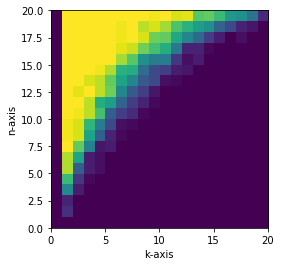

In [15]:
S = S/50
plt.imshow(S, origin = 'lower', extent = [0, K, 0, N])
plt.xlabel('k-axis')
plt.ylabel('n-axis')
plt.show()

### Interpretation

The brightness of each point reflects the observed probability of success,
ranging from certain failure (indigo) to certain success (bright yellow). We can see clearly that there is a phase transition curve.

Under minimal assumptions, Theorem II of the reference paper proves that we always encounter a phase transition when we use the regularized formulation to solve the linear inverse problem with random measurements. The transition occurs where the number of measurements equals the statistical dimension of the descent cone(please refer to the paper p.8 for the exact expression of descent cone). The shift from failure to success takes place over a range of about $O(\sqrt(n))$ measurements. 
There are several reasons that the conclusions of Theorem II are significant. The first implication provides evidence about the minimum amount of information we need before we can use the convex method to solve the linear inverse problem. The second implication tells us that we can solve the inverse problem reliably once we have acquired this quantum of information.